## POBLACIÓN

In [8]:
import pandas as pd

# Cargar el archivo CSV
df_poblacion = pd.read_csv("Poblacion.csv")

# Seleccionar solo las columnas necesarias
df_poblacion_paises = df_poblacion[["Category", "Estimate_Method", "Subregion"]]

# Verificar si "Subregion" es numérica y redondearla si es necesario
if pd.api.types.is_numeric_dtype(df_poblacion_paises['Subregion']):
    # Usar .loc[] para evitar el SettingWithCopyWarning
    df_poblacion_paises.loc[:, 'Subregion'] = df_poblacion_paises['Subregion'].round(0).astype(int)

# Cambiar los nombres de las columnas
df_poblacion_paises.columns = ['País', 'Año', 'Poblacion']

# Mostrar las primeras filas del DataFrame para comprobar
display(df_poblacion_paises)



País   Año    Poblacion
0                                            Afghanistan  1990   12045660.0
1                                            Afghanistan  1991   12238879.0
2                                            Afghanistan  1992   13278974.0
3                                            Afghanistan  1993   14943172.0
4                                            Afghanistan  1994   16250794.0
...                                                  ...   ...          ...
10011  Group C: Europe, Northern America, Australia a...  2017  541011121.0
10012  Group C: Europe, Northern America, Australia a...  2018  545590294.0
10013  Group C: Europe, Northern America, Australia a...  2019  549949242.0
10014  Group C: Europe, Northern America, Australia a...  2020  552829274.0
10015  Group C: Europe, Northern America, Australia a...  2021  554656605.0

[10016 rows x 3 columns]

# Preparacion de datos

In [2]:
import pandas as pd

# Cargar los archivos CSV en DataFrames
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  # Casos de Parkinson
df_contaminacion = pd.read_csv("Datos_contaminación_aire.csv")  # Tasa de contaminación
df_calidad_agua = pd.read_csv("Datos_muertes_agua.csv")
df_plomo = pd.read_csv("Datos_exp_plomo.csv")  # Tasa de carga de enfermedad por exposición al plomo
df_pesticidas = pd.read_csv("Datos_uso_pepticidas.csv")  # Uso de pesticidas en toneladas
df_precipitaciones = pd.read_csv("Datos_precipitaciones.csv")  # Precipitaciones en mm



In [24]:
display(df_parkinson)

Año           País   Parkinson
0     1990       Cambodia   21.533830
1     1991       Cambodia   21.483840
2     1992       Cambodia   21.502138
3     1993       Cambodia   21.607151
4     1994       Cambodia   21.767658
...    ...            ...         ...
7291  2017  South America  101.905710
7292  2018  South America  105.467110
7293  2019  South America  108.644905
7294  2020  South America  110.542580
7295  2021  South America  115.628784

[7296 rows x 3 columns]

In [27]:
df_parkinson.dtypes

Año            int64
País          object
Parkinson    float64
dtype: object

In [4]:
# Unir todos los DataFrames por 'Año' y 'País'
df = df_parkinson.merge(df_contaminacion, on=['Año', 'País'], how='left')
df = df.merge(df_plomo, on=['Año', 'País'], how='left')
df = df.merge(df_calidad_agua, on=["Año","País"], how='left')
df = df.merge(df_pesticidas, on=['Año', 'País'], how='left')
df_final = df.merge(df_precipitaciones, on=['Año', 'País'], how='left')

# Mostrar los primeros datos
display(df_final)

Año           País   Parkinson  Contaminacion_aire  Exp_plomo  \
0     1990       Cambodia   21.533830            0.770228  799.84644   
1     1991       Cambodia   21.483840            0.867021  798.64690   
2     1992       Cambodia   21.502138            0.876114  799.89874   
3     1993       Cambodia   21.607151            0.992484  804.59204   
4     1994       Cambodia   21.767658            0.902714  812.10320   
...    ...            ...         ...                 ...        ...   
7291  2017  South America  101.905710                 NaN        NaN   
7292  2018  South America  105.467110                 NaN        NaN   
7293  2019  South America  108.644905                 NaN        NaN   
7294  2020  South America  110.542580                 NaN        NaN   
7295  2021  South America  115.628784                 NaN        NaN   

      Muertes_agua  Pepticidas  Precipitaciones  
0        5680.9985      258.02       1951.19900  
1        5618.9200      653.00        904.05820  
2        5418.9050      545.00       1474.90120  
3        5273.5493      687.00        640.35815  
4        5176.5522     2191.22        977.33185  
...            ...         ...              ...  
7291     5844.3230         NaN              NaN  
7292     5681.7460         NaN              NaN  
7293     5672.4670         NaN              NaN  
7294     5413.5270         NaN              NaN  
7295     5173.5415         NaN              NaN  

[7296 rows x 8 columns]

In [5]:
# Calcular el porcentaje de valores NaN en cada columna
nan_percentage = df_final.isnull().mean() * 100

# Mostrar el porcentaje de valores NaN por columna
print(nan_percentage)


Año                    0.000000
País                   0.000000
Parkinson              0.000000
Contaminacion_aire     2.631579
Exp_plomo              2.631579
Muertes_agua           0.000000
Pepticidas            18.475877
Precipitaciones       19.736842
dtype: float64


**ELIMINCACIÓN DE NULOS**

In [6]:
df_final_no_nulos  = df_final.dropna()
display(df_final_no_nulos)

Año      País  Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  \
0     1990  Cambodia  21.533830            0.770228   799.84644     5680.9985   
1     1991  Cambodia  21.483840            0.867021   798.64690     5618.9200   
2     1992  Cambodia  21.502138            0.876114   799.89874     5418.9050   
3     1993  Cambodia  21.607151            0.992484   804.59204     5273.5493   
4     1994  Cambodia  21.767658            0.902714   812.10320     5176.5522   
...    ...       ...        ...                 ...         ...           ...   
6779  2017     Sudan  33.183840            2.207330  1261.99870     2538.9585   
6780  2018     Sudan  33.985485            2.483574  1248.51800     1889.6714   
6781  2019     Sudan  34.539875            2.573782  1235.76650     1719.6345   
6782  2020     Sudan  33.731514            2.687866  1224.61080     1554.0481   
6783  2021     Sudan  34.841938            2.822252  1209.91240     1413.7561   

      Pepticidas  Precipitaciones  
0         258.02       1951.19900  
1         653.00        904.05820  
2         545.00       1474.90120  
3         687.00        640.35815  
4        2191.22        977.33185  
...          ...              ...  
6779        1.00       1076.95200  
6780    18849.00        221.57901  
6781    18849.00        878.00850  
6782    18849.00       1252.68140  
6783    18849.00       1874.62350  

[5404 rows x 8 columns]

Como al eliminar los nulos, mantengo el 75% de los datos, no será necesario relizar la imputación de dtaos

**Modificación de la tabla para la prediccion**

In [7]:
import pandas as pd

# Suponiendo que tu DataFrame se llama df y la columna de años es "año"
primer_año = df_final_no_nulos["Año"].min()
penultimo_año = sorted(df_final_no_nulos["Año"].unique())[-2]  # Encuentra el penúltimo año

# Filtrar el DataFrame
df_filtrado = df_final_no_nulos[(df_final_no_nulos["Año"] >= primer_año) & (df_final_no_nulos["Año"] <= penultimo_año)]
df_filtrado_mod = df_filtrado.drop(columns=['Año'])
df_filtrado_modelo = df_filtrado_mod[df_filtrado_mod["País"] != "Angola"]
display(df_filtrado_modelo)

País  Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  \
0     Cambodia  21.533830            0.770228   799.84644     5680.9985   
1     Cambodia  21.483840            0.867021   798.64690     5618.9200   
2     Cambodia  21.502138            0.876114   799.89874     5418.9050   
3     Cambodia  21.607151            0.992484   804.59204     5273.5493   
4     Cambodia  21.767658            0.902714   812.10320     5176.5522   
...        ...        ...                 ...         ...           ...   
6778     Sudan  32.230840            2.266018  1279.99110     2360.7010   
6779     Sudan  33.183840            2.207330  1261.99870     2538.9585   
6780     Sudan  33.985485            2.483574  1248.51800     1889.6714   
6781     Sudan  34.539875            2.573782  1235.76650     1719.6345   
6782     Sudan  33.731514            2.687866  1224.61080     1554.0481   

      Pepticidas  Precipitaciones  
0         258.02       1951.19900  
1         653.00        904.05820  
2         545.00       1474.90120  
3         687.00        640.35815  
4        2191.22        977.33185  
...          ...              ...  
6778        1.00       1133.75460  
6779        1.00       1076.95200  
6780    18849.00        221.57901  
6781    18849.00        878.00850  
6782    18849.00       1252.68140  

[5205 rows x 7 columns]

In [8]:
df_filtrado_modelo.to_csv('Tabla_filtrada.csv', index=False)

**Tabla predicción**

In [9]:
ultimo_año = df_final_no_nulos ["Año"].max()  # Encuentra el último año

df_ultimo_año = df_final_no_nulos [df_final_no_nulos ["Año"] == ultimo_año]  # Filtra solo ese año
df_predecir = df_ultimo_año.drop(columns = ["Año","Parkinson"])
display(df_predecir)

País  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
31        Cambodia            2.579782   665.62980    793.334800    35263.94   
63           China            7.186636   458.91144   2380.870600    60687.00   
159      Indonesia            2.977838   639.60520  33702.586000     6847.16   
191           Laos            4.151983   852.68396    571.478700       22.31   
223       Malaysia            2.090159   301.38852    532.311800      745.60   
...            ...                 ...         ...           ...         ...   
5951  Sierra Leone            2.022849   681.09000   2544.818800   118155.13   
5983          Togo            4.086113   629.94480   2289.433000      534.56   
6271  Cook Islands            0.588149   131.94354      0.364360       98.37   
6303     Greenland            1.560168   106.91559      0.048419      404.35   
6783         Sudan            2.822252  1209.91240   1413.756100    18849.00   

      Precipitaciones  
31          1121.2478  
63            24.7504  
159          618.2539  
191         1058.6294  
223         3685.5916  
...               ...  
5951        1525.9907  
5983         540.1039  
6271        1205.8376  
6303         355.4029  
6783        1874.6235  

[168 rows x 6 columns]

In [10]:
df_predecir.to_csv('Tabla_para_predecir.csv', index=False)

**TABLA FINAL PARA EL MODELO**

In [11]:
df_final_modelo = df_final_no_nulos.drop(columns=['Año', 'País'])
display(df_final_modelo)

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
0     21.533830            0.770228   799.84644     5680.9985      258.02   
1     21.483840            0.867021   798.64690     5618.9200      653.00   
2     21.502138            0.876114   799.89874     5418.9050      545.00   
3     21.607151            0.992484   804.59204     5273.5493      687.00   
4     21.767658            0.902714   812.10320     5176.5522     2191.22   
...         ...                 ...         ...           ...         ...   
6779  33.183840            2.207330  1261.99870     2538.9585        1.00   
6780  33.985485            2.483574  1248.51800     1889.6714    18849.00   
6781  34.539875            2.573782  1235.76650     1719.6345    18849.00   
6782  33.731514            2.687866  1224.61080     1554.0481    18849.00   
6783  34.841938            2.822252  1209.91240     1413.7561    18849.00   

      Precipitaciones  
0          1951.19900  
1           904.05820  
2          1474.90120  
3           640.35815  
4           977.33185  
...               ...  
6779       1076.95200  
6780        221.57901  
6781        878.00850  
6782       1252.68140  
6783       1874.62350  

[5404 rows x 6 columns]

In [12]:
df_final_modelo.to_csv('Tabla_modelos.csv', index=False)

# Graficación de la relaciones entre la varibale dependiente y las independientes

### Parkinson y tasa de contaminación de aire

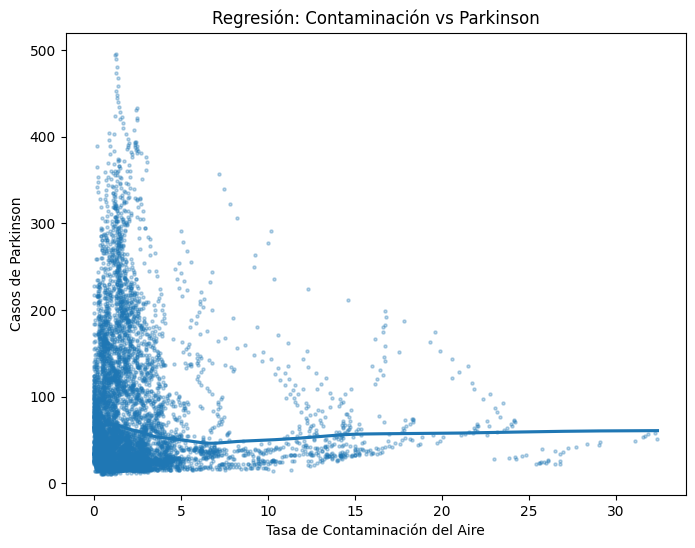

                    Contaminacion_aire  Parkinson
Contaminacion_aire            1.000000  -0.105385
Parkinson                    -0.105385   1.000000


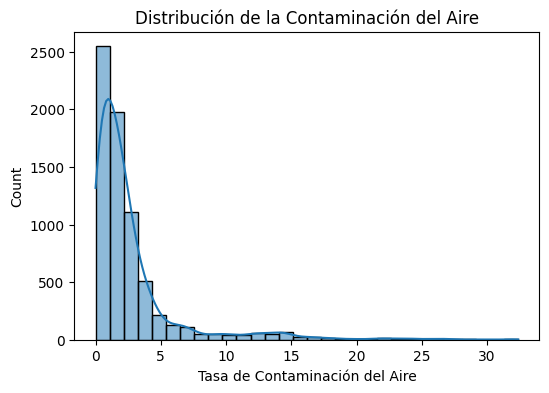

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_contaminacion = pd.read_csv("Datos_contaminación_aire.csv")  

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_contaminacion, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Contaminacion_aire'], y=df_relacion['Parkinson'], 
            lowess=True, scatter_kws={'s':5, 'alpha':0.3})

plt.xlabel("Tasa de Contaminación del Aire")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Contaminación vs Parkinson")
plt.show()

print(df_relacion[['Contaminacion_aire', 'Parkinson']].corr())

plt.figure(figsize=(6,4))
sns.histplot(df_relacion['Contaminacion_aire'], bins=30, kde=True)
plt.xlabel("Tasa de Contaminación del Aire")
plt.title("Distribución de la Contaminación del Aire")
plt.show()




### Parkinson y  muertes atribuidas a fuentes de agua inseguras, calidad de agua

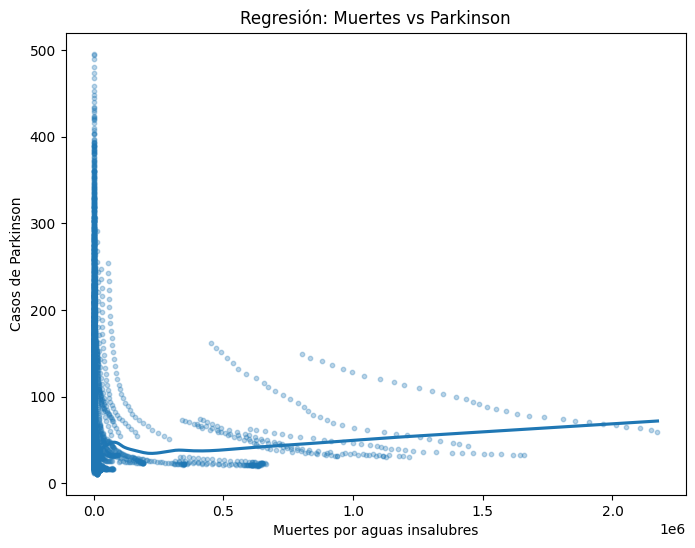

              Muertes_agua  Parkinson
Muertes_agua         1.000     -0.095
Parkinson           -0.095      1.000


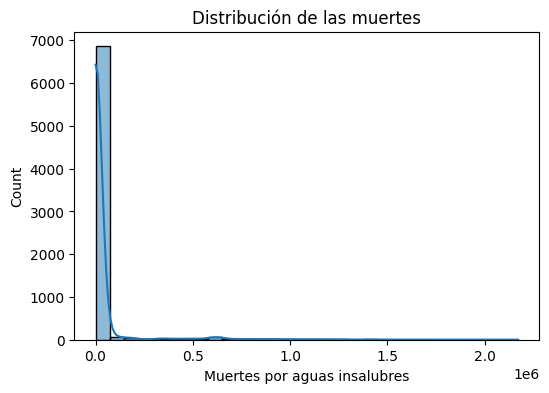

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_calidad_agua = pd.read_csv("Datos_muertes_agua.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_calidad_agua, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Muertes_agua'], y=df_relacion['Parkinson'], 
            lowess=True, scatter_kws={'s':10, 'alpha':0.3})

plt.xlabel("Muertes por aguas insalubres")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Muertes vs Parkinson")
plt.show()

print(df_relacion[['Muertes_agua', 'Parkinson']].corr())

plt.figure(figsize=(6,4))
sns.histplot(df_relacion['Muertes_agua'], bins=30, kde=True)
plt.xlabel("Muertes por aguas insalubres")
plt.title("Distribución de las muertes")
plt.show()





### Parkinson y  exposición al plomo

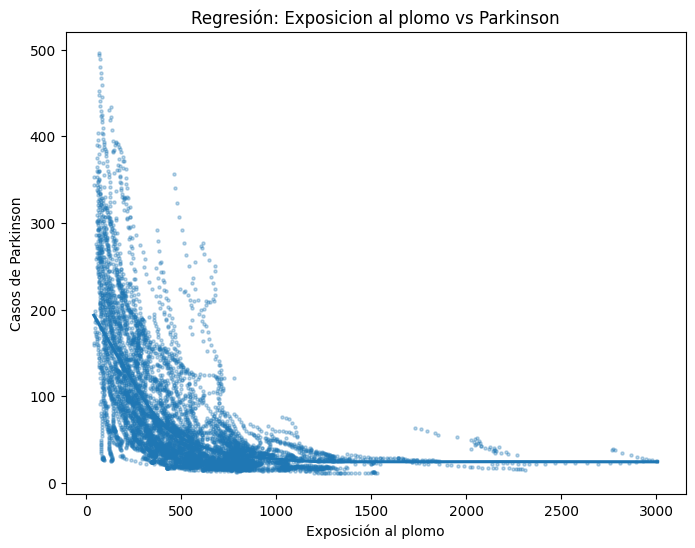

           Exp_plomo  Parkinson
Exp_plomo   1.000000  -0.557746
Parkinson  -0.557746   1.000000


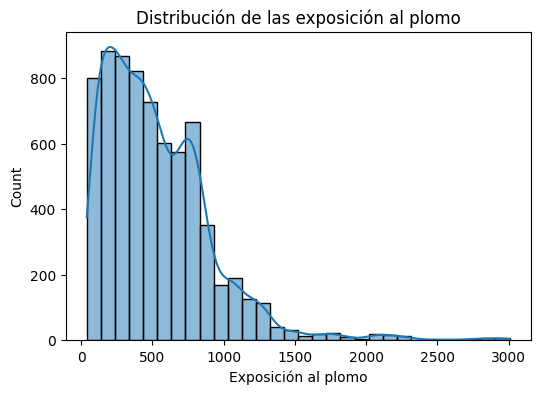

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_plomo = pd.read_csv("Datos_exp_plomo.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_plomo, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Exp_plomo'], y=df_relacion['Parkinson'], 
            lowess=True, scatter_kws={'s':5, 'alpha':0.3})

plt.xlabel("Exposición al plomo")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Exposicion al plomo vs Parkinson")
plt.show()

print(df_relacion[['Exp_plomo', 'Parkinson']].corr())

plt.figure(figsize=(6,4))
sns.histplot(df_relacion['Exp_plomo'], bins=30, kde=True)
plt.xlabel("Exposición al plomo")
plt.title("Distribución de las exposición al plomo")
plt.show()



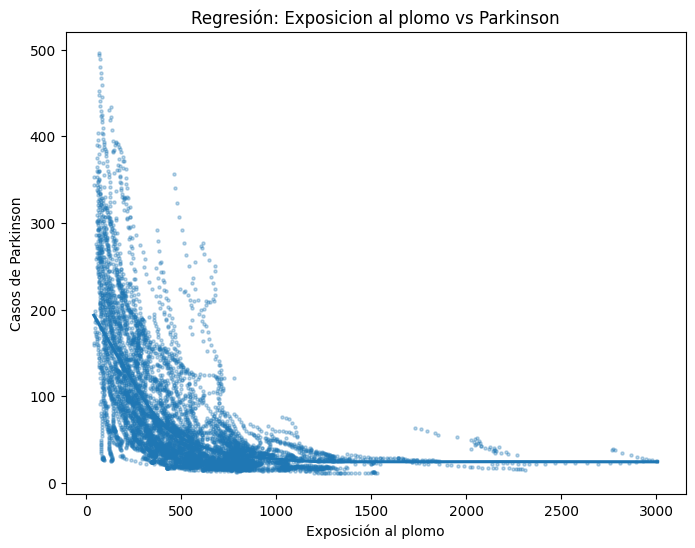

In [21]:
# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_plomo = pd.read_csv("Datos_exp_plomo.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_plomo, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Exp_plomo'], y=df_relacion['Parkinson'], 
            lowess=True, scatter_kws={'s':5, 'alpha':0.3})

plt.xlabel("Exposición al plomo")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Exposicion al plomo vs Parkinson")
plt.show()


### Parkinson y uso de pepticidas

Parkinson     11.06615
Pepticidas     0.03000
dtype: float64
Parkinson     4.960207e+02
Pepticidas    3.690935e+06
dtype: float64


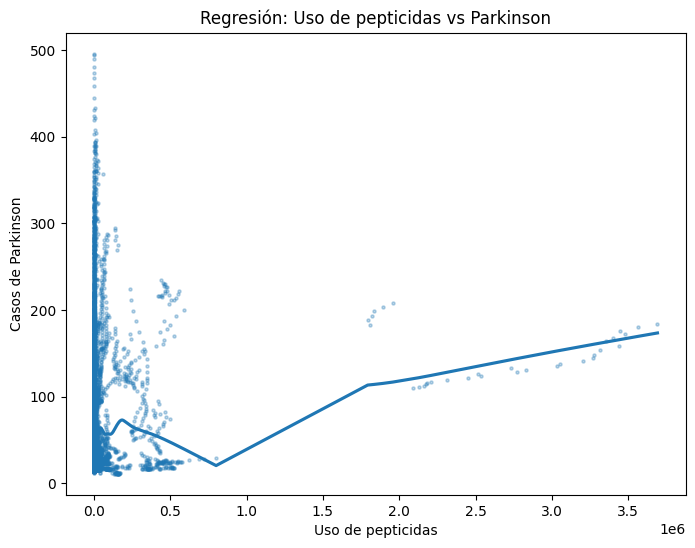

            Pepticidas  Parkinson
Pepticidas    1.000000   0.047757
Parkinson     0.047757   1.000000


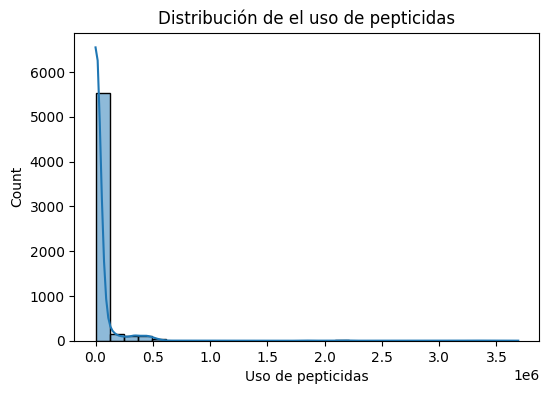

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_pesticidas = pd.read_csv("Datos_uso_pepticidas.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_pesticidas, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])
df_filtrado = df_relacion[df_relacion['Parkinson']>0]
print(df_filtrado.min())
print(df_filtrado.max())
# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_filtrado['Pepticidas'], y=df_filtrado['Parkinson'], 
            lowess=True, scatter_kws={'s':5, 'alpha':0.3})

plt.xlabel("Uso de pepticidas")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Uso de pepticidas vs Parkinson")
plt.show()

print(df_filtrado[['Pepticidas', 'Parkinson']].corr())

plt.figure(figsize=(6,4))
sns.histplot(df_filtrado['Pepticidas'], bins=30, kde=True)
plt.xlabel("Uso de pepticidas")
plt.title("Distribución de el uso de pepticidas")
plt.show()


### Parkinson y la cantidad de precipitaciones

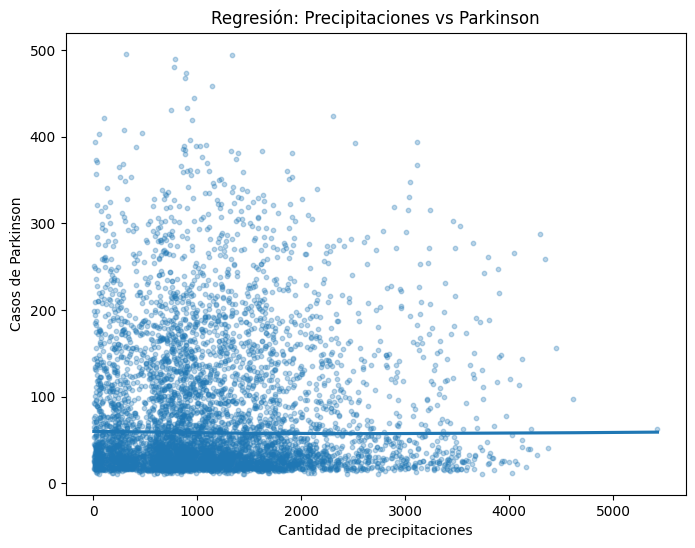

                 Precipitaciones  Parkinson
Precipitaciones         1.000000  -0.002437
Parkinson              -0.002437   1.000000


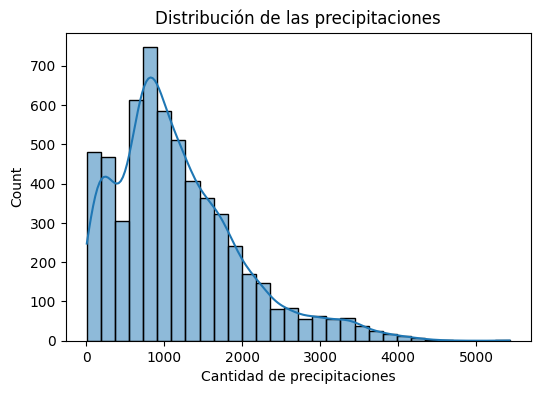

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_parkinson = pd.read_csv("Datos_Parkinson.csv")  
df_precipitaciones = pd.read_csv("Datos_precipitaciones.csv")

# Fusionar datos por Año y País
df_relacion = df_parkinson.merge(df_precipitaciones, on=['Año', 'País'], how='left').dropna().drop(columns=['Año', 'País'])

# 3️⃣ Regplot (Dispersión + línea de regresión)
plt.figure(figsize=(8, 6))
sns.regplot(x=df_relacion['Precipitaciones'], y=df_relacion['Parkinson'], 
            lowess=True, scatter_kws={'s':10, 'alpha':0.3})

plt.xlabel("Cantidad de precipitaciones")
plt.ylabel("Casos de Parkinson")
plt.title("Regresión: Precipitaciones vs Parkinson")
plt.show()

print(df_relacion[['Precipitaciones', 'Parkinson']].corr())

plt.figure(figsize=(6,4))
sns.histplot(df_relacion['Precipitaciones'], bins=30, kde=True)
plt.xlabel("Cantidad de precipitaciones")
plt.title("Distribución de las precipitaciones")
plt.show()



**MODELOS GLM**

**Transformación de la función general para los modelos GLM**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

def entrenar_modelo_glm(df, modelo_familia, variables_independientes, variable_dependiente, test_size=0.2, scaler=False):
    # Copiar el DataFrame para evitar modificar el original
    df = df.copy()
    
    # Transformaciones necesarias en las variables
    if 'Contaminacion_aire' in variables_independientes:
        df['Contaminacion_aire_2'] = df['Contaminacion_aire'] ** 2  # Relación no lineal
    
    if 'Muertes_agua' in variables_independientes:
        df['Muertes_agua_2'] = df['Muertes_agua'] ** 2  # Relación no lineal similar
    
    if 'Exp_plomo' in variables_independientes:
        df['Exp_plomo_2'] = df['Exp_plomo'] ** 2  # Relación no lineal similar
    
    if 'Pepticidas' in variables_independientes:
        df['Pepticidas_log'] = np.log1p(df['Pepticidas'])  # Log para reducir dispersión
    
    # Actualizar la lista de variables independientes con las nuevas transformaciones
    nuevas_variables = [var for var in df.columns if var in variables_independientes or var.endswith('_2') or var.endswith('_log')]
    
    # Definir X (variables independientes) e y (variable dependiente)
    X = df[nuevas_variables]
    y = df[variable_dependiente]
    
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Escalar las variables si es necesario
    if scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Añadir constante para el término de intercepto en la regresión
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Crear y entrenar el modelo GLM con la familia elegida
    modelo = sm.GLM(y_train, X_train, family=modelo_familia).fit()
    
    # Mostrar los resultados del modelo
    print(modelo.summary())
    
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Evaluar el modelo con el Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Error Cuadrático Medio (RMSE): {rmse}')
    
    # Evaluar el modelo con el Error Absoluto Medio (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Error Absoluto Medio (MAE): {mae}')
    
    return modelo, rmse, mae

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Definir las variables
variables_independientes = ['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']
variable_dependiente = 'Parkinson'

# Entrenar modelos
from statsmodels.genmod.families import Poisson, NegativeBinomial

print("Modelo Cuasi-Poisson:")
entrenar_modelo_glm(df, Poisson(), variables_independientes, variable_dependiente, scaler=True)

print("\nModelo Binomial Negativo:")
entrenar_modelo_glm(df, NegativeBinomial(), variables_independientes, variable_dependiente, scaler=True)


Modelo Cuasi-Poisson:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4313
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57750.
Date:                Thu, 03 Apr 2025   Deviance:                       90197.
Time:                        17:05:11   Pearson chi2:                 1.06e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1322      0.0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


(<statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x288343d60b0>,
 np.float64(47.63369176286732),
 32.00714819047614)

In [28]:
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson, NegativeBinomial
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Función de entrenamiento del modelo GLM
def entrenar_modelo_glm(df, modelo_familia, variables_independientes, variable_dependiente, test_size=0.2, scaler=False, alpha=None):
    df = df.copy()  # Copiar el DataFrame para evitar modificar el original
    
    # Transformaciones necesarias en las variables
    if 'Contaminacion_aire' in variables_independientes:
        df['Contaminacion_aire_2'] = df['Contaminacion_aire'] ** 2  # Relación no lineal
    if 'Muertes_agua' in variables_independientes:
        df['Muertes_agua_2'] = df['Muertes_agua'] ** 2
    if 'Exp_plomo' in variables_independientes:
        df['Exp_plomo_2'] = df['Exp_plomo'] ** 2
    if 'Pepticidas' in variables_independientes:
        df['Pepticidas_log'] = np.log1p(df['Pepticidas'])
    
    # Actualizar la lista de variables
    nuevas_variables = [var for var in df.columns if var in variables_independientes or var.endswith('_2') or var.endswith('_log')]
    
    # Definir X (variables independientes) e y (variable dependiente)
    X = df[nuevas_variables]
    y = df[variable_dependiente]
    
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Asegurarse de que los índices de X_train y y_train estén alineados
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    
    # Escalar las variables si es necesario
    if scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Asignar nombres a las columnas escaladas
        X_train = pd.DataFrame(X_train, columns=nuevas_variables)
        X_test = pd.DataFrame(X_test, columns=nuevas_variables)
    
    # Añadir constante para el término de intercepto
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    
    # Crear y entrenar el modelo GLM con la familia elegida
    modelo = sm.GLM(y_train, X_train, family=modelo_familia).fit()
    
    # Mostrar los resultados del modelo
    print(modelo.summary())
    
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Evaluar el modelo con RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Error Cuadrático Medio (RMSE): {rmse}')
    
    # Evaluar el modelo con MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Error Absoluto Medio (MAE): {mae}')
    
    return modelo, rmse, mae

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Definir las variables
variables_independientes = ['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']
variable_dependiente = 'Parkinson'

# Entrenar modelos
print("Modelo Cuasi-Poisson:")
entrenar_modelo_glm(df, sm.families.Poisson(), variables_independientes, variable_dependiente, scaler=True)

print("\nModelo Binomial Negativo:")
entrenar_modelo_glm(df, sm.families.NegativeBinomial(), variables_independientes, variable_dependiente, scaler=True)



Modelo Cuasi-Poisson:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4313
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57750.
Date:                Fri, 04 Apr 2025   Deviance:                       90197.
Time:                        10:55:30   Pearson chi2:                 1.06e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


(<statsmodels.genmod.generalized_linear_model.GLMResultsWrapper at 0x26c40af6c20>,
 np.float64(47.63369176286732),
 32.00714819047614)

**MAPA PREDICTOR**

In [27]:
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson, NegativeBinomial
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Función de entrenamiento del modelo GLM
def entrenar_modelo_glm(df, modelo_familia, variables_independientes, variable_dependiente, test_size=0.2, scaler=False, alpha=None):
    df = df.copy()  # Copiar el DataFrame para evitar modificar el original
    
    # Transformaciones necesarias en las variables
    #if 'Contaminacion_aire' in variables_independientes:
     #   df['Contaminacion_aire_2'] = df['Contaminacion_aire'] ** 2  # Relación no lineal
    if 'Muertes_agua' in variables_independientes:
        df['Muertes_agua_2'] = df['Muertes_agua'] ** 2
    if 'Exp_plomo' in variables_independientes:
        df['Exp_plomo_2'] = df['Exp_plomo'] ** 2
    if 'Pepticidas' in variables_independientes:
        df['Pepticidas_log'] = np.log1p(df['Pepticidas'])
    
    # Actualizar la lista de variables
    nuevas_variables = [var for var in df.columns if var in variables_independientes or var.endswith('_2') or var.endswith('_log')]
    
    # Definir X (variables independientes) e y (variable dependiente)
    X = df[nuevas_variables]
    y = df[variable_dependiente]
    
    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Asegurarse de que los índices de X_train y y_train estén alineados
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    
    # Escalar las variables si es necesario
    if scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Asignar nombres a las columnas escaladas
        X_train = pd.DataFrame(X_train, columns=nuevas_variables)
        X_test = pd.DataFrame(X_test, columns=nuevas_variables)
    
    # Añadir constante para el término de intercepto
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    
    # Crear y entrenar el modelo GLM con la familia elegida
    modelo = sm.GLM(y_train, X_train, family=modelo_familia).fit()
    
    # Mostrar los resultados del modelo
    print(modelo.summary())
    
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Evaluar el modelo con RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Error Cuadrático Medio (RMSE): {rmse}')
    
    # Evaluar el modelo con MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Error Absoluto Medio (MAE): {mae}')
    
    return modelo, rmse, mae

# Cargar los datos
df = pd.read_csv("Tabla_filtrada.csv")

# Definir las variables
variables_independientes = ['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']
variable_dependiente = 'Parkinson'

# Filtrar por cada país y entrenar modelos
for pais in df["País"].unique():
    print(f"\nEntrenando modelos para {pais}...\n")
    df_pais = df[df["País"] == pais]  # Filtrar datos del país
    

    print("\nModelo Binomial Negativo:")
    entrenar_modelo_glm(df, sm.families.NegativeBinomial(), variables_independientes, variable_dependiente, scaler=True)



Entrenando modelos para Cambodia...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:39   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:39   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:40   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:40   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:40   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:40   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:41   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:41   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:41   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:41   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:42   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:42   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:42   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:42   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:43   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:43   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:43   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Belarus...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:43   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:43   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:44   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:44   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:44   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Austria...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:45   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:45   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Denmark...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:45   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Israel...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:45   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:45   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Luxembourg...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:46   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err       

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:46   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Finland...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:46   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:46   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Netherlands...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:47   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err      

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Portugal...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:47   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err         

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:47   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:47   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:48   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:48   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:48   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:48   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:49   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Saint Vincent and the Grenadines...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:49   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Bolivia...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:49   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:49   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Guatemala...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:50   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err        

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:50   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Trinidad and Tobago...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:50   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std e

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Brazil...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:50   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Nicaragua...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:51   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err        

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Paraguay...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:51   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err         

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:51   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:51   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:51   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Lebanon...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:52   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Morocco...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:52   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:52   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:52   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:53   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Angola...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:53   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:53   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:53   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:54   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:54   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:54   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:54   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Ethiopia...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:55   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err         

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Madagascar...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:55   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err       

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Mauritius...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:55   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err        

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Rwanda...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:55   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:56   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Tanzania...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:56   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err         

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Lesotho...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:56   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para South Africa...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:56   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err     

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Benin...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:57   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z 

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Cape Verde...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:57   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err       

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:57   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:57   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:57   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Liberia...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:58   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:58   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:58   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:58   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1497      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Togo...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:59   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err          z  

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Error Cuadrático Medio (RMSE): 45.39461943373781
Error Absoluto Medio (MAE): 30.303314103540963

Entrenando modelos para Greenland...


Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4188
Model:                            GLM   Df Residuals:                     4179
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21609.
Date:                Thu, 03 Apr 2025   Deviance:                       1125.5
Time:                        17:09:59   Pearson chi2:                 1.50e+03
No. Iterations:                    14   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
                         coef    std err        

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


**Regresión de Poisson**

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import NegativeBinomial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 🔹 Función para entrenar modelos GLM
def entrenar_modelo_glm(df, modelo_familia, variables_independientes, variable_dependiente, test_size=0.2, scaler=False):
    df = df.copy()  # Evitar modificar el original
    
    # Aplicar transformaciones a las variables
    if 'Muertes_agua' in variables_independientes:
        df['Muertes_agua_2'] = df['Muertes_agua'] ** 2
    if 'Exp_plomo' in variables_independientes:
        df['Exp_plomo_2'] = df['Exp_plomo'] ** 2
    if 'Pepticidas' in variables_independientes:
        df['Pepticidas_log'] = np.log1p(df['Pepticidas'])
    
    # Seleccionar las variables transformadas
    nuevas_variables = [var for var in df.columns if var in variables_independientes or var.endswith('_2') or var.endswith('_log')]
    
    # Definir X (independientes) e y (dependiente)
    X = df[nuevas_variables]
    y = df[variable_dependiente]
    
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Alinear índices
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    
    # Escalar si es necesario
    scaler_model = None
    if scaler:
        scaler_model = StandardScaler()
        X_train = scaler_model.fit_transform(X_train)
        X_test = scaler_model.transform(X_test)
        X_train = pd.DataFrame(X_train, columns=nuevas_variables)
        X_test = pd.DataFrame(X_test, columns=nuevas_variables)
    
    # Añadir constante
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Entrenar el modelo GLM
    modelo = sm.GLM(y_train, X_train, family=modelo_familia).fit()
    
    # Mostrar resumen del modelo
    print(modelo.summary())
    
    # Evaluar el modelo
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    #print(f'RMSE: {rmse}, MAE: {mae}')
    
    return modelo, scaler_model, nuevas_variables

# 🔹 Función para predecir variando cada variable independiente de forma individual
# 🔹 Función para predecir variando cada variable independiente de forma individual
def predecir_por_variable(modelo, df_base, variables, scaler,pais):
    print(variables)
    resultados = []

    print("Iniciando la predicción...")  # Asegúrate de que la función se esté llamando

    for variable in variables:
        print(f"Procesando la variable: {variable}")  # Asegúrate de que estamos en cada variable

        df_nuevo = df_base.copy()

        # Aplicar transformaciones
        if 'Muertes_agua' in variables:
            df_nuevo['Muertes_agua_2'] = df_nuevo['Muertes_agua'] ** 2
        if 'Exp_plomo' in variables:
            df_nuevo['Exp_plomo_2'] = df_nuevo['Exp_plomo'] ** 2
        if 'Pepticidas' in variables:
            df_nuevo['Pepticidas_log'] = np.log1p(df['Pepticidas'])

        # Crear conjunto de entrada para predicción
        nuevas_variables = [col for col in df_nuevo.columns if col in variables or col.endswith('_2') or col.endswith('_log')]
        X_nuevo = df_nuevo[nuevas_variables]

        # Mostrar el número de columnas de X_nuevo antes de la predicción
        print(f"Para el país con variable {variable}, el número de columnas en X_nuevo es: {X_nuevo.shape[1]}")

        # Aplicar escalado si es necesario
        if scaler:
            X_nuevo = scaler.transform(X_nuevo)
            X_nuevo = pd.DataFrame(X_nuevo, columns=nuevas_variables)

        # Añadir constante
        #X_nuevo = sm.add_constant(X_nuevo)
        X_nuevo = sm.add_constant(X_nuevo, has_constant='add')
        print(X_nuevo)

        # Hacer predicción para la variable en cuestión
        df_nuevo['Parkinson_Predicho'] = modelo.predict(X_nuevo)

        # Guardar los resultados
        for _, fila in df_nuevo.iterrows():
            resultados.append({
                "País": pais,
                "Variable_Independiente": variable,
                "Valor_Variable": fila[variable],
                "Parkinson_Predicho": fila["Parkinson_Predicho"]
            })

    return pd.DataFrame(resultados)


# 🔹 Cargar datos de entrenamiento
df_entrenamiento = pd.read_csv("Tabla_filtrada.csv")

# Definir variables
variables_independientes = ['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']
variable_dependiente = 'Parkinson'

# Diccionario para almacenar modelos por país
modelos_por_pais = {}

# Entrenar modelos para cada país
for pais in df_entrenamiento["País"].unique():
    print(f"Entrenando modelo para {pais}...")
    
    df_pais = df_entrenamiento[df_entrenamiento["País"] == pais].drop(columns=["País"])
    display(df_pais)
    
    modelo, scaler, columnas_utilizadas = entrenar_modelo_glm(df_pais, sm.families.NegativeBinomial(), variables_independientes, variable_dependiente, scaler=True)
    # Guardar el modelo y el scaler en el diccionario
    modelos_por_pais[pais] = (modelo, scaler, columnas_utilizadas)

# 🔹 Cargar datos para predecir
df_prediccion = pd.read_csv("Tabla_para_predecir.csv")

# DataFrame para almacenar predicciones
df_resultados = pd.DataFrame()

# Hacer predicciones variando cada variable independiente
for pais in df_prediccion["País"].unique():
    print(f"Haciendo predicciones para {pais}...")

    df_pais = df_prediccion[df_prediccion["País"] == pais].drop(columns=["País"])

    if pais in modelos_por_pais:
        modelo_pais, scaler_pais, columnas_utilizadas = modelos_por_pais[pais]
        print(columnas_utilizadas)
        
        df_predicciones_pais = predecir_por_variable(modelo_pais, df_pais, columnas_utilizadas, scaler_pais,pais)
        
        df_resultados = pd.concat([df_resultados, df_predicciones_pais], ignore_index=True)
    else:
        print(f"⚠ No hay modelo entrenado para {pais}")

# 🔹 Guardar resultados
df_resultados.to_csv("Predicciones_Parkinson_Variables.csv", index=False)
print(df_resultados)


Entrenando modelo para Cambodia...


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
0   21.533830            0.770228  799.84644    5680.99850      258.02   
1   21.483840            0.867021  798.64690    5618.92000      653.00   
2   21.502138            0.876114  799.89874    5418.90500      545.00   
3   21.607151            0.992484  804.59204    5273.54930      687.00   
4   21.767658            0.902714  812.10320    5176.55220     2191.22   
5   22.016382            0.899410  817.59870    4889.27250     2243.73   
6   22.383688            0.867484  816.61480    4570.02800     2525.18   
7   22.857458            1.106101  815.52826    4326.32200     2254.66   
8   23.414010            0.901053  814.13030    4125.47200     2752.90   
9   23.947977            0.857894  810.72375    3899.09700     2819.89   
10  24.461973            0.531673  803.25793    3568.26200     2594.80   
11  25.026402            0.814516  793.59840    3266.29300     2319.21   
12  25.677876            0.964466  783.11700    2961.56640     3470.40   
13  26.428164            1.558827  770.69336    2670.67700     3964.25   
14  27.198654            1.639124  761.49274    2438.21750     4010.74   
15  28.005146            1.477105  751.42770    2213.40940     4536.15   
16  28.907904            1.601013  740.35645    1993.26180     5479.55   
17  29.937584            1.716679  737.19190    1824.19260     5838.14   
18  31.091440            1.907247  731.67570    1669.09520     4831.12   
19  32.235110            1.592787  728.23110    1530.63440     7068.63   
20  33.365974            2.174262  724.09950    1422.54140     7321.60   
21  34.583490            2.999911  717.87180    1327.76640     8194.82   
22  35.958920            3.483309  712.77190    1229.06430    10660.80   
23  37.472374            3.043507  708.99207    1117.11880     9905.76   
24  38.852280            2.429548  702.57850    1053.11610     9905.76   
25  40.044525            2.373874  697.62415    1002.10760    29568.00   
26  41.057487            2.062252  693.83386     956.17840    29477.50   
27  42.024410            1.732645  688.81920     915.44196    29387.00   
28  43.067680            2.466941  683.06680     879.80164    29296.50   
29  44.034317            2.492341  675.76624     843.52814    29206.00   
30  47.252697            2.532708  670.52800     820.11720    32234.97   

    Precipitaciones  
0        1951.19900  
1         904.05820  
2        1474.90120  
3         640.35815  
4         977.33185  
5         787.11847  
6         412.98682  
7        1899.80970  
8        1919.30910  
9        1669.45170  
10       1887.69840  
11        848.62946  
12       1103.13040  
13       1705.17790  
14       1332.87600  
15        525.49700  
16       1801.23180  
17       1432.63920  
18       2578.16100  
19        476.38123  
20        239.22247  
21        866.46124  
22        873.15180  
23        365.01468  
24        939.28590  
25       1143.26160  
26       1859.33000  
27        120.81343  
28        336.24896  
29       1366.52560  
30       1589.50610

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.95
Date:                Fri, 04 Apr 2025   Deviance:                    0.0024784
Time:                        10:21:17   Pearson chi2:                  0.00248
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06136
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3550      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
31   55.406390           22.586000  762.52640    65670.2500   250631.62   
32   60.828335           22.023537  760.52686    61216.5430   249212.90   
33   66.293106           22.717243  752.31744    53982.2030   258217.78   
34   71.676330           22.597715  741.17883    47634.6400   260473.58   
35   76.984710           23.351929  729.62585    42164.2660   271520.94   
36   82.035970           23.186565  722.73410    36882.9340   284981.40   
37   87.105034           23.060183  711.58905    32026.3550   299316.28   
38   92.338110           23.488817  696.72020    27844.8850   315919.84   
39   97.702320           22.389992  691.79750    24331.4960   324563.88   
40  103.438300           22.781220  689.43210    21381.8930   331298.47   
41  109.202934           21.864970  694.38477    18877.6460   339849.78   
42  115.283330           21.753510  692.65340    15936.7620   345719.28   
43  121.636350           20.604284  690.89600    13327.6270   350468.62   
44  128.293500           20.966930  696.99750    11711.9320   351036.72   
45  135.635620           21.504007  698.24115    10304.7100   349219.94   
46  143.414550           20.585382  678.63550     8871.3750   346087.20   
47  152.737780           19.875765  633.02750     7567.6880   338311.72   
48  163.533520           19.300797  612.37225     6423.1840   323252.75   
49  175.067610           19.596046  609.26843     5545.6570   294682.44   
50  187.285160           17.805307  606.33830     4855.6250   273569.50   
51  199.111420           16.705936  601.32760     4238.8020   258757.94   
52  211.289600           14.636001  589.80900     3771.1328   244869.48   
53  223.805920           12.300146  571.65870     3520.0066   235760.34   
54  236.454510           10.346161  558.70703     3309.2090    18058.29   
55  249.957170            9.215271  541.96216     3108.9485    16817.00   
56  263.180200            9.260266  524.87964     3094.8682    15305.94   
57  277.253630           10.034492  515.35060     3119.0173    14961.81   
58  291.793500           10.195702  501.05368     2901.0188    17051.34   
59  306.712300            8.204449  487.70862     2701.0378    20156.23   
60  322.935670            7.823516  476.23865     2535.1973    18080.62   
61  340.226650            7.473822  468.11768     2493.1816    16005.00   

    Precipitaciones  
31       2344.73580  
32        921.06970  
33       1045.93750  
34       1602.73070  
35       1070.48520  
36        529.42880  
37       1551.99180  
38       1362.38050  
39       3209.58890  
40        259.41560  
41        172.42801  
42        929.23960  
43        836.59174  
44        210.66290  
45        897.27500  
46        977.91100  
47       1812.19340  
48         66.77333  
49        305.90366  
50        744.30850  
51        507.21072  
52       1292.33400  
53       1784.55400  
54        803.08844  
55        115.56981  
56        761.69226  
57       1835.68160  
58        761.26850  
59        623.38320  
60       1230.32370  
61       2156.33620

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -142.20
Date:                Fri, 04 Apr 2025   Deviance:                    0.0032479
Time:                        10:21:17   Pearson chi2:                  0.00324
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2443
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9208      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
62  26.897917            0.641232  709.32230    150864.860     2268.10   
63  27.466580            0.702451  716.95044    137079.280     2529.20   
64  28.132034            0.724306  723.54450    125150.375     3713.76   
65  28.814333            1.069737  731.01890    114995.840     2801.78   
66  29.494959            0.996328  734.60675    105450.766     2913.01   
67  30.163353            0.932298  735.61440     96960.530     3353.14   
68  30.870230            1.157906  738.53490     89109.320     3503.61   
69  31.679304            1.416883  743.80536     82776.836     3112.53   
70  32.512790            1.511253  751.68860     78696.860     2942.02   
71  33.323830            1.028560  759.78406     74769.250     2651.36   
72  34.069460            0.845516  767.37550     70834.766     2971.77   
73  34.851814            0.789921  768.67130     67343.460     2909.82   
74  35.670400            0.675484  779.37683     64392.750     3090.94   
75  36.485230            0.958946  786.97450     61679.996     2715.82   
76  37.246883            1.029155  791.46710     59266.773     2491.00   
77  37.930542            1.895162  795.59330     56975.117     2491.00   
78  38.672077            2.170397  794.51550     54581.320     2491.00   
79  39.370304            2.248165  791.16220     52533.180     2491.00   
80  40.071106            1.929630  790.32007     50516.330     2491.00   
81  40.779472            1.468890  781.79846     48270.895     2491.00   
82  41.511074            1.813554  775.40170     46048.395     2491.00   
83  42.522250            2.296493  761.82214     43984.940     2491.00   
84  43.673267            2.632808  750.63934     41886.360     2491.00   
85  44.969078            3.045193  740.37770     40192.367     2975.02   
86  46.324010            3.028880  724.84033     38737.848     3459.04   
87  47.646890            2.858155  715.82710     37420.530     3943.05   
88  49.062360            2.125946  702.81354     36179.344     4427.07   
89  50.525402            1.333026  689.82214     35621.766     4911.09   
90  52.118940            2.604687  676.17320     35045.310     5395.11   
91  53.848870            2.720699  666.16284     34507.438     5879.13   
92  57.167515            2.852827  651.62720     34180.290     6363.14   

    Precipitaciones  
62       237.251970  
63       912.772000  
64      1034.689000  
65       172.944600  
66      1233.759300  
67       824.441830  
68      2039.518400  
69        60.140480  
70       318.276460  
71       706.209200  
72      1185.073900  
73      1131.947000  
74      1269.489600  
75       981.183650  
76       184.097090  
77       852.092600  
78      2061.294400  
79       664.207600  
80       613.756040  
81      1290.011800  
82      2331.386000  
83        54.697887  
84       641.660030  
85       628.216400  
86      1440.447900  
87      1419.624500  
88      2560.582000  
89       303.324400  
90        79.454865  
91      1087.910200  
92       841.248400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.07
Date:                Fri, 04 Apr 2025   Deviance:                    0.0016490
Time:                        10:21:17   Pearson chi2:                  0.00165
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04281
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6145      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
93   26.328701            2.365732  1344.26060    5033.57130     1816.00   
94   26.383070            2.606343  1340.42710    4850.17720     1816.00   
95   26.397806            2.740228  1336.96880    4675.57370     1816.00   
96   26.381077            2.799128  1331.74330    4714.34860     1816.00   
97   26.383200            2.722959  1324.52060    4734.23730     1816.00   
98   26.466452            2.764788  1316.04420    4241.86230     1816.00   
99   26.515224            2.986751  1305.57540    4087.80760     1816.00   
100  26.587341            3.716671  1296.89270    3897.28420     1816.00   
101  26.657393            3.707316  1288.29310    3715.14500        5.47   
102  26.723750            2.930103  1274.06740    3512.90840        5.47   
103  26.792753            1.790280  1253.42040    3315.90670        5.47   
104  26.797150            1.786692  1242.74670    3007.38260        5.47   
105  26.826283            2.307212  1211.84350    2774.25590        5.47   
106  26.906763            3.564202  1191.35310    2516.01100        5.47   
107  27.061966            3.785467  1169.23930    2298.61300        5.47   
108  27.365450            3.405467  1149.09340    2095.55790        5.47   
109  27.830812            2.863744  1126.52110    1897.16710        4.58   
110  28.437344            3.146086  1101.83530    1703.54260        2.78   
111  29.099823            3.340880  1079.51120    1598.90050        6.65   
112  29.774658            3.225672  1053.78720    1446.10340        8.92   
113  30.441725            3.854937  1024.08500    1310.32420       29.04   
114  31.078142            4.574357   993.90140    1184.22860       26.74   
115  31.793522            5.036308   973.74930    1098.62680       29.05   
116  32.544056            4.684051   963.01874    1013.80440       14.56   
117  33.287280            4.094341   948.92700     930.23200       20.09   
118  34.085094            4.294180   936.02040     864.68570       22.21   
119  34.862366            3.632241   923.56250     798.79620       19.13   
120  35.720078            3.522555   909.01860     736.00757       13.89   
121  36.613396            4.050986   894.13830     693.49646        7.15   
122  37.500477            4.081207   880.26920     653.84564       14.39   
123  39.405903            4.126400   866.95170     597.88763       15.12   

     Precipitaciones  
93        3330.50340  
94         274.05350  
95         780.85626  
96         903.06670  
97         660.67834  
98        1042.69210  
99        2222.42300  
100        717.28370  
101       1208.96220  
102       1720.67760  
103       2341.24490  
104        611.20966  
105       1138.69630  
106        911.21300  
107       1310.54480  
108        711.29610  
109        475.57477  
110       2062.52690  
111       1842.69080  
112       1285.20130  
113       1932.19910  
114        972.12524  
115       1244.59640  
116       1604.42820  
117       1719.27120  
118        676.80700  
119       1400.32000  
120       1084.95870  
121       3504.04690  
122        282.80786  
123        202.61543

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.32
Date:                Fri, 04 Apr 2025   Deviance:                   0.00067346
Time:                        10:21:17   Pearson chi2:                 0.000675
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01427
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3714      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
124  32.921640            1.028312  414.99908     596.16266       24.75   
125  33.074394            0.877604  404.75372     550.59530       17.03   
126  33.160260            0.986563  401.83377     560.40845       15.59   
127  33.260418            1.134504  401.69504     552.91430       20.40   
128  33.371483            1.215921  398.11200     523.63040       22.46   
129  33.452854            1.133017  413.09412     526.82794       24.52   
130  33.699650            1.571713  406.82920     482.65460       26.58   
131  33.984894            1.918007  406.31213     467.09036       24.52   
132  34.401580            2.183272  405.46362     448.71690       24.32   
133  34.835570            1.498818  443.93650     432.57724       50.24   
134  35.292970            1.131569  411.12686     392.13602       56.00   
135  36.126330            1.103081  398.92640     371.78815       54.45   
136  37.073433            1.057461  391.24200     352.65002       33.47   
137  38.169086            1.575376  397.33682     337.05707       39.34   
138  39.339672            1.781568  389.00345     343.13140       46.20   
139  40.499752            2.146927  378.61462     355.68692       46.57   
140  41.962030            1.863278  367.13135     363.39050       61.65   
141  43.550340            1.522562  359.78660     374.67343       76.33   
142  45.324257            1.155064  364.11176     389.10864      161.90   
143  47.149513            0.889633  365.21732     400.77610      236.30   
144  48.840588            1.083460  360.19580     403.35720      290.73   
145  50.834790            1.347303  349.23636     415.72565      288.31   
146  52.960537            1.583849  332.31705     420.48260      293.91   
147  55.386528            1.770138  324.05865     425.61972      333.76   
148  57.910053            1.932909  321.94965     440.44986      381.08   
149  60.137627            1.887902  331.63437     460.06174      393.89   
150  62.478493            1.372596  325.32730     471.49762      376.88   
151  64.625190            0.842696  322.53094     491.56723      420.98   
152  66.904434            1.743989  317.55190     499.05940      443.03   
153  69.289240            1.852858  310.12060     511.16586      889.00   
154  72.754030            1.677629  279.75230     463.21170      817.30   

     Precipitaciones  
124       1880.09850  
125       1724.81600  
126       1849.79600  
127        124.65861  
128       1292.28770  
129        626.12690  
130       1156.59580  
131         53.99820  
132        451.55560  
133       3453.18480  
134       3821.43700  
135       1321.43870  
136       2205.85030  
137       2713.13570  
138        786.05040  
139        786.14390  
140       1162.32030  
141         77.62425  
142        891.46820  
143        604.69446  
144       1859.19070  
145        174.89815  
146       1425.60010  
147       3135.44920  
148         64.15549  
149        621.39514  
150        721.23880  
151       1349.11240  
152       2636.73630  
153        809.82060  
154       1168.27050

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.41
Date:                Fri, 04 Apr 2025   Deviance:                     0.018438
Time:                        10:21:17   Pearson chi2:                   0.0187
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06291
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7549      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
155  27.827261            5.145211  1073.24740    28303.3000   159762.31   
156  28.330503            5.857897  1082.66470    27332.7440   164528.86   
157  28.892650            6.386992  1087.31970    25947.0840   161844.92   
158  29.507490            6.787681  1090.09750    24450.8360   171934.75   
159  30.178220            6.817379  1089.88220    22801.3260   180014.20   
160  30.830313            6.812493  1088.25630    21133.5550   190750.92   
161  31.612213            6.878040  1084.77260    19661.2680   199737.94   
162  32.532356            6.952255  1079.43050    18277.5720   204426.80   
163  33.500225            7.159152  1071.75370    16907.0860   201932.06   
164  34.440760            6.933260  1061.87370    15547.5200   200294.70   
165  35.170593            6.078362  1051.83400    14251.4770     9729.00   
166  35.830845            5.517180  1038.88540    12647.3780     9338.00   
167  36.499226            5.863599  1025.03760    11259.2840     9030.00   
168  37.174730            6.778030  1009.95886    10038.0050    10505.00   
169  37.886063            7.014854   998.43770     9568.4590     8646.00   
170  38.520176            6.659391   975.07153     8975.8090    10213.00   
171  39.242580            7.473476   953.23456     8296.9330     8923.00   
172  40.032220            8.571257   923.69330     7632.6924     8812.00   
173  40.713394            8.659460   896.76074     7079.3320    10579.00   
174  41.479170            6.901109   872.87530     6568.5103     9682.00   
175  42.383686            6.901174   844.69073     6249.7944    11382.84   
176  43.575546            8.299855   818.58563     6000.1226     9424.73   
177  45.100360            9.587821   788.35040     5715.2935     9700.44   
178  46.806430           10.057101   768.87150     5510.0703     9550.04   
179  48.560284            8.590630   746.63477     5247.6753    10655.40   
180  50.100872            7.756417   729.95800     5034.8154    10703.85   
181  51.740303            6.611694   714.65790     4845.2227    10461.35   
182  53.505543            6.280864   698.46710     4641.7163    12073.15   
183  55.265700            7.678433   684.84094     4424.4290    10777.08   
184  56.916580            7.677063   673.65690     4247.0684     9857.20   
185  57.930202            7.683601   664.90970     3976.2527     9586.03   

     Precipitaciones  
155       352.798860  
156      1104.638800  
157        56.390423  
158      2210.202100  
159       845.141400  
160      1216.955800  
161       720.671630  
162       831.911100  
163       840.849060  
164       880.932860  
165       481.631620  
166      1148.168000  
167       665.670800  
168       920.903100  
169        77.966690  
170      2941.394800  
171       780.372560  
172       947.679570  
173      1706.171600  
174      1121.717500  
175      3482.205600  
176      1491.059300  
177      1093.866500  
178       460.234830  
179      1774.424100  
180      2710.970000  
181       622.845760  
182       540.279850  
183      1789.499900  
184       112.820220  
185      1765.212900

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.74
Date:                Fri, 04 Apr 2025   Deviance:                   0.00059301
Time:                        10:21:17   Pearson chi2:                 0.000594
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04475
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6426      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
186  23.467379            0.166007  342.85712     1958.2521     9824.00   
187  23.534184            0.172956  347.16290     1951.7617     9501.00   
188  23.686508            0.178582  347.56967     1928.6631     8699.00   
189  23.830215            0.177147  347.51500     1888.0339     8466.00   
190  23.952885            0.148436  346.26282     1837.6212     8848.00   
191  24.043951            0.140146  346.51166     1796.9218     8855.00   
192  23.984276            0.363706  349.37186     1782.9331    10358.00   
193  24.098280            0.342102  348.43973     1757.2864     7184.00   
194  24.213818            0.307605  348.90213     1806.7633     8726.00   
195  24.320831            0.098135  349.47888     1821.3549    16039.00   
196  24.412462            0.050294  350.90744     1838.1150    17101.00   
197  24.387966            0.049772  352.26508     1825.3188    18721.00   
198  24.631844            0.050184  353.26193     1824.4891    20611.02   
199  24.888739            0.085677  352.20530     1790.0522    18493.03   
200  25.080810            0.086344  350.94525     1807.2303    19449.02   
201  25.135300            0.090437  352.87930     1875.4187    21779.27   
202  24.869944            0.154378  354.08487     1923.0583    21885.99   
203  24.704550            0.181873  351.61295     1974.5415    22191.79   
204  24.511990            0.201010  346.92505     2017.6708    23550.58   
205  24.365850            0.171305  339.30020     2143.1326    23996.10   
206  24.355555            0.119246  338.84000     2210.1720    24452.66   
207  24.558578            0.085826  337.75925     2191.7770    25073.56   
208  25.203440            0.074597  333.53772     2238.7944    23156.57   
209  25.953684            0.080495  326.71850     2266.9355    24253.22   
210  26.645410            0.149813  322.37878     2285.8574    24616.37   
211  27.124037            0.115570  319.92633     2284.5874    26949.22   
212  27.404585            0.126625  313.61334     2300.0183    22299.95   
213  27.788687            0.003904  310.20834     2292.6640      302.15   
214  28.201143            0.082305  306.72590     2260.4570      311.47   
215  28.716785            0.078373  306.29960     2257.0700      319.32   
216  30.666758            0.077744  302.89673     2270.9465      325.94   

     Precipitaciones  
186       2994.99540  
187       1373.09080  
188       1395.90770  
189        405.23724  
190       1868.74400  
191       3139.71170  
192        815.14330  
193        718.39050  
194       1627.36710  
195        283.68753  
196       2142.48580  
197       2003.85790  
198        705.86633  
199       1168.96440  
200       1488.95170  
201        423.97488  
202       1312.37980  
203        854.09247  
204       3560.49560  
205       1107.45420  
206       1836.55250  
207       1824.55800  
208       2181.43260  
209       3927.81670  
210       1199.74960  
211       1031.48780  
212        244.35149  
213        759.18854  
214       1422.92220  
215        935.03326  
216        210.11742

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.75
Date:                Fri, 04 Apr 2025   Deviance:                    0.0023195
Time:                        10:21:17   Pearson chi2:                  0.00232
No. Iterations:                     3   Pseudo R-squ. (CS):           0.003979
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2200      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
217  26.687527            0.330190  392.62564    16254.9375      397.17   
218  26.938917            0.321652  382.96000    15140.3330      453.80   
219  27.226986            0.313602  389.54483    14367.3370      470.35   
220  27.518698            0.382231  396.07727    13668.2240      445.91   
221  27.811161            0.361460  403.79600    12628.6590      341.65   
222  28.105995            0.424859  407.58120    11823.8670      318.80   
223  28.430970            0.402148  416.76727    11036.7410      360.36   
224  28.803978            0.395654  417.05438    10365.6730      414.99   
225  29.202013            0.328882  424.00903     9837.7460      525.23   
226  29.604383            0.344249  422.58870     9928.4130      832.57   
227  29.992935            0.371790  430.63028     9848.8640     1012.47   
228  30.330196            0.498211  439.77600     9465.8130      998.23   
229  30.630500            0.452181  450.02400     8989.6710     1375.35   
230  30.947464            0.535971  449.22745     8480.6100     2558.51   
231  31.331984            0.521122  450.80470     7943.7250     3184.92   
232  31.786465            0.488331  458.18088     7912.1420     2539.97   
233  32.315548            0.544915  458.09695     7748.5806     1290.13   
234  32.957130            0.533522  453.46100     7555.2430      826.19   
235  33.700245            0.705553  456.29970     7354.3525      824.06   
236  34.493046            0.639298  457.99450     7213.3633      893.17   
237  35.319126            0.656897  454.57556     6983.4316      780.55   
238  36.233387            0.554540  453.71783     6791.3774      871.71   
239  37.301926            0.500676  456.03006     6433.6514      797.59   
240  38.466970            0.546270  455.55148     6036.7075      842.69   
241  39.666286            0.507733  451.63293     5801.3280      945.57   
242  40.820370            0.418793  454.48900     5597.1520     1152.85   
243  41.931133            0.262541  452.30910     5487.1104     1256.50   
244  43.130970            0.090998  440.00684     5312.0580    25255.00   
245  44.393177            0.240939  434.73215     5153.8306    19898.00   
246  45.598724            0.219280  436.30396     5060.9670    15134.00   
247  47.597412            0.186017  434.14130     4918.9210    24252.00   

     Precipitaciones  
217       517.381000  
218      1283.249400  
219      1079.353100  
220      3345.476800  
221       236.224320  
222       172.284650  
223      1202.303000  
224      1294.257200  
225       201.254700  
226      1009.086600  
227       915.036130  
228      1754.534800  
229        66.122560  
230       357.487730  
231       487.310970  
232       415.468200  
233      1071.186000  
234      1256.157200  
235       560.568600  
236       126.392210  
237       989.068360  
238      2051.558300  
239       703.180100  
240       582.371900  
241      1262.705900  
242      2075.389600  
243        23.404436  
244       719.328400  
245      1029.359600  
246      1470.099900  
247      1536.009300

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.14
Date:                Fri, 04 Apr 2025   Deviance:                    0.0030800
Time:                        10:21:17   Pearson chi2:                  0.00306
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02750
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4904      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
248  36.679966            2.398891  296.44980      5.491615       61.75   
249  36.984676            3.019242  295.49823      5.352057       55.43   
250  37.399197            3.722258  294.75705      5.238106      127.30   
251  37.920986            4.265603  293.44342      5.145049      123.46   
252  38.518738            3.627201  292.32843      5.068525      124.68   
253  39.173767            2.836964  290.71204      4.983244       68.39   
254  40.013565            2.806189  288.60602      4.906510       77.92   
255  41.077770            3.227661  286.51090      4.817722      132.94   
256  42.265150            3.821616  283.81293      4.638913      370.30   
257  43.442467            3.835259  281.82272      4.556496      531.26   
258  44.476290            3.223098  279.03378      4.388927      630.30   
259  45.537430            2.862865  275.72090      4.221318      439.93   
260  46.771900            2.824320  272.24115      4.060208      314.66   
261  48.048830            2.526784  269.47348      3.937028      157.77   
262  49.200195            2.418619  266.11920      3.835764      111.14   
263  50.050705            2.388596  263.01794      3.755332       84.93   
264  50.520718            2.772121  259.59308      3.675881      101.01   
265  50.682747            2.706876  257.11380      3.615199       98.19   
266  50.699936            2.635219  254.68289      3.558612       97.69   
267  50.669556            2.309580  252.74837      3.613831      103.92   
268  50.824470            2.184796  250.95634      3.694819      118.12   
269  51.432000            1.979672  249.03772      3.773615      121.21   
270  52.305885            1.874740  250.49077      3.862948      122.75   
271  53.272305            2.185926  250.91872      3.947022      261.39   
272  54.139816            2.126863  251.34521      4.029429      261.39   
273  54.697600            2.163841  251.72102      4.099973      261.39   
274  54.917390            1.855249  251.62048      4.175809      261.39   
275  54.985027            1.255357  249.20580      4.184815      261.39   
276  55.197323            1.793263  246.14723      4.197933      261.39   
277  55.838690            1.738070  242.74450      4.198069      261.39   
278  60.032135            1.672744  239.48624      4.231739      261.39   

     Precipitaciones  
248        377.15564  
249        868.71730  
250       1634.66140  
251       2558.95680  
252        888.10925  
253       1429.06460  
254       4205.74000  
255        343.20947  
256        547.14330  
257       1673.94850  
258        915.65820  
259        592.62820  
260       1742.41530  
261        180.23932  
262       1607.35500  
263        780.07920  
264       1466.59550  
265        259.97095  
266       1161.34840  
267        804.61420  
268       1031.02510  
269       1398.39040  
270       1582.30690  
271       1209.11250  
272       1687.56030  
273        236.96817  
274        659.38055  
275        199.28236  
276       1327.55850  
277       1454.40590  
278        736.51373

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.39
Date:                Fri, 04 Apr 2025   Deviance:                    0.0059219
Time:                        10:21:17   Pearson chi2:                  0.00595
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02093
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8387      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
279  24.972870            0.067559  821.96094     74.358130    95466.75   
280  25.174440            0.068470  830.68310     73.995544    91737.86   
281  25.442265            0.076179  827.53770     71.888695    90047.41   
282  25.749584            0.077752  825.22470     70.094986    81642.36   
283  26.094814            0.075541  819.60100     68.006050    78939.88   
284  26.468483            0.068657  805.22020     65.116630    77931.90   
285  26.891607            0.080315  798.33685     63.149044    78572.43   
286  27.427683            0.084533  796.96060     61.499940    86110.07   
287  28.003792            0.065520  786.71240     63.904144    84671.27   
288  28.564993            0.051511  773.04095     63.728676    84886.40   
289  29.039164            0.019377  771.39350     63.410000    85470.65   
290  29.440540            0.012789  761.30566     62.374832    80779.02   
291  29.879004            0.019123  760.09576     61.773952    79929.46   
292  30.301405            0.027346  757.44495     59.509080    83804.95   
293  30.676943            0.044569  752.11127     56.945320    72878.58   
294  30.953772            0.041998  753.01060     56.655804    58188.22   
295  31.021044            0.080227  753.30524     56.595130    74662.67   
296  30.940758            0.097891  738.77704     57.194626    86292.48   
297  30.805151            0.093333  721.58370     55.770130    88034.22   
298  30.731688            0.105748  730.11320     55.786230    88751.16   
299  30.808943            0.059629  717.66050     55.393906    90409.67   
300  31.181866            0.049083  734.28000     55.173080    90840.28   
301  31.840765            0.035782  732.54065     53.803295    90099.63   
302  32.621880            0.035978  729.02484     53.905327    91114.63   
303  33.369034            0.047740  728.88837     53.459694    91549.61   
304  33.900597            0.046599  720.03840     54.600697    91746.14   
305  34.260284            0.047321  704.01850     53.747627    90069.86   
306  34.595726            0.003346  702.51294     52.938960    91949.04   
307  34.988583            0.031301  697.91890     51.914340    92264.84   
308  35.528150            0.028445  695.04767     51.098446    92024.27   
309  37.311638            0.027162  689.39606     48.670070   159973.73   

     Precipitaciones  
279       105.800580  
280      1139.959600  
281      3172.763400  
282        10.190325  
283      2075.033200  
284      2979.035400  
285       259.316960  
286       921.932900  
287       918.384500  
288       613.094600  
289      1163.259400  
290      2499.697800  
291       794.302200  
292      1164.263900  
293      1310.683300  
294      2077.689500  
295       837.292360  
296      1217.461300  
297       870.265260  
298      1115.034700  
299       582.887760  
300       474.617830  
301      2063.788800  
302      1723.435400  
303      1408.115700  
304      2166.291700  
305      1068.794000  
306      1334.838900  
307      1949.401600  
308      1940.598300  
309       627.115800

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.81
Date:                Fri, 04 Apr 2025   Deviance:                    0.0063663
Time:                        10:21:17   Pearson chi2:                  0.00635
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01150
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3921      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
310   40.657284            1.138568  206.27174     9285.4710       26.19   
311   41.850170            1.261653  209.59595     8594.6940       26.19   
312   43.083458            1.291905  210.89232     7877.4960       17.48   
313   44.363770            1.421898  213.14598     7229.4062        8.79   
314   45.705720            1.366670  214.08829     6648.4775        0.07   
315   47.152317            1.394262  214.20710     6079.2710        0.09   
316   48.871143            1.399817  215.25226     5580.2200        0.05   
317   50.932533            1.474374  201.56808     5148.9990       28.04   
318   53.183025            1.376911  204.72581     4984.0690       52.82   
319   55.472950            1.204917  209.32239     4882.8890       79.77   
320   57.695790            0.794136  208.08124     4809.2130       74.04   
321   59.845463            0.953607  202.21863     4502.0757       64.39   
322   61.988407            1.069117  206.69882     4373.3994       61.21   
323   64.167340            1.790585  205.56418     4229.2430       71.34   
324   66.473595            1.840517  205.27605     4146.6055       85.69   
325   69.032350            1.794232  200.93068     4029.7580       91.42   
326   72.281980            1.665816  192.30995     3996.9211       88.54   
327   76.318220            1.712941  184.37672     3957.3774       88.54   
328   79.939445            1.689347  176.23740     3906.3057       88.54   
329   82.640720            1.325918  167.40906     3853.9900       88.54   
330   86.703995            1.693807  162.69673     3840.4640       88.54   
331   92.719620            1.979064  154.79428     3778.6826       88.54   
332   98.233795            2.087360  148.14903     3735.8667       88.54   
333  103.034950            1.864747  142.61700     3764.6914       88.54   
334  107.924520            1.656504  138.60352     3828.3145       88.54   
335  112.837470            1.757037  135.41083     3901.2870       88.54   
336  118.021870            1.468392  134.21083     4020.5327        1.83   
337  123.454510            1.391505  130.35850     4111.5220        1.83   
338  129.086850            1.694949  129.92848     4268.1323        1.83   
339  134.813980            1.815930  131.40335     4415.6753        1.83   
340  143.575470            1.935331  129.90071     4559.5210        1.83   

     Precipitaciones  
310      1763.293000  
311      4124.703600  
312       233.088350  
313       533.005600  
314      1714.381100  
315       924.097200  
316       707.380860  
317      2236.647000  
318       218.783630  
319      1547.567900  
320       787.881400  
321      1660.515700  
322       220.428040  
323      1562.343600  
324       720.332340  
325      1070.745600  
326      1487.994600  
327      1398.533100  
328      1371.536100  
329      1274.293700  
330       198.370680  
331       705.430240  
332       128.475230  
333       916.189200  
334      1474.682300  
335       574.401100  
336        37.509743  
337      1176.393600  
338       796.811000  
339      1612.632800  
340       223.765550

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -126.00
Date:                Fri, 04 Apr 2025   Deviance:                     0.067055
Time:                        10:21:17   Pearson chi2:                   0.0689
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1346
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2424      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
341  27.859410            0.533025  649.54456     31.070368      655.74   
342  28.071010            0.567187  656.27560     30.855335      838.59   
343  28.281826            0.611354  661.12860     30.390236      931.81   
344  28.492790            0.669242  663.62524     30.133080      899.48   
345  28.710396            0.626134  672.01500     29.842583      781.34   
346  28.933285            0.600019  664.86790     29.292664      926.47   
347  29.182740            0.529171  667.35880     29.102000     1026.48   
348  29.456144            0.506020  665.69086     28.572252     1209.62   
349  29.748522            0.429482  662.91113     28.104874     1248.87   
350  30.038359            0.344337  663.38617     29.533684     1268.63   
351  30.318363            0.201072  649.50806     29.112852      977.34   
352  30.664060            0.178523  650.51556     28.817398      724.34   
353  31.077236            0.201601  633.32800     27.988098      597.11   
354  31.534735            0.253453  618.00775     26.957905      694.92   
355  31.974537            0.357985  616.76400     25.781580      819.34   
356  32.337517            0.381806  628.52783     25.823467      953.54   
357  32.571453            0.506131  627.41766     25.367407     1506.28   
358  32.665060            0.476564  629.00890     26.066017     1483.51   
359  32.763600            0.497736  625.35230     26.005398     1357.20   
360  32.942074            0.477278  614.92150     25.642235      718.78   
361  33.287807            0.394171  606.05180     25.390203      576.13   
362  33.910122            0.368633  604.03400     25.296906      837.90   
363  34.703870            0.458927  597.54224     24.709400     1147.21   
364  35.641674            0.513998  592.01750     24.686632     1504.08   
365  36.584328            0.526018  586.38130     25.088740     1504.08   
366  37.370647            0.483408  581.67004     25.395496     1504.08   
367  38.041412            0.517445  575.65600     26.603863     2575.00   
368  38.673775            0.170253  569.55835     26.785069     2857.00   
369  39.432224            0.532126  564.34094     27.005820     1080.00   
370  40.392280            0.526645  558.35650     26.809742     1080.00   
371  43.400234            0.538485  552.46030     26.821922     1080.00   

     Precipitaciones  
341       2158.99980  
342        743.11774  
343       1309.45400  
344        988.04020  
345       1057.19100  
346        900.70590  
347        475.92148  
348       1656.58060  
349       1620.35240  
350       1273.94840  
351       2708.20480  
352        825.41223  
353       1346.53660  
354       1417.35270  
355       1856.97620  
356        625.41846  
357       1337.82980  
358       1241.87160  
359       3506.87600  
360        171.44714  
361         92.53169  
362       1103.30820  
363       1122.05980  
364        164.17506  
365        990.34650  
366        937.09410  
367       1965.71850  
368         48.27209  
369        277.17856  
370        494.32960  
371        539.01575

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.74
Date:                Fri, 04 Apr 2025   Deviance:                    0.0029072
Time:                        10:21:17   Pearson chi2:                  0.00290
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01346
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4737      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
372  45.466812            2.857349  439.04800     865.83650      148.68   
373  45.742554            2.814112  453.90480     822.25430      148.68   
374  45.794434            2.819545  483.57630     783.82214      148.68   
375  45.821487            2.829548  503.52140     746.88460      148.68   
376  45.876990            2.909558  518.24180     704.38245      148.68   
377  45.850220            2.918096  520.33997     657.57980      148.68   
378  46.122510            2.611347  512.41050     610.69495      148.68   
379  46.336150            2.354665  500.17880     562.43190      148.68   
380  46.864850            2.177015  495.55035     518.32940      148.68   
381  47.574140            2.112613  495.99600     474.34433      148.68   
382  48.210228            1.944394  498.55127     423.98400      148.68   
383  49.182896            1.624678  493.00153     365.47888      148.68   
384  49.843950            1.562010  504.95300     322.56830      148.68   
385  50.642113            1.519854  523.12335     293.71494      148.68   
386  51.426876            1.485287  529.69340     271.94420      262.99   
387  52.090885            1.351670  539.81647     249.54237      316.18   
388  53.346626            1.370056  532.08610     227.24630      333.85   
389  54.645218            1.430003  519.02026     207.47273      461.84   
390  56.173145            1.570793  514.93000     194.51266      516.35   
391  57.452686            1.504216  506.48505     184.13002      489.80   
392  58.132320            1.366411  498.75146     176.48253      531.84   
393  58.817657            1.458617  487.86640     168.91269      529.69   
394  59.259674            1.564426  481.96707     161.98195      542.82   
395  59.720997            1.689315  470.99990     155.16450      542.82   
396  60.138990            1.688763  463.48035     147.00156      542.82   
397  60.636850            1.698842  452.24973     140.03787      542.82   
398  61.834843            1.829324  446.36440     134.45366      542.82   
399  63.376120            1.812656  441.75120     129.12076      542.82   
400  65.192490            1.773579  408.47516     123.24202      542.82   
401  67.177390            1.804434  390.79883     117.31647      242.00   
402  69.214400            1.776806  374.89940     103.78101      257.10   

     Precipitaciones  
372       897.872900  
373      1094.634300  
374      1236.105100  
375       655.419560  
376        56.338493  
377       723.483760  
378      1720.864100  
379       794.454600  
380       545.374150  
381      1024.924800  
382      1738.085700  
383        24.908476  
384       762.267330  
385       625.864750  
386      1198.323700  
387      1448.303000  
388      3159.788600  
389       325.672970  
390        81.867615  
391      1073.551800  
392       680.121200  
393       406.077060  
394       262.165470  
395      1280.551500  
396       185.662380  
397      1014.973800  
398      2404.001200  
399       322.666870  
400      2091.471000  
401       656.098100  
402      1759.818600

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.40
Date:                Fri, 04 Apr 2025   Deviance:                    0.0022536
Time:                        10:21:17   Pearson chi2:                  0.00225
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01644
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9654      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
403   89.486790            1.027281  531.10730    124.074660     3404.40   
404   91.681490            0.668051  561.54250    103.449000     5607.70   
405   93.650150            0.482353  593.38010    101.546160     8189.80   
406   96.033295            0.472145  595.68630    111.859490     8002.20   
407   98.794390            0.481825  613.27045    122.026720    10564.29   
408  101.676690            0.454732  619.37180    107.489655     3907.84   
409  104.182045            0.532189  647.05880     89.917740     4179.70   
410  105.083000            0.561096  667.56210     82.834800     4706.65   
411  105.740960            0.568638  689.67285     65.768400     4523.33   
412  106.208480            0.568481  712.65490     51.696460     4860.47   
413  107.250310            0.604356  721.02704     38.127544     4867.46   
414  109.470550            0.509501  717.58813     33.336945     4901.42   
415  111.287620            0.608975  707.89620     27.821423     4711.80   
416  113.313430            0.867603  700.11334     20.596693     3988.15   
417  115.042694            0.975048  701.89800     17.396967        3.32   
418  117.089676            0.701991  698.37720     13.557621        3.24   
419  119.483070            0.725803  687.65880     10.707961        4.03   
420  120.667534            0.833543  689.69750     10.113051        3.68   
421  120.951385            0.941586  775.45740      9.706392        4.18   
422  120.573960            0.850419  725.68730      8.538923        4.61   
423  120.939180            0.824753  707.92480      7.997043        5.04   
424  122.172470            1.007216  681.08320      7.194701        5.47   
425  123.228670            1.118639  678.52180      6.844993        5.90   
426  124.018005            1.242661  667.55206      6.119883        4.95   
427  124.453440            1.176239  642.77576      5.350033        3.25   
428  124.943650            1.171861  618.25960      5.286886        3.76   
429  125.418945            1.205266  598.05273      5.548482        7.34   
430  126.016050            1.268857  555.05050      4.398771       13.36   
431  126.519295            1.188000  537.97770      3.708063       16.29   
432  127.214160            1.258913  516.60754      3.317413       16.66   
433  129.475970            1.343228  524.82790      3.197484       14.12   

     Precipitaciones  
403      1061.229900  
404      1788.343900  
405        80.992270  
406       388.752440  
407       560.464540  
408      1495.903100  
409      1232.123400  
410      1446.249400  
411       780.621600  
412       118.454870  
413      1081.545500  
414      1871.819100  
415       626.316350  
416       728.108500  
417       957.987000  
418      2443.126200  
419        45.095924  
420       694.185200  
421       866.962040  
422      1501.109100  
423      1254.256800  
424      2916.246600  
425       371.479830  
426       150.651430  
427      1255.021000  
428       718.075400  
429       671.244500  
430       311.137500  
431      2009.442700  
432       454.520630  
433       874.104060

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.28
Date:                Fri, 04 Apr 2025   Deviance:                     0.020241
Time:                        10:21:17   Pearson chi2:                   0.0203
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01096
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7156      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
434  53.497150            4.771652  307.98532    986.823800     1536.94   
435  53.816860            4.566534  330.88690    936.615100     1969.43   
436  53.998270            4.681239  358.07428   1011.741330     2262.97   
437  54.311714            4.996748  410.31550    975.065900     2384.53   
438  54.619870            5.333718  444.24673    946.900400     2034.18   
439  54.823967            5.762472  486.40940    874.514470     1449.71   
440  55.057827            5.405754  491.10650    743.788700     1030.47   
441  55.302560            4.989770  483.09930    698.836100     1110.00   
442  55.801754            4.390039  472.36194    506.329680     1341.30   
443  56.415222            3.714481  463.94217    403.411930     1493.35   
444  57.042034            4.261599  472.29940    319.026120     1410.99   
445  58.016210            3.926097  473.96057    248.371140     1369.80   
446  59.203770            3.730737  477.91513    189.131640     2418.00   
447  60.497410            3.783967  493.70456    152.558400     2200.86   
448  61.480835            3.424759  480.78740    136.344680     1983.72   
449  62.194553            3.250217  475.69598    120.479370     1766.59   
450  63.004604            2.790589  466.81332    123.953070     1549.45   
451  63.974815            3.016047  457.69700    119.942940     1332.31   
452  64.963150            2.892258  423.07797    123.592770     1115.17   
453  65.581406            3.058829  384.13913     97.306350      898.04   
454  65.969110            2.912806  374.86334     78.439700      680.90   
455  66.383230            3.586078  349.34317     64.685530      609.60   
456  67.138720            4.138481  329.01642     47.775580      733.20   
457  67.943360            3.993443  305.20370     37.300934     1302.60   
458  68.528580            3.433513  287.61722     30.018143     1321.30   
459  69.254020            3.798390  276.99866     32.204613     1081.10   
460  71.111150            4.271244  269.74683     28.145926      796.00   
461  74.545010            4.659259  257.92914     24.112850     1026.20   
462  78.102670            3.965390  253.49397     23.402071      662.80   
463  80.595060            3.932586  247.93953     23.483120      266.80   
464  81.187515            3.832151  246.85155     21.703993      350.10   

     Precipitaciones  
434      1494.800000  
435      3470.876000  
436       233.496570  
437       468.264830  
438      1669.836700  
439      1337.064100  
440       600.002560  
441      1309.167000  
442       281.182250  
443      1632.924600  
444       713.308530  
445      1650.474700  
446       284.320200  
447      1550.518100  
448       743.465700  
449      1154.300500  
450      1735.463600  
451      1475.927500  
452      1574.137300  
453      1365.337400  
454       240.829770  
455       749.563000  
456       211.272930  
457       912.303960  
458      1608.380000  
459       842.607670  
460        20.980955  
461      1087.355500  
462       812.518250  
463      1487.415300  
464       268.680880

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.16
Date:                Fri, 04 Apr 2025   Deviance:                    0.0082168
Time:                        10:21:17   Pearson chi2:                  0.00822
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01374
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1234      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
465  32.336246            2.756445  343.61148     49.287380    79098.64   
466  32.176723            2.867392  346.14984     47.920757    76021.84   
467  32.040660            2.766702  350.66830     46.261074    78319.10   
468  31.923355            2.901784  356.84290     44.596935    79500.20   
469  31.819500            2.667030  357.43057     42.607014    91089.16   
470  31.741863            2.665942  359.04608     40.839590    92696.24   
471  31.747467            2.809105  360.47080     39.387127    92408.22   
472  31.841837            3.053447  362.01587     37.689808    92525.96   
473  32.004967            3.012056  362.67610     36.283726   103455.13   
474  32.181260            2.677625  363.46304     35.809834    98350.28   
475  32.340935            1.976667  363.80960     34.559113       21.00   
476  32.561880            1.918919  360.63464     33.200880       21.00   
477  32.856472            1.551869  359.19095     31.884730       21.00   
478  33.159866            1.810183  357.55167     30.635527       46.00   
479  33.371490            2.140005  355.82490     29.698591       35.59   
480  33.461590            3.309448  353.71982     29.071350       25.19   
481  33.434720            4.393131  352.37350     28.941547       14.79   
482  33.303670            4.147723  350.55010     29.416555        4.38   
483  33.170765            3.219936  349.61810     29.659311        0.66   
484  33.082966            2.571182  348.27612     30.272860        0.97   
485  33.195270            2.941498  346.76553     30.879818        1.28   
486  33.669006            3.692872  345.58844     31.380466        1.79   
487  34.386000            4.134386  342.72714     31.279324        2.30   
488  35.231000            4.696513  339.86783     31.282663        2.81   
489  36.015354            4.784790  337.41720     31.260538        3.31   
490  36.685432            4.760809  334.56467     30.283176        3.82   
491  37.339596            4.108665  331.29266     29.679417        4.33   
492  38.002083            3.624187  327.95917     29.166248        0.44   
493  38.707386            5.144855  323.52480     28.518200        0.07   
494  39.454803            5.474323  319.49728     27.910465       25.67   
495  41.564470            5.831694  315.70108     27.769804        1.83   

     Precipitaciones  
465       871.080260  
466      1067.201200  
467        19.824833  
468       465.139650  
469      3675.319800  
470      3807.636200  
471      1394.124600  
472      2271.450200  
473      2546.269000  
474       891.262800  
475       725.715330  
476      1399.762500  
477        22.713320  
478       944.285030  
479       588.912700  
480      1864.469400  
481       167.919160  
482      1296.962800  
483      2876.367000  
484        43.723446  
485       538.351900  
486       880.751700  
487      1256.524300  
488      2886.223900  
489       878.641500  
490      1236.188800  
491      3048.851000  
492       356.861080  
493       596.191960  
494      1635.112900  
495      1230.567600

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.78
Date:                Fri, 04 Apr 2025   Deviance:                   0.00045380
Time:                        10:21:17   Pearson chi2:                 0.000454
No. Iterations:                     3   Pseudo R-squ. (CS):           0.004736
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5180      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
496  43.872322           14.348069  418.72950    463.739560     1510.12   
497  43.779907           13.659707  435.76868    446.860350     1724.62   
498  43.418262           13.386778  464.92310    455.317570     1478.43   
499  43.207733           13.635043  509.50363    415.484680     1586.99   
500  42.981216           14.733354  541.24210    411.033870     1650.65   
501  42.692894           15.028036  546.51855    392.138920     1900.41   
502  42.550724           14.116157  538.95200    355.901400     1984.43   
503  42.174213           13.301580  535.98120    389.685730     1822.85   
504  42.074802           12.435742  536.33140    374.930450    12668.13   
505  41.909218           12.264330  535.87787    349.249540    12124.92   
506  41.683388           12.143160  549.62170    288.618900    11475.50   
507  41.482246           10.458129  555.71765    249.961620    10289.51   
508  40.894150           10.720737  568.90920    208.375140    12476.93   
509  40.383953           11.399165  577.79540    166.364060    13112.72   
510  39.779408           10.658966  579.60240    148.523270    13849.74   
511  39.342968           10.008590  592.62080    147.119950    13668.47   
512  39.165890            9.249643  601.09247    152.668380    14301.85   
513  38.953274           10.298604  598.50360    149.745680    15281.14   
514  38.832400            9.980130  585.48130    139.497020    15864.12   
515  38.512966            8.304760  563.47380    117.384210    15305.11   
516  38.207607            6.689781  551.30200    101.658066    17585.31   
517  38.137830            6.159372  549.15533    100.571304    20217.26   
518  38.334896            6.169227  542.09625     89.526850    23873.77   
519  38.672447            5.742907  516.23600     74.433460    26405.42   
520  38.866430            5.055358  496.71167     72.819275    32331.29   
521  39.027035            5.198060  489.49920     70.984130    34807.11   
522  39.258100            5.422575  469.26233     56.239975    35517.68   
523  39.790585            5.821647  465.34964     43.045074    39113.10   
524  40.444073            4.415585  439.57727     38.450386    43003.10   
525  41.121304            4.290344  423.32123     37.400997    46499.10   
526  42.319460            4.277446  415.31158     34.373980    46298.85   

     Precipitaciones  
496        782.22630  
497       1681.62130  
498        226.17117  
499       1003.31540  
500        679.66110  
501       1129.23410  
502       1575.51250  
503       1824.17900  
504       1118.37800  
505       1493.40580  
506        151.28033  
507        762.86340  
508        139.62396  
509       1219.41940  
510       1831.44950  
511        614.41340  
512        138.67714  
513       1012.63980  
514        931.55786  
515       1337.89150  
516        223.28550  
517       1457.08810  
518       2043.49020  
519       2081.23730  
520        375.59717  
521       1061.23000  
522        254.03177  
523       1050.34050  
524        562.43140  
525        690.21300  
526        335.56720

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.29
Date:                Fri, 04 Apr 2025   Deviance:                    0.0015775
Time:                        10:21:17   Pearson chi2:                  0.00158
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002126
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7084      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
527  30.409046            4.247961  731.40326    147.690930      476.59   
528  29.682981            4.685592  787.12244    136.285810      502.59   
529  28.874815            4.810680  820.79450    125.580666      528.59   
530  28.117735            4.722967  826.59340    115.897530      554.58   
531  27.513195            4.271805  784.15015    105.691800      580.58   
532  27.139511            4.536025  838.25160     94.674420     1154.85   
533  26.864970            4.558333  868.23630     90.940530     1729.11   
534  26.505299            4.559263  870.52870     77.062904     2215.53   
535  26.226185            4.503623  858.97205     69.706830     2932.57   
536  25.967764            4.688999  855.31580     63.633860     3048.16   
537  25.946957            4.508369  852.87650     58.307320      209.08   
538  26.153383            4.283190  870.70120     50.288300      114.00   
539  26.347593            3.829502  862.21545     45.049248      151.18   
540  26.692905            3.585251  845.00397     41.474274      160.33   
541  27.009962            3.422631  820.56726     38.474854      190.00   
542  27.452910            3.255446  801.32996     36.150100      264.76   
543  28.039820            3.087626  770.49870     35.136555      137.24   
544  28.599890            2.849650  727.91016     35.000053      145.54   
545  29.288328            2.743226  699.57210     35.105137      282.88   
546  29.818174            2.818955  704.74036     33.632908      420.21   
547  30.364416            2.717160  684.91785     32.000060      557.55   
548  30.928880            2.586448  657.48290     30.997276      694.89   
549  31.342493            2.053251  621.98660     30.949503      949.06   
550  31.847353            1.729066  594.94330     29.127481      858.94   
551  32.308014            1.678401  558.24896     27.084103     1042.39   
552  32.928330            1.919944  544.40510     23.016687     1448.85   
553  33.774776            2.109786  521.80730     21.315895     3872.16   
554  34.785847            2.029792  495.47986     20.885365     3329.67   
555  36.046734            1.741657  476.81833     19.609941     2210.38   
556  37.257904            1.652268  453.95310     18.742685     1091.08   
557  38.599094            1.526314  428.63420     15.785389     3340.09   

     Precipitaciones  
527       143.067060  
528       885.269400  
529      3012.648400  
530        21.219618  
531      1185.357700  
532      2794.798000  
533       290.392800  
534       754.797300  
535       968.044700  
536       589.046700  
537      1048.367800  
538      2082.822000  
539       729.642760  
540       876.224300  
541      1322.676800  
542      1975.812500  
543       685.552370  
544      1242.986800  
545       720.484200  
546      1307.058000  
547       751.864100  
548       435.100280  
549      1620.228600  
550      1776.086000  
551      1392.093300  
552      1682.372300  
553       730.975500  
554      1372.234400  
555      1411.424800  
556      1493.121200  
557       686.377260

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.59
Date:                Fri, 04 Apr 2025   Deviance:                    0.0039471
Time:                        10:21:18   Pearson chi2:                  0.00393
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01050
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3827      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
558   39.246260            0.701162  282.53020    2427.84350      130.22   
559   40.353733            0.756266  267.15146    2131.74900      130.22   
560   41.537330            0.763956  268.35443    1958.49840      130.22   
561   42.846844            0.720803  258.71417    1783.87550      130.22   
562   44.246010            0.714059  266.73083    1638.32090      130.22   
563   45.660700            0.903834  275.01760    1461.29760      130.10   
564   47.185715            0.996669  278.05280    1352.82130      129.85   
565   48.776520            1.144320  292.86224    1240.23300      129.47   
566   50.434390            1.037593  284.56186    1107.41370      129.10   
567   52.034220            1.373753  287.06820     997.96980      128.73   
568   53.462738            1.208758  286.59045     923.32910      128.35   
569   54.775467            1.256700  273.25183     847.39840      127.98   
570   56.020140            0.983085  268.22940     784.09870      127.61   
571   57.283222            1.214411  271.52545     742.16785      127.24   
572   58.396280            1.105254  266.66794     726.61865      126.86   
573   59.617702            1.340778  274.14035     728.73320      126.49   
574   61.402485            1.347026  268.12540     705.91200      126.12   
575   63.649593            1.658315  259.97710     676.93820      125.74   
576   66.316040            1.302828  259.32220     662.49940      125.37   
577   69.117645            0.809449  249.32095     644.36340      125.00   
578   71.833200            1.055421  240.25711     618.77655      124.62   
579   74.557830            1.639267  239.66254     602.94653      147.00   
580   77.365326            2.333391  229.99655     582.23370      309.01   
581   80.453860            2.468689  229.66339     574.87274      386.46   
582   83.602780            2.049672  224.71251     561.39685      468.83   
583   86.706795            2.675134  221.09350     551.53015      439.21   
584   89.898770            2.249623  212.83311     541.75720      570.25   
585   93.061165            2.450484  209.40059     542.40050      635.77   
586   96.633850            2.996865  204.47281     542.68933       20.00   
587  100.620880            3.142987  196.07469     541.53674       20.00   
588  107.986270            3.062357  177.49103     492.79074       20.00   

     Precipitaciones  
558       963.662100  
559      1662.545300  
560      2244.039600  
561      1318.841000  
562      1722.691700  
563       187.928960  
564       758.936770  
565       150.387800  
566      1302.972800  
567      1702.554200  
568       698.760440  
569        29.489086  
570       874.488650  
571       802.923340  
572      1253.953400  
573       221.030000  
574      2228.464600  
575      2672.074500  
576      2169.165800  
577       242.424680  
578      1089.335100  
579       181.258150  
580      1201.827600  
581       800.955200  
582      1033.245100  
583       350.087280  
584       871.218570  
585        82.467020  
586      2369.802500  
587       882.816300  
588      1232.916100

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.66
Date:                Fri, 04 Apr 2025   Deviance:                     0.016589
Time:                        10:21:18   Pearson chi2:                   0.0165
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08085
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1024      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
589  38.089584            8.492396  655.87463    2054.62430    27328.00   
590  38.297030            8.339631  683.59534    2058.20600    30286.00   
591  37.976147            8.432934  735.81310    2090.78930    34431.00   
592  37.708202            8.228365  744.59546    2119.36800    30162.00   
593  37.451736            8.673418  801.00270    2114.33100    33089.00   
594  36.940197            8.800372  807.95386    2104.95780    33471.00   
595  36.924730            8.078417  770.92596    2083.82450    25539.00   
596  36.774975            7.261179  743.62946    2037.84620    27915.00   
597  36.888523            7.063804  754.27290    1994.32800    33075.00   
598  36.986244            7.193585  761.28546    1938.03780    28831.00   
599  36.987732            7.104839  765.92615    1862.13180    40332.00   
600  37.289104            6.365499  778.72876    1755.46630    27421.00   
601  37.195297            6.085535  793.04584    1628.24610    48715.51   
602  37.333320            6.193932  800.75470    1509.74610    37640.20   
603  37.388270            6.130142  813.55550    1397.22170    37651.15   
604  37.363080            6.222196  839.60956    1295.96610    38554.69   
605  37.757534            6.070521  852.41410    1250.13810    39534.43   
606  38.099525            7.382281  870.95166    1205.97900    42610.59   
607  38.623900            7.615155  865.33900    1166.19520    39440.00   
608  38.852474            7.029438  852.70940    1142.07740    39722.72   
609  38.894760            5.700623  803.69086    1107.13500    39026.00   
610  38.902767            5.152906  775.58410    1084.20230    49961.21   
611  38.635340            4.993803  738.18840    1066.64760    53874.96   
612  38.530060            4.654327  682.84110    1052.43030    59921.96   
613  38.406696            4.230255  668.78810    1032.27200    51190.44   
614  38.712920            4.410368  650.39480     907.05050    53490.03   
615  39.526077            4.613552  633.38350     877.27905    52875.64   
616  40.716220            4.925960  606.63860     843.92114    52963.00   
617  42.067066            4.078561  592.15796     822.21625      730.77   
618  43.245730            3.931768  575.90800     822.58570      730.77   
619  43.999830            3.875363  569.07794     773.65220      730.77   

     Precipitaciones  
589       628.024400  
590        66.713320  
591       976.559450  
592       811.208600  
593      1092.390300  
594       226.095150  
595      2622.406200  
596      2215.143300  
597      2231.415800  
598       314.458980  
599      1078.944000  
600       136.359440  
601      1091.918800  
602       791.485100  
603       918.490900  
604       348.421200  
605      1417.270300  
606        73.534660  
607      2636.499500  
608      1093.652700  
609      1103.350800  
610       939.022100  
611       914.909360  
612       858.913700  
613       848.190060  
614       446.683170  
615      1373.544600  
616       505.586360  
617       843.364000  
618        33.496857  
619      1704.654500

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.82
Date:                Fri, 04 Apr 2025   Deviance:                    0.0020722
Time:                        10:21:18   Pearson chi2:                  0.00207
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001555
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6463      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
620  16.397305            0.878818  839.29850    786.228900   354440.03   
621  16.629572            0.905380  838.07730    748.057600   353069.00   
622  16.963766            0.829684  836.05005    703.933100   361648.53   
623  17.377008            1.014274  832.26953    658.591100   373432.88   
624  17.852106            0.913269  825.78766    609.640800   388756.22   
625  18.537530            0.865871  815.63635    559.324160   401461.62   
626  19.307426            1.045188  803.92114    509.847140   408797.56   
627  20.231485            0.949566  791.41296    463.423520   415174.97   
628  21.229698            1.067800  788.83900    421.379180   415972.50   
629  22.218878            0.702204  792.84045    396.564970   416762.28   
630  23.276226            0.570037  791.04550    368.117280   423238.62   
631  24.175419            0.501422  786.31990    331.466500   423654.53   
632  25.051914            0.435675  778.96124    301.501370   424167.10   
633  25.888773            0.647589  786.60120    283.061130   421855.70   
634  26.690400            0.655370  779.69760    245.902400   411730.97   
635  27.855633            0.797468  774.56510    224.607470   398658.90   
636  29.000635            0.833324  773.42560    196.890380   369345.53   
637  30.329042            0.769950  774.84143    178.255130   346399.50   
638  31.675987            0.776100  773.02860    156.370910   329393.84   
639  32.876484            0.598953  789.62610    146.837980   317781.28   
640  34.649640            0.890982  787.78440    137.632890   311077.16   
641  35.630450            1.380140  811.94806    134.392290   143377.77   
642  36.481686            1.840337  823.86760    129.504710   139333.77   
643  37.116620            1.939395  833.42210    123.630930   139745.92   
644  37.509895            1.726352  838.45030    120.663820   146888.67   
645  39.044580            1.399412  825.91120    118.004906   139641.80   
646  39.662663            1.099438  820.81494    116.516100   131038.50   
647  40.260456            0.446380  818.29020    114.953030   122897.17   
648  40.672610            1.544420  816.51920    114.362630   112788.16   
649  40.791756            1.630734  814.41780    109.399470   108243.33   
650  42.286830            1.694283  803.17126    109.916070   100117.29   

     Precipitaciones  
620       871.846800  
621       386.313050  
622       667.165650  
623      1150.132200  
624       962.995300  
625       155.628980  
626       780.313350  
627      3400.004200  
628        15.066537  
629      1285.541600  
630      2630.971400  
631       237.970430  
632       691.131160  
633       937.763800  
634       652.412000  
635      1342.738600  
636      1792.231700  
637       831.870060  
638       950.719800  
639      1247.941800  
640      1835.770300  
641       727.507500  
642      1220.711200  
643       802.567900  
644       979.276600  
645       865.680000  
646       414.770360  
647      1742.429700  
648      1698.115800  
649      1553.956500  
650      1809.496700

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -103.08
Date:                Fri, 04 Apr 2025   Deviance:                    0.0033853
Time:                        10:21:18   Pearson chi2:                  0.00338
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09303
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2753      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
651  29.113420            4.917322  420.91160    965.376300       71.71   
652  28.935154            4.617171  448.56735    967.517760       68.98   
653  28.771366            4.201644  466.29385    993.572000       66.25   
654  28.584680            4.087445  542.65070   1016.447450       64.70   
655  28.382500            4.303320  564.49300    997.002750       64.32   
656  28.291157            4.157882  559.94196    979.640560       65.12   
657  28.270475            4.006558  579.86720    904.923950       65.92   
658  28.292873            3.520724  572.69830    801.779970       66.73   
659  28.420080            3.143987  556.20636    683.063960       67.53   
660  28.699804            2.640123  515.64075    583.701660       73.19   
661  29.138800            2.246914  527.19415    488.718780       79.25   
662  29.723925            1.774740  534.21660    403.031680       85.70   
663  30.401407            1.627717  559.56665    320.500000       70.92   
664  31.080454            1.666024  581.22000    248.094710       47.61   
665  31.681112            1.630921  607.21250    197.755260       23.63   
666  32.141250            1.695748  632.73640    187.864910       15.78   
667  32.554190            1.571236  620.70380    164.606110       15.78   
668  33.021538            1.697493  602.13700    145.778760       15.78   
669  33.547737            1.513428  562.25903    139.886520       15.78   
670  34.154540            1.138304  498.73530    125.161170       15.78   
671  34.831295            0.812411  470.63318    104.054650       15.78   
672  35.521835            0.797495  465.78345     84.979490       15.78   
673  36.189556            0.847014  460.50793     55.890330       15.78   
674  36.844050            1.022087  464.68020     48.809105       15.78   
675  37.491074            1.024550  463.95212     36.094850       15.78   
676  38.246902            1.084638  460.04450     37.252045       15.78   
677  39.411625            1.126448  450.20166     36.261993        1.73   
678  41.001415            1.186365  447.19632     35.869820        1.73   
679  42.779716            1.098309  440.59827     32.660760        1.73   
680  44.506800            1.111281  436.96136     30.786410        1.73   
681  45.249430            1.110002  429.77032     28.919153        1.73   

     Precipitaciones  
651       710.644400  
652      1488.703000  
653      1206.122300  
654      3661.762700  
655       260.036900  
656       144.376460  
657      1063.959200  
658      1205.327000  
659       122.340164  
660       850.351560  
661      1332.547600  
662      1759.556200  
663        51.216820  
664       299.350400  
665       607.795600  
666       388.279900  
667       863.838400  
668       917.942200  
669       814.756300  
670        61.294490  
671       871.996000  
672      2114.555000  
673       893.134160  
674       431.992800  
675       926.578000  
676      2589.106000  
677        29.424967  
678       900.519170  
679       856.991000  
680      1426.793100  
681      1506.109400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.01
Date:                Fri, 04 Apr 2025   Deviance:                    0.0093294
Time:                        10:21:18   Pearson chi2:                  0.00929
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01857
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4851      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
682   51.495190            4.746122  368.54645    198.358860        8.00   
683   52.476536            4.475420  395.29720    189.109250        8.00   
684   53.412285            4.542134  442.69836    192.880680       23.00   
685   54.212456            4.876884  471.16860    176.255680       23.90   
686   55.144775            4.896740  458.19882    162.581190       32.00   
687   56.800400            4.961851  454.24655    137.890930       41.46   
688   58.708237            4.691915  453.48706    110.513016       50.92   
689   60.868450            4.047408  433.78232     93.144780       60.38   
690   63.040630            3.633518  427.00080     73.210010       69.85   
691   65.177930            3.885391  430.41867     58.060710       79.31   
692   68.102850            3.921277  421.58063     46.387867       88.77   
693   71.349304            3.462976  422.62442     38.704140       98.23   
694   74.805080            3.585025  418.98553     29.991290      204.77   
695   77.905790            3.660690  420.09200     24.781458      220.51   
696   80.642790            3.686772  415.86356     22.235320      227.55   
697   83.826260            3.833411  409.98932     19.655785      241.71   
698   86.733025            4.087930  403.31040     17.671547      218.20   
699   89.529600            4.537166  392.01190     13.018753      198.36   
700   91.587050            4.423443  388.01170     11.041921      278.72   
701   93.234360            4.180615  379.05957      8.420168      320.67   
702   95.381096            3.490975  366.58624      6.375102      362.62   
703   97.422340            3.693290  348.78644      5.777238      404.57   
704   99.315544            3.970699  335.26385      3.993609      446.52   
705  100.409960            4.200508  317.34863      3.322453      488.47   
706  101.405710            4.325340  310.07250      3.050100      530.42   
707  102.923004            4.341118  304.92360      2.950136      572.37   
708  105.132920            3.692302  303.28570      3.337936      614.32   
709  108.129550            2.758780  300.01553      2.596136      527.33   
710  110.723564            2.209749  289.66144      2.494976      639.15   
711  113.212190            2.243940  280.84842      2.416105      914.03   
712  113.375410            2.259397  279.32138      2.234876      891.82   

     Precipitaciones  
682       414.179140  
683      1345.547500  
684       761.033940  
685      3179.927200  
686      1004.573200  
687      1549.840600  
688      1389.871100  
689      1376.853000  
690      4209.417000  
691      1085.152700  
692       916.526860  
693       452.396730  
694       718.236000  
695      1326.725000  
696       648.999940  
697       241.566910  
698      1080.590200  
699      2646.956800  
700        17.186056  
701      1275.779800  
702      2182.294400  
703       535.701970  
704       654.323200  
705       923.305540  
706       781.412840  
707      1104.286100  
708      2400.697000  
709       680.401600  
710       932.955300  
711      1764.719200  
712      1638.936000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.42
Date:                Fri, 04 Apr 2025   Deviance:                     0.011843
Time:                        10:21:18   Pearson chi2:                   0.0118
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06582
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3440      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
713  31.531240            0.261004  324.55957     89.218895      331.04   
714  31.728607            0.256500  327.82425     88.298996      326.08   
715  31.987920            0.292297  330.50974     86.256790      310.40   
716  32.263060            0.302101  334.51575     85.428430      306.27   
717  32.579600            0.300713  337.79462     83.631440      311.04   
718  32.947650            0.299400  341.81256     81.553950      322.43   
719  33.452744            0.296804  345.36343     79.501270      348.12   
720  34.232224            0.299870  341.50177     76.422775      383.91   
721  35.149033            0.279520  327.81680     75.189384      400.77   
722  36.080340            0.226263  340.40900     74.117760      393.86   
723  36.866710            0.134931  344.08755     73.138650      373.94   
724  37.667866            0.105301  330.92783     71.377960      367.35   
725  38.747086            0.127448  317.90808     70.462234       39.00   
726  39.855095            0.166644  315.28240     70.756450       45.56   
727  41.049560            0.215157  296.27557     70.962730       51.84   
728  42.317215            0.209512  292.81700     71.886240       22.60   
729  43.449966            0.275979  290.46400     73.954970      195.58   
730  44.521503            0.272979  283.68927     75.900100      206.88   
731  45.397200            0.262888  278.60727     76.727036      234.73   
732  46.323000            0.249228  270.73645     79.262490      282.61   
733  47.444622            0.202345  268.98636     82.439880      328.92   
734  48.837017            0.198202  265.51285     84.964250      368.44   
735  50.630970            0.230179  261.05620     86.937340      398.61   
736  52.442024            0.287103  257.89075     86.665190      416.16   
737  54.194305            0.323699  255.11807     87.731340      390.75   
738  55.716576            0.294016  251.33887     88.521100      368.51   
739  56.964542            0.322424  247.31676     89.962234      349.48   
740  58.302790            0.114526  243.71951     89.629810      330.00   
741  59.643417            0.334313  238.82350     89.117450      263.88   
742  61.210320            0.354604  233.72066     87.680200      247.70   
743  64.885600            0.363130  229.36177     87.410470      362.15   

     Precipitaciones  
713       779.576660  
714      1740.613000  
715       206.041630  
716      1588.164300  
717       692.389400  
718      1050.443100  
719      1785.577300  
720      1527.487400  
721      1250.263100  
722      1363.027600  
723       190.654280  
724       755.959960  
725       146.489090  
726       791.638370  
727      1880.789700  
728       768.844200  
729        24.022676  
730       990.397100  
731       699.135000  
732      1130.366300  
733       198.384830  
734      1462.425200  
735      2057.546900  
736      1984.212000  
737       318.034000  
738      1048.245800  
739       130.718840  
740      1024.884600  
741       686.810100  
742       700.722530  
743       417.884860

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.87
Date:                Fri, 04 Apr 2025   Deviance:                     0.010089
Time:                        10:21:18   Pearson chi2:                   0.0100
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04811
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7325      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
744   50.399773            5.126273  376.20255     63.324430      121.00   
745   51.270770            4.645673  379.68497     65.466774      121.00   
746   52.507080            4.276775  360.58585     63.646164      121.00   
747   54.122307            4.070624  342.96994     60.280060      121.00   
748   56.102596            3.815759  319.99414     70.301155      201.00   
749   58.329422            3.658549  330.90683     49.101147      251.00   
750   60.820435            3.489065  351.73355     43.047947      262.40   
751   63.739250            3.484074  355.84677     38.760750      273.79   
752   66.968760            3.003413  351.11212     34.120758      285.19   
753   70.387110            2.587932  346.60776     27.992142      296.59   
754   74.035990            2.159886  348.73288     23.449705      307.98   
755   77.957710            2.093928  343.18082     20.065321      319.38   
756   82.084240            2.448982  352.23154     17.372220      330.78   
757   86.255810            2.745932  363.94827     15.144577      342.17   
758   90.353700            2.802649  362.41196     13.245445      353.57   
759   94.355770            2.563554  353.71210     11.838183      364.97   
760   98.475620            2.251276  335.29337     10.931887      376.36   
761  102.855650            2.102916  312.29108     10.232424      387.76   
762  107.378330            1.910050  310.79065      9.838042      399.16   
763  111.945770            1.729228  304.83768      9.531418      410.55   
764  116.542800            1.449886  307.64502      9.427826      590.50   
765  121.192406            1.380889  310.87560      9.539551      582.68   
766  125.658170            1.400483  314.58347      9.580633      361.62   
767  129.981550            1.417023  319.08060      9.559989      450.60   
768  134.391890            1.362158  323.14737      9.461817      457.47   
769  139.197700            1.113016  324.16858      9.324408      538.24   
770  144.860820            1.002511  325.49957      9.240456      584.49   
771  150.611570            0.886352  325.09503      9.200083      614.91   
772  156.484330            0.828296  317.65894      8.971700      442.35   
773  162.312210            0.739360  310.86790      8.545331      746.36   
774  166.448430            0.634486  301.20193      8.178147      401.58   

     Precipitaciones  
744      3041.864300  
745      2017.683700  
746      1809.282700  
747      2639.829800  
748       603.376650  
749       857.266600  
750      1468.742700  
751        23.774055  
752       845.412600  
753       528.030150  
754      1820.078400  
755       215.415010  
756      1665.533100  
757      3093.591000  
758        56.552820  
759       488.934230  
760       902.286740  
761      1107.439800  
762      2377.047600  
763       726.921630  
764      1017.757800  
765      3658.970500  
766       452.769170  
767       463.010830  
768      1333.082200  
769      1267.426500  
770       689.932430  
771      1723.709200  
772       217.522420  
773      1257.582000  
774       673.744450

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.75
Date:                Fri, 04 Apr 2025   Deviance:                      0.10967
Time:                        10:21:18   Pearson chi2:                    0.106
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1304
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4835      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
775  111.38229            1.754767  280.09933     23.215694     1105.73   
776  113.47778            1.566685  267.85623     21.945753     1105.73   
777  115.57936            1.455477  262.31787     21.410925     1105.73   
778  117.58800            1.443997  253.40916     18.700464     1105.73   
779  119.72034            1.298633  251.62610     16.862360     1105.73   
780  122.08167            1.113701  249.17851     12.742560     1105.73   
781  124.39523            0.912675  238.00769     10.500083     1105.73   
782  126.82584            0.893816  239.12280     10.889000     1105.73   
783  129.23297            0.971947  227.78984      9.976621     1105.73   
784  131.69164            1.082816  223.43585      8.013422     1105.73   
785  134.29433            1.087004  218.07280      8.670160     1105.73   
786  137.09378            1.126861  212.69067      8.355102     1105.73   
787  140.07516            1.324615  208.23709      8.280869     1105.73   
788  142.97894            1.456205  208.58057      8.367842     1129.87   
789  145.66205            1.429671  196.97469      8.064030     1113.59   
790  148.17801            1.439139  187.38040      8.692804     1081.55   
791  150.63751            1.369710  174.08517      9.582364     1045.35   
792  153.05211            1.348319  165.72356     11.720913     1013.68   
793  155.48820            1.256937  159.59993     14.982671      961.90   
794  157.91159            1.216045  153.92581     19.532470      952.85   
795  160.58452            1.169492  149.25333     29.648989      948.33   
796  164.34276            1.304172  145.86537     46.356434     5650.00   
797  168.99818            1.429458  141.48944     58.750507     4628.00   
798  174.17260            1.651930  136.69194     63.663017     4566.00   
799  179.30971            1.711477  128.74988     68.941450     4103.00   
800  184.00603            1.775243  126.45890     76.575820     3922.00   
801  188.62170            1.663762  121.17688     78.998630     5043.00   
802  193.03860            1.550436  118.87499     85.196175     3672.00   
803  197.55186            1.666673  116.40102     92.982920     3679.00   
804  202.63100            1.643562  112.00377    102.188644     3623.00   
805  211.46980            1.657564  110.16241    103.618640     2867.00   

     Precipitaciones  
775      1730.534200  
776       174.421310  
777      1350.674700  
778      3387.695800  
779        50.897533  
780       545.179440  
781       759.902600  
782      1367.128900  
783      2497.141400  
784       921.791400  
785      1473.711900  
786      3623.403300  
787       405.916560  
788       561.303000  
789      1394.917100  
790      1342.083400  
791       889.604550  
792      1726.958900  
793       202.119310  
794      2120.381300  
795       818.059500  
796      1623.113800  
797       157.618320  
798      1470.599600  
799       681.980350  
800      1225.698400  
801      1567.957300  
802      2099.851300  
803      1375.328600  
804      1596.364700  
805       156.386100

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -143.73
Date:                Fri, 04 Apr 2025   Deviance:                    0.0020270
Time:                        10:21:18   Pearson chi2:                  0.00203
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03346
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9852      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
806  110.297450            3.673430  371.35645     22.463358   260714.84   
807  111.822060            3.803765  373.00983     22.672018   313639.25   
808  112.780660            3.757523  387.62646     22.441494   206061.70   
809  113.570090            4.103472  390.97983     20.014473   254912.70   
810  114.359314            3.741728  379.77338     18.614769   314990.40   
811  115.828840            3.684023  375.46628     15.534195   253450.88   
812  117.535610            3.180822  358.40850     14.515967   313069.12   
813  118.972450            3.025373  353.58646     14.530455   349797.62   
814  120.334150            2.881812  359.18713     13.237773   279005.70   
815  121.697014            2.905248  357.54270     11.007723   261305.81   
816  123.449000            2.322131  333.50934     11.382271   274421.03   
817  125.848430            2.151214  318.15057      9.860866   213036.33   
818  128.152540            2.432415  317.14368      9.602204   283297.12   
819  130.491700            2.669569  317.20184      9.225762   294670.38   
820  132.886150            2.620466  311.32410      9.215126    10644.00   
821  135.049010            2.575540  317.08032      9.965766    16349.00   
822  137.642520            2.926439  302.75270     10.435815    11683.00   
823  140.591020            3.075160  296.99768     10.905520     9572.00   
824  144.080430            3.107885  282.51895     11.880606    10324.00   
825  147.689120            2.806977  278.63425     18.153760     8746.00   
826  150.875460            2.680315  270.38498     27.390118     5332.00   
827  153.779530            2.611313  261.78520     42.037964     6347.87   
828  156.810940            2.970225  255.38522     60.056572     7363.74   
829  160.527240            2.973936  246.20697     69.825100     8379.61   
830  164.464610            2.873592  243.82690     70.972170     9395.48   
831  168.367980            2.660127  246.68867     75.135360     9007.80   
832  172.952090            2.423099  239.13298     71.327140     9592.16   
833  178.962220            2.338731  238.84595     73.881660    10129.47   
834  185.599800            2.487210  233.64201     76.280960    10015.31   
835  191.160030            2.402267  223.75145     80.695140     7807.64   
836  192.975520            2.304324  218.33970     78.762825     8253.48   

     Precipitaciones  
806      3333.651900  
807       855.541800  
808       632.358760  
809      2220.524400  
810       198.543330  
811      2074.936800  
812      1894.192100  
813       649.129940  
814       749.809270  
815      1564.756800  
816       402.780400  
817      1664.233200  
818       883.613800  
819      3738.974600  
820      1499.397700  
821      2002.026200  
822      1707.961300  
823      1509.073200  
824      4121.148400  
825      1045.351600  
826       840.273300  
827       447.406950  
828       764.753300  
829      1262.049300  
830       612.339900  
831       336.573430  
832       983.007700  
833      3257.705300  
834        16.952015  
835      1646.111600  
836      3044.625200

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -142.14
Date:                Fri, 04 Apr 2025   Deviance:                    0.0033458
Time:                        10:21:18   Pearson chi2:                  0.00335
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02824
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9186      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
837   92.772900            0.671884  223.09306      0.310736     2898.20   
838   93.730965            0.644791  224.43408      0.295006     5417.80   
839   94.912320            0.616447  228.76015      0.289856     7690.63   
840   96.069980            0.659151  236.48161      0.293101    12092.00   
841   97.450930            0.679107  246.10960      0.298146    17274.00   
842   99.307884            0.668349  249.23264      0.297428    15326.00   
843  101.062540            0.617328  252.98389      0.295011    17337.49   
844  102.808190            0.640260  262.53207      0.286769    11748.89   
845  104.447110            0.626443  272.32053      0.278696    11748.89   
846  106.262985            0.562919  275.29602      0.272884    11748.89   
847  108.627490            0.477434  275.42728      0.265916      573.54   
848  111.459590            0.475349  278.87372      0.259774      573.54   
849  114.818540            0.562550  282.75925      0.248463      573.54   
850  118.477420            0.584795  284.91850      0.239874      573.54   
851  122.278656            0.558294  278.81967      0.228691      573.54   
852  125.952240            0.487181  270.85693      0.221641      573.54   
853  129.187740            0.485181  266.32830      0.215497      573.54   
854  132.479340            0.447863  253.13826      0.206214      573.54   
855  135.793080            0.442848  247.40652      0.208897      573.54   
856  138.760240            0.445401  255.07664      0.211039      573.54   
857  141.039810            0.441799  259.59946      0.212085     1322.16   
858  143.278640            0.453089  260.87265      0.203394     1346.48   
859  146.463850            0.524984  258.18652      0.199356     1258.85   
860  149.826860            0.585924  259.17310      0.196418      398.58   
861  153.162460            0.624376  261.00824      0.192191      284.18   
862  155.694530            0.572122  265.84106      0.184905      354.69   
863  157.039380            0.578414  271.24370      0.182174      405.22   
864  158.811920            0.551514  273.05798      0.175661      475.21   
865  160.579820            0.618437  270.29868      0.170649      577.63   
866  162.742630            0.617079  267.58063      0.168874      598.35   
867  166.783540            0.659689  273.60214      0.171143      656.75   

     Precipitaciones  
837      3583.054000  
838      1437.630200  
839      2138.425300  
840      2059.924300  
841       681.325000  
842       630.680850  
843       879.716900  
844        58.682003  
845       921.427700  
846       567.317500  
847      1789.606700  
848       150.109280  
849      1022.632570  
850      2981.181200  
851        59.455048  
852       532.679930  
853       776.977540  
854      1259.978300  
855      2244.723400  
856       791.642800  
857      1266.844600  
858      3403.325200  
859       267.348200  
860       597.878100  
861      1576.634500  
862      1294.771400  
863       582.019700  
864      1438.723800  
865       236.062240  
866      1329.780800  
867       737.951400

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.38
Date:                Fri, 04 Apr 2025   Deviance:                    0.0060910
Time:                        10:21:18   Pearson chi2:                  0.00605
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03656
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8034      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
868   77.362595            3.301562  447.99450     59.947640      913.14   
869   78.350660            3.304559  461.48550     55.066950      698.25   
870   79.422450            3.552972  498.50488     52.127033      735.43   
871   80.581420            3.679972  518.85754     43.794860      934.02   
872   82.142166            3.845654  529.76410     40.161182      802.02   
873   84.200430            3.910613  552.36170     34.729940      348.24   
874   86.637535            3.702122  569.50287     28.331251      512.66   
875   89.382020            3.762715  586.27260     25.158686      799.19   
876   92.265650            3.391434  607.44550     23.351340      668.51   
877   95.164474            3.064538  611.28925     17.889880      827.45   
878   98.100520            2.508004  605.89154     15.061879      518.94   
879  101.787040            2.562654  611.31885     13.922561      696.34   
880  106.116135            3.299653  614.03980     12.896303      722.07   
881  110.135360            3.998586  596.96130     12.661507      800.90   
882  113.986720            4.115777  572.31055     11.659328      534.56   
883  117.420395            3.961063  573.36440     10.846921      698.98   
884  120.053780            3.735810  589.75555     11.176465      823.96   
885  122.201620            3.951713  593.07370     11.171466      813.93   
886  123.962830            3.603039  568.97270     11.342885      761.97   
887  126.015700            3.059491  560.73270     11.878805      861.21   
888  128.340090            2.394458  548.58280     11.663985      631.03   
889  130.208310            1.773331  531.07580     11.942601      676.00   
890  131.889000            1.721306  527.01590     12.691714      671.00   
891  133.530750            1.615254  507.63892     12.767541      614.00   
892  135.882980            1.732910  501.79813     12.710271      604.00   
893  138.780960            1.473788  493.93580     12.614893      688.00   
894  140.333860            1.360387  483.97700     12.971919      710.00   
895  141.290710            1.224769  464.58258     12.065792      762.00   
896  142.513100            0.989720  457.63953     10.873220    23455.96   
897  145.523600            0.921905  452.74520     10.634435    23969.26   
898  151.427640            0.784547  417.45004      9.698541    27723.92   

     Precipitaciones  
868        674.59534  
869         89.43867  
870        876.05130  
871        874.55255  
872       1116.20100  
873        190.84508  
874       2291.05220  
875       2228.13670  
876       2263.37060  
877        336.34830  
878       1051.21180  
879        206.29597  
880       1016.26750  
881        880.68850  
882        946.75150  
883        418.02246  
884        979.56946  
885         67.35085  
886       2204.84350  
887        885.68494  
888       1127.52670  
889        794.02160  
890        763.99805  
891        915.92220  
892        840.40660  
893        510.72460  
894       1231.87650  
895        670.95360  
896        970.23920  
897        148.23150  
898       2300.59450

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.52
Date:                Fri, 04 Apr 2025   Deviance:                    0.0072602
Time:                        10:21:18   Pearson chi2:                  0.00723
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04580
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.6835      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
899  172.02664            3.727981  557.82980     16.136559     1170.70   
900  180.28368            3.396653  547.19240     17.156057     1023.49   
901  187.93904            3.349254  555.86017     17.200268      750.45   
902  194.62332            3.498546  594.34380     15.314599      558.50   
903  200.63184            3.497118  620.72675     16.227686      762.42   
904  205.62329            3.440670  630.05650     12.718020     1060.24   
905  208.89350            3.117542  639.12366     11.675102     1386.94   
906  209.45403            2.984631  669.32806     12.210786     1580.79   
907  209.09337            2.147818  652.38336     10.555874     1808.87   
908  209.69574            1.477759  631.32120      8.830886     1759.35   
909  212.21988            0.915342  665.86900      9.324374     1528.07   
910  217.22975            0.947420  676.79780      8.150221     1166.27   
911  223.63257            1.495024  676.35895      8.103501     1042.53   
912  230.70384            1.848086  663.68500      7.398428     1059.25   
913  237.81387            1.760093  653.08930      7.043612     1254.56   
914  244.26505            1.340086  674.28503      6.955695     1560.01   
915  250.60620            1.444399  674.60480      7.032686     1781.41   
916  257.44550            1.631527  646.88000      7.186890     2046.39   
917  264.46768            1.719113  617.80115      8.252456     2646.16   
918  271.31918            1.563580  610.68470      9.561137     2938.25   
919  277.29062            1.434283  614.64430     12.663611     3123.39   
920  273.27197            1.415293  604.05740     17.217150     2793.45   
921  254.87541            1.500249  573.98175     21.864810     2848.95   
922  230.73123            1.579173  553.90790     25.352526     3037.82   
923  209.86504            1.444520  567.02180     29.593409     3132.25   
924  201.99774            1.265945  555.06525     31.945677       92.08   
925  205.74690            1.052462  553.00757     32.301823       92.08   
926  211.05278            0.966910  542.70746     35.531410       92.08   
927  216.65753            1.033982  532.54254     37.194500       96.99   
928  220.98845            0.969458  518.34060     36.139584       84.45   
929  220.68850            0.904938  512.10300     35.398293      144.20   

     Precipitaciones  
899       715.402160  
900       380.567140  
901       295.849120  
902      1331.049800  
903       311.113460  
904       630.061650  
905      2457.425500  
906       606.558650  
907      2259.205800  
908       804.576800  
909      1605.707900  
910      1362.101200  
911      1641.919400  
912       130.811550  
913      1220.305000  
914       735.383540  
915      1056.582800  
916        99.087070  
917       376.650820  
918      3481.882300  
919      3649.321000  
920      1731.212000  
921      2254.033700  
922      2207.819800  
923       549.991000  
924       888.676940  
925      1116.375600  
926        48.286827  
927       642.374270  
928       540.060100  
929      2122.786000

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -153.55
Date:                Fri, 04 Apr 2025   Deviance:                     0.071250
Time:                        10:21:18   Pearson chi2:                   0.0710
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01366
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3957      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
930  106.032646            2.207188  369.17320      5.892468     3118.26   
931  108.075066            2.158959  368.60810      5.713886     2979.76   
932  110.536095            2.101563  348.60376      5.950251     3115.18   
933  113.441376            2.306932  346.83270      5.633778     3539.45   
934  117.091690            2.402276  345.03564      5.469269     3685.44   
935  122.378070            2.333860  345.72037      4.641143     3557.62   
936  127.910866            2.067824  342.89197      4.344173     3610.29   
937  134.011290            1.983752  341.58760      4.462934     3662.95   
938  140.172880            1.868511  333.44012      4.055872     3715.62   
939  146.400990            2.028784  326.88947      3.412796     3768.28   
940  152.551330            1.801712  312.03870      3.486505     3820.95   
941  157.636960            1.682772  303.93918      3.112279     3873.61   
942  161.730900            1.863898  301.65793      3.041287     3926.28   
943  164.816440            2.048656  300.56480      2.833342     3978.94   
944  167.782180            2.113972  277.70468      2.826193     3549.18   
945  171.122360            1.886461  276.18674      2.956062     3111.54   
946  175.318470            1.831083  267.00336      2.987182     2656.35   
947  180.208270            1.946784  267.52228      2.990465     2666.02   
948  184.866760            1.908252  265.33163      3.345430     2666.02   
949  189.005040            1.949543  255.33841      4.187767     2666.02   
950  192.299590            1.859868  250.42107      5.826521     2666.02   
951  194.659000            2.038512  237.06151      8.130378     2184.51   
952  197.334170            2.123707  227.82928     10.091553     1970.71   
953  199.878630            2.100661  215.27142     11.956641     1695.53   
954  202.273500            2.107175  210.23312     14.286529     2044.07   
955  204.922800            2.089490  214.49149     16.793291     2518.20   
956  208.225200            2.034860  191.65791     17.166594     2030.77   
957  213.726600            2.017623  185.19897     19.312328     2417.19   
958  219.627290            2.166042  180.75073     19.074780     2224.09   
959  225.014250            2.137662  173.16260     18.505482     1731.13   
960  229.928070            2.148121  168.94443     18.455820     1238.18   

     Precipitaciones  
930       152.237010  
931       934.545650  
932       905.849500  
933       178.188130  
934      1069.236300  
935      1000.700560  
936      1883.783100  
937        62.570540  
938       318.422030  
939       857.471300  
940       939.632450  
941      1150.246200  
942      1421.499900  
943       946.521060  
944        75.648254  
945       867.865300  
946      1751.694700  
947       609.275450  
948       471.223500  
949      1198.451800  
950      2177.846400  
951        13.230200  
952       597.397030  
953       593.054140  
954      1485.424000  
955      1580.169400  
956      2645.903300  
957       289.705350  
958        56.531162  
959      1492.799600  
960       869.586800

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -145.83
Date:                Fri, 04 Apr 2025   Deviance:                     0.016951
Time:                        10:21:18   Pearson chi2:                   0.0168
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05475
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0732      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
961   86.717674            6.230014  456.43340    220.523880      289.04   
962   89.285070            6.087643  462.78415    165.851380      295.15   
963   91.773840            5.439066  485.73172    158.201110      261.51   
964   93.795420            4.889870  493.29000    152.986180      230.22   
965   95.695755            4.250307  500.87064    157.813480      248.89   
966   98.096170            4.222009  518.30000    122.350160      295.11   
967   99.947270            3.816306  533.38580    122.180800      325.31   
968  101.771290            3.536725  520.41876    112.710680      280.99   
969  103.643970            2.997474  493.72770    104.943890      211.35   
970  105.819070            3.083520  470.18155     88.018540      173.02   
971  108.927270            2.206416  453.50064     87.117090      174.25   
972  112.867200            2.230769  463.12335     73.002840      204.15   
973  117.723310            2.927105  470.84880     64.059990      214.75   
974  123.026720            3.001637  465.46866     57.512672      217.63   
975  128.216310            2.736069  446.40073     52.628130      212.17   
976  132.857090            1.942523  439.51376     46.636013      209.65   
977  137.017180            1.931357  422.77985     40.920746      236.14   
978  141.467830            1.736066  404.74530     33.869644      264.47   
979  145.810130            1.726210  401.15656     36.433930      257.32   
980  149.810930            1.395278  398.57110     40.780968      227.23   
981  153.335590            1.144702  388.65417     51.528160      203.99   
982  156.046080            0.955489  361.99237     66.766600      221.08   
983  158.351090            1.009241  356.18723     83.401985      242.44   
984  160.160700            0.971786  333.59620     97.527750      256.86   
985  162.355070            0.816438  334.09690    115.343110      264.07   
986  165.364100            0.650230  324.71390    131.909990      231.18   
987  168.728450            0.578317  314.26733    138.507230      224.81   
988  172.852950            0.590623  306.32904    155.127850      332.20   
989  176.989410            0.477705  300.14468    166.190200      370.66   
990  181.072050            0.408140  290.87810    163.154980      404.82   
991  184.382420            0.342990  282.71436    160.448820      358.94   

     Precipitaciones  
961        758.50470  
962        579.18353  
963        235.91438  
964       1610.85270  
965        297.33330  
966        758.98420  
967       2357.80600  
968        311.72943  
969       2046.36930  
970        981.46830  
971       1324.59470  
972       1532.07190  
973       1611.70760  
974         76.76787  
975       1052.48910  
976        837.09247  
977       1014.53375  
978         36.01568  
979        289.39670  
980       2841.26660  
981       3336.35800  
982       1218.09060  
983       2103.33740  
984       2224.65380  
985        765.51624  
986        927.58010  
987        859.76650  
988         43.69317  
989        812.08606  
990        581.12120  
991       1493.08570

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -140.12
Date:                Fri, 04 Apr 2025   Deviance:                    0.0089997
Time:                        10:21:18   Pearson chi2:                  0.00903
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05538
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8343      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
992    79.293610            3.587495  512.19400     15.156277      227.33   
993    81.217896            3.661696  551.19700     14.787528      287.21   
994    83.018930            3.491048  554.50860     14.837458      374.10   
995    86.322784            3.861380  568.85706     14.666497      435.96   
996    92.130530            3.797180  571.24835     14.192277      434.11   
997    98.875885            3.676515  571.15546     13.542150      380.01   
998   106.065000            3.273025  558.97290     11.860027      315.72   
999   113.721970            3.194969  538.23206     10.581995      328.00   
1000  118.718376            2.835953  503.76007      9.749705      407.82   
1001  121.707550            2.619872  490.32178      8.996310      434.32   
1002  125.422420            2.288628  482.93002      8.409520      429.15   
1003  129.256790            2.077586  468.93372      7.804084      377.28   
1004  132.543210            2.241379  457.17352      8.021703      390.32   
1005  135.382000            2.153555  442.30118      8.229605      425.21   
1006  137.743850            2.049108  428.03366      8.398130      457.36   
1007  139.979080            1.749584  431.34967      8.718011      481.63   
1008  143.704440            1.697310  417.55365      9.094082      469.23   
1009  148.626310            1.680259  435.16812      9.433702      615.39   
1010  152.211120            1.568037  411.62637      9.516360      739.07   
1011  155.758260            1.486373  407.80770      9.709273      944.24   
1012  160.242970            1.506747  396.62463      9.884914      878.23   
1013  164.380620            1.627922  392.09995     10.013478      995.01   
1014  168.483800            1.732619  378.62595     10.078425     1193.00   
1015  171.803620            1.769863  375.76770     10.244708     1386.49   
1016  174.756940            1.740908  370.79272     10.209810     1483.23   
1017  178.025740            1.494057  375.00530     10.440447    51119.88   
1018  181.253940            1.443608  366.20456     10.435409    58662.11   
1019  184.987010            1.297764  359.28460     10.385788    67357.56   
1020  188.440580            1.542313  353.79248     10.212929    76053.01   
1021  191.650040            1.589346  357.57730     10.140546    84748.45   
1022  194.770800            1.615075  354.41782      9.934429    93443.92   

      Precipitaciones  
992        742.628970  
993       1175.473300  
994        300.957520  
995       1109.091300  
996        656.240100  
997        992.860800  
998       1318.019900  
999       2355.617400  
1000      1202.203900  
1001      1866.979500  
1002       231.726230  
1003       550.670500  
1004       198.180080  
1005       956.901550  
1006      1768.274800  
1007       546.676300  
1008        61.621952  
1009       899.275630  
1010       826.408500  
1011       869.829100  
1012       258.821560  
1013      2466.183300  
1014      2175.967800  
1015      1882.103100  
1016       502.146030  
1017      1038.782700  
1018       436.584470  
1019      1130.743800  
1020       886.307070  
1021       956.222840  
1022       347.046100

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -141.08
Date:                Fri, 04 Apr 2025   Deviance:                    0.0055137
Time:                        10:21:18   Pearson chi2:                  0.00550
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07283
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8742      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1023   88.330150            3.860588  423.15630     27.479511    17685.50   
1024   89.252380            3.849845  427.63416     25.532425    17820.02   
1025   89.702660            3.696045  432.28018     22.650360    16612.86   
1026   89.657135            3.950380  448.64670     22.794304    16633.86   
1027   91.197520            3.903381  469.06897     23.643414    16119.34   
1028   93.990160            3.964642  489.35608     22.750689    17052.70   
1029   96.936960            3.716406  506.42764     21.233500    17122.01   
1030  100.672480            3.766972  518.64624     19.781190    17141.99   
1031  105.271540            3.167334  474.02124     18.178625    19853.22   
1032  110.323220            2.716823  469.01100     16.300460    16547.56   
1033  115.208650            2.271566  470.89066     15.759384    13413.86   
1034  120.281235            2.256491  449.30060     15.675362    15992.46   
1035  126.331730            2.736116  431.56150     16.009302    16044.77   
1036  132.804900            2.918455  429.39874     16.889795    16399.03   
1037  137.828350            2.736729  421.76410     16.212252    17949.88   
1038  141.292650            2.347995  416.93726     15.902957    18431.35   
1039  144.403290            2.378433  404.04803     15.954175    19163.79   
1040  146.902920            2.503370  390.71854     16.116955    19528.13   
1041  148.702480            2.628449  379.91880     15.806970    20949.22   
1042  150.375290            2.240741  365.60464     17.258581    21024.85   
1043  152.660480            1.927723  350.24762     17.914305    21317.75   
1044  155.990780            1.488883  340.04360     18.633087    20892.40   
1045  160.104690            1.582668  329.92350     19.249397    20069.49   
1046  164.402280            1.430549  314.86902     20.146900    21175.54   
1047  168.040850            1.314486  309.82300     20.965610    21967.32   
1048  171.504850            1.116007  309.14767     21.710817    22106.49   
1049  175.303570            1.037515  295.60010     21.985039    19243.95   
1050  179.167160            1.008404  293.60995     22.215519    18630.57   
1051  183.179230            0.833150  281.95680     21.812038    17541.45   
1052  186.503020            0.767815  280.00876     21.526405    17493.05   
1053  185.893280            0.724881  283.27340     21.156418       58.20   

      Precipitaciones  
1023       1868.74890  
1024        701.33110  
1025        911.38660  
1026       1840.62500  
1027       1035.54920  
1028       2478.08860  
1029       1540.55930  
1030       1145.66630  
1031        624.57930  
1032       1810.00730  
1033       2623.74120  
1034        738.55850  
1035        548.76670  
1036       1989.04860  
1037        185.57880  
1038       1837.43180  
1039       1543.23220  
1040        668.98930  
1041        935.77954  
1042       1281.49000  
1043        270.43050  
1044       1651.89280  
1045        749.29040  
1046       3335.45300  
1047       1817.24610  
1048       1684.80320  
1049       1490.65450  
1050       2286.93020  
1051       3109.68380  
1052        987.51636  
1053        993.31903

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -140.52
Date:                Fri, 04 Apr 2025   Deviance:                     0.025894
Time:                        10:21:18   Pearson chi2:                   0.0262
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06143
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8510      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1054  120.25443            3.262522  275.10773     27.339756     2097.16   
1055  124.80719            3.392388  287.99554     27.027720     2097.16   
1056  128.15065            3.151473  302.10867     26.941029     1881.70   
1057  131.38596            3.311253  340.33978     29.612022     1822.95   
1058  134.30110            2.941441  350.87918     31.965690     1817.10   
1059  136.30786            3.343695  371.21520     30.041710     1962.61   
1060  137.21683            3.259002  370.02197     23.904300     1603.58   
1061  136.09820            2.774033  376.04007     20.526085     1919.86   
1062  134.73193            2.545096  385.29514     21.171457     2347.57   
1063  133.83370            2.484616  399.48910     21.909403     3646.91   
1064  134.62796            2.538414  383.63113     18.173004     3890.56   
1065  138.02380            2.497591  407.77360     15.978934     4235.10   
1066  142.26334            2.320151  439.46024     12.438536     3880.08   
1067  146.97260            1.909410  434.00700     10.503794     3874.87   
1068  151.19258            1.762300  425.24164      9.300228     3386.54   
1069  154.08801            1.598399  431.70166      7.402365     3078.92   
1070  155.34787            1.372683  412.70398      5.719434     2422.74   
1071  155.64290            1.257754  388.41306      5.160654     2229.08   
1072  154.99457            1.036449  385.26733      4.736557     1892.13   
1073  154.18832            0.921522  384.53943      4.480486     1463.89   
1074  154.57785            0.804838  381.60886      4.460893     1077.76   
1075  157.25064            0.782491  381.63870      4.596940      721.32   
1076  163.00058            0.602084  336.37354      4.217183      839.88   
1077  169.07355            0.497287  331.76220      4.091567     4171.29   
1078  174.22395            0.419024  321.94003      3.986193     4589.42   
1079  177.43562            0.413976  305.22705      3.867347     4117.78   
1080  176.97868            0.349552  299.09910      4.315695     4230.90   
1081  175.43983            0.271437  289.30060      4.801920     9560.49   
1082  173.36942            0.331372  290.47205      4.779785     8529.07   
1083  173.36719            0.323982  291.05356      4.687195     9204.00   
1084  181.63997            0.313415  288.05970      4.508748     8822.00   

      Precipitaciones  
1054      1032.305500  
1055       425.073600  
1056       640.735530  
1057      1127.294100  
1058       502.285250  
1059       570.431500  
1060       992.401400  
1061      2820.164600  
1062        13.928143  
1063      1533.904500  
1064      2827.933300  
1065       686.583250  
1066       549.206670  
1067      1400.835300  
1068       694.458600  
1069       975.237300  
1070      2085.546600  
1071       557.731000  
1072       890.331240  
1073      1514.064000  
1074      1902.621800  
1075       994.344000  
1076       974.127440  
1077       647.111270  
1078      1057.838100  
1079       829.303700  
1080       400.573240  
1081      1858.154200  
1082      1663.840600  
1083      1660.556200  
1084      1664.710000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -144.07
Date:                Fri, 04 Apr 2025   Deviance:                     0.014236
Time:                        10:21:18   Pearson chi2:                   0.0142
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01309
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9997      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1085  145.73083            0.335726  237.27214      3.203451     4128.10   
1086  149.09927            0.403684  247.15935      2.889303     4128.10   
1087  152.94778            0.433172  250.41040      2.808321     4128.10   
1088  157.20903            0.423900  271.02728      2.906079     4128.10   
1089  161.12439            0.370318  295.07020      2.975743     4128.10   
1090  164.44806            0.370111  280.89618      2.629839     4128.10   
1091  166.62224            0.366139  248.85283      1.906924     4128.10   
1092  167.64325            0.342942  246.16876      1.591889     4128.10   
1093  167.76090            0.329829  259.21070      1.535892     4128.10   
1094  167.81163            0.283691  252.33699      1.567003     4128.10   
1095  169.27095            0.342223  252.14584      1.320799     4128.10   
1096  174.01141            0.376525  261.81134      1.130949     4128.10   
1097  182.12874            0.427160  258.70874      0.911870     4128.10   
1098  191.71967            0.398750  253.39726      0.780362     1275.29   
1099  200.38872            0.373429  249.79115      0.651106     1037.32   
1100  206.67313            0.377070  244.67381      0.571283      366.17   
1101  211.54753            0.367679  244.26088      0.489956   502623.03   
1102  217.16751            0.347005  252.56325      0.462817   489937.22   
1103  222.39534            0.258299  247.18973      0.410408   468123.84   
1104  226.50818            0.278928  243.60849      0.377287   481403.10   
1105  229.93900            0.299697  227.35340      0.363939   463475.40   
1106  231.00220            0.329545  227.64873      0.345086   455944.66   
1107  229.65904            0.309983  224.11050      0.329750   458829.60   
1108  226.15997            0.287266  215.03104      0.327960   473425.40   
1109  221.85512            0.280470  214.54405      0.339118   476164.60   
1110  219.17413            0.261725  204.46481      0.370929   465042.03   
1111  217.21220            0.222055  204.32361      0.398295   446629.62   
1112  215.77986            0.176666  186.06174      0.422596   438299.38   
1113  215.05519            0.224812  180.07556      0.447186   449523.12   
1114  216.16324            0.202045  169.70276      0.473133   427200.90   
1115  234.41371            0.195648  167.56021      0.467565   442057.44   

      Precipitaciones  
1085       3175.90450  
1086       1497.72900  
1087       1231.48680  
1088        209.62396  
1089       1866.29030  
1090       2755.12000  
1091        702.41614  
1092        668.77905  
1093       2093.67100  
1094        222.44284  
1095       1729.91550  
1096       1343.34310  
1097        642.57860  
1098        786.89860  
1099        997.37220  
1100        122.21606  
1101       1550.19630  
1102        866.07490  
1103       2963.90670  
1104       1532.01730  
1105       1875.55570  
1106       1544.02560  
1107       1754.98860  
1108       3132.55520  
1109       1296.21410  
1110        768.27325  
1111        416.51960  
1112        939.19180  
1113       1249.53060  
1114        779.18994  
1115        196.85982

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -150.12
Date:                Fri, 04 Apr 2025   Deviance:                     0.013808
Time:                        10:21:18   Pearson chi2:                   0.0138
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02436
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2523      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1116  129.26212            0.495875  246.99667      5.173838       54.87   
1117  133.85513            0.536812  253.18634      5.311951       74.67   
1118  138.20218            0.527731  268.54070      5.388935       83.53   
1119  142.02850            0.582213  312.84525      5.826162       67.36   
1120  144.81349            0.560044  345.25460      5.972884      113.36   
1121  146.55624            0.599521  323.86737      5.156173      221.63   
1122  147.70926            0.533060  278.86356      3.692279      239.53   
1123  147.93037            0.427606  265.89390      2.954687      248.48   
1124  147.75563            0.358321  275.27612      2.807330      140.55   
1125  147.90704            0.309611  260.66800      2.750537      139.81   
1126  149.49010            0.352244  256.69583      2.343043      138.33   
1127  152.99164            0.356961  272.49673      2.114457      136.84   
1128  157.28490            0.359928  271.59415      1.750581      135.36   
1129  162.23901            0.327944  265.77313      1.477031      129.13   
1130  166.94798            0.288309  261.20905      1.228601      122.63   
1131  170.61893            0.278466  270.34183      1.104669      110.31   
1132  172.39517            0.255397  281.61124      0.985185       96.90   
1133  172.38292            0.282658  275.48830      0.922210       78.68   
1134  172.07755            0.259751  252.68893      0.788480       67.92   
1135  172.35160            0.250219  238.76913      0.690258       63.19   
1136  174.44707            0.254846  234.08324      0.707885       63.70   
1137  178.29973            0.323984  224.26709      0.712602       84.04   
1138  183.01675            0.354487  215.71520      0.670174      112.58   
1139  188.04416            0.367432  212.67102      0.683105      175.28   
1140  192.79208            0.304724  202.49529      0.706739      297.78   
1141  197.18556            0.305597  193.84277      0.763418      382.15   
1142  201.14178            0.251604  188.89426      0.815571      424.72   
1143  205.72116            0.211129  185.02350      0.841033      422.04   
1144  210.70595            0.275047  181.65732      0.865028      493.31   
1145  215.91722            0.257535  170.43507      0.826621      578.61   
1146  226.13790            0.257454  169.55338      0.812492      658.95   

      Precipitaciones  
1116        826.94870  
1117       1110.77060  
1118         36.02173  
1119        883.87870  
1120        583.56990  
1121       1608.99830  
1122        153.66936  
1123       1169.27330  
1124       2815.54350  
1125         56.45629  
1126        471.09677  
1127        745.76590  
1128       1250.08180  
1129       2452.25440  
1130        863.97095  
1131       1405.74400  
1132       3443.69500  
1133        262.82516  
1134        463.57574  
1135       1486.76120  
1136       1110.84770  
1137        720.42834  
1138       2058.02030  
1139        185.40916  
1140       1897.22800  
1141        802.41473  
1142       1602.09690  
1143        226.57639  
1144       1624.22660  
1145        789.28046  
1146       1241.65170

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -146.60
Date:                Fri, 04 Apr 2025   Deviance:                    0.0025355
Time:                        10:21:18   Pearson chi2:                  0.00254
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02114
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1052      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1147  101.577990            1.872388  425.12793     46.723408    27372.06   
1148  103.282425            2.009088  446.54156     37.264046    28783.11   
1149  104.984610            1.788886  435.06980     34.324173    30194.17   
1150  106.734400            1.741456  416.64212     27.952162    31605.23   
1151  108.794500            1.549356  408.06982     26.251844    33016.29   
1152  111.080414            1.610458  407.03723     24.294085    34427.34   
1153  113.106170            1.447594  393.36170     27.625727    35838.40   
1154  115.088196            1.351098  388.09082     24.460459    37249.46   
1155  117.169106            1.399742  368.10086     21.335966    38660.51   
1156  119.560810            1.554232  363.07040     19.991130    40071.57   
1157  122.578224            1.488347  336.88562     19.994130    41482.63   
1158  125.871000            1.461664  324.20898     20.538557    42893.69   
1159  129.206910            1.555420  311.27695     20.027607    44304.74   
1160  132.564420            1.615243  304.63876     18.780523    45715.80   
1161  135.960680            1.522984  299.35855     15.639543    47126.86   
1162  139.582180            1.462274  290.90512     16.427267    48537.91   
1163  143.284230            1.447852  285.48276     15.837299    49948.97   
1164  146.776730            1.459402  281.24014     21.076797    51360.03   
1165  150.055630            1.297240  273.61752     23.736015    71057.00   
1166  153.237210            1.172029  265.22086     33.672028    79522.64   
1167  156.482150            1.030391  250.16547     47.472424    74671.56   
1168  160.338940            1.044582  238.86227     58.613174    77306.76   
1169  164.554980            1.153568  233.55536     79.847880    90534.96   
1170  168.881350            1.177660  223.08224    113.734604    97018.45   
1171  173.306030            1.128163  209.79640    146.973860    97018.45   
1172  177.529130            1.072085  208.72699    179.658970      157.00   
1173  182.096100            0.919076  200.78564    206.988940      107.00   
1174  186.987880            0.804527  199.82957    262.470900       97.00   
1175  191.889240            0.925978  200.29903    285.948200      127.40   
1176  196.798340            0.879675  193.16112    291.470200      157.80   
1177  201.326480            0.878245  188.86911    292.104920      188.20   

      Precipitaciones  
1147       944.418330  
1148      1750.768800  
1149       222.628620  
1150      1181.088000  
1151       659.016970  
1152       961.955700  
1153      1927.466300  
1154      2146.348900  
1155      1241.838900  
1156      1567.991300  
1157       136.687030  
1158       640.100800  
1159       122.618270  
1160       715.029700  
1161      1346.577600  
1162       650.980400  
1163        10.217541  
1164      1217.762500  
1165       770.740840  
1166      1487.958700  
1167       181.612820  
1168      3112.260700  
1169      2182.776400  
1170      2090.499500  
1171       329.895360  
1172      1071.932300  
1173       147.853700  
1174      1192.471200  
1175      1069.795900  
1176      1454.185300  
1177       203.184450

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -142.19
Date:                Fri, 04 Apr 2025   Deviance:                    0.0017170
Time:                        10:21:18   Pearson chi2:                  0.00172
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04297
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9210      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1178   84.580370            5.212843  333.19360     74.050260    13697.00   
1179   86.930560            5.262917  367.92670     61.436596    13697.00   
1180   88.767006            4.677755  363.36368     58.569430    13697.00   
1181   90.809074            4.955141  391.31262     60.833760    13697.00   
1182   92.566840            5.153388  449.06195     64.525510    13697.00   
1183   93.811714            5.337283  470.96426     55.968735    13697.00   
1184   94.717840            4.480660  452.42215     45.451843    13697.00   
1185   94.992615            4.007842  420.71185     36.841686    13697.00   
1186   95.521030            3.460537  403.46480     31.887405    13697.00   
1187   96.106830            3.369021  417.22083     30.266080    13697.00   
1188   97.195630            2.718037  422.34714     26.414425      102.26   
1189   98.954666            2.707687  415.88187     23.211367      102.26   
1190  100.700330            3.532859  422.53705     19.768324      102.26   
1191  102.534515            3.573089  427.66595     17.431570      102.26   
1192  103.993675            3.392479  422.17117     14.938579      102.26   
1193  105.244286            2.593233  443.51080     12.995626       72.19   
1194  105.832275            2.754644  429.45453     10.626716       65.85   
1195  106.328450            2.240456  420.71660      9.609890       60.63   
1196  106.627720            2.252247  408.79584      9.149952       86.63   
1197  107.011750            1.854654  405.21994      8.865862      112.63   
1198  108.096016            1.746637  414.25740      8.649033      138.62   
1199  109.642944            1.483076  373.72260      8.562332      164.62   
1200  112.376450            1.352697  369.29398      7.689390      190.62   
1201  114.884050            1.262596  353.22028      7.403740      216.62   
1202  117.324240            1.009506  362.43973      7.563523      242.61   
1203  119.506940            0.896695  366.39865      8.206654      268.61   
1204  120.195650            0.726030  348.06427      7.969287      294.61   
1205  120.929240            0.591604  320.97763      8.234617      320.61   
1206  121.463260            0.600028  315.48428      8.204179      346.60   
1207  123.414246            0.568477  308.00854      7.802957      372.60   
1208  130.788040            0.529152  303.56240      7.408234      398.60   

      Precipitaciones  
1178       1065.69240  
1179        563.13464  
1180       1576.22200  
1181        172.28215  
1182       1769.98340  
1183        843.17000  
1184       1541.27300  
1185        158.33302  
1186       1377.71460  
1187        744.17110  
1188       1106.51950  
1189       1567.80080  
1190       1644.77830  
1191       1318.90210  
1192       1225.63300  
1193        304.21375  
1194        586.38540  
1195        174.95953  
1196        880.86990  
1197       1782.54040  
1198        662.77826  
1199         75.31531  
1200       1047.45600  
1201        872.50146  
1202       1563.11300  
1203        257.20730  
1204       1921.18130  
1205       2345.87300  
1206       2175.98340  
1207        281.17206  
1208       1045.54920

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -135.37
Date:                Fri, 04 Apr 2025   Deviance:                    0.0064311
Time:                        10:21:18   Pearson chi2:                  0.00645
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01250
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.6354      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1209  101.504570            2.593948  261.37473     653.59186      389.25   
1210  103.571620            2.465530  266.07214     615.92816      317.89   
1211  105.322020            2.521399  288.56260     596.08370      276.91   
1212  106.509200            2.771409  349.26065     710.83310      222.99   
1213  107.771950            2.847394  389.71896     773.77220      181.99   
1214  108.495810            2.679435  372.66232     716.31800      224.32   
1215  108.979210            2.430350  352.28357     566.39130      223.45   
1216  108.929590            2.262264  336.21380     473.08585      334.17   
1217  108.532160            2.100706  337.23430     465.66092      297.05   
1218  108.516010            2.454110  373.01202     535.91560      275.53   
1219  108.868004            2.439788  395.31372     492.06137      160.34   
1220  110.494510            2.200301  406.78217     444.09920      156.34   
1221  112.867290            1.965673  420.85754     384.85226      175.18   
1222  115.103130            1.850149  427.92160     345.58713      420.81   
1223  117.097490            1.685105  413.39728     293.76420      420.41   
1224  118.421620            1.611585  421.46103     260.38492      399.77   
1225  119.158960            1.350907  382.08250     215.73257      156.38   
1226  119.688220            1.201205  358.83353     196.13803      151.90   
1227  119.352510            1.171259  356.23526     181.83568      159.39   
1228  118.915405            1.254375  335.01382     165.87402      144.48   
1229  119.275116            1.187452  333.42786     164.69118      131.19   
1230  121.763890            1.144907  306.68160     168.06306      120.65   
1231  126.894950            0.919230  290.31873     171.98549      125.51   
1232  132.125460            0.846406  275.60706     165.62376      137.06   
1233  136.655650            0.803067  268.40472     168.18730      142.83   
1234  139.763470            0.859373  255.65440     160.46472       48.07   
1235  140.716980            0.839809  246.05017     150.18227       48.07   
1236  141.407460            0.689407  227.00899     141.65040       36.00   
1237  141.508760            0.605540  223.34172     133.47978       23.53   
1238  142.821950            0.551288  215.60170     135.46070       48.27   
1239  147.330140            0.515912  210.59207     131.98589       44.18   

      Precipitaciones  
1209       1139.84890  
1210        995.43000  
1211        898.90100  
1212        749.56230  
1213        957.29443  
1214        437.69666  
1215        964.65704  
1216        685.88590  
1217        847.98584  
1218         65.02724  
1219       2140.14380  
1220        682.74910  
1221        722.13050  
1222       1355.66250  
1223       1087.31870  
1224       3249.39140  
1225       1358.73390  
1226       1015.27100  
1227        302.36624  
1228       1708.28850  
1229       2459.96000  
1230        709.39270  
1231        731.65985  
1232       1500.48270  
1233        175.69041  
1234       1776.30970  
1235       1704.71310  
1236        662.87600  
1237        728.98486  
1238       1298.01510  
1239        344.03342

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.59
Date:                Fri, 04 Apr 2025   Deviance:                    0.0095178
Time:                        10:21:18   Pearson chi2:                  0.00949
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01116
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7703      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1240   92.811750            1.332949  316.16034      6.153146    25999.00   
1241   94.080860            1.382577  311.73413      6.072106    25922.00   
1242   95.306920            1.279948  307.78732      5.668499    25845.00   
1243   96.455030            1.317506  301.39594      5.121058    24620.00   
1244   97.891060            1.202142  292.24377      4.622862    24819.00   
1245   99.459560            1.223039  294.15750      4.276666    22103.00   
1246  100.874630            1.090275  284.30856      4.008010    25837.00   
1247  102.197970            1.031893  293.04483      3.814387    25684.00   
1248  103.321110            1.134871  294.50440      3.635961    28218.00   
1249  104.505780            1.164413  289.51790      3.458162    25844.00   
1250  105.921486            1.080971  280.48923      3.277653    24610.00   
1251  107.294760            1.050903  277.79663      3.046195    25323.00   
1252  108.423070            1.233161  273.76050      3.031540    24506.00   
1253  109.373650            1.344864  271.04358      3.097089    24076.00   
1254  110.273895            1.349863  262.78976      3.166692    24262.00   
1255  111.450250            1.280701  265.71830      3.240890    25368.00   
1256  113.075940            1.328766  259.33280      3.272819    22790.00   
1257  114.975540            1.301912  257.70310      3.381480    20431.00   
1258  117.001440            1.290413  247.46000      3.526049    19131.00   
1259  118.964710            1.188489  240.18797      3.748452    17438.00   
1260  120.853546            1.188278  229.16806      3.871970    18708.00   
1261  123.042040            1.149011  223.79382      3.956796    19788.00   
1262  125.867730            1.267923  214.64752      4.067769    19482.00   
1263  129.140080            1.188079  206.47226      4.152648    19798.00   
1264  132.506910            1.117821  200.26485      4.251787    20043.00   
1265  135.683470            0.984263  202.16590      4.436457    18716.00   
1266  138.440050            0.923999  191.79380      4.544766    16745.00   
1267  141.038440            0.888176  190.77232      4.666655    17132.00   
1268  143.792940            0.910316  187.71178      4.698162    19014.00   
1269  147.197240            0.849458  178.18375      4.609533    19882.00   
1270  154.508210            0.838366  175.81851      4.603162   192688.14   

      Precipitaciones  
1240      2186.011700  
1241      1177.516500  
1242      1345.793700  
1243      1727.036100  
1244      1422.928600  
1245       653.193600  
1246      1548.625200  
1247      1294.942400  
1248      3324.988300  
1249       285.033400  
1250       155.774190  
1251      1082.464700  
1252       975.511540  
1253       185.003460  
1254       846.328000  
1255      1433.479100  
1256      1536.841200  
1257        62.603123  
1258       302.996770  
1259       684.009900  
1260       539.526900  
1261      1435.757800  
1262      1380.558000  
1263       808.450700  
1264       110.512010  
1265       884.473450  
1266      1915.615800  
1267       799.859560  
1268       574.332150  
1269       913.852660  
1270      2406.116700

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.60
Date:                Fri, 04 Apr 2025   Deviance:                    0.0017330
Time:                        10:21:19   Pearson chi2:                  0.00174
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01996
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7290      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1271  121.394875            3.187340  158.954270      1.059044   209910.40   
1272  123.491844            3.332422  167.188960      1.085700   212663.60   
1273  125.271150            3.270430  166.587650      1.105311   232220.72   
1274  127.074740            3.246508  170.865590      1.007344   243466.10   
1275  129.024720            2.980751  165.781160      0.943413   238575.02   
1276  131.546880            2.933887  154.825740      0.772422   221284.86   
1277  134.315260            2.663510  151.225600      0.727463   224950.98   
1278  137.035610            2.490942  148.142140      0.745019   228337.84   
1279  139.886290            2.277415  148.296140      0.699142   245643.08   
1280  142.883240            2.457122  142.478520      0.554054   270026.06   
1281  146.135640            2.172235  137.029430      0.582580   297964.66   
1282  149.510270            2.186630  135.691480      0.560282   326997.06   
1283  152.380860            2.312829  128.839220      0.545918   317063.40   
1284  155.126890            2.311206  129.062960      0.502445   331426.22   
1285  157.983870            2.090158  123.960075      0.471026   405724.44   
1286  161.356830            1.707212  117.085590      0.473820   453718.53   
1287  165.547470            1.634507  115.871590      0.485730   458794.12   
1288  169.850190            1.467037  111.653570      0.508053   525954.50   
1289  174.283970            1.320814  106.315660      0.596507   430859.90   
1290  178.609770            1.249951  103.964250      0.771635   478754.10   
1291  182.613160            1.294812  100.820250      1.102167   496854.10   
1292  187.277790            1.418136   96.740100      1.605142   458464.88   
1293  193.431880            1.427605   95.560455      2.137016   541252.40   
1294  200.152760            1.354294   93.053370      2.574472   589339.70   
1295  206.569500            1.290954   87.797844      2.873400   490655.75   
1296  211.515200            1.275758   88.407524      3.404200   524422.56   
1297  214.108860            1.280325   84.877130      3.592134   539612.50   
1298  216.438110            1.269869   82.564224      4.125750   419910.22   
1299  218.998170            1.379348   79.548540      4.559068   553795.94   
1300  222.583050            1.513937   76.467280      5.175789   556413.56   
1301  228.812290            1.551757   75.035720      5.352387    18253.93   

      Precipitaciones  
1271      1010.809940  
1272       578.016200  
1273      1656.116700  
1274       230.639180  
1275      2004.106700  
1276       772.307700  
1277      1648.534400  
1278       201.806950  
1279      2343.510500  
1280       704.292240  
1281       952.144700  
1282      1755.489300  
1283      1605.013100  
1284      1261.412100  
1285      1647.016800  
1286       240.680270  
1287       644.431760  
1288       168.844850  
1289       948.108640  
1290      1515.816000  
1291       588.566100  
1292        21.718645  
1293      1076.590200  
1294       750.175350  
1295      1360.743000  
1296       225.395170  
1297      2460.900000  
1298      2281.687700  
1299      2163.560000  
1300       288.412960  
1301      1081.175400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -146.09
Date:                Fri, 04 Apr 2025   Deviance:                    0.0072607
Time:                        10:21:19   Pearson chi2:                  0.00718
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03915
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0838      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1302  109.83549            2.731137  87.037530      0.002141       14.12   
1303  109.86954            2.721220  87.796940      0.002326       14.12   
1304  113.93139            2.601702  88.979100      0.002478       14.12   
1305  119.09321            2.753553  89.486040      0.002607       14.12   
1306  127.58947            3.034827  89.855450      0.002702       14.12   
1307  135.67715            3.487087  89.290900      0.002773       12.82   
1308  141.71205            3.431532  89.109780      0.002836       12.33   
1309  148.25171            3.152745  88.639390      0.002876       14.17   
1310  154.92760            2.984394  88.333305      0.002907       15.40   
1311  162.47400            3.092170  87.972885      0.002943       15.12   
1312  171.58688            3.199837  87.684220      0.002985       18.55   
1313  179.08580            2.838467  82.975400      0.002954       18.00   
1314  186.02539            2.860879  79.844140      0.003038       18.43   
1315  182.29927            2.740091  78.205960      0.003153       11.74   
1316  177.73941            2.799668  76.740944      0.003254       11.79   
1317  178.11295            2.738611  74.027374      0.003300       12.40   
1318  180.43289            2.727777  72.387375      0.003396       14.58   
1319  186.09457            2.487253  70.181890      0.003506       15.01   
1320  192.61174            2.539655  70.866470      0.003669       14.93   
1321  201.58942            2.718266  71.532900      0.003805       13.39   
1322  207.11667            2.917568  72.446976      0.003869       12.72   
1323  206.57689            2.846009  71.699265      0.003651       13.44   
1324  208.13280            2.800097  70.433850      0.003612       13.68   
1325  214.56671            2.812391  69.652210      0.003703       17.26   
1326  219.65627            2.728990  68.974960      0.003809       15.42   
1327  225.27440            2.526001  67.982475      0.003926       16.28   
1328  231.46768            2.318260  67.035545      0.004011       13.39   
1329  237.65337            2.148672  65.863400      0.004124       13.93   
1330  244.18176            2.309172  64.492810      0.004171       13.55   
1331  250.03903            2.198082  62.411938      0.004194       14.38   
1332  249.62918            1.839863  52.959938      0.003629       16.26   

      Precipitaciones  
1302       300.089050  
1303       931.151000  
1304        65.746994  
1305      2255.624800  
1306       847.247130  
1307       900.025400  
1308      1369.401000  
1309      1820.185700  
1310       757.733300  
1311       833.080440  
1312       445.450800  
1313       887.677370  
1314       530.230200  
1315       927.749150  
1316        58.096886  
1317      2161.613800  
1318       457.419400  
1319       660.463000  
1320      2145.575700  
1321       860.768000  
1322      3240.277000  
1323      1335.385400  
1324      1026.528300  
1325       506.211730  
1326      1477.877800  
1327      2823.941200  
1328       609.045350  
1329       549.426330  
1330      1380.818600  
1331       235.833450  
1332      1564.486900

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -147.69
Date:                Fri, 04 Apr 2025   Deviance:                     0.022645
Time:                        10:21:19   Pearson chi2:                   0.0230
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05868
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1507      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1333   80.015210            0.316971  285.797500     21.653630    22235.39   
1334   83.156100            0.268685  272.081400     21.098845    23898.78   
1335   86.021510            0.227036  265.729550     19.746760    21056.74   
1336   88.607230            0.214685  256.330700     18.178402    25598.14   
1337   90.850970            0.204640  251.323970     18.527998    31185.35   
1338   92.787994            0.218696  242.946410     18.894550    34091.81   
1339   94.540390            0.238256  235.466750     17.601263    37215.04   
1340   95.801510            0.250522  223.676250     12.177898    34200.00   
1341   96.936980            0.249318  215.232710      9.298181    33475.36   
1342   98.211640            0.235966  204.626160      9.752881    32709.67   
1343   99.893710            0.219079  194.298420      9.343337    26650.45   
1344  102.997665            0.283839  185.723050      9.684625    32417.64   
1345  107.317760            0.274923  178.752620     11.594413    36276.80   
1346  112.134000            0.258344  170.406970     13.058444    34309.93   
1347  116.741750            0.181663  161.805220     15.597790    35901.14   
1348  120.160280            0.184507  153.638260     15.576365    32446.24   
1349  123.063450            0.195555  147.076370     19.158648    42935.38   
1350  126.057945            0.193724  144.339870     22.471254    38065.69   
1351  128.827510            0.181803  141.346120     22.011696    42169.39   
1352  131.516070            0.147342  134.660250     24.587774    47632.99   
1353  133.853470            0.138231  128.649730     25.899208    48687.87   
1354  136.453750            0.139735  122.659035     31.454817    45177.19   
1355  139.762440            0.178662  116.346695     33.713123    49857.35   
1356  143.034350            0.210459  113.234660     29.031034    50921.60   
1357  146.270920            0.220415  110.989140     30.007923    63416.48   
1358  148.903240            0.222941  108.061720     29.314672    59634.00   
1359  151.096480            0.242053  102.572350     28.507046    59634.00   
1360  153.559040            0.170740   98.207840     28.644213    59634.00   
1361  155.847780            0.257967   93.356390     27.920797    59634.00   
1362  158.604660            0.277765   93.290596     28.561880    59634.00   
1363  162.830870            0.278008   86.920500     27.170340    59634.00   

      Precipitaciones  
1333        856.89260  
1334       2477.28690  
1335        333.66913  
1336       1912.75550  
1337        770.53345  
1338        756.22860  
1339       1335.05420  
1340       1715.42660  
1341        201.95633  
1342       1226.32540  
1343        764.76385  
1344       1111.90670  
1345         53.43158  
1346        456.07050  
1347       3886.28600  
1348       4013.07400  
1349       1120.59640  
1350       1994.74120  
1351       2922.22020  
1352        696.41895  
1353        439.63730  
1354       1198.31160  
1355         94.30599  
1356        675.87750  
1357        514.46440  
1358       1122.87870  
1359        222.29767  
1360       1612.40000  
1361       2569.32640  
1362         73.56111  
1363        812.62420

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.85
Date:                Fri, 04 Apr 2025   Deviance:                    0.0018113
Time:                        10:21:19   Pearson chi2:                  0.00181
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04554
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7391      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1364  175.83908            1.545390  179.683000      2.839193     3897.00   
1365  177.25754            1.590584  181.318900      2.905772     3984.00   
1366  178.93742            1.597447  180.014190      2.864793     3619.00   
1367  180.50444            1.724989  178.939740      2.633435     3402.00   
1368  182.60666            1.554963  176.526540      2.290236     3565.00   
1369  186.27293            1.517842  175.201680      2.097634     3689.60   
1370  189.74965            1.414600  176.744310      1.939037     3340.30   
1371  194.31151            1.428971  174.512280      1.773346     3418.60   
1372  198.82977            1.430815  172.357560      1.736315     3563.20   
1373  203.47920            1.588808  167.812200      1.669680     3132.20   
1374  208.80772            1.608593  159.192640      1.765709     3079.20   
1375  213.09224            1.745297  151.267180      1.782512     3384.90   
1376  217.41954            2.112167  144.371550      2.076855     3301.70   
1377  221.04436            2.294874  136.803440      2.476557     3404.00   
1378  225.30000            2.134114  128.813490      2.780336     3415.70   
1379  230.79974            1.801437  124.387184      3.226248     3526.60   
1380  236.95436            1.808917  121.619730      3.898896     4246.70   
1381  244.79912            1.737236  120.378050      4.584266     3531.80   
1382  252.74960            1.563380  118.009570      4.734870     3692.40   
1383  261.35617            1.461960  118.244286      4.749100     3441.50   
1384  269.30087            1.451547  115.454860      4.606742     3563.30   
1385  274.71970            1.456023  112.195750      4.158471     3097.44   
1386  279.89990            1.526109  110.550830      4.404302     3373.22   
1387  283.71463            1.561183  108.675310      4.574702     3777.62   
1388  288.15372            1.592221  105.531470      4.572840     4361.49   
1389  292.51767            1.585846  103.776410      4.995492     4624.88   
1390  297.55353            1.587208   99.781555      5.674432     5279.54   
1391  307.00330            1.555341   95.172745      6.602589     4954.46   
1392  316.08136            1.731126   93.258570      6.890225     5566.03   
1393  323.37665            1.730264   89.315050      6.102576     5790.56   
1394  326.32043            1.729171   87.678734      6.245586     6068.73   

      Precipitaciones  
1364        412.50970  
1365        960.59050  
1366        627.16500  
1367        914.79065  
1368         23.56720  
1369       1933.70560  
1370        678.84970  
1371        661.89540  
1372       1622.70960  
1373        958.58410  
1374       3152.16400  
1375       1645.06260  
1376        962.93726  
1377        435.79170  
1378       1864.72770  
1379       3385.92140  
1380        499.18478  
1381        651.49567  
1382       1615.08850  
1383        108.68926  
1384       1826.88640  
1385       1651.96350  
1386        624.62570  
1387        899.61816  
1388       1380.84500  
1389        329.37134  
1390       1529.47190  
1391        742.51526  
1392       3235.71850  
1393       1354.93070  
1394       1644.43970

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -154.63
Date:                Fri, 04 Apr 2025   Deviance:                    0.0037092
Time:                        10:21:19   Pearson chi2:                  0.00369
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03927
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4407      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1395  166.55052            1.483388  310.70236      9.795350     8244.02   
1396  170.39713            1.467910  300.11966     10.311640     6712.05   
1397  174.06870            0.991681  290.30927     11.272120     6516.47   
1398  177.55188            1.517302  285.33685     11.151433     5496.04   
1399  181.40175            1.631448  276.49445     10.236779     4644.53   
1400  185.96526            1.983956  270.96423     10.488438     6297.22   
1401  190.40640            1.821623  268.31595      9.796034     6584.48   
1402  195.07880            1.667665  260.77908      9.975954     6334.74   
1403  199.82057            1.764169  257.76670      9.760755     7179.63   
1404  204.78893            1.538876  254.39474     10.089045     6479.24   
1405  210.23814            1.550058  244.92659     12.660918     6570.44   
1406  215.49110            1.314948  234.54650     14.127604     6245.92   
1407  220.71422            2.090895  232.49396     16.631739     6355.29   
1408  225.70569            2.159991  228.16373     20.052095     5940.60   
1409  230.59645            2.106278  213.78792     23.159998     5667.46   
1410  235.44536            1.807343  202.23260     25.057886     5575.94   
1411  240.76006            1.538273  191.23064     26.478428     5065.85   
1412  247.10030            1.471260  184.41930     27.010519     9074.21   
1413  253.76097            1.239790  178.07079     28.899473     9074.21   
1414  259.96246            1.282434  170.35219     32.008663     9074.21   
1415  264.80832            1.237336  161.84499     31.670118     9074.21   
1416  269.52423            1.122214  153.80013     28.246538     8449.91   
1417  275.66110            1.259165  148.91090     26.522549     9007.08   
1418  282.44560            1.397127  143.92961     29.682392     8742.92   
1419  289.11984            1.443812  136.70428     28.983454     8306.60   
1420  293.96910            1.308389  133.81598     31.589375     9095.89   
1421  296.72504            1.159713  128.16031     31.399820     8829.62   
1422  299.48724            1.056133  123.17965     34.788574      771.00   
1423  302.81580            1.248412  118.65020     35.971813      696.00   
1424  307.27396            1.245473  114.01668     35.617400      997.00   
1425  317.62480            1.201654  107.21320     35.734250     1057.83   

      Precipitaciones  
1395        788.39350  
1396        886.43600  
1397         74.77738  
1398        287.94534  
1399       3470.32200  
1400       3719.94210  
1401       2080.76980  
1402       2335.88750  
1403       2720.12330  
1404        646.10254  
1405        910.10440  
1406       1109.35940  
1407         80.19141  
1408        688.00480  
1409        519.00244  
1410       1563.34340  
1411        178.51926  
1412       1295.68580  
1413       2635.96220  
1414        104.43543  
1415        727.59534  
1416        678.25930  
1417       1846.02580  
1418       2482.73900  
1419        608.54150  
1420       1016.58685  
1421       3528.64840  
1422        530.05206  
1423        541.73560  
1424       1583.28990  
1425       1218.37040

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -154.47
Date:                Fri, 04 Apr 2025   Deviance:                    0.0027685
Time:                        10:21:19   Pearson chi2:                  0.00277
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03939
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4339      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1426  26.128803            0.328037  412.21146      0.321861     3133.50   
1427  26.280706            0.374640  408.62012      0.318444     3004.75   
1428  26.422464            0.387464  403.02182      0.313859     2876.00   
1429  26.633310            0.571371  395.52124      0.307288     2747.25   
1430  26.924425            0.377729  381.69260      0.300726     2618.50   
1431  27.501510            0.340370  367.69446      0.292191     2489.75   
1432  28.185830            0.603289  352.99255      0.283823     2361.00   
1433  29.249325            1.480643  344.36250      0.277243     2232.25   
1434  30.432177            1.579719  344.38623      0.272408     2103.50   
1435  31.439114            0.726355  338.72122      0.267083     1974.75   
1436  32.456070            0.198539  326.53640      0.262568     1846.00   
1437  33.360783            0.303637  313.98120      0.252627     1717.25   
1438  34.501050            0.299966  305.91986      0.254019     1588.50   
1439  35.647015            0.510592  301.66913      0.260386     1459.75   
1440  36.562363            0.389544  294.17474      0.264687     1331.00   
1441  37.550800            0.582635  278.00583      0.266839     1196.27   
1442  38.287212            0.567702  263.57803      0.271406     1002.03   
1443  39.037354            0.534043  256.79004      0.279852     1541.93   
1444  39.885708            0.438352  249.63742      0.287370     3759.14   
1445  40.659584            0.360147  247.73300      0.291614     3383.04   
1446  41.603180            0.352000  246.60654      0.294740     5044.05   
1447  42.590427            0.411663  241.87541      0.301202     6660.00   
1448  43.585533            0.441060  237.68367      0.314389     4225.98   
1449  44.644880            0.525123  244.88956      0.329629     4481.58   
1450  45.705570            0.560048  245.09398      0.337906     4384.65   
1451  47.019436            0.597769  244.09030      0.347087      513.89   
1452  48.758728            0.529400  248.52856      0.356733      513.89   
1453  51.092570            0.158138  237.70946      0.361655      513.89   
1454  53.843006            0.466709  220.25742      0.362095      513.89   
1455  56.730390            0.447571  210.02283      0.363788      513.89   
1456  62.069420            0.404563  190.05174      0.344715      498.52   

      Precipitaciones  
1426      1174.363900  
1427      1932.784700  
1428       639.351440  
1429       792.355500  
1430      1572.285800  
1431       298.465100  
1432      1591.296800  
1433       973.696530  
1434      3438.277600  
1435      1151.410200  
1436      2003.568600  
1437      1817.429400  
1438      1974.462500  
1439      3394.371000  
1440      1023.281700  
1441       814.496500  
1442       418.460270  
1443       602.765100  
1444      1218.802100  
1445       800.082000  
1446       717.038300  
1447      1215.221900  
1448      2881.698700  
1449        11.185593  
1450      1404.686300  
1451      3109.406200  
1452       590.228000  
1453       542.316470  
1454      1557.938100  
1455       712.291100  
1456      1084.883300

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -110.42
Date:                Fri, 04 Apr 2025   Deviance:                    0.0069987
Time:                        10:21:19   Pearson chi2:                  0.00700
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05830
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5867      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



Entrenando modelo para Cyprus...


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1457  129.26805            7.997743  499.35788      2.510570     5384.76   
1458  131.81090            8.070571  507.04202      2.495227     5693.11   
1459  134.26833            7.864403  510.61438      2.376081     6194.49   
1460  136.68985            7.563427  499.06705      2.210872     5440.00   
1461  139.23204            6.782847  470.70680      2.026853     4759.90   
1462  141.82120            6.617621  460.91562      1.908800     4957.40   
1463  144.46794            6.180020  447.79828      1.812905     5306.06   
1464  147.14840            6.107695  451.56192      1.760209     5345.40   
1465  149.57930            5.479526  445.25937      1.705286     6188.56   
1466  152.02983            5.104298  420.58426      1.628107     5663.37   
1467  154.65475            5.273068  401.06863      1.561863     6310.84   
1468  157.48062            5.397854  382.47950      1.502257     5942.73   
1469  160.51814            5.488649  366.78415      1.494305     5248.38   
1470  163.65526            5.076706  349.11610      1.503072     5178.12   
1471  167.04840            4.561406  320.43625      1.491202     5052.76   
1472  170.45480            3.906147  301.83627      1.512911     4359.75   
1473  173.46370            3.897994  291.21136      1.554468     4479.84   
1474  176.32869            3.490357  277.23030      1.575079     5542.76   
1475  179.22320            3.747216  264.75156      1.603485     9838.76   
1476  182.08315            3.567416  257.56183      1.647592     9838.76   
1477  184.83609            4.064773  255.43733      1.704995     9838.76   
1478  187.71571            3.905473  247.21071      1.708409     1105.73   
1479  191.29959            4.032197  236.65062      1.721109     1105.73   
1480  195.63540            4.033009  227.49753      1.747184     1105.73   
1481  200.48878            3.919462  219.86003      1.775672     1105.73   
1482  205.49496            3.973059  214.09912      1.811562     1105.73   
1483  209.99539            3.683987  203.96953      1.841565     1105.73   
1484  214.28416            3.756657  202.46518      1.897549     1105.73   
1485  218.87076            3.844592  196.86203      1.946858     1105.73   
1486  224.34596            3.827155  192.87067      2.008638     1105.73   
1487  239.06280            3.626267  180.55498      1.931187     1105.73   

      Precipitaciones  
1457        965.77234  
1458       2593.20260  
1459        600.87476  
1460       1220.19290  
1461       1434.91900  
1462       2256.87840  
1463        804.47705  
1464       1271.68210  
1465        893.76570  
1466       1155.11100  
1467        867.07385  
1468        413.35583  
1469       1954.88490  
1470       1751.85990  
1471       1330.84030  
1472       2139.08030  
1473       1242.17460  
1474       1164.39820  
1475       1864.80580  
1476       1722.50130  
1477        711.73584  
1478       1195.66320  
1479       1162.17480  
1480       3144.58960  
1481        241.28517  
1482        171.65822  
1483       1147.96180  
1484       1170.06400  
1485        175.84663  
1486       1236.13550  
1487       1385.55000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -146.98
Date:                Fri, 04 Apr 2025   Deviance:                    0.0039089
Time:                        10:21:19   Pearson chi2:                  0.00391
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02890
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1212      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1488  136.41197            1.381168  186.081280      4.878711     4018.07   
1489  141.35913            1.579633  182.853620      5.094987      854.14   
1490  145.92937            1.567186  181.938310      5.358417     3713.96   
1491  149.71579            1.944032  179.907800      5.250209     3515.56   
1492  152.80783            2.025030  172.822770      5.073605     4116.45   
1493  154.82559            2.426090  168.490880      5.415962     5689.80   
1494  156.83109            2.551782  161.957760      5.001446     5409.43   
1495  159.22838            2.555537  152.932200      4.368903     5975.25   
1496  161.78160            2.710173  145.443370      4.017431     6316.61   
1497  164.56317            2.473951  143.703190      4.386236     6384.22   
1498  167.05740            2.269554  134.436310      4.751187     6451.83   
1499  170.81221            2.007208  132.809170      5.323333     6519.43   
1500  176.05208            2.254719  129.600460      6.833312     6587.04   
1501  181.73407            2.303313  124.774690      7.575414     5028.43   
1502  187.20027            1.990745  117.807580      7.968099     5874.45   
1503  191.21646            1.931755  110.136540      8.839814     6815.45   
1504  194.32654            1.896936  105.950620     10.374402     7069.45   
1505  197.46500            2.115363  101.453580     11.068513     5570.84   
1506  200.88803            1.891942   95.371086     10.907355     4072.23   
1507  204.79659            1.958765   91.224945     11.693121     2573.62   
1508  209.36523            1.900102   87.040970     11.822412     1983.61   
1509  216.97037            1.961160   80.892610     11.047302        3.12   
1510  228.24965            2.189449   76.831550     10.983486        3.12   
1511  241.44223            2.296393   73.619070     11.308993        3.12   
1512  254.38620            2.185805   70.220856     11.328492        3.12   
1513  264.98630            1.932557   68.368675     10.878154        3.12   
1514  273.94965            1.655470   66.506220     10.505672        3.12   
1515  282.90958            1.494650   63.738182     11.157279        3.12   
1516  291.77720            1.810472   62.268795     11.584301        3.12   
1517  299.92038            1.755124   59.997353     11.471244        3.12   
1518  302.85297            1.679844   57.577415     11.399859        3.12   

      Precipitaciones  
1488       962.856450  
1489      2600.423800  
1490       269.603730  
1491      2288.449200  
1492       942.005300  
1493      1715.634200  
1494      1353.558300  
1495      1550.378000  
1496       105.685360  
1497       929.315200  
1498       551.754330  
1499      1186.887700  
1500        54.052906  
1501       512.398560  
1502      2346.484400  
1503      3678.677500  
1504      1209.748300  
1505      1946.551300  
1506      2051.581300  
1507       664.142200  
1508       849.201660  
1509      1133.610000  
1510        38.984190  
1511       660.377870  
1512       584.908000  
1513      2031.998500  
1514       184.505460  
1515      1553.224600  
1516      2789.146700  
1517        79.661170  
1518       688.136600

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -150.16
Date:                Fri, 04 Apr 2025   Deviance:                    0.0063167
Time:                        10:21:19   Pearson chi2:                  0.00629
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05453
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2539      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1519  122.64775            2.025704  278.620880      0.758380     1252.09   
1520  128.34842            1.963936  270.536130      0.792147     1034.18   
1521  133.46669            1.768218  264.123750      0.836388     1108.54   
1522  137.41429            1.807459  263.954200      0.803143     1278.96   
1523  140.36084            1.813104  257.789400      0.764366     1218.48   
1524  142.32953            1.822037  254.217580      0.754366     1138.79   
1525  143.09209            1.708682  244.084090      0.703944     1051.14   
1526  143.28148            1.501968  234.300400      0.644426     1409.14   
1527  143.08623            1.766573  227.513340      0.643943     1560.62   
1528  142.94730            1.847153  220.427720      0.687567     1530.51   
1529  143.36848            1.734393  208.494920      0.752721     1500.40   
1530  145.94658            1.503118  192.257020      0.788491     1853.15   
1531  151.04832            1.430636  181.566380      0.842623     1641.61   
1532  157.16376            1.339772  169.604130      0.918175     1641.61   
1533  162.91765            1.135021  160.585560      0.987545    79821.18   
1534  167.03056            1.026313  150.286210      1.125555    79821.18   
1535  169.89024            0.947298  143.057050      1.330085    79821.18   
1536  172.94997            1.026285  136.621050      1.593417    79821.18   
1537  176.28085            0.875082  129.747510      1.595265    79821.18   
1538  179.73006            0.866646  123.637436      1.573582    79821.18   
1539  183.26147            0.678348  114.749886      1.467130    79821.18   
1540  187.12323            0.730721  112.059080      1.301404    79821.18   
1541  191.63206            0.774040  108.235130      1.295592    79821.18   
1542  196.95168            0.755949  104.157364      1.383410    79821.18   
1543  202.92044            0.388798   98.803220      1.425438    79821.18   
1544  209.35484            0.324578   96.848816      1.473701    78735.45   
1545  216.58195            0.281911   94.634260      1.496254    70262.54   
1546  224.97250            0.326829   88.824875      1.473116    67869.72   
1547  234.43198            0.264867   85.454150      1.464328    64688.88   
1548  244.10690            0.226999   81.162320      1.444963    63829.77   
1549  258.60992            0.186569   74.472150      1.375055    65248.26   

      Precipitaciones  
1519       1980.75480  
1520        199.17870  
1521       1161.77370  
1522       2273.72120  
1523         73.02094  
1524        454.25830  
1525        776.02563  
1526       1443.37260  
1527       2577.18530  
1528        881.65576  
1529       1312.99570  
1530       3906.79400  
1531        487.38430  
1532        617.65580  
1533       1479.77950  
1534       1268.10800  
1535        787.04790  
1536       1726.72020  
1537        273.47890  
1538       1546.43260  
1539        787.59393  
1540       1817.01950  
1541        230.92947  
1542       1458.89000  
1543        703.10645  
1544       1426.84680  
1545       1485.13380  
1546       1502.96700  
1547       1104.71230  
1548       1281.36270  
1549        171.28658

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -146.75
Date:                Fri, 04 Apr 2025   Deviance:                     0.014094
Time:                        10:21:19   Pearson chi2:                   0.0140
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03808
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1117      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1550  163.75142            3.563999  167.733250      3.468956    60970.80   
1551  167.58768            3.553706  173.348000      3.804866    55576.00   
1552  171.27296            3.472285  176.912200      4.096111    51796.30   
1553  175.07816            3.357724  173.217120      3.774459    54716.40   
1554  178.94410            2.979615  168.433330      3.905701    52794.30   
1555  182.90665            2.621632  156.213940      4.169271    53543.70   
1556  186.49681            2.239887  143.063720      3.609997    54171.16   
1557  190.87282            2.255337  136.178510      3.635421    51006.00   
1558  195.31992            2.218237  134.443500      4.568365    52248.00   
1559  199.37337            2.515034  124.493320      6.101490    52332.00   
1560  203.18738            2.364369  118.861920      6.830516    51970.00   
1561  206.29955            2.426758  114.555640      6.917397    48889.00   
1562  210.01984            2.490937  111.425710      7.377097    48783.00   
1563  213.58128            2.617830  106.416280      7.837385    50320.00   
1564  216.66840            2.432177  102.777040      8.003172      734.00   
1565  219.54953            2.351491   98.776344      8.643881      926.00   
1566  218.06390            2.315575   94.877920      9.628011     1365.00   
1567  212.02608            2.372936   91.024600     11.340158      786.00   
1568  203.91095            2.275387   84.255160     12.578400      773.50   
1569  197.29546            2.183751   79.522224     12.731474      761.00   
1570  196.22945            2.148609   76.884490     13.407443      910.00   
1571  200.83612            2.210288   75.804660     12.757160      875.00   
1572  208.94373            2.147845   72.779910     13.389382      845.00   
1573  217.99046            2.070557   70.496830     13.773880      525.00   
1574  226.43565            1.955947   67.970790     13.582460      553.00   
1575  233.24910            1.911345   66.988510     13.888717     1527.54   
1576  237.41670            1.784576   64.707620     13.687647     1567.91   
1577  240.65831            1.815011   61.892920     13.868260     1320.91   
1578  243.20209            1.772347   59.463764     13.151545      737.06   
1579  246.77810            1.725251   58.198230     13.293026     1736.49   
1580  260.63740            1.635648   55.739563     13.009172     1142.43   

      Precipitaciones  
1550      1207.676300  
1551      2337.276100  
1552       309.129850  
1553      1989.476700  
1554       749.072400  
1555      1124.744000  
1556      1469.809600  
1557      1764.077900  
1558       143.352630  
1559      1195.889800  
1560       780.577400  
1561      1044.399900  
1562        43.327324  
1563       473.385380  
1564      3476.760700  
1565      3907.544000  
1566      1078.338900  
1567      2149.207800  
1568      2760.269000  
1569       796.648900  
1570       950.477400  
1571      1114.939700  
1572        20.325745  
1573       894.746150  
1574       618.849060  
1575      1934.642300  
1576       200.995450  
1577      1052.853500  
1578      3754.928000  
1579        44.178696  
1580       635.623300

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -151.52
Date:                Fri, 04 Apr 2025   Deviance:                     0.014117
Time:                        10:21:19   Pearson chi2:                   0.0141
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01340
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3107      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1581  266.45166            3.516049  223.581310      9.653924     1089.50   
1582  281.94504            3.246314  222.140760      9.266570      932.80   
1583  294.86844            2.934429  217.851850      9.468920     1111.90   
1584  305.59390            2.844627  215.204480      8.124538      708.00   
1585  314.37442            2.830350  212.633600      6.525444     1010.00   
1586  322.47060            2.733821  206.497300      4.592235      719.00   
1587  328.35370            2.503637  200.776870      4.354637      666.00   
1588  329.58722            2.672180  198.731120      4.053645     1028.00   
1589  328.37906            2.635322  200.038100      3.393404     1291.40   
1590  327.60794            2.462578  195.380660      3.219998      675.00   
1591  330.52798            2.006545  188.662860      4.186902      662.00   
1592  338.03745            1.714079  181.555020      5.106821      462.25   
1593  346.01785            1.950916  179.590740      6.136202      401.34   
1594  353.74152            2.090522  179.250530     10.431528      522.01   
1595  361.01140            2.065400  169.464000     12.272122    17182.00   
1596  367.13928            2.003549  165.708880     14.610685    17182.00   
1597  360.94128            1.913722  159.203370     14.947446    17182.00   
1598  336.63492            1.763235  156.061460     16.644163    13535.00   
1599  305.51950            1.625653  154.771550     20.534070    13047.00   
1600  279.45807            1.567115  152.888610     24.099543     8112.00   
1601  270.57670            1.632571  149.479350     30.516510     6416.14   
1602  275.38696            1.665037  146.575470     36.627230     4720.28   
1603  280.64502            1.756489  144.087050     43.791252     3024.42   
1604  286.37220            1.760110  139.356750     49.571045     3007.26   
1605  292.54370            1.788053  135.581120     57.152657     3361.84   
1606  297.96442            1.806976  137.365690     68.264140     3606.55   
1607  301.12787            1.838537  131.103620     87.853090     3802.92   
1608  302.04276            1.824677  128.209470     99.047480     3666.62   
1609  302.61493            2.025475  122.680380    101.157005     3926.27   
1610  305.39940            2.048488  117.460250     99.706730     5575.89   
1611  309.83817            2.138927  113.901855    102.096660     7044.90   

      Precipitaciones  
1581        443.90520  
1582       1334.46370  
1583        623.72614  
1584       1033.66300  
1585         72.45636  
1586       1893.03900  
1587        678.53357  
1588        958.46180  
1589       2008.56360  
1590       1187.70310  
1591       3036.02950  
1592       1475.43420  
1593       1254.49980  
1594        357.63586  
1595       1860.80850  
1596       3114.18200  
1597        903.79800  
1598        720.93475  
1599       2101.44530  
1600        136.20270  
1601       1763.21410  
1602       1922.87940  
1603        650.62090  
1604       1229.66580  
1605       1730.18090  
1606        381.31260  
1607       1508.58650  
1608        820.32900  
1609       3459.31100  
1610       1430.20890  
1611       2062.81270

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -161.66
Date:                Fri, 04 Apr 2025   Deviance:                     0.018127
Time:                        10:21:19   Pearson chi2:                   0.0180
No. Iterations:                     3   Pseudo R-squ. (CS):           0.007160
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.7343      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1612   88.434530            0.670202  111.282400     154.96002     3143.67   
1613   88.104660            0.705340  107.385574     157.81407     3970.66   
1614   88.205444            0.717446  103.938050     158.24968     4476.33   
1615   88.780710            0.848878  100.363520     160.47964     4660.68   
1616   90.012970            0.808352   95.197380     181.28232     4764.24   
1617   92.376370            0.810268   93.427720     196.75377     4773.06   
1618   95.841324            0.706077   88.936470     191.06850     5293.41   
1619  100.353810            0.682901   84.708920     186.99898     6073.60   
1620  105.398960            0.703471   82.635810     191.03346     6587.20   
1621  110.543710            0.768996   80.410630     200.46487     6227.91   
1622  115.705140            0.803242   75.848434     204.80414     5464.50   
1623  121.123030            0.788434   72.764940     201.68817     5082.80   
1624  127.325310            0.760150   70.159355     208.57385        2.60   
1625  133.575790            0.777997   68.565600     228.57872        2.59   
1626  139.356890            0.789886   66.311860     247.49501        2.66   
1627  144.339800            0.785074   65.333200     286.31195        2.86   
1628  148.659320            0.765966   63.001984     334.88196        9.69   
1629  153.061630            0.768096   60.951960     354.95490       10.30   
1630  157.019450            0.784658   59.178783     357.18478       10.77   
1631  160.524500            0.745914   57.413715     357.79648        4.31   
1632  163.628420            0.674060   56.239660     375.63458        3.77   
1633  166.005300            0.615618   55.166710     391.27408        3.80   
1634  168.217970            0.594701   53.078650     431.65310        4.06   
1635  170.003780            0.642126   50.819070     438.77484        4.46   
1636  171.912460            0.647000   48.665455     435.93512        4.86   
1637  174.487960            0.605676   46.622800     435.63610        5.26   
1638  178.967480            0.555460   45.455400     453.89260        6.88   
1639  186.089170            0.552563   44.719063     445.93690        7.12   
1640  193.195700            0.563446   43.803013     446.41202        8.34   
1641  198.498610            0.550076   42.736034     444.54130        7.78   
1642  161.233760            0.533161   40.835804     435.78305        8.55   

      Precipitaciones  
1612       656.788800  
1613        47.846573  
1614      1078.222300  
1615       858.998500  
1616       853.578500  
1617       266.345150  
1618      1789.101100  
1619      2299.449000  
1620      2039.034200  
1621       344.614620  
1622      1048.179100  
1623       154.116270  
1624      1190.638200  
1625       601.424300  
1626       832.250850  
1627       414.625460  
1628      1536.848800  
1629        90.291780  
1630      2060.400000  
1631      1077.169400  
1632       888.475950  
1633       647.398900  
1634       661.783200  
1635       848.957400  
1636       809.695800  
1637       411.996900  
1638      1280.241100  
1639       691.917000  
1640       985.765500  
1641        38.754463  
1642      1986.828900

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -140.77
Date:                Fri, 04 Apr 2025   Deviance:                     0.029333
Time:                        10:21:19   Pearson chi2:                   0.0289
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06765
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8616      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1643  108.835260            1.348800  217.38994     11.387171       76.15   
1644  112.498100            1.515728  229.04065     13.226260       73.08   
1645  115.834145            1.390501  230.02277     13.909090      152.01   
1646  118.847860            1.501625  257.94888     13.810811      139.89   
1647  121.332860            1.322934  266.31848     13.732928       88.26   
1648  123.213370            1.418958  258.76000     12.060936       49.52   
1649  124.780150            1.285179  241.23804      9.199250      130.46   
1650  125.809730            0.837625  225.98833      7.423202       87.59   
1651  126.945076            0.719578  224.41180      6.743341      240.84   
1652  128.627000            0.672387  218.24540      6.835826      146.76   
1653  131.258700            0.850089  213.88551      5.760886       68.01   
1654  135.994230            0.983572  225.54580      4.899591      114.51   
1655  142.135440            1.047127  224.41450      4.135410      109.39   
1656  149.229000            0.987467  227.32965      3.565423       93.88   
1657  156.205380            0.801533  228.25252      3.042217      112.11   
1658  161.474900            0.789950  242.03784      2.754095      143.90   
1659  164.500780            0.691305  247.23622      2.526100      241.89   
1660  165.185520            0.730336  252.13857      2.334100      310.36   
1661  164.869420            0.536081  240.79042      2.173238      377.71   
1662  164.981480            0.533423  220.19600      1.875201      507.94   
1663  166.741840            0.507086  219.67883      2.005816      453.91   
1664  171.304580            0.549605  213.64905      2.054375      401.39   
1665  177.210620            0.546150  206.63275      1.891893      493.54   
1666  183.512470            0.535125  202.47006      1.938972      642.78   
1667  189.105550            0.442662  191.18858      2.152015      705.85   
1668  192.803360            0.434217  190.59846      2.529873      746.05   
1669  193.492510            0.311435  185.14099      2.928275      765.83   
1670  191.634670            0.224428  170.19829      3.498664      701.11   
1671  189.934980            0.279176  164.34232      3.630527      834.20   
1672  190.876560            0.243805  157.73825      3.741531      171.80   
1673  208.056180            0.231263  154.26907      3.603585      171.80   

      Precipitaciones  
1643       230.983760  
1644       702.315600  
1645       141.028730  
1646      1066.921300  
1647      1960.838400  
1648       571.932740  
1649        34.775627  
1650      1119.247200  
1651       882.603330  
1652      1617.610700  
1653       213.018700  
1654      2101.324500  
1655      2235.397500  
1656      2206.296100  
1657       378.063750  
1658      1051.505700  
1659       146.320830  
1660      1242.119500  
1661       774.716500  
1662       797.597300  
1663       342.637500  
1664      1268.407200  
1665        59.141500  
1666      1937.637300  
1667      1040.065800  
1668      1099.932000  
1669      1270.544100  
1670      1271.362300  
1671       858.070300  
1672       965.635400  
1673       469.454600

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -144.22
Date:                Fri, 04 Apr 2025   Deviance:                     0.019249
Time:                        10:21:19   Pearson chi2:                   0.0191
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03619
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0056      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1674  173.11533            1.426574  198.362560      0.229482    26776.03   
1675  176.04498            1.367429  195.720120      0.246513    27591.49   
1676  178.42188            1.189872  187.145750      0.265369    28062.83   
1677  179.94879            1.261410  181.613190      0.271524    28601.07   
1678  181.25342            1.455797  176.595080      0.237070    27143.54   
1679  182.60811            1.442835  170.883060      0.218428    29260.62   
1680  183.56932            1.412468  169.641800      0.221693    30205.55   
1681  184.66687            1.323660  162.483410      0.219968    30978.86   
1682  185.45612            1.461674  157.579880      0.245881    31620.88   
1683  186.76654            1.250277  149.467790      0.274003    34047.02   
1684  188.92291            1.326839  144.187530      0.288783    36017.35   
1685  191.93262            1.199331  140.600520      0.292095    37579.43   
1686  196.39815            1.858031  138.032650      0.334889    39407.94   
1687  200.95929            1.832426  134.645550      0.394976    46869.81   
1688  205.31807            1.816494  127.001236      0.411094    54823.37   
1689  209.87375            1.603889  119.570060      0.468264    52465.65   
1690  214.29857            1.369511  114.999084      0.555647    60196.29   
1691  219.71968            1.318706  106.613750      0.635558    41563.62   
1692  224.93011            1.151415  100.800480      0.627155    49810.48   
1693  230.09059            1.332138   95.643210      0.624535    61445.60   
1694  235.00092            1.451359   90.447815      0.599997    49199.43   
1695  238.79866            1.432078   86.742840      0.524892    63307.64   
1696  242.49707            1.394532   83.699900      0.522316    67329.50   
1697  246.35188            1.343233   80.984330      0.547617    50762.50   
1698  250.40190            1.419740   78.518486      0.540701    44114.00   
1699  253.72449            1.383862   76.957886      0.578573    47805.00   
1700  256.13510            1.349888   74.999600      0.599192    36076.90   
1701  259.22183            1.247310   71.949340      0.682512    45671.00   
1702  262.84814            1.444836   71.058120      0.696222    25608.62   
1703  265.98060            1.438976   66.811710      0.697865       38.04   
1704  265.89917            1.361498   62.026700      0.686524       38.04   

      Precipitaciones  
1674      2097.839400  
1675       846.875700  
1676      1611.331900  
1677       976.634770  
1678      1292.100300  
1679       830.124600  
1680       456.490020  
1681      1667.154200  
1682      1788.750900  
1683      1466.926900  
1684      1602.321300  
1685      1151.363600  
1686      1330.938400  
1687      1471.294000  
1688      1660.517000  
1689       743.966200  
1690      1301.051300  
1691       895.095200  
1692      2946.288300  
1693       260.104300  
1694       227.388850  
1695       999.805700  
1696      1048.215800  
1697       218.416020  
1698       981.215940  
1699      1349.813000  
1700      1636.079300  
1701        82.618164  
1702       403.372470  
1703       684.745300  
1704      2238.994600

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -152.41
Date:                Fri, 04 Apr 2025   Deviance:                    0.0011533
Time:                        10:21:19   Pearson chi2:                  0.00115
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02051
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3481      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1705   70.400660            0.227305  275.414550      5.665318        1.74   
1706   71.002870            0.240086  270.164400      4.449694        1.61   
1707   71.685150            0.233455  269.547060      3.442267        0.93   
1708   72.223750            0.279736  264.507400      3.410581        1.10   
1709   72.720210            0.243433  252.883060      3.909079        1.97   
1710   73.315735            0.257228  249.435230      3.908786        2.77   
1711   74.307290            0.210330  237.895780      3.872265        2.97   
1712   76.001070            0.253977  227.325000      4.120820        3.36   
1713   78.167470            0.257809  218.591250      2.594492        3.10   
1714   80.501396            0.218109  214.521960      2.512869        3.52   
1715   82.567245            0.126604  206.559250      2.717275        2.87   
1716   84.248695            0.099770  201.886690      2.005571        2.36   
1717   85.112495            0.112095  194.816940      2.257734        1.91   
1718   85.165560            0.133576  186.042220      1.998282        1.44   
1719   85.638300            0.172233  180.382370      2.361258        1.40   
1720   86.854000            0.180380  170.714450      2.791142        1.08   
1721   88.585915            0.223541  164.157470      4.076218        1.16   
1722   90.525960            0.195607  157.851970      7.836011        0.98   
1723   92.372650            0.173520  150.262180     10.156021        2.38   
1724   94.235245            0.220627  144.318510     12.675469        2.06   
1725   96.019900            0.248161  139.100880     11.661439        1.86   
1726   97.992490            0.325234  136.226010     13.040270        0.54   
1727  100.342610            0.270491  131.376630     13.367952        1.20   
1728  102.395580            0.260160  126.963290     11.709975        1.64   
1729  104.090775            0.262061  125.079170     13.292004        1.82   
1730  105.344430            0.273755  120.996090     11.968152        1.62   
1731  106.469864            0.295642  116.138010     10.929057        1.79   
1732  107.889435            0.172835  116.091240     12.747339        1.79   
1733  109.294640            0.356596  114.271340     12.732957        1.89   
1734  111.109230            0.381143  112.815010     12.889743        2.17   
1735  115.928024            0.384225  105.883026     12.118444        2.30   

      Precipitaciones  
1705        362.10430  
1706       1398.46960  
1707        860.50640  
1708       3402.83570  
1709       1127.92030  
1710       1831.06100  
1711       1820.39010  
1712       1727.03750  
1713       3966.05370  
1714       1237.28420  
1715       1042.00820  
1716        220.96979  
1717        941.25024  
1718       1500.62070  
1719        691.55250  
1720        244.31952  
1721        963.13690  
1722       3073.97700  
1723          9.17256  
1724       2160.07570  
1725       2927.21530  
1726        425.76380  
1727        749.59200  
1728       1005.99800  
1729        632.61304  
1730       1048.29190  
1731       1679.54830  
1732        676.81930  
1733       1051.36630  
1734       1487.62820  
1735       2222.74050

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.35
Date:                Fri, 04 Apr 2025   Deviance:                    0.0010679
Time:                        10:21:19   Pearson chi2:                  0.00107
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02312
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4670      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1736   30.145412            2.673516  417.860660    144.025620     3058.11   
1737   32.107674            2.590544  400.068940    133.543470     3254.33   
1738   34.240260            2.664101  377.617500    124.001465     2379.65   
1739   36.411373            2.805659  359.673950    114.367294     5486.85   
1740   38.601406            2.791648  345.134860    105.466950     4082.53   
1741   40.789856            2.709171  324.544070     96.832440     4082.53   
1742   43.080730            2.733940  306.753600     89.608490     4082.53   
1743   45.582096            3.024138  293.833800     83.680380     4082.53   
1744   48.054592            3.106453  285.606400     79.341450     1643.00   
1745   50.634937            3.057793  278.018800     74.814140     1643.00   
1746   53.302845            2.368825  266.764600     70.449950     1643.00   
1747   56.627296            1.612575  252.235300     65.470150      484.00   
1748   60.970740            1.122469  240.720630     64.582290     1015.00   
1749   65.561670            1.146816  228.950500     65.503850     1303.00   
1750   70.235190            1.293793  216.043880     66.700440     1373.00   
1751   74.304760            1.301752  202.652590     68.794990     1223.00   
1752   78.234146            1.288777  188.878970     72.543724      904.00   
1753   83.035420            1.341748  176.170090     76.742584      585.00   
1754   87.762794            1.541045  164.081650     80.838100      266.00   
1755   92.641540            1.544432  154.125490     85.179085      517.66   
1756   97.131660            1.481299  146.770450     89.843414      769.33   
1757  101.417060            1.455381  139.578840     94.315025     1020.99   
1758  106.583270            1.564518  132.360280    101.217285     1272.66   
1759  111.469850            1.710874  124.182740    106.595380     1524.32   
1760  116.562070            1.723989  117.030690    112.028915     1268.83   
1761  121.507000            1.813392  111.865166    117.802300     1055.17   
1762  126.496056            1.819786  107.313150    122.680420     1352.36   
1763  132.894410            1.810131  102.210144    127.197680     2425.77   
1764  139.081420            1.918863   98.749440    131.089250     2862.47   
1765  145.650380            1.964805   94.024960    133.274410     2862.47   
1766  154.336800            2.043960   90.305240    133.693240      217.00   

      Precipitaciones  
1736      2217.064200  
1737        31.320496  
1738       645.833900  
1739       844.750370  
1740      1685.253700  
1741      1579.336300  
1742      2396.050000  
1743       242.105830  
1744        41.575226  
1745      1432.182900  
1746       775.305200  
1747       588.249150  
1748       276.736360  
1749      1214.817300  
1750       306.062200  
1751       923.852800  
1752      2366.338600  
1753       287.180150  
1754      1716.784200  
1755       776.658940  
1756      1266.714600  
1757      1501.047600  
1758      1850.348400  
1759        70.712560  
1760      1074.134000  
1761       699.831850  
1762      1178.075300  
1763        98.266045  
1764       508.647950  
1765      2821.968000  
1766      3130.533400

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.31
Date:                Fri, 04 Apr 2025   Deviance:                    0.0049205
Time:                        10:21:19   Pearson chi2:                  0.00493
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2119
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2128      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1767  133.57549            5.300975  216.48314    116.858400    14029.27   
1768  135.27385            5.562207  231.29582    113.632480    13810.53   
1769  136.45592            5.424353  248.28828    122.102990    12024.38   
1770  137.29988            5.589562  267.84943    136.211990     7584.23   
1771  137.94090            5.500483  284.05414    191.256090     7741.75   
1772  138.73697            5.909059  305.86353    154.556470    10553.87   
1773  138.76343            5.231053  304.54926    126.448630    13353.75   
1774  137.85358            4.626280  301.17930    111.500824    17339.14   
1775  136.59134            4.039948  290.71310     87.380780    20097.02   
1776  136.07806            3.985721  305.87080     77.949394    19630.81   
1777  137.24115            3.668745  320.89832     59.579800    15857.91   
1778  140.31047            3.325146  320.67664     48.049892    17779.43   
1779  144.47261            3.334775  330.93646     43.671310    24241.99   
1780  148.30902            2.977587  334.67087     35.107925    34027.65   
1781  151.98915            2.709090  338.22310     28.911674    39408.37   
1782  154.80783            2.171986  343.26447     27.882143    43750.43   
1783  156.36244            2.060011  326.64267     25.790602    51707.33   
1784  156.62485            1.818806  329.57568     22.949007    48711.53   
1785  155.41498            1.746136  327.00754     24.595040    47757.16   
1786  154.79488            1.484006  296.06537     19.531662    44416.24   
1787  155.06926            1.331693  285.14203     18.683710    55434.76   
1788  156.85666            1.194467  269.54422     18.958040    68346.57   
1789  158.85962            1.040605  264.27640     18.427338    76495.32   
1790  160.41820            0.941043  260.17676     20.573433    79906.65   
1791  162.56265            0.790286  252.61436     13.922399    79742.10   
1792  164.18580            0.689876  244.26141     18.016810    79676.06   
1793  164.59910            0.592650  238.00870     19.723648    40947.88   
1794  162.84914            0.531789  234.63160     19.060867    35773.06   
1795  160.80894            0.575610  233.35248     18.101086    42396.68   
1796  161.48886            0.557747  231.09921     17.359957    43668.61   
1797  183.99304            0.500164  215.75784     16.475473    40597.82   

      Precipitaciones  
1767        886.88360  
1768        983.27190  
1769         54.46913  
1770        800.90700  
1771        566.32245  
1772       1751.95370  
1773        146.18970  
1774       1044.88940  
1775       3290.76370  
1776         89.26440  
1777        502.05896  
1778        901.28625  
1779       1918.54040  
1780       2700.83520  
1781        758.17880  
1782       1341.05320  
1783       4450.39060  
1784        335.68463  
1785        411.32565  
1786       1895.58480  
1787        775.19160  
1788        828.35970  
1789       1936.72080  
1790        193.85168  
1791       2355.31800  
1792        636.32520  
1793       1500.65840  
1794        356.04163  
1795       1689.61570  
1796        711.18090  
1797       1169.28740

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -144.21
Date:                Fri, 04 Apr 2025   Deviance:                     0.013794
Time:                        10:21:19   Pearson chi2:                   0.0139
No. Iterations:                     3   Pseudo R-squ. (CS):           0.006150
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0052      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1798  150.01433            0.286415  116.582000      2.443869      559.68   
1799  152.83922            0.359611  113.836210      2.548366      522.02   
1800  155.54040            0.423793  112.235380      2.445141      714.76   
1801  158.37473            0.501869  109.751780      2.258097      817.98   
1802  160.94936            0.434440  105.290540      2.124139      899.44   
1803  164.39438            0.540128  104.032770      2.040678      803.57   
1804  168.28696            0.591168  100.565060      2.115296      936.11   
1805  172.63454            0.657975   98.811360      1.812585      944.11   
1806  177.70840            0.678124   96.622050      1.923264     1098.17   
1807  182.53615            0.656372   94.805590      1.871929     1105.62   
1808  187.66519            0.634406   92.617836      1.886662     1327.87   
1809  193.33087            0.630476   89.333980      1.946709     1203.30   
1810  199.47540            0.650141   87.717650      2.282844     1143.68   
1811  206.50484            0.652285   85.230736      2.479993     1058.81   
1812  213.72760            0.574570   82.203650      2.369264     1130.41   
1813  220.82180            0.628477   79.057080      2.677569     1166.20   
1814  229.36520            0.563143   77.366394      3.187151      112.01   
1815  238.47723            0.523598   76.341980      3.896442      112.01   
1816  248.96878            0.426744   74.459240      4.084219      112.01   
1817  259.67438            0.452734   73.033840      4.012492      112.01   
1818  269.38740            0.456268   71.797020      3.722681      159.69   
1819  281.13568            0.451431   69.724130      3.087735      190.34   
1820  293.28992            0.487716   68.121650      2.863648      229.87   
1821  306.53915            0.465484   66.643200      2.893817      233.93   
1822  318.73615            0.421860   65.630880      2.766548      229.83   
1823  328.02220            0.343424   64.205030      2.791993      238.86   
1824  336.36313            0.245667   62.736150      2.788817      222.82   
1825  341.66620            0.174567   61.347767      3.031927      238.05   
1826  347.34018            0.241665   59.995235      3.067381      261.92   
1827  353.56670            0.220538   58.176420      3.053023      388.07   
1828  364.67007            0.198379   56.562744      3.036953      597.61   

      Precipitaciones  
1798       3665.03270  
1799        363.22244  
1800        755.77966  
1801       1316.96780  
1802        575.03540  
1803       1212.22660  
1804       2137.86720  
1805        759.94885  
1806       1046.19700  
1807       2000.09500  
1808       2557.70100  
1809       1204.48730  
1810       1520.78670  
1811        949.31040  
1812       1249.44040  
1813        807.58044  
1814        412.81445  
1815       1663.96190  
1816       2080.04900  
1817       1881.64800  
1818       1612.56030  
1819        643.42413  
1820       1091.23030  
1821       1583.61740  
1822       1487.82140  
1823        579.09644  
1824       1330.04130  
1825       1341.15750  
1826       3046.78760  
1827        258.59705  
1828        243.93140

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -153.71
Date:                Fri, 04 Apr 2025   Deviance:                    0.0062830
Time:                        10:21:19   Pearson chi2:                  0.00626
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08205
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4024      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1829  168.08835            1.628546  155.647310    106.876190      671.85   
1830  171.46341            1.475585  153.231750    117.105286      390.23   
1831  175.17787            1.284295  149.513850    122.343060      287.89   
1832  179.16580            1.332842  147.555830    117.589836      260.18   
1833  183.06393            1.409515  144.037750    112.085740      262.41   
1834  186.83188            1.582580  143.316510    112.255424      374.39   
1835  191.34120            1.606427  141.989990    108.654900      355.48   
1836  196.81195            1.557582  138.463410    103.060555      366.71   
1837  202.79396            1.532138  137.425020    107.247930      344.29   
1838  208.46335            1.260659  135.384890    106.445510      407.89   
1839  213.51166            0.960425  131.833370    113.684320      441.89   
1840  218.45181            0.823549  129.287640    104.700170      541.66   
1841  223.37497            1.079360  126.666450    106.813240      500.99   
1842  228.31105            1.092521  123.274376    113.320404      418.10   
1843  233.51224            1.049290  115.538360    108.820755      261.45   
1844  239.28922            0.926406  111.999850    110.797710      183.12   
1845  247.33458            0.840494  107.623900    118.092690     3081.10   
1846  258.11365            0.788410  103.601500    132.302150     3081.10   
1847  269.92236            0.722440  100.458380    147.085270     3081.10   
1848  280.86770            0.747948   97.004395    152.851550     3081.10   
1849  289.26130            0.763540   93.441250    135.170000     3081.10   
1850  295.84814            0.736955   89.933020     79.341480     3081.10   
1851  302.33508            0.744205   87.517890     69.674350     3081.10   
1852  308.55905            0.764818   84.735760     63.015560     3081.10   
1853  314.49704            0.786077   81.166330     59.334800     3081.10   
1854  319.90100            0.774425   80.048890     63.541164     3081.10   
1855  324.46400            0.711878   77.202060     62.276780     3081.10   
1856  328.73680            0.635325   74.982320     63.100037     3081.10   
1857  333.37607            0.714633   72.255430     63.540280     3081.10   
1858  339.00656            0.703462   69.785614     63.383694     3081.10   
1859  350.15338            0.690390   67.506050     62.205685     3081.10   

      Precipitaciones  
1829       637.616400  
1830       726.058040  
1831        25.908000  
1832       809.367500  
1833       577.927800  
1834      1898.048000  
1835       188.106540  
1836       890.426640  
1837      2962.809300  
1838        82.914604  
1839       784.565860  
1840       788.269530  
1841      1828.892000  
1842      2866.505000  
1843       758.437100  
1844      1283.558000  
1845      3897.632600  
1846       422.148770  
1847       596.575500  
1848      1545.237000  
1849      1236.948900  
1850       644.079350  
1851      1936.498900  
1852       136.440800  
1853      1638.316200  
1854       826.323060  
1855      1537.299100  
1856       326.304750  
1857      1628.412200  
1858       660.092000  
1859      1213.769700

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -155.48
Date:                Fri, 04 Apr 2025   Deviance:                    0.0016275
Time:                        10:21:19   Pearson chi2:                  0.00162
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05426
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4761      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1860  155.78570            1.141099  142.137360     35.063908        6.97   
1861  166.67620            1.200298  138.883700     35.490986        8.32   
1862  176.84924            1.168732  134.538510     36.859474       10.24   
1863  186.53188            1.350892  132.808760     31.759436       11.52   
1864  196.96178            1.341533  129.307920     25.212507        9.46   
1865  207.26405            1.345458  124.544440     21.331177        7.59   
1866  216.39260            1.262967  122.294170     20.558320        5.11   
1867  225.11378            1.145232  120.479385     21.443415        6.91   
1868  233.84933            1.201534  119.297540     23.300852        7.42   
1869  244.00180            1.133874  117.444180     25.676619        9.54   
1870  254.76500            1.131859  114.248870     29.308990        8.61   
1871  264.63680            1.052057  112.417860     30.913237        8.61   
1872  273.81302            1.432215  111.858370     35.940674        8.61   
1873  283.12200            1.476586  110.267590     45.748447        8.61   
1874  294.49835            1.394880  104.147040     55.100674      143.75   
1875  307.00180            1.196191  100.030960     65.462800      138.60   
1876  318.91510            1.173985   97.494286     78.646040      128.30   
1877  330.18924            1.228143   95.739360     97.852760      120.19   
1878  341.92645            1.127497   93.124540    113.757590      131.66   
1879  355.55936            1.188211   90.243050    121.246730      138.51   
1880  369.07630            1.146788   86.768520    119.828800      131.62   
1881  384.05258            1.148598   84.307755    107.238380      109.31   
1882  403.36343            1.163665   83.488720    112.969090       91.83   
1883  424.26068            1.211641   82.971344    121.386980       95.76   
1884  445.06107            1.305071   79.840020    120.925224       98.24   
1885  458.81107            1.378102   79.467224    124.391975       94.48   
1886  467.53098            1.366808   77.836870    116.243300       87.33   
1887  473.53372            1.245889   74.792480    108.716324       81.84   
1888  480.49650            1.326308   72.634730    103.136860       99.58   
1889  489.58884            1.284295   69.241714     88.141150      113.89   
1890  496.02066            1.265403   67.315860     89.319680      121.46   

      Precipitaciones  
1860       372.325740  
1861       851.877260  
1862       288.302800  
1863      1060.177900  
1864      1654.556500  
1865       693.091200  
1866        76.019380  
1867       898.633060  
1868       760.150940  
1869      1028.530200  
1870       393.347930  
1871      2050.209500  
1872      2413.378700  
1873      1707.634200  
1874       408.290400  
1875      1058.110500  
1876       113.656750  
1877      1388.520300  
1878       915.382500  
1879       935.281250  
1880       284.714230  
1881      1625.353600  
1882        55.556103  
1883      2306.595700  
1884       971.083600  
1885      1138.714800  
1886       880.412100  
1887       891.869500  
1888       771.438300  
1889       788.131200  
1890       309.450870

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -160.18
Date:                Fri, 04 Apr 2025   Deviance:                    0.0069949
Time:                        10:21:19   Pearson chi2:                  0.00697
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1162
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.6723      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
1891  165.00322            1.739918  308.32578      0.372940       10.32   
1892  171.17636            1.715245  308.41626      0.384152       10.14   
1893  175.97638            1.930989  307.84955      0.417931        9.30   
1894  180.18896            2.010013  301.81268      0.424255        7.81   
1895  183.79749            2.016594  300.34647      0.415611        6.37   
1896  186.56349            1.898145  300.36334      0.413230        4.55   
1897  188.27922            1.717738  298.86984      0.427752        3.21   
1898  188.72356            1.959724  294.91460      0.432024       15.21   
1899  188.69907            2.020691  294.25095      0.472650       41.12   
1900  189.54398            2.242821  292.04290      0.524222       79.92   
1901  191.83690            2.319199  287.29077      0.623719       98.34   
1902  196.21413            2.513522  283.27618      0.684346       96.09   
1903  202.18861            2.853955  279.75586      0.761690       59.36   
1904  209.42330            2.562133  278.14530      0.872453       40.99   
1905  217.63623            2.281480  270.17210      0.954147    12004.33   
1906  226.14656            1.951343  259.28800      1.093175    12004.33   
1907  235.43427            2.418428  251.75447      1.293940    12004.33   
1908  244.70314            3.151804  256.83260      1.517639    12004.33   
1909  253.93224            2.868683  236.58571      1.518698    12004.33   
1910  263.75415            3.243525  238.26144      1.539769    12004.33   
1911  273.68350            3.210739  234.31705      1.538800    12004.33   
1912  284.36072            3.105980  230.52258      1.399050    11823.71   
1913  294.76730            2.917735  225.45872      1.422021    11643.09   
1914  304.80045            2.634743  211.45525      1.520849    11462.47   
1915  314.79437            1.978746  196.13310      1.761431    11281.85   
1916  324.25467            1.827753  191.66629      1.959571    11101.23   
1917  333.23330            1.620437  186.63077      2.184554    10920.61   
1918  340.57343            1.571650  183.72780      2.498853    10739.99   
1919  346.95940            1.505172  177.87653      2.541727    11959.92   
1920  353.33322            1.477596  175.57571      2.594175    13506.02   
1921  365.90018            1.458804  174.25990      2.634403    15951.27   

      Precipitaciones  
1891        568.41390  
1892        876.65720  
1893       1041.47720  
1894       2742.00950  
1895        992.54944  
1896       1420.52840  
1897       3804.47170  
1898        234.86296  
1899        499.81458  
1900       1406.61020  
1901       1258.41910  
1902        638.16100  
1903       1652.48880  
1904        250.80632  
1905       2391.00240  
1906        758.94586  
1907       1757.54040  
1908        155.70270  
1909        984.09270  
1910        647.83370  
1911       1265.61940  
1912       1641.91700  
1913       1880.00070  
1914       1392.92940  
1915       1313.98000  
1916        156.95882  
1917        700.28540  
1918        134.94522  
1919       1147.48000  
1920       1912.98120  
1921        841.16700

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -154.78
Date:                Fri, 04 Apr 2025   Deviance:                    0.0065197
Time:                        10:21:19   Pearson chi2:                  0.00649
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06116
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4469      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1922  151.33432            0.441011  180.275670      0.061805     4049.54   
1923  154.27435            0.467044  178.707800      0.063532     4381.59   
1924  157.67459            0.586609  176.119260      0.066079     4713.64   
1925  161.07228            0.542217  171.553540      0.061320     7051.91   
1926  164.95001            0.532267  172.348270      0.058244     6494.24   
1927  168.56175            0.541937  169.503340      0.058671     6590.61   
1928  173.02055            0.502499  164.430220      0.058591     6686.98   
1929  178.19200            0.484124  159.295060      0.056377     6783.35   
1930  183.12560            0.455712  155.271840      0.058824     6871.73   
1931  187.92346            0.530972  148.642610      0.061095     5744.42   
1932  192.13785            0.625560  140.459410      0.065581     4977.43   
1933  197.07410            0.704366  137.676280      0.067013     5855.93   
1934  202.84242            0.785678  134.354920      0.074126     5855.93   
1935  208.69846            0.780505  130.302050      0.087509     5855.93   
1936  213.98256            0.667303  125.358990      0.098576      692.00   
1937  217.68303            0.628725  117.356020      0.114974      692.00   
1938  220.64659            0.608199  114.606190      0.136589      692.00   
1939  223.30382            0.736059  111.110085      0.159004      692.00   
1940  226.29431            0.769428  107.317856      0.168489      692.00   
1941  230.19333            0.883344  103.759670      0.170819      816.00   
1942  235.09071            0.939426  101.158640      0.170624      616.00   
1943  241.30183            0.891272   96.924050      0.153560      848.00   
1944  248.14752            0.935913   93.375100      0.154268      755.00   
1945  255.16774            0.935496   90.161480      0.157369      508.00   
1946  261.19867            0.881497   86.735960      0.156038      548.00   
1947  266.02386            0.715288   83.873566      0.158641      837.47   
1948  270.01474            0.667003   79.212520      0.160311      878.68   
1949  273.64038            0.527082   75.714800      0.173982      853.65   
1950  278.41790            0.755430   72.021164      0.164447      828.62   
1951  283.65630            0.699459   69.151436      0.137291      873.01   
1952  286.52228            0.635466   64.987210      0.127940      824.14   

      Precipitaciones  
1922      1214.369300  
1923      2735.698200  
1924       299.755370  
1925        66.359290  
1926      1127.668100  
1927       762.661500  
1928       516.433400  
1929       298.705200  
1930      1375.044200  
1931       304.351600  
1932       796.575100  
1933      2544.894000  
1934       253.972050  
1935      2138.392300  
1936       761.509770  
1937      1935.879900  
1938      1715.558100  
1939      1873.725000  
1940       110.694860  
1941      1172.040500  
1942       713.322750  
1943      1298.334000  
1944        20.019901  
1945       486.168430  
1946      3797.334500  
1947      4050.737300  
1948      1160.930400  
1949      2252.927000  
1950      2607.986800  
1951       684.304900  
1952       685.502440

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -152.14
Date:                Fri, 04 Apr 2025   Deviance:                    0.0023595
Time:                        10:21:20   Pearson chi2:                  0.00235
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03845
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3368      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1953  229.08527            1.452101  166.535130      3.379965       62.00   
1954  234.99449            1.429463  163.616100      3.768718       62.00   
1955  240.70103            1.095909  161.201280      3.858540       62.00   
1956  246.19278            1.437454  161.057950      4.029265       62.00   
1957  251.50546            1.616051  156.052100      4.080604       22.00   
1958  256.83194            1.858709  153.090910      3.970389       34.00   
1959  262.67690            1.638518  150.029920      4.260592       36.00   
1960  268.35953            1.328401  145.312670      3.590956       26.00   
1961  273.83480            1.530571  141.571350      3.754196       62.00   
1962  279.19180            1.434708  138.317150      4.141293       31.00   
1963  284.35330            1.559883  133.413740      5.014850       29.44   
1964  291.13007            1.349837  128.595930      5.796145       27.88   
1965  299.05510            1.921544  124.890724      6.876343       26.31   
1966  307.08020            1.962891  118.987400      7.932658       24.75   
1967  314.85742            1.809563  110.533880      8.582747       21.12   
1968  320.94090            1.552946  103.502400      9.310284       30.57   
1969  317.64734            1.336536   97.220230     10.234527       12.04   
1970  302.61450            1.289954   91.445060     11.083590        7.32   
1971  282.94200            1.084930   86.567696     11.873585       11.49   
1972  266.85507            1.065310   82.015465     11.295253       10.59   
1973  262.82483            1.018713   79.025060     11.594798       21.37   
1974  269.44780            0.964553   75.108116     11.211144       27.94   
1975  279.44400            1.130765   72.998604     11.585178       34.51   
1976  290.72964            1.319738   72.057650     10.824786       41.09   
1977  302.31210            1.392169   69.574980     10.531092       47.66   
1978  312.62265            1.365546   68.090010     11.045325       32.76   
1979  322.63960            1.196233   65.889490     11.680611       17.86   
1980  335.75284            1.074588   63.034200     12.176581       22.13   
1981  348.56380            1.320906   60.750656     13.275120       19.69   
1982  359.14426            1.343181   58.504276     13.200035       34.79   
1983  360.37120            1.373074   57.017902     13.532493       25.73   

      Precipitaciones  
1953       1051.71200  
1954       1733.65400  
1955        634.04810  
1956       1166.60000  
1957       1532.50960  
1958       2221.90450  
1959        867.77600  
1960       1256.60770  
1961        944.84326  
1962       1195.85630  
1963        752.02783  
1964        385.20493  
1965       1440.84440  
1966       1912.71520  
1967       1422.03330  
1968       1729.49980  
1969        904.36530  
1970       1375.13160  
1971       1210.20390  
1972       1899.18290  
1973        576.63160  
1974       1419.71030  
1975       1275.73010  
1976       3005.04030  
1977        300.33398  
1978        276.24265  
1979       1202.71440  
1980       1109.05830  
1981        304.18310  
1982        864.90730  
1983        996.45874

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -159.46
Date:                Fri, 04 Apr 2025   Deviance:                     0.042977
Time:                        10:21:20   Pearson chi2:                   0.0428
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01219
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.6423      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
1984   43.490555            0.600158  182.249820      2.575572     1263.43   
1985   44.659157            0.678980  177.648940      2.126265     1263.43   
1986   45.841663            0.698612  175.263100      2.384457     1263.43   
1987   47.059060            0.835306  170.737690      2.656583     1263.43   
1988   48.295784            0.816975  165.691820      3.072442     1263.43   
1989   49.566460            1.033124  163.003940      3.689486     1263.43   
1990   50.973232            1.146051  157.012070      4.093869     1263.43   
1991   52.402714            1.133037  151.784100      3.788871     1238.78   
1992   53.914100            1.170384  149.857060      3.580671     1237.54   
1993   55.509842            1.155080  144.757110      4.012275     1243.30   
1994   57.245760            1.247407  137.931200      4.299444     1290.78   
1995   59.206160            1.271269  132.175900      4.417557     1265.82   
1996   61.321030            1.402548  127.954160      5.489418     1348.14   
1997   63.834580            1.500513  119.629640      6.198729     1348.14   
1998   66.980070            1.355590  112.141430      6.185991     1348.14   
1999   70.922590            1.323899  105.809906      8.001164     1348.14   
2000   79.310340            1.166868  101.198650      8.708206     1348.14   
2001   92.961940            1.209740   98.063750      9.769533     1348.14   
2002  108.017250            1.048694   94.619880     11.276897     1348.14   
2003  120.668000            1.057086   89.910230     11.927208     1348.14   
2004  127.263954            1.085452   85.889470     11.809809     1348.14   
2005  129.059400            1.175911   84.042190     11.602703     1348.14   
2006  130.308100            1.303749   80.112620     11.327588     1348.14   
2007  131.637000            1.243530   76.758790     10.818928     1348.14   
2008  133.484190            1.122264   71.473330     10.446928     1348.14   
2009  136.459960            0.913978   67.580030     10.226150     1348.14   
2010  144.645280            0.771758   63.608948      9.393801     1348.14   
2011  158.773480            0.575862   59.525030      9.465593     3308.54   
2012  173.792740            0.778818   57.238690      9.457156     3308.54   
2013  184.214200            0.723147   54.723240      9.469224     3308.54   
2014  188.487840            0.659872   52.466760      9.234822     3308.54   

      Precipitaciones  
1984        708.77590  
1985        469.01312  
1986       1882.60840  
1987       1652.23460  
1988       1238.50000  
1989       1560.95900  
1990        707.33954  
1991       1326.86430  
1992       1504.41220  
1993       2388.42920  
1994        622.91740  
1995       1466.54650  
1996       1206.30590  
1997       2342.68140  
1998        317.71347  
1999        250.55504  
2000       1099.88890  
2001        994.03000  
2002        251.56364  
2003        887.56930  
2004        838.98865  
2005       1718.30220  
2006        103.57854  
2007        319.73450  
2008       1020.57983  
2009       2669.56520  
2010        951.57825  
2011       1208.82670  
2012        744.15010  
2013        263.48718  
2014        765.23090

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -129.30
Date:                Fri, 04 Apr 2025   Deviance:                     0.011866
Time:                        10:21:20   Pearson chi2:                   0.0119
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2115
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3807      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2015  108.04677            1.247957  498.27698     14.259783        2.09   
2016  112.79806            1.387604  499.33395     13.976954        3.26   
2017  117.16543            1.338314  485.14410     13.305140        2.61   
2018  121.10436            1.355079  481.24698     12.556735        2.36   
2019  124.68004            0.932134  457.29272     10.184588        4.61   
2020  128.00450            0.987333  450.10358      9.117536        5.70   
2021  131.14764            0.933104  444.07446      9.012940        9.09   
2022  133.82382            1.026690  427.18970      8.171347        6.17   
2023  136.27844            0.856753  417.62622      8.294901        5.79   
2024  138.78697            1.013951  407.99332      7.946267        2.28   
2025  141.70097            1.341847  389.81757      8.441977        2.49   
2026  145.68092            1.377644  373.91336      8.556867        3.25   
2027  150.12231            1.659584  359.94656      9.325969        3.90   
2028  154.89348            1.796461  343.37940     10.415241        3.45   
2029  160.22112            2.141978  315.82156     10.137047        2.42   
2030  165.91112            2.499873  295.44315     10.809486        2.00   
2031  173.15059            2.514576  274.16650     12.252551        8.33   
2032  181.77980            2.097498  260.04175     14.513888        8.54   
2033  191.13360            1.823413  247.23256     14.884854        9.23   
2034  200.39076            1.811882  234.83804     14.854464        4.27   
2035  208.25310            1.681839  223.53203     14.217480        5.60   
2036  215.46916            1.545009  210.43953     12.877769        6.38   
2037  222.33354            1.603609  201.99225     13.401721        7.25   
2038  229.44876            1.579464  193.96309     15.423231        5.69   
2039  236.76805            1.472549  188.05307     15.481981        4.91   
2040  243.87462            1.236460  180.70218     15.219249       92.44   
2041  252.17915            1.083207  174.86098     16.084242       92.44   
2042  261.33267            1.030496  168.15390     17.284660       92.44   
2043  271.18330            1.091000  163.33798     18.049536       94.22   
2044  280.31442            1.043586  158.18156     17.913118       99.69   
2045  288.27820            0.997479  152.06004     17.884758      106.91   

      Precipitaciones  
2015       2706.39700  
2016        330.89758  
2017        807.31700  
2018        995.92350  
2019        481.88873  
2020        903.50840  
2021       2024.98650  
2022        658.88360  
2023       1115.80350  
2024       1856.57620  
2025       1887.27860  
2026        695.26904  
2027       1272.69890  
2028       1008.48680  
2029        888.40230  
2030        705.38900  
2031        459.56970  
2032       1681.80530  
2033       1607.46330  
2034       1331.73170  
2035       1568.18460  
2036        831.14020  
2037       1326.72690  
2038       1500.73680  
2039       1893.04400  
2040        741.90420  
2041       1351.09610  
2042       1107.94010  
2043       3229.53050  
2044        210.38548  
2045        187.91936

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -147.15
Date:                Fri, 04 Apr 2025   Deviance:                    0.0055188
Time:                        10:21:20   Pearson chi2:                  0.00553
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08467
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1280      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2046  212.40195            2.215550  261.471070     14.750512     9954.00   
2047  223.57715            2.164390  259.560500     14.270088     9954.00   
2048  235.07114            1.918626  253.247420     14.518643     9954.00   
2049  247.01973            2.048293  248.661320     15.215035     9954.00   
2050  259.05157            2.137985  243.789830     16.545425     9364.00   
2051  270.72168            2.658660  240.848540     17.559649     8931.00   
2052  283.06436            2.621764  237.283690     16.997057    11441.00   
2053  295.34637            2.624490  229.794940     17.058010     9007.00   
2054  307.38895            2.479272  227.586010     19.018456     8476.00   
2055  318.78350            2.547092  227.222840     20.870810    10547.00   
2056  328.86798            2.369814  219.378920     24.253090    10143.00   
2057  340.29367            2.299223  213.022600     25.745747     9703.00   
2058  351.72433            2.792579  209.094040     28.743610     9228.00   
2059  362.14923            3.009226  206.241580     32.020260     9014.00   
2060  371.03445            3.076975  197.586440     33.477110     9492.00   
2061  376.44720            2.995224  192.593700     35.538550     8780.00   
2062  381.77713            2.685345  184.472550     38.305412     8589.00   
2063  385.52470            2.505777  179.022200     41.934586     7850.00   
2064  388.24475            2.344343  172.137470     42.787720     8254.00   
2065  390.95932            2.360891  164.061230     43.298050     9396.00   
2066  392.75262            2.369557  158.099290     48.227610     9632.00   
2067  394.08994            2.412314  153.140880     47.969902     8619.00   
2068  389.69174            2.497874  149.753170     50.095460     9296.00   
2069  384.44614            2.411598  145.614550     50.193440     9504.00   
2070  381.80890            2.501221  142.383820     50.372253    10549.00   
2071  383.27982            2.554845  142.025970     55.319180    10549.00   
2072  394.33817            2.362402  137.551930     57.478527    10549.00   
2073  407.68726            2.292129  134.314880     59.746452    10549.00   
2074  421.87177            2.499560  131.482330     59.714310    10549.00   
2075  433.63406            2.480769  126.876340     58.801190    10549.00   
2076  419.39792            2.504361  122.907845     59.517530      130.22   

      Precipitaciones  
2046       152.807460  
2047       918.253800  
2048       972.652470  
2049       168.287140  
2050      1322.848600  
2051      1446.331400  
2052      1930.964000  
2053        81.161730  
2054       292.825870  
2055       739.149300  
2056      1421.363800  
2057      1433.980600  
2058      1228.138300  
2059       929.199460  
2060        34.103065  
2061      1048.470000  
2062      1908.294700  
2063       857.856450  
2064       411.466160  
2065      1083.191200  
2066      2516.485000  
2067        13.603222  
2068       872.283100  
2069       884.257700  
2070      1389.007300  
2071      1324.372100  
2072      3116.228500  
2073       297.935850  
2074        97.643240  
2075       903.107060  
2076       952.242430

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -163.31
Date:                Fri, 04 Apr 2025   Deviance:                    0.0082082
Time:                        10:21:20   Pearson chi2:                  0.00818
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04048
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.8031      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2077  143.34663            0.414419  109.038410      1.850562        3.67   
2078  145.90811            0.475822  108.638470      1.916470        3.67   
2079  148.27270            0.477362  106.605360      2.416457        3.67   
2080  150.58896            0.605628  105.263466      3.244720        3.67   
2081  152.95166            0.581783  101.549100      2.928677        3.67   
2082  155.90575            0.723860  100.611050      3.029510        3.67   
2083  158.61205            0.779569   98.904100      3.366960        3.26   
2084  161.12128            0.762071   97.669785      3.584151        7.22   
2085  163.70016            0.738425   96.332170      4.150340        8.43   
2086  166.34515            0.671933   94.817830      4.976007        8.03   
2087  169.64577            0.700672   92.143820      6.000932        5.57   
2088  173.83296            0.751232   89.993740      7.954511        4.70   
2089  178.98679            0.880513   88.121056      9.548006        4.39   
2090  184.46933            0.933910   85.078660     10.959180        2.09   
2091  189.42340            0.863115   81.992840      9.141435        1.26   
2092  193.09496            0.880251   78.534830     11.191545        2.24   
2093  195.42569            0.796226   77.093520     12.550137        3.23   
2094  197.44876            0.801070   75.173760     15.316999        4.21   
2095  199.52525            0.692456   73.132710     16.432705        5.19   
2096  201.92784            0.703458   71.444330     22.198227        6.18   
2097  204.84665            0.718525   70.298980     24.875208        7.54   
2098  210.52597            0.759280   68.741310     25.443913        9.27   
2099  219.74292            0.885391   66.893140     24.362654        8.84   
2100  230.47704            0.847773   65.320890     24.737967        5.80   
2101  240.77748            0.779847   63.487320     23.354486       14.28   
2102  248.23160            0.632421   61.371170     23.287848       36.81   
2103  253.81497            0.515739   59.853535     25.307825       61.26   
2104  259.83870            0.409694   58.577137     25.476183       73.48   
2105  265.91208            0.532676   56.725080     25.795540       11.21   
2106  271.61920            0.480095   53.775883     25.025597       11.21   
2107  276.00708            0.446650   51.656820     25.388988       11.21   

      Precipitaciones  
2077       322.650300  
2078      1572.682300  
2079       833.171400  
2080      3311.044200  
2081      1369.464700  
2082      1524.937000  
2083      1493.616300  
2084      1540.522600  
2085      3080.131000  
2086       970.872800  
2087      1048.842300  
2088       566.667600  
2089       805.603000  
2090      1262.846600  
2091       881.177200  
2092       108.258350  
2093      1251.809800  
2094      3372.272700  
2095         9.026257  
2096      1251.986800  
2097      2957.121000  
2098       265.993770  
2099       936.096900  
2100       948.157530  
2101       627.692300  
2102      1006.383540  
2103      3217.020300  
2104       849.946300  
2105      1103.386800  
2106      1853.150900  
2107      2072.381600

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -149.88
Date:                Fri, 04 Apr 2025   Deviance:                    0.0042279
Time:                        10:21:20   Pearson chi2:                  0.00425
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03892
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2423      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2108  184.74751            2.161830  174.148450      2.522379       11.21   
2109  187.78230            1.943057  173.226440      2.525751       11.21   
2110  190.93625            1.762182  169.194920      2.755295       11.21   
2111  194.36674            1.568842  164.174620      2.434110       11.21   
2112  197.85994            1.637117  160.832920      2.309157       11.21   
2113  201.43745            1.708819  158.641560      1.976526       11.21   
2114  204.92601            1.755218  152.833220      1.740113       11.21   
2115  208.47897            1.850035  150.884960      1.669880       11.21   
2116  212.34038            1.830464  148.072950      1.684760       11.21   
2117  216.42755            1.794737  145.268690      1.868365       11.21   
2118  221.08534            1.594897  141.936040      2.164016       11.21   
2119  227.46324            1.494641  137.156850      2.225249       11.21   
2120  235.90027            1.799256  134.765930      2.489697       11.21   
2121  245.00655            1.872291  131.901700      3.016241       11.21   
2122  253.33781            1.818729  126.274090      3.176059       11.21   
2123  259.56274            1.613954  122.949590      3.458416       11.21   
2124  263.85568            1.457237  118.958595      3.969776       11.21   
2125  267.80420            1.393148  114.747734      4.395897       11.21   
2126  271.53134            1.324618  111.404175      4.826687       11.21   
2127  275.06192            1.389120  108.968920      5.018566       15.09   
2128  278.43634            1.389538  104.986336      5.395899       12.04   
2129  281.67975            1.351528  101.445470      5.402277        9.00   
2130  284.73895            1.406088   99.325070      5.328152       24.00   
2131  287.77917            1.443091   96.082220      5.325608       22.00   
2132  291.08360            1.466291   91.421990      5.416472       22.00   
2133  294.75870            1.384666   87.991600      5.897357       22.00   
2134  300.18410            1.299863   84.151726      5.844255       22.00   
2135  307.45172            1.195610   81.620250      6.295015       22.00   
2136  315.06708            1.311020   79.565530      6.397403      336.00   
2137  321.59094            1.277706   75.488680      6.355204      387.00   
2138  320.29425            1.269891   74.819370      6.674611      385.00   

      Precipitaciones  
2108       832.232360  
2109      2352.521500  
2110       401.403660  
2111      1977.293700  
2112       992.057860  
2113      1707.175800  
2114      1516.801400  
2115      1592.763700  
2116        98.021210  
2117      1193.896500  
2118       741.851500  
2119      1240.797500  
2120        22.556774  
2121       410.974370  
2122      3146.473900  
2123      4341.564000  
2124      1219.718100  
2125      2273.314000  
2126      2914.156000  
2127       737.344900  
2128       646.732240  
2129      1119.794700  
2130        35.989260  
2131       725.770900  
2132       573.294300  
2133      1661.534000  
2134       163.219450  
2135      1231.756200  
2136      3023.045700  
2137        38.547400  
2138       577.462500

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -155.91
Date:                Fri, 04 Apr 2025   Deviance:                   0.00052671
Time:                        10:21:20   Pearson chi2:                 0.000527
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03045
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4942      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2139  59.359383            0.157770  461.04187      1.788436      289.45   
2140  59.234486            0.180052  466.70294      1.694957      289.45   
2141  58.903362            0.194485  462.10153      1.688139      289.45   
2142  58.316390            0.225457  488.28513      1.945424      289.45   
2143  57.504333            0.217959  491.80963      1.838160      289.45   
2144  56.649708            0.232578  511.28998      1.775761      289.45   
2145  56.137886            0.210744  465.30050      1.671700      289.45   
2146  56.117146            0.223304  448.09402      1.516700      289.45   
2147  56.381664            0.169568  434.78018      1.352662      289.45   
2148  56.817398            0.142624  423.74463      1.169779      265.94   
2149  57.239113            0.075163  406.41125      0.999984      260.20   
2150  57.855860            0.117520  395.99188      0.818506      272.21   
2151  58.883140            0.097036  389.51727      0.743803      325.49   
2152  60.155060            0.099153  380.81357      0.726179      378.77   
2153  61.507550            0.026312  366.60107      0.729530      432.05   
2154  62.786686            0.010082  361.25363      0.784616      410.49   
2155  63.927032            0.010639  354.59247      0.805693      347.26   
2156  64.873055            0.028933  388.25696      0.820629      291.81   
2157  65.699630            0.038989  385.60208      0.794183      318.99   
2158  66.649960            0.040366  365.69693      0.752021      379.81   
2159  67.814545            0.023213  362.53900      0.742102      341.78   
2160  69.127010            0.012525  364.58570      0.734941      781.95   
2161  70.541560            0.010465  362.43265      0.731927      694.16   
2162  72.115120            0.010974  363.64093      0.758004      685.08   
2163  73.912610            0.009268  363.60360      0.839781      174.47   
2164  76.030090            0.005922  365.66116      0.797369      175.93   
2165  78.797360            0.003140  369.69850      0.777903      180.20   
2166  82.276780            0.000154  377.21478      0.790505      182.95   
2167  86.068140            0.001944  371.09036      0.795321      199.78   
2168  89.747390            0.001533  367.74252      0.807584      219.63   
2169  92.692696            0.000932  337.53403      0.759533      250.02   

      Precipitaciones  
2139       1211.36190  
2140       2363.77610  
2141        711.28010  
2142       1005.51850  
2143       1780.70030  
2144       1673.27810  
2145       1122.49300  
2146        998.77500  
2147        643.28120  
2148        909.95910  
2149        623.03864  
2150        353.96008  
2151       1757.53310  
2152       1846.26730  
2153       1797.15470  
2154       2664.64970  
2155       1127.48990  
2156       1195.39830  
2157       1697.82850  
2158        611.63870  
2159        443.17493  
2160       1382.38450  
2161       1384.94600  
2162       2494.92040  
2163        263.37704  
2164        199.73677  
2165        941.76410  
2166        903.19350  
2167        206.17630  
2168        815.15967  
2169       1214.83020

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -124.30
Date:                Fri, 04 Apr 2025   Deviance:                     0.065229
Time:                        10:21:20   Pearson chi2:                   0.0660
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01693
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1716      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2170   92.183250            0.814346  264.79382     660.76840    26156.00   
2171   92.211105            0.802290  262.24387     595.94580    26156.00   
2172   92.647210            0.800718  264.68970     507.62848    26156.00   
2173   93.438210            0.803661  259.30505     425.53223    26156.00   
2174   94.642555            0.828517  249.75224     399.59048    30195.00   
2175   96.196190            0.872214  246.60310     413.91235    37842.00   
2176   98.563450            0.867130  241.71983     412.82104    54595.00   
2177  101.925160            0.840453  234.22087     438.09580    77691.00   
2178  105.573520            0.950274  232.48419     410.01538    62397.00   
2179  108.873790            0.939553  230.69446     373.59180    73293.04   
2180  111.372120            0.842909  221.16344     327.99765    84189.08   
2181  113.601030            0.802644  219.40826     314.16900    95085.12   
2182  116.117546            0.824900  220.20688     330.48056   105981.16   
2183  118.483250            0.859426  215.84503     302.74980   116877.20   
2184  120.445640            0.851485  206.83055     259.03638   127773.24   
2185  121.790360            1.004129  197.04884     235.05383   138669.28   
2186  121.773290            1.039180  191.61711     231.00095   149565.31   
2187  120.328880            1.150652  190.24536     219.08210   186790.19   
2188  118.355090            0.922342  183.87022     218.22496   203369.34   
2189  116.806520            0.907514  181.20168     218.02661   140094.80   
2190  116.426450            0.956706  180.65414     223.54163   235739.10   
2191  117.095490            1.081723  177.68224     226.97604   220610.05   
2192  118.124850            1.173498  174.23979     224.89120   216308.70   
2193  119.410800            1.031508  169.69421     233.79321   212007.34   
2194  120.837190            0.978609  165.16858     248.73833   207706.00   
2195  122.291016            0.876712  166.69788     252.70767   203807.00   
2196  124.357720            1.056308  169.74184     255.05592   199908.00   
2197  127.418440            0.849257  163.65025     268.80880   196009.00   
2198  130.853350            1.037656  159.75893     254.56891   172928.00   
2199  133.895860            1.047473  157.08427     250.69829   204559.00   
2200  138.339020            1.039682  152.04895     236.30032   241294.19   

      Precipitaciones  
2170      1010.507900  
2171       166.396150  
2172      1222.775500  
2173      2311.229000  
2174        94.198310  
2175       722.906560  
2176       580.369140  
2177      1102.944600  
2178      2548.205800  
2179       581.312870  
2180      1028.100100  
2181      4097.724000  
2182       122.554756  
2183       599.846300  
2184      1476.269400  
2185      1448.067600  
2186       556.325900  
2187      1600.119100  
2188       639.853150  
2189      2590.216300  
2190       646.142500  
2191      1086.867800  
2192       226.733150  
2193      1215.954800  
2194       678.173000  
2195       625.680600  
2196      1722.482000  
2197      1847.826800  
2198      1157.413500  
2199      1675.269700  
2200       350.564730

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.18
Date:                Fri, 04 Apr 2025   Deviance:                     0.017358
Time:                        10:21:20   Pearson chi2:                   0.0172
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01307
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.7115      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2201  37.911346            0.381328  380.07297      4.475738      375.34   
2202  38.294020            0.490908  373.52347      4.970594      335.15   
2203  38.729140            0.557136  371.52950      5.259472      437.63   
2204  39.250190            0.580758  375.59808      5.204345      536.93   
2205  39.971680            0.543557  370.34738      4.579027      536.29   
2206  40.854385            0.492150  373.21000      4.126226      554.09   
2207  42.080456            0.548693  375.47177      3.798288      461.09   
2208  43.842396            0.659193  375.72665      3.408788      629.38   
2209  45.874680            0.765837  363.53485      3.029363      547.49   
2210  47.911263            0.786370  362.01022      2.650026      498.67   
2211  49.507378            0.659172  356.23245      2.263047      393.78   
2212  50.632793            0.581154  378.46924      1.904592      436.07   
2213  51.674023            0.526440  401.03708      1.793023      375.45   
2214  52.637222            0.564497  376.51935      1.814103      454.09   
2215  53.677345            0.603928  372.53397      1.804263      243.45   
2216  54.754963            0.628330  347.11978      1.891533       97.41   
2217  55.641330            0.659109  329.61163      1.919019       87.00   
2218  56.348860            0.642593  321.55970      1.907475      144.36   
2219  56.965725            0.555694  328.87866      1.868036      158.50   
2220  57.719067            0.590305  335.56998      1.840226      111.38   
2221  58.659210            0.617197  339.80957      1.789886      118.48   
2222  59.592842            0.624405  332.02350      1.840406      178.05   
2223  60.445797            0.571080  314.69800      1.790047      178.05   
2224  61.347515            0.568948  308.04813      1.866286      178.05   
2225  62.508537            0.475097  320.00110      2.155213      178.05   
2226  63.908870            0.469951  313.63074      1.984957      178.05   
2227  65.541020            0.421933  313.45096      2.008782      178.05   
2228  67.462160            0.428718  303.16306      2.000464      178.05   
2229  69.629944            0.438366  295.87207      2.010959      178.05   
2230  72.036896            0.414165  289.93637      2.027321       14.05   
2231  76.275375            0.393290  281.42084      2.015102       14.05   

      Precipitaciones  
2201       515.592100  
2202        25.076859  
2203       860.704960  
2204       884.713200  
2205       791.716300  
2206       196.673130  
2207      2484.932400  
2208      2082.720500  
2209      1940.620800  
2210       343.369420  
2211      1070.086900  
2212       145.429610  
2213      1132.391600  
2214       741.866460  
2215       972.067600  
2216       187.516820  
2217      1119.737800  
2218        48.285313  
2219      2220.775600  
2220       857.919700  
2221       836.783600  
2222       834.478400  
2223       903.585450  
2224       897.538700  
2225       829.684140  
2226       319.289500  
2227       888.878660  
2228       583.235200  
2229       855.440200  
2230        23.681640  
2231      2010.925900

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -118.92
Date:                Fri, 04 Apr 2025   Deviance:                     0.015912
Time:                        10:21:20   Pearson chi2:                   0.0158
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03926
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9451      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2232  29.486498            0.840219  359.84840     23.936987     1635.17   
2233  29.695503            0.835010  362.30690     20.651098      933.06   
2234  29.966513            0.844201  356.41803     20.146482     1019.31   
2235  30.279001            0.825308  355.75757     19.577587     1032.69   
2236  30.600697            0.890723  364.75867     17.205702     1014.81   
2237  30.891909            1.061797  377.74290     16.549300      748.58   
2238  31.169638            1.038873  397.71823     16.165300      777.24   
2239  31.466442            1.061343  417.39676     15.709040      766.28   
2240  31.741411            1.365483  437.00450     14.966354      619.55   
2241  31.983036            1.812236  462.19196     13.181611      582.98   
2242  32.192585            1.738731  484.11356     11.279356      895.21   
2243  32.568863            1.754649  427.70535      9.271271     1610.01   
2244  33.241300            1.531604  404.76016      8.201993     1948.96   
2245  34.039333            1.636057  392.71980      8.449189     2259.94   
2246  34.798023            1.311813  385.08905      8.504558     2092.91   
2247  35.412830            1.162512  367.99500      9.163827     2080.63   
2248  35.945198            1.147267  351.84952      8.833914     1691.82   
2249  36.537700            1.032715  345.94046      8.365459     1422.57   
2250  37.185780            0.882266  331.00640      7.996400     1452.14   
2251  37.851456            0.753095  331.75778      7.675143     1525.17   
2252  38.475470            0.869154  328.19843      7.108704     1583.06   
2253  38.984936            0.936948  322.77176      7.034185     2690.91   
2254  39.433020            1.182252  314.89166      6.662304     4342.22   
2255  39.897694            1.046140  310.97130      6.773072     5678.80   
2256  40.442375            0.984994  314.46732      7.451246     5624.50   
2257  41.162186            0.856325  311.96143      7.268291     5048.59   
2258  42.178350            0.956614  310.55753      7.146667     4760.64   
2259  43.461277            0.951692  306.79520      7.112821       20.56   
2260  44.856380            1.089903  304.79022      7.152221       20.56   
2261  46.234780            1.088521  295.92523      7.067381       20.56   
2262  48.019970            1.023024  280.95920      6.749576       39.65   

      Precipitaciones  
2232      2863.484900  
2233      1032.079700  
2234      1070.598400  
2235       578.714300  
2236      1512.255100  
2237      2640.826400  
2238       544.643430  
2239       649.294430  
2240      2000.124000  
2241        88.991936  
2242      1526.928700  
2243      1891.130000  
2244       629.417000  
2245      1250.190700  
2246      1598.020900  
2247       342.095640  
2248      1714.487400  
2249       879.483100  
2250      3329.528800  
2251      1308.887800  
2252      2074.492400  
2253      1981.734300  
2254      1855.392500  
2255      4186.655300  
2256       971.197400  
2257      1235.599700  
2258       425.107850  
2259       670.523500  
2260      1107.078500  
2261       658.996500  
2262       590.079350

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.86
Date:                Fri, 04 Apr 2025   Deviance:                    0.0043022
Time:                        10:21:20   Pearson chi2:                  0.00431
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01879
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5632      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2263  150.98253            1.134869  130.612370     10.776424        7.03   
2264  158.92543            1.009805  127.589485     10.539422       11.00   
2265  166.65955            0.977876  125.348785     10.664576        7.00   
2266  174.07361            0.961454  124.868935     12.079503        5.00   
2267  181.08813            1.105679  122.932300     12.491985        5.00   
2268  188.04785            1.224252  121.253650     13.612002        5.00   
2269  194.62292            1.184625  118.575900     15.006392        5.00   
2270  200.98428            1.323602  115.830900     17.195366        5.00   
2271  207.28560            1.492196  112.142624     20.991482        5.00   
2272  213.82469            1.423466  108.775320     27.526093        5.00   
2273  221.40582            1.416889  105.327960     46.170578        5.00   
2274  230.36705            1.345222  101.544495     53.201405        5.00   
2275  240.41554            1.527821   98.372375     59.380783        5.00   
2276  250.81117            1.321456   94.741936     69.589500        5.00   
2277  260.78134            1.292145   90.788445     83.048000        5.00   
2278  269.95987            1.240196   87.781970     84.501750        5.00   
2279  278.59357            1.255391   83.731910     85.880080        5.00   
2280  287.11807            1.210643   81.406640     91.696800        5.00   
2281  295.41693            1.108667   79.008090     92.510180        5.00   
2282  303.25210            1.068314   76.262276     97.818700        5.00   
2283  310.87396            1.000350   74.098590    101.524670        5.00   
2284  318.62320            1.105413   71.597600    103.922000        5.00   
2285  326.78183            1.081610   70.476906     99.591820        5.00   
2286  335.08832            1.089531   70.065970     85.991440        5.00   
2287  343.16910            1.053284   69.529770     79.985120        5.00   
2288  351.36510            1.005092   67.250015     74.947690    14116.97   
2289  360.34045            0.960910   66.964440     71.385980    14113.43   
2290  370.17892            0.806778   66.385414     69.354810    14100.52   
2291  379.97720            0.955250   65.146840     68.077610    14080.49   
2292  389.01172            0.938602   63.922010     65.747696    14153.95   
2293  396.28174            0.897237   60.739067     66.515380    12765.47   

      Precipitaciones  
2263      1704.363000  
2264      1574.048500  
2265      2285.697000  
2266      3581.294200  
2267       980.682900  
2268      1069.825900  
2269       551.425400  
2270       782.484600  
2271      1175.689800  
2272       859.896600  
2273       450.509670  
2274      1232.766200  
2275      2492.592300  
2276         9.621945  
2277      1762.708600  
2278      2714.958300  
2279       512.699160  
2280       744.718700  
2281      1111.561000  
2282       771.635100  
2283      1099.907200  
2284      2896.050500  
2285       776.910770  
2286      1078.977700  
2287      1158.319700  
2288      1886.930700  
2289      1110.328100  
2290      1091.936000  
2291       885.775300  
2292       987.362000  
2293       934.276400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -156.67
Date:                Fri, 04 Apr 2025   Deviance:                    0.0031901
Time:                        10:21:20   Pearson chi2:                  0.00320
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08015
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.5257      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Entrenando modelo para Chile...


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2294   60.201153            1.157026  130.711580    175.006790   241520.90   
2295   59.734432            1.131254  125.460760    150.372010   240633.73   
2296   59.759617            1.085543  122.148590    126.252230   247523.55   
2297   60.208046            1.100007  120.195440    104.093570   250147.33   
2298   61.036480            1.047659  116.960205     97.418750   261624.06   
2299   62.198227            0.926091  114.860480     99.849730   275573.56   
2300   64.335820            0.841729  111.918550     95.047910   290146.00   
2301   67.731060            0.861406  109.186460     91.156586   306322.88   
2302   71.689186            1.066986  109.103880     83.943306   315666.60   
2303   75.502710            1.179937  107.876640     78.397500   322594.16   
2304   78.485630            1.112656  104.977370     70.226070   331881.25   
2305   80.907210            1.214201  104.693450     63.652470   337317.60   
2306   83.536820            1.171536  101.905790     59.599260   340922.94   
2307   86.303986            1.122257  101.873000     58.502740   341224.97   
2308   89.158424            1.019428  100.091880     55.538685   340394.40   
2309   92.165050            0.964445   97.453930     51.756252   336562.56   
2310   96.005450            0.936687   94.737950     49.629112   328540.16   
2311  100.937140            0.959206   93.235690     46.584568   312419.90   
2312  106.352290            0.854087   90.442750     49.742080   283822.47   
2313  111.554535            0.787585   89.996580     52.689300   262700.00   
2314  115.686170            0.765495   89.822650     55.553272   247844.44   
2315  119.258650            0.753260   86.974280     56.865570   233876.05   
2316  123.285484            0.615975   86.007920     61.011555   224716.94   
2317  127.558170            0.530782   85.329360     68.600266   154626.53   
2318  131.985640            0.543431   83.908134     76.304260   154600.92   
2319  136.501680            0.607247   82.003080     72.341350   160987.88   
2320  140.963040            0.700297   79.093730     65.518390   169583.20   
2321  145.299990            0.594729   76.231890     64.190410   194845.25   
2322  149.139650            0.598763   73.270546     62.039425   215277.03   
2323  152.518970            0.590953   72.065820     61.977450   225428.12   
2324  172.731310            0.543666   67.656900     57.582110   235141.73   

      Precipitaciones  
2294       216.977800  
2295      2489.872000  
2296      2215.404500  
2297      1896.572900  
2298       269.845460  
2299      1034.802900  
2300       215.874880  
2301      1444.920400  
2302      1077.835200  
2303       923.107540  
2304       397.507500  
2305      1424.959800  
2306        64.847040  
2307      2043.937700  
2308       881.691000  
2309      1005.050900  
2310       648.966800  
2311       713.889100  
2312       854.022400  
2313       815.039000  
2314       565.430660  
2315      1122.930000  
2316       613.138800  
2317       603.706000  
2318        19.516945  
2319      2384.100800  
2320       721.198000  
2321       772.552100  
2322      1709.096400  
2323      1045.974200  
2324      3226.517300

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.47
Date:                Fri, 04 Apr 2025   Deviance:                    0.0088388
Time:                        10:21:20   Pearson chi2:                  0.00883
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1055
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.5137      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2325   49.693714            0.521313  509.39075     340.53354     1060.57   
2326   50.681496            0.621097  498.47226     353.53116      796.43   
2327   51.772910            0.738682  500.26578     382.85736      717.30   
2328   52.919083            0.756494  505.22550     466.04642      678.16   
2329   54.117947            0.673020  506.43710     468.96725      861.02   
2330   55.403614            0.648245  504.09560     443.38140      534.89   
2331   56.974640            0.778116  494.83896     393.18494      477.75   
2332   59.015465            0.982445  480.62567     347.16788      728.61   
2333   61.363080            1.167580  477.18400     311.68256      632.48   
2334   63.797750            1.317844  471.00162     262.27400     1324.62   
2335   66.102670            1.102019  454.23132     204.81372     1266.21   
2336   68.338320            0.994773  452.39493     176.82957     1119.52   
2337   70.841490            0.883259  425.92902     160.05832     1094.92   
2338   73.487140            0.986331  425.84910     155.21706     1056.71   
2339   76.029305            1.073445  424.29382     161.25629     1141.74   
2340   78.334980            1.076728  433.43466     180.20993     1162.69   
2341   80.509480            1.059655  409.38240     159.01470     1183.61   
2342   82.780740            1.050484  405.68085     149.51237     1230.77   
2343   85.011620            0.958782  410.17510     152.88644     1190.58   
2344   87.163414            0.948424  412.55760     151.92360     1104.02   
2345   89.290695            1.020514  417.50183     159.37646     1009.79   
2346   91.935800            1.086285  384.77130     162.13055     3545.10   
2347   95.474570            1.046041  386.93665     174.16844     3593.15   
2348   99.519020            1.098432  384.73907     184.04820     3757.20   
2349  103.645100            0.875225  383.85327     184.86670     3631.10   
2350  107.458916            0.836960  388.12024     160.05788     4085.03   
2351  111.463135            0.710678  385.16995     148.14293     4351.03   
2352  116.144060            0.684612  398.79492     151.15921     4242.02   
2353  120.817696            0.770034  393.83667     151.06369     4533.04   
2354  124.654180            0.734633  395.16140     153.65985     4649.12   
2355  124.187515            0.686073  385.14526     152.43640     4977.62   

      Precipitaciones  
2325       1353.36250  
2326       1561.68860  
2327       1928.22140  
2328       1302.00210  
2329       1479.83240  
2330        186.18290  
2331        644.01843  
2332        190.86517  
2333        713.97400  
2334       2130.28340  
2335        523.48550  
2336         68.97529  
2337        816.71136  
2338        824.13586  
2339       1424.97860  
2340        239.21542  
2341       2501.36500  
2342       1985.91970  
2343       1746.89200  
2344        274.83030  
2345       1032.71690  
2346        188.56520  
2347       1298.56270  
2348        636.05300  
2349        779.74023  
2350        372.24997  
2351       1711.15320  
2352         67.35396  
2353       2865.33940  
2354       1121.46470  
2355       1335.05130

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -127.88
Date:                Fri, 04 Apr 2025   Deviance:                     0.045580
Time:                        10:21:20   Pearson chi2:                   0.0454
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07697
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3216      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2356  215.59808            0.951592  201.442630      7.380494    53704.19   
2357  217.11713            0.912391  197.402790      7.852264    49306.74   
2358  218.86682            0.730537  192.312960      9.526632    51598.73   
2359  220.82216            0.707054  187.853710     12.637119    51271.71   
2360  223.07422            0.648814  179.103820     14.599383    45270.47   
2361  225.67169            0.646397  174.857070     17.494356    49202.32   
2362  228.55562            0.562075  169.710070     21.430449    55133.11   
2363  231.99603            0.463227  163.912920     23.944096    51378.36   
2364  235.81421            0.538152  159.882220     25.263388    64845.53   
2365  239.72716            0.545674  155.110470     28.196945    52438.89   
2366  243.70006            0.615967  147.280360     34.524630    74133.61   
2367  247.98955            0.570261  143.380460     43.722100    63653.88   
2368  252.94128            0.834411  139.726490     51.174610    64275.40   
2369  257.99167            0.883473  133.802950     61.785720    66272.12   
2370  262.83917            0.862720  124.970894     77.580270    67869.80   
2371  267.21750            0.875620  117.881540    108.330010    69922.65   
2372  271.23250            0.816592  111.567390    150.740420    67624.95   
2373  275.90890            0.918634  106.154520    162.872200    68882.92   
2374  280.60780            0.727950  101.323380    125.805430    66479.93   
2375  284.74730            0.675818   95.393940     90.577650    77512.66   
2376  288.00812            0.571499   90.935560     64.985850    83144.10   
2377  286.68564            0.532568   85.699110     50.926975    90763.65   
2378  281.04610            0.639550   82.737820     43.828490    83488.46   
2379  273.77380            0.681963   80.690674     40.918747    83067.07   
2380  267.79110            0.676646   77.901210     37.573593    82329.47   
2381  266.49725            0.583306   76.581345     39.415310    82830.91   
2382  269.29892            0.496115   74.617165     37.205498   154321.20   
2383  274.65747            0.329187   72.284940     33.779010   160395.11   
2384  280.75092            0.467602   70.384670     32.057373   138810.90   
2385  285.83408            0.438904   67.519560     30.382893   142620.70   
2386  294.66680            0.406965   64.071370     29.414000   138482.40   

      Precipitaciones  
2356        750.39996  
2357        450.01000  
2358        250.53543  
2359       1655.45400  
2360        210.86644  
2361       1015.13170  
2362       2049.47630  
2363        185.36865  
2364       2215.79100  
2365        870.76666  
2366        961.54870  
2367       1582.69960  
2368       1609.85190  
2369        122.53633  
2370       1263.93370  
2371        694.27420  
2372       1213.87120  
2373         48.65480  
2374        506.46390  
2375       2632.90060  
2376       4301.06400  
2377       1284.98400  
2378       2363.10600  
2379       2309.27950  
2380        674.64417  
2381        703.53490  
2382        947.87810  
2383        110.77880  
2384        702.17010  
2385        596.65930  
2386       1584.09300

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -156.91
Date:                Fri, 04 Apr 2025   Deviance:                    0.0059392
Time:                        10:21:20   Pearson chi2:                  0.00593
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01021
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.5359      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2387  115.18081            3.003957  207.754940    101.237144   162658.50   
2388  119.47318            2.936291  202.663310    115.479690   165708.80   
2389  123.47334            2.938279  198.545070    122.382400   168170.81   
2390  127.02449            3.052172  198.543880    134.637630   159388.84   
2391  129.75440            3.288407  196.415150    145.866420   155919.64   
2392  132.01854            3.345036  194.288820    155.484570   140544.20   
2393  133.50140            3.357655  189.580280    165.415420   133458.16   
2394  134.68631            3.544872  184.559020    188.366440   135717.42   
2395  135.76726            3.841928  181.238000    215.719010   140077.67   
2396  136.58067            4.100751  180.199050    287.060670   133786.52   
2397  137.91345            3.980306  177.147400    392.694550   142560.98   
2398  139.50124            3.920310  174.533970    427.500120   145921.88   
2399  141.47163            3.908385  172.415160    478.231350   124228.74   
2400  143.78532            3.672542  168.155820    517.209600   122961.11   
2401  145.92264            3.553997  161.326660    568.193200   130324.69   
2402  148.33067            3.672333  157.250370    617.900400   135395.12   
2403  150.53316            3.793277  152.780090    670.982400   132835.61   
2404  153.11385            3.638784  147.746980    672.623600   144499.92   
2405  156.13790            3.432623  144.735440    678.572100   137040.22   
2406  158.85649            3.233083  141.182850    637.500060   142961.98   
2407  161.92061            3.170671  137.120710    599.133670   142334.17   
2408  164.70982            3.435148  135.351400    614.013100   152103.94   
2409  168.05939            3.261659  133.200760    597.554300   121633.72   
2410  171.89500            3.070468  131.759260    578.398400   135887.84   
2411  175.38650            2.753861  130.420100    555.636540   141465.55   
2412  179.32160            2.713402  129.436520    543.275300   138198.97   
2413  183.15695            2.661563  128.835340    512.888400  1806217.80   
2414  188.12149            2.584029  126.940285    478.177730  1793165.80   
2415  193.69751            2.471501  124.268580    434.735400  1820024.10   
2416  198.87866            2.339105  121.835990    401.939900  1835658.20   
2417  203.91708            2.253509  118.960520    401.501370  1893203.20   

      Precipitaciones  
2387      1213.800400  
2388       838.115700  
2389       929.343260  
2390       578.395900  
2391       831.517700  
2392       468.109700  
2393      1297.280400  
2394       541.141360  
2395      1097.420900  
2396        33.032417  
2397      2204.713600  
2398       720.511170  
2399       855.529540  
2400      1686.342500  
2401       968.503970  
2402      3925.018600  
2403      1241.316300  
2404      1099.012100  
2405       499.257870  
2406      1665.854400  
2407      3160.126000  
2408       704.397700  
2409       700.360960  
2410      2038.747100  
2411       217.642970  
2412      1651.348000  
2413      1623.257900  
2414       730.592100  
2415      1321.944200  
2416      1070.412500  
2417       264.473940

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -144.19
Date:                Fri, 04 Apr 2025   Deviance:                    0.0035066
Time:                        10:21:20   Pearson chi2:                  0.00351
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02288
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0044      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2418  110.263855            0.519058  307.67422     60.414870  2093054.80   
2419  111.442220            0.515227  304.92136     54.755900  2126357.80   
2420  112.779940            0.505615  305.68050     43.899460  2164650.50   
2421  114.209250            0.494667  309.59006     41.112167  2175291.80   
2422  115.671906            0.506381  299.72888     41.566200  2179938.50   
2423  117.052635            0.546975  300.12100     44.425533  2205096.50   
2424  118.747520            0.530444  292.49716     44.672363  2311194.80   
2425  121.075090            0.552252  279.39392     46.359062  2449878.00   
2426  123.687680            0.642535  282.62283     42.361420  2534535.20   
2427  126.125910            0.644200  279.37440     40.348940  2512975.80   
2428  128.238770            0.547257  271.35852     37.073177  2771371.80   
2429  130.409550            0.570077  267.04404     34.452362  2827763.50   
2430  132.840450            0.576315  265.38092     35.807850  2729787.20   
2431  135.439830            0.623681  267.01355     36.323112  3033142.50   
2432  138.065250            0.612877  264.49530     34.038387  3049581.50   
2433  140.796950            0.705825  256.00793     31.617636  3204611.50   
2434  144.289350            0.724060  247.10320     30.436028  3268107.20   
2435  148.540650            0.785421  247.02838     30.293726  3276473.50   
2436  153.483580            0.556239  233.77756     30.334540  3317168.50   
2437  158.775790            0.586493  224.28458     27.885727  3441204.20   
2438  163.770740            0.568885  221.30597     31.135767  3356044.00   
2439  168.232700            0.681654  219.51850     31.838196  3399053.00   
2440  172.174330            0.764299  213.36151     32.825016  3481209.50   
2441  176.077820            0.745312  206.86473     33.389523  3447761.00   
2442  179.941700            0.659974  201.09682     33.695290  3566063.80   
2443  183.644330            0.574403  202.13545     32.447903  3690934.80   
2444  187.264020            0.672205  200.60268     28.863817       98.34   
2445  190.698970            0.438575  197.24352     28.599007      186.98   
2446  194.311580            0.723510  195.88239     28.264948      364.25   
2447  198.024550            0.746424  193.89570     28.101868      441.05   
2448  213.757260            0.700450  181.43867     26.134360      573.51   

      Precipitaciones  
2418      1149.306300  
2419      1922.787000  
2420       105.078360  
2421       283.040600  
2422       962.367740  
2423       327.098850  
2424      1484.018800  
2425      1503.282800  
2426       877.966860  
2427       130.484340  
2428       892.295500  
2429      1737.310400  
2430       738.302700  
2431       662.640750  
2432      1179.496800  
2433      2193.767300  
2434        21.929268  
2435       709.139950  
2436       879.662300  
2437      1321.145000  
2438      1340.249400  
2439      3143.626000  
2440       276.585630  
2441        63.277760  
2442      1175.771600  
2443       763.400500  
2444       481.915830  
2445       268.468600  
2446      1522.876200  
2447       211.571930  
2448       792.896700

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -143.22
Date:                Fri, 04 Apr 2025   Deviance:                    0.0034005
Time:                        10:21:20   Pearson chi2:                  0.00341
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03922
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9640      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2449  26.245106            0.772701  747.99580    1715.11070    11025.31   
2450  26.977303            0.761377  723.22750    1647.02860    11678.83   
2451  27.764847            0.774614  698.46020    1561.47890    12582.32   
2452  28.654747            0.683207  690.38556    1482.86380    13476.33   
2453  29.645588            0.689000  673.39496    1378.83850    15250.33   
2454  30.701412            0.751191  671.73425    1284.65590    15770.45   
2455  32.031030            0.794427  685.99054    1181.33950    16458.75   
2456  33.534737            0.769776  696.06890    1078.23130    19209.74   
2457  35.168537            0.740178  700.77344     970.79254    20876.71   
2458  36.821160            0.791684  700.97546     878.34550    21026.23   
2459  38.306427            0.708723  681.77320     811.98540    23632.27   
2460  39.775043            0.884307  671.57434     771.64000    26618.64   
2461  41.155950            0.942015  675.96106     719.17610    27480.61   
2462  42.432957            1.099882  706.39900     687.61176    28636.50   
2463  43.603806            0.769695  739.81920     678.54535    28226.91   
2464  44.603813            0.602328  751.35284     659.96260    28875.92   
2465  45.588740            0.606003  763.19280     619.60380    29791.19   
2466  46.467800            0.642707  756.24110     579.47800    31149.88   
2467  47.311356            0.633653  739.57794     539.84340    31024.34   
2468  48.206430            0.580887  721.14935     512.83890    30831.27   
2469  49.099705            0.600443  701.37120     504.13315    31474.00   
2470  50.083485            0.691882  682.48530     571.29474   259645.40   
2471  50.993423            0.688382  698.30320     595.09560   262013.80   
2472  51.840145            0.632979  725.69110     513.50100   267642.75   
2473  52.743965            0.454359  714.24084     488.88715   275519.10   
2474  53.720160            0.399103  708.84766     469.43020   300704.12   
2475  55.096800            0.400986  700.96590     462.82904   321058.90   
2476  56.805490            0.332698  688.56433     443.81216   329985.00   
2477  58.784714            0.401539  677.55084     437.14224   339897.62   
2478  60.949790            0.373178  650.77680     430.70840   343580.53   
2479  64.306885            0.384488  675.81200     438.22687   366783.10   

      Precipitaciones  
2449       415.998470  
2450      1509.972300  
2451      1290.464000  
2452       906.867300  
2453        61.564514  
2454       826.676000  
2455      1820.117800  
2456       918.014650  
2457       512.855830  
2458      1063.891000  
2459      2111.752000  
2460        29.963531  
2461       852.861200  
2462       725.152700  
2463      1359.448000  
2464      1462.325200  
2465      2868.696800  
2466       319.030240  
2467        80.235750  
2468      1286.147200  
2469       581.136600  
2470       591.703740  
2471       263.817750  
2472      1804.690900  
2473       370.676480  
2474       990.351100  
2475      2390.833000  
2476       243.691510  
2477      2423.848000  
2478       775.177500  
2479      2144.936800

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.40
Date:                Fri, 04 Apr 2025   Deviance:                    0.0091362
Time:                        10:21:20   Pearson chi2:                  0.00919
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06422
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7123      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2480  44.852192            1.044661  603.35333    185.347260    10656.60   
2481  45.564953            0.993761  518.99910    158.365190     8674.58   
2482  46.358400            1.037343  546.02997    151.764270     8738.38   
2483  47.108852            1.028823  570.37430    144.335620    11158.77   
2484  47.781685            1.057064  576.00130    134.843870    10588.90   
2485  48.442265            1.262721  553.05524    115.231250    10372.10   
2486  49.326256            1.560442  479.62620     82.598500    13811.10   
2487  50.507454            1.659253  447.00385     71.111590    13058.00   
2488  51.876790            1.641266  443.27634     67.344215    13102.40   
2489  53.210750            1.857920  461.67190     66.410164    14492.01   
2490  54.403430            1.579500  444.33887     64.581630    18323.60   
2491  55.722073            1.957427  466.64615     53.969284     8810.60   
2492  57.351166            2.014210  446.43390     47.628300      443.57   
2493  59.162400            2.138800  429.29000     47.027440      998.22   
2494  60.834385            1.556758  403.14395     46.153515     1353.74   
2495  62.181847            1.302705  381.10360     47.829792     1432.44   
2496  63.294716            1.194547  356.17462     48.407944     3627.88   
2497  64.249720            1.207725  367.51680     48.283688     3728.01   
2498  65.140790            0.962944  346.11080     46.297997     3964.68   
2499  65.696080            1.154066  486.63090     54.985096     1801.24   
2500  66.209440            0.887338  404.58790     46.550860     2052.83   
2501  66.868050            1.214017  470.58356     51.442287     2124.00   
2502  67.492560            1.087426  405.83948     47.578890     1979.44   
2503  68.275635            1.056790  415.48734     49.087290     1841.40   
2504  68.981340            0.923584  449.17413     59.607845     1665.40   
2505  69.784370            0.827280  447.46927     59.174892     1716.15   
2506  71.296260            0.804697  439.88480     58.499676     1802.00   
2507  73.470100            0.792916  432.54044     57.982460     2085.05   
2508  75.809400            0.854632  426.90195     57.733448     2192.58   
2509  77.742615            0.837086  423.54410     58.043102     1918.86   
2510  80.024820            0.799239  405.32263     56.014687     2157.53   

      Precipitaciones  
2480       685.276000  
2481      1332.533800  
2482      1373.834200  
2483       927.216250  
2484       134.625460  
2485       816.900500  
2486      2013.972300  
2487       714.343900  
2488       533.345460  
2489      1094.281700  
2490      2668.874800  
2491        20.857563  
2492       732.418330  
2493      1009.290600  
2494      1339.632300  
2495      1444.485400  
2496      2689.472000  
2497       323.518160  
2498        94.135480  
2499      1175.079800  
2500       747.079470  
2501       688.155000  
2502       295.647130  
2503      2144.574700  
2504       341.831100  
2505       808.793600  
2506      2081.976800  
2507       324.704930  
2508      1774.069800  
2509       911.123500  
2510      1285.970100

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -121.93
Date:                Fri, 04 Apr 2025   Deviance:                     0.042076
Time:                        10:21:20   Pearson chi2:                   0.0434
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02709
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0720      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2511  36.091278            0.143325   982.78150      9.489076     3803.73   
2512  36.706070            0.157942   987.36536      8.847612     3257.00   
2513  37.355907            0.180260   999.99980      8.175724     2781.81   
2514  38.011814            0.196064  1007.17630      7.759416     2310.70   
2515  38.687800            0.168427  1000.38560      7.257833     2450.77   
2516  39.419560            0.191258   962.08496      6.692586     2593.50   
2517  40.443214            0.177689   924.01960      6.216951     2518.61   
2518  41.802418            0.187088   904.02180      5.561514     2266.91   
2519  43.332054            0.188097   874.76160      4.888228     2141.06   
2520  44.860830            0.196565   845.25210      4.186555     1335.21   
2521  46.199497            0.134967   822.09430      3.533069     1821.86   
2522  47.539036            0.183267   777.73645      2.885109     1707.07   
2523  49.033780            0.177774   781.03570      2.527664     1474.66   
2524  50.606280            0.197762   766.30110      2.561301     1448.77   
2525  52.211887            0.096921   741.55790      2.487509     1364.22   
2526  53.771930            0.062961   731.94836      2.616629     1411.83   
2527  55.443300            0.063562   703.44055      2.547449     1337.82   
2528  57.253450            0.078355   709.65580      2.475405     1255.99   
2529  59.060320            0.084115   729.23596      2.443945     1329.18   
2530  60.767060            0.078353   735.34270      2.355149     1168.38   
2531  62.303696            0.052943   740.67150      2.276681     1028.98   
2532  63.662250            0.049192   749.10240      2.368429     1049.54   
2533  64.923355            0.046178   749.66360      2.347079     1049.54   
2534  66.193560            0.063499   741.29270      2.428943       47.40   
2535  67.641070            0.058845   730.81384      2.724351       49.07   
2536  69.363750            0.036759   703.99940      2.539044       51.15   
2537  71.790490            0.025012   695.77860      2.354237       68.41   
2538  74.943000            0.004506   698.84717      2.333748       66.06   
2539  78.272644            0.019463   704.98737      2.348687      107.62   
2540  81.338745            0.018191   714.37610      2.357103      108.88   
2541  84.139694            0.013943   696.22900      2.302504      123.16   

      Precipitaciones  
2511       1984.27360  
2512        541.81055  
2513       1292.14220  
2514        861.15170  
2515        960.93567  
2516        741.57160  
2517        437.48846  
2518       1675.47300  
2519       1683.19350  
2520       1154.61240  
2521       1843.85670  
2522        840.33527  
2523       1408.94800  
2524       1497.82370  
2525       1238.95420  
2526        746.81366  
2527       1516.36270  
2528       1104.73630  
2529       2796.85820  
2530        324.23280  
2531        208.45160  
2532       1033.86840  
2533       1044.66440  
2534        205.92520  
2535       1054.00920  
2536       1110.59330  
2537       1943.27250  
2538         65.19183  
2539        362.63110  
2540        679.40960  
2541        653.84674

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.11
Date:                Fri, 04 Apr 2025   Deviance:                     0.035480
Time:                        10:21:20   Pearson chi2:                   0.0359
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06159
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9531      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2542  31.355886            0.045205  724.35254     58.264400      200.00   
2543  31.899784            0.050962  743.62740     55.651108      197.00   
2544  32.467136            0.049408  764.25280     53.627064      228.07   
2545  33.029110            0.059260  812.07050     50.995210      259.13   
2546  33.485954            0.051200  766.35030     48.514782      290.20   
2547  33.855526            0.048516  666.54443     46.371872      321.27   
2548  34.442116            0.047200  639.28390     45.051950      352.34   
2549  35.243480            0.051386  648.38165     43.720116      383.40   
2550  36.107372            0.053005  673.34216     41.790333      414.47   
2551  36.889670            0.064265  695.64550     40.003870      584.76   
2552  37.517475            0.056034  701.23480     37.163452      203.09   
2553  38.273273            0.106047  704.69794     35.141293      268.78   
2554  39.261402            0.103787  720.13666     34.487970      262.45   
2555  40.351540            0.112650  719.37836     33.282036      229.94   
2556  41.423077            0.060650  700.17940     32.105858      172.19   
2557  42.310387            0.048942  675.66220     31.074127      242.01   
2558  43.060170            0.050578  643.70590     30.241344      145.74   
2559  43.834965            0.050247  618.24180     29.890425      341.43   
2560  44.637510            0.046397  604.44885     29.327686      371.90   
2561  45.531920            0.048937  585.11330     28.792933      812.89   
2562  46.481415            0.053037  572.00900     28.164354     1117.98   
2563  47.841354            0.072256  552.79250     27.630150     1246.20   
2564  49.726020            0.110355  540.40375     27.227312     1263.00   
2565  51.815220            0.104465  558.17090     27.209417     1356.00   
2566  53.904545            0.100624  555.89935     27.000626     1425.00   
2567  55.746758            0.065009  550.38190     26.623543     1425.00   
2568  57.532272            0.056051  536.74430     26.544092     1425.00   
2569  59.411290            0.009552  527.95580     26.710724     1425.00   
2570  61.274433            0.066957  530.18050     26.769377        3.67   
2571  63.097320            0.067478  526.83954     26.818602        3.67   
2572  65.058320            0.066536  506.08658     26.065780        3.67   

      Precipitaciones  
2542      1709.449800  
2543       185.433380  
2544      1597.483600  
2545      2450.900000  
2546        46.591984  
2547       421.974430  
2548       516.220000  
2549      1583.153900  
2550      2365.232400  
2551       691.023400  
2552       909.168600  
2553      3448.509300  
2554       303.177920  
2555       620.003050  
2556      1863.559900  
2557       938.416140  
2558       571.976600  
2559      2290.723000  
2560       166.350660  
2561      2112.116000  
2562       869.703740  
2563      1431.450700  
2564       224.411500  
2565      1206.248800  
2566       752.398600  
2567      1150.240200  
2568      1931.932100  
2569      1879.117200  
2570      1169.959000  
2571      1914.643700  
2572       239.402980

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.02
Date:                Fri, 04 Apr 2025   Deviance:                     0.014427
Time:                        10:21:20   Pearson chi2:                   0.0143
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04523
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7389      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2573   46.203470            1.336135  589.79816    1545.40310     2158.88   
2574   47.258710            1.213476  589.83430    1643.38550     2193.42   
2575   48.411476            1.113712  587.18260    1600.31230     2193.39   
2576   49.717598            0.943649  584.45703    1458.88230     2162.18   
2577   51.133293            1.042519  575.44446    1274.59390     2184.52   
2578   52.656254            0.941852  570.88330    1223.63000     2132.92   
2579   54.412580            0.771769  558.71320    1180.73680     2163.83   
2580   56.370598            0.553967  556.93450    1075.51210     2182.86   
2581   58.551330            0.581601  546.05960    1008.83325     2161.42   
2582   60.840843            0.587302  536.26040     948.73114     2209.10   
2583   63.166805            0.489346  525.03125     888.95730     2197.50   
2584   65.607210            0.426287  511.64615     839.74570     2119.77   
2585   68.091310            0.480780  504.42130     790.11554     2135.13   
2586   70.761220            0.543563  494.39053     738.78960     2277.28   
2587   73.544754            0.642701  484.33730     691.68990     2267.39   
2588   76.433360            0.803279  477.86520     654.63586     2261.66   
2589   79.622290            0.890126  471.05950     612.51120     2276.56   
2590   82.995270            0.888310  469.53482     579.17710     2286.58   
2591   86.512090            0.557943  466.08210     530.00037     2369.33   
2592   89.813194            0.532012  462.53067     489.39640     2398.30   
2593   92.622580            0.632491  459.66913     467.53030     2454.30   
2594   94.873630            1.041581  456.24350     446.77444     2509.21   
2595   96.666275            1.345492  452.09055     427.90146     2723.40   
2596   98.453580            0.971536  445.77930     413.04870     2723.40   
2597  100.296260            0.896417  439.27975     398.30700     2723.40   
2598  102.407776            0.918123  434.82480     378.42260      351.35   
2599  105.204090            1.395381  430.46280     355.93030      331.02   
2600  108.492910            1.398133  425.20080     337.51440      313.04   
2601  112.136600            1.547587  419.58750     321.69550      257.23   
2602  115.621796            1.685641  413.75342     308.88750      209.38   
2603  117.917300            1.802399  407.33112     295.43063      171.46   

      Precipitaciones  
2573       538.687130  
2574      1313.798300  
2575      1404.629800  
2576      2608.504400  
2577       341.072800  
2578       303.934300  
2579      1012.721400  
2580      1004.020700  
2581       315.334470  
2582       813.350160  
2583      1223.340700  
2584      1594.790300  
2585       119.768420  
2586       278.407350  
2587       848.968140  
2588       845.536250  
2589      1286.332800  
2590      1065.453000  
2591       937.988200  
2592       208.009060  
2593       819.348100  
2594      1699.195200  
2595       733.897640  
2596       759.448850  
2597       599.326350  
2598      2175.214000  
2599        22.170702  
2600       741.398200  
2601       596.436400  
2602      1430.210700  
2603      1236.110600

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -127.05
Date:                Fri, 04 Apr 2025   Deviance:                    0.0019284
Time:                        10:21:21   Pearson chi2:                  0.00192
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08463
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2867      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2604   34.405975            0.778181  533.40890    2593.40900       11.79   
2605   35.873005            0.804974  540.48260    2519.43680       11.10   
2606   37.315200            0.827582  528.01220    2484.85380        8.37   
2607   38.749462            0.807130  514.27020    2224.96800        5.49   
2608   40.132427            0.849944  503.58316    2046.22280        2.61   
2609   41.482258            0.941981  483.32266    1880.76200        2.38   
2610   42.862347            0.963159  473.04245    1735.91670        4.94   
2611   44.328987            0.924049  426.13925    1585.00480        8.25   
2612   45.919300            0.888019  400.09906    1460.32970       14.96   
2613   47.555935            0.914095  393.83765    1216.87040       19.69   
2614   49.280500            0.735785  379.94930    1077.77380       25.39   
2615   51.245370            0.979835  365.59824     964.54114       25.37   
2616   53.489918            0.983879  349.04630    1020.76843       20.41   
2617   55.877735            1.082720  340.57867    1014.74524       16.16   
2618   58.227383            0.730740  331.08765     913.20210        9.62   
2619   60.454075            0.559188  310.34384     808.07104       15.02   
2620   62.573204            0.558756  304.10492     747.57117       15.69   
2621   64.766525            0.518263  283.34958     704.30634       20.67   
2622   67.048170            0.496256  272.65222     620.21270       21.22   
2623   69.396470            0.416018  268.71887     575.98910       26.20   
2624   71.850570            0.397866  257.56384     496.36060       33.17   
2625   74.855160            0.465889  239.49602     427.17917       37.41   
2626   78.604220            0.676721  230.51726     406.45210       39.53   
2627   82.662530            0.631910  221.13270     403.84625       40.91   
2628   86.633430            0.585852  210.94324     410.82370       47.89   
2629   89.984420            0.450772  207.84239     425.71300       65.35   
2630   92.633820            0.478076  203.25671     440.24005      104.42   
2631   94.981520            0.298525  195.03696     431.19700      156.44   
2632   96.697150            0.541742  194.98595     470.83228      204.98   
2633   97.989480            0.578343  184.49160     556.75030      238.89   
2634  100.640100            0.616936  187.44374     537.38340      259.86   

      Precipitaciones  
2604       1327.16830  
2605        632.24817  
2606       1514.29590  
2607        271.24707  
2608       2291.74900  
2609        618.60840  
2610       1453.73230  
2611        216.23051  
2612        890.21680  
2613        641.45435  
2614       1156.27120  
2615       1680.15140  
2616       1800.53630  
2617       1131.56520  
2618       1836.95790  
2619        171.75537  
2620        615.58887  
2621        173.30318  
2622        803.20550  
2623       1807.18020  
2624        583.77910  
2625          9.00883  
2626        864.43506  
2627        703.07416  
2628        791.93555  
2629        237.31029  
2630       1943.20310  
2631       2269.21850  
2632       2039.53430  
2633        338.11902  
2634       1028.96810

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -121.69
Date:                Fri, 04 Apr 2025   Deviance:                    0.0036303
Time:                        10:21:21   Pearson chi2:                  0.00363
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1050
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0614      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2635   44.928340            0.761577  324.72845     88.234450       90.35   
2636   46.114227            0.740174  334.73990     77.804085       86.33   
2637   47.321728            0.780977  341.59305     67.704730       82.32   
2638   48.557484            0.745964  341.91278     62.322410       78.30   
2639   49.775555            0.788207  355.42520     61.513683       74.29   
2640   50.977120            0.829410  357.46838     60.179398       70.27   
2641   52.290760            0.884413  335.61300     56.430267       66.26   
2642   53.786537            1.095066  322.51917     55.053852       62.25   
2643   55.413494            1.183396  315.65730     50.494170       58.23   
2644   57.105430            1.308500  322.88086     44.301907       54.22   
2645   58.920124            1.117685  313.39413     39.854088       50.20   
2646   61.079520            1.400254  312.24316     40.049755       46.19   
2647   63.708675            1.195278  295.11737     38.505375       42.17   
2648   66.568665            1.322204  284.49792     37.604790       38.16   
2649   69.323060            0.870115  285.35720     35.682540       34.14   
2650   71.874855            0.633337  267.97464     32.283905       30.13   
2651   74.223656            0.599390  278.10250     29.733809       26.12   
2652   76.645650            0.505448  244.78174     27.603838       22.10   
2653   79.186490            0.481401  247.34294     26.078775       29.33   
2654   81.783630            0.358729  243.85909     27.256453       92.26   
2655   84.454540            0.438590  259.21198     28.152460       88.56   
2656   87.396180            0.524086  241.99828     26.507320       22.87   
2657   90.759230            0.746011  237.83434     27.139418       22.87   
2658   94.285560            0.638982  227.00730     27.658121     2304.00   
2659   97.709460            0.569620  221.23851     28.984135     2675.33   
2660  100.858220            0.446467  214.62929     29.613623     3046.67   
2661  103.319270            0.518696  213.14133     31.160854     3418.00   
2662  105.215065            0.354652  209.21533     31.197750     3148.00   
2663  107.147835            0.610145  208.56350     30.030128     3041.63   
2664  109.758850            0.620728  198.73239     30.600924     2935.27   
2665  114.953835            0.601061  188.85571     29.014030     2828.90   

      Precipitaciones  
2635       402.136960  
2636      1389.203700  
2637        57.696926  
2638      2841.882800  
2639      1080.352800  
2640      1314.609000  
2641       662.265750  
2642       682.079350  
2643       906.474850  
2644       906.931200  
2645       392.289500  
2646      1166.331800  
2647       593.160030  
2648       628.910460  
2649        90.904236  
2650      2671.835200  
2651       542.257500  
2652       564.879150  
2653      1601.770000  
2654      1031.277200  
2655      3215.411100  
2656      1545.056300  
2657      1297.791400  
2658       303.023380  
2659      1709.380500  
2660      2841.430000  
2661       773.703400  
2662       655.614000  
2663      2311.460200  
2664        95.782700  
2665      1496.532000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.87
Date:                Fri, 04 Apr 2025   Deviance:                     0.015232
Time:                        10:21:21   Pearson chi2:                   0.0151
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08226
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2373      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2666   42.534428            0.411061  322.20963   1352.257000     2388.47   
2667   44.015625            0.427931  339.63666   1816.651900     2233.24   
2668   45.625350            0.404388  334.36826   1575.959700     2078.01   
2669   47.474434            0.382061  325.49945   1168.551000     1922.78   
2670   49.506870            0.347825  324.49910    858.444950     2265.72   
2671   51.540447            0.328463  305.13016    831.556340     1940.78   
2672   53.868603            0.369288  319.18610    844.461850     3899.48   
2673   56.532654            0.358063  275.53098    758.000200     3333.88   
2674   59.446877            0.352609  260.30872    739.438960     3598.59   
2675   62.367850            0.369430  264.45468    651.403900     3231.13   
2676   64.988846            0.274070  273.67395    623.627400     2595.16   
2677   67.580795            0.417398  283.21478    593.654100     6005.08   
2678   70.252785            0.412382  292.47644    547.664860     5638.23   
2679   73.002920            0.497828  299.34940    510.781650     1747.35   
2680   75.772600            0.359843  304.59485    454.017270     1419.20   
2681   78.349950            0.370071  321.03250    415.483730     3133.73   
2682   80.960120            0.411716  324.14355    396.841460     2955.68   
2683   83.654910            0.350518  318.35825    368.339840     2525.72   
2684   86.394220            0.255264  311.83734    323.135960     3098.70   
2685   89.259630            0.200350  317.39660    303.974300     3793.40   
2686   92.167920            0.219811  313.75256    252.157900     3793.40   
2687   95.613660            0.338192  311.31384    223.600070        3.13   
2688   99.669890            0.487583  313.09665    203.327030        3.04   
2689  103.946110            0.416953  290.52940    176.740540        2.87   
2690  108.369460            0.367107  265.70398    169.300140       19.27   
2691  112.578540            0.323335  257.12357    188.369840       52.25   
2692  117.174940            0.400177  251.38422    150.250840       59.45   
2693  122.250180            0.282378  247.03900    130.776600       50.50   
2694  126.764240            0.470526  239.98440    112.926994       24.70   
2695  130.338700            0.484306  225.68408    110.332870       24.41   
2696  133.826800            0.482878  216.88652    100.074320       23.41   

      Precipitaciones  
2666       657.999600  
2667        11.306862  
2668       860.978450  
2669       737.476560  
2670       757.342040  
2671       215.927630  
2672      2547.768600  
2673      2229.768000  
2674      1827.208000  
2675       198.226230  
2676      1032.976800  
2677       128.775860  
2678      1323.346200  
2679       932.738800  
2680       826.270900  
2681       340.404570  
2682      1750.421600  
2683        69.612625  
2684      2214.416500  
2685      1000.350950  
2686      1257.663500  
2687       754.749270  
2688       974.412900  
2689       867.529360  
2690      1259.642200  
2691       498.447700  
2692      1110.208000  
2693       939.800840  
2694      1039.627400  
2695        29.897690  
2696      2597.128400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -127.46
Date:                Fri, 04 Apr 2025   Deviance:                     0.016514
Time:                        10:21:21   Pearson chi2:                   0.0166
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1119
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3037      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2697  36.698418            2.002325  601.88544    1616.39900       27.63   
2698  38.703445            1.946345  592.45660    1615.76070       27.63   
2699  40.701603            2.076047  609.07850    1448.25130       27.63   
2700  42.556310            2.002221  629.23810    1313.03820       27.63   
2701  44.220104            2.206936  634.88900    1227.90030       27.63   
2702  45.693737            2.170913  599.55510    1084.21470       27.63   
2703  47.121610            2.095069  580.52250     968.27466       27.63   
2704  48.628456            1.888937  580.43720     848.07110       27.63   
2705  50.147762            1.989344  599.73627     731.25010       27.63   
2706  51.801090            2.016401  555.09810     614.96810       27.63   
2707  53.658787            1.688900  545.96674     523.61096       27.63   
2708  55.963665            1.981298  532.30005     447.47226       27.63   
2709  58.876160            1.862089  505.29370     387.82352       27.63   
2710  62.006900            2.167077  516.40080     343.00836       27.63   
2711  64.930650            1.577657  532.05570     312.75958       27.63   
2712  67.299530            1.154032  531.50995     286.19380       27.63   
2713  69.093735            1.200261  532.94086     254.36246       27.63   
2714  70.645380            1.026904  519.12110     236.22026       27.63   
2715  72.015710            0.966704  498.95532     223.78822      469.00   
2716  73.277010            0.749913  520.58374     225.45940      170.00   
2717  74.631744            0.832451  485.28522     215.77556      176.00   
2718  76.395210            0.967488  488.95752     209.78453      154.00   
2719  78.582184            1.283791  461.52103     201.35483      133.00   
2720  80.830870            1.347598  473.64764     198.10844      200.00   
2721  82.792030            1.290749  491.94867     194.24270      195.00   
2722  84.235560            1.051799  527.26560     188.12602      187.00   
2723  85.650070            0.947355  494.97906     180.77080      315.00   
2724  87.385690            0.892806  489.16788     176.35222      329.00   
2725  89.097694            1.107520  469.15274     170.00110      331.00   
2726  90.409775            1.170259  474.70532     165.20926      323.00   
2727  89.033670            1.215431  473.48676     161.06093      351.00   

      Precipitaciones  
2697      1422.287200  
2698      3741.502400  
2699       428.439330  
2700       628.636170  
2701      1534.385700  
2702      1346.487800  
2703       843.450260  
2704      1993.666700  
2705       334.096740  
2706      2002.349100  
2707       695.107400  
2708      1544.030600  
2709       276.811950  
2710      1952.799800  
2711       677.462300  
2712      1368.028900  
2713      1671.978800  
2714      1727.053200  
2715      1417.563700  
2716      1501.053000  
2717       234.619780  
2718       884.583500  
2719       186.675720  
2720       984.539060  
2721      2287.327400  
2722       574.846860  
2723        57.946613  
2724       859.133850  
2725       715.574900  
2726      1554.111800  
2727       266.689600

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.77
Date:                Fri, 04 Apr 2025   Deviance:                     0.033773
Time:                        10:21:21   Pearson chi2:                   0.0337
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07212
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1068      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2728  23.252861            1.321173  695.25860     6635.2485      733.38   
2729  23.916805            1.647779  743.11940     6452.7363     1037.86   
2730  24.517850            2.031123  784.11330     5596.7160      882.35   
2731  25.069544            2.108259  805.51090     5169.2880      866.37   
2732  25.602615            1.879003  819.15015     4925.7305      506.84   
2733  26.112474            1.535614  718.08060     4333.0645      393.19   
2734  26.716528            1.246323  662.54050     4054.0964      386.80   
2735  27.362669            1.502383  690.06384     3924.0007      465.14   
2736  27.998880            1.643066  709.81177     3880.5496      627.65   
2737  28.713362            2.136900  645.27783     3456.7095      653.09   
2738  29.451727            1.400690  626.94640     3619.4028      702.68   
2739  30.480553            1.361094  592.08276     3597.4590      774.01   
2740  31.927692            1.002579  554.66077     3472.2466      864.27   
2741  33.568670            1.066457  558.95570     3283.4795      909.40   
2742  35.165646            1.009716  550.42870     3040.2769     4576.61   
2743  36.368060            0.831639  553.62744     2838.8594     3368.28   
2744  37.169690            0.998858  553.70280     2605.5518     5965.38   
2745  37.810220            0.731581  537.32400     2484.3804     6768.00   
2746  38.406840            0.702852  532.36190     2382.2573     5455.36   
2747  39.099186            0.600578  556.45580     2188.5298     7800.00   
2748  39.961990            0.723935  577.83940     2131.4211     6464.00   
2749  41.231903            0.739119  588.26200     2048.9927     6980.00   
2750  42.820084            1.104368  577.17800     1978.1855     3495.00   
2751  44.518997            0.957005  586.54110     1950.7557     2387.00   
2752  46.188790            0.846404  576.66125     1947.0939     4376.00   
2753  47.526703            0.596244  572.77040     1926.6311     1141.00   
2754  48.673477            0.619521  564.21510     1980.8364     1772.30   
2755  49.798912            0.505606  543.78870     1834.5890     2403.60   
2756  50.917460            0.717445  539.73780     1805.5309     3034.91   
2757  52.103550            0.718158  542.11865     1889.4059     3666.21   
2758  52.872684            0.613049  487.33020     1639.6364     4297.51   

      Precipitaciones  
2728      1568.441700  
2729      1457.466700  
2730      1777.073000  
2731       106.414480  
2732      1161.258200  
2733       820.132900  
2734      1264.619800  
2735        33.906197  
2736       329.524260  
2737      3841.225000  
2738      3831.582300  
2739      1598.350200  
2740      2299.109600  
2741      2547.838100  
2742       714.645000  
2743       791.581200  
2744       862.489750  
2745        23.863350  
2746       888.647700  
2747       617.444200  
2748      1918.540000  
2749       153.507230  
2750       816.055300  
2751      2079.459700  
2752        65.094894  
2753       617.276600  
2754       758.000000  
2755      1098.610700  
2756      2819.898700  
2757       789.824460  
2758      1128.839100

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.11
Date:                Fri, 04 Apr 2025   Deviance:                    0.0080014
Time:                        10:21:21   Pearson chi2:                  0.00788
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06291
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5314      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2759  25.243418            2.750233  1855.2810     7947.2360    11144.00   
2760  25.208305            2.783909  1812.0046     7609.0840    10299.50   
2761  25.291620            2.883564  1799.2090     7458.7930     8473.26   
2762  25.374370            2.758314  1791.8446     7246.8050     8141.23   
2763  25.473738            2.857437  1770.4679     7040.8193     7766.89   
2764  25.582726            3.107495  1759.8578     6841.4400     8999.08   
2765  25.886597            3.110557  1720.5880     6526.3600     9489.18   
2766  26.434528            3.035256  1707.2991     6267.1406     9763.86   
2767  27.013357            2.919920  1665.5090     5858.8500     9754.22   
2768  27.524715            3.191552  1678.7095     5636.0195     8535.05   
2769  27.837185            2.910615  1667.6498     5333.6520     7814.98   
2770  28.079157            3.596004  1661.0162     5185.6160     8679.09   
2771  28.350859            3.719373  1643.8322     5057.7334     8878.59   
2772  28.578460            4.048246  1641.8224     4985.1943     8578.16   
2773  28.731134            2.888748  1641.5161     4927.7817        3.21   
2774  28.796380            2.245544  1638.1530     4852.6934        3.21   
2775  28.807995            2.220813  1619.2452     4705.3647        3.21   
2776  28.738140            2.272216  1600.1340     4607.0757        3.21   
2777  28.614285            2.227004  1582.1220     4493.1070        3.21   
2778  28.520090            1.910513  1562.1130     4370.8290        3.21   
2779  28.367855            2.033405  1545.3783     5274.1675        3.21   
2780  28.382414            2.363824  1543.2219     8339.7790        3.21   
2781  28.634550            2.576969  1526.0989     4137.1953        3.21   
2782  28.894833            2.427896  1507.4022     4520.3877        3.21   
2783  29.165037            2.040156  1493.8339     4085.1970        4.18   
2784  29.429806            1.782444  1481.7450     3905.1301        4.74   
2785  29.887743            1.750248  1461.8547     4069.6953        4.00   
2786  30.545970            1.666416  1440.4392     3643.6543        4.00   
2787  31.214659            1.909567  1426.6342     3538.3400        6.00   
2788  31.800117            1.903826  1413.5162     3473.7860        5.00   
2789  32.360615            1.885097  1394.7434     3391.2844        5.00   

      Precipitaciones  
2759      1963.061800  
2760      1210.187400  
2761      1298.436200  
2762      1605.732000  
2763      2676.759300  
2764       583.021200  
2765      1421.242800  
2766      1270.081000  
2767      3403.081000  
2768       194.979750  
2769       133.078340  
2770       952.094850  
2771       896.255500  
2772       175.398180  
2773      1025.993200  
2774      1215.330200  
2775      1672.728600  
2776        52.392925  
2777       368.675000  
2778       630.007400  
2779      1054.301300  
2780      1194.075000  
2781      1027.690400  
2782       892.097660  
2783        64.242840  
2784       795.221400  
2785      2178.573200  
2786       754.320250  
2787       540.171100  
2788      1080.175900  
2789      2311.073200

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.26
Date:                Fri, 04 Apr 2025   Deviance:                    0.0051445
Time:                        10:21:21   Pearson chi2:                  0.00511
No. Iterations:                     3   Pseudo R-squ. (CS):           0.004301
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3262      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2790  29.376364            2.049789   805.77490    1917.93630        4.37   
2791  30.385214            1.938840   791.45886    1858.93490        2.73   
2792  31.393917            2.089297   829.83010    1787.86230        3.43   
2793  32.366013            1.861834   820.24210    1748.52610        3.14   
2794  33.321297            2.162229   816.51250    1654.78360        2.41   
2795  34.150307            2.552412   888.50260    1553.12560        3.88   
2796  34.873226            2.728744   940.29500    1411.97390        4.50   
2797  35.552080            2.322180   942.74316    1309.62170        3.40   
2798  36.168340            2.424175   947.04640    1222.99630        2.48   
2799  36.886066            2.850666   953.19617    1137.23960        2.38   
2800  37.814304            2.594152   957.75200    1063.65840        0.98   
2801  39.137360            3.048790   961.85834    1006.58960        0.66   
2802  40.852383            2.894602   963.61304     964.58325        1.35   
2803  42.725513            3.179519   965.12740     930.17993        2.36   
2804  44.483800            2.353813   967.42535     900.45953    75000.00   
2805  45.835625            1.914068   962.52910     862.67330    72133.00   
2806  46.944553            2.000552   954.00824     835.48615    70791.00   
2807  48.013554            1.823698   943.39197     808.03723    66074.00   
2808  49.017930            1.678719   948.52440     791.36180    61357.00   
2809  49.889600            1.398132   965.05390     743.81150    61257.00   
2810  50.606770            1.625527   996.10333     725.48060    56114.00   
2811  51.789356            2.069778  1050.85970     717.99860    52279.00   
2812  53.575348            3.322191  1108.10060     710.46484    49157.00   
2813  55.527176            2.978973  1094.92400     694.76355    46195.00   
2814  57.240105            2.613559  1079.49650     679.92633    44957.52   
2815  58.286526            1.888459  1066.39340     662.65125    43720.04   
2816  58.908012            1.976409  1050.29310     649.30610    42482.56   
2817  59.330650            1.755162  1035.29630     640.58514    41245.08   
2818  59.746850            2.350464  1013.85980     625.32750    35113.00   
2819  60.362125            2.363189   993.21280     610.91700    35342.00   
2820  61.574486            2.384315   974.60297     596.35460    37423.00   

      Precipitaciones  
2790       320.417720  
2791      1325.756800  
2792      2913.297900  
2793        15.778943  
2794      1246.726300  
2795      3287.767300  
2796       535.449800  
2797       804.494930  
2798      1037.010900  
2799       605.325100  
2800      1091.715700  
2801      2758.692400  
2802       893.139800  
2803      1194.780300  
2804      1663.017300  
2805      2246.489700  
2806       736.727050  
2807      1063.348300  
2808       974.251500  
2809      1193.436500  
2810       843.940000  
2811       384.686040  
2812      1768.876500  
2813      1717.308700  
2814      1581.440200  
2815      1859.078500  
2816      1217.941000  
2817      1199.437100  
2818      1586.386800  
2819      2087.475600  
2820       852.232400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.63
Date:                Fri, 04 Apr 2025   Deviance:                    0.0059941
Time:                        10:21:21   Pearson chi2:                  0.00601
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05228
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7643      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2821   49.928990            0.145923  254.53522    2922.97270    12457.00   
2822   51.971313            0.128498  236.51357    3748.65940    12750.00   
2823   54.095370            0.125572  252.95350    2966.41920    14389.00   
2824   56.236570            0.120612  256.20056    2694.22700    15411.00   
2825   58.364246            0.120369  258.32590    2247.90700    15470.00   
2826   60.449300            0.119156  260.65225    2035.81350    15503.00   
2827   62.586030            0.106675  246.03778    1791.23190    17452.00   
2828   64.894005            0.104260  243.79732    1625.79810    17030.00   
2829   67.307594            0.115675  240.83257    1500.99100    16942.00   
2830   69.835240            0.125545  218.11716    1343.18570    16353.00   
2831   72.454765            0.105861  214.16246    1209.73670    15702.00   
2832   75.259930            0.141074  202.13773    1061.21140    16682.39   
2833   78.443756            0.156090  202.13002     957.18070    17080.26   
2834   81.874610            0.188064  200.82637     875.03800    13984.91   
2835   85.410255            0.149482  191.98877     798.72925    13774.18   
2836   88.899210            0.159271  184.86790     735.96410    14562.41   
2837   92.400280            0.182663  177.20060     669.92993    12869.13   
2838   96.214380            0.155589  168.74524     604.60480    10122.52   
2839  100.338776            0.099667  166.84828     568.73834    12888.21   
2840  104.463590            0.095966  178.85548     531.77136    10003.04   
2841  108.376470            0.122344  177.44257     494.71872     9772.27   
2842  112.531240            0.211071  171.73154     464.73016     8103.16   
2843  117.243160            0.292122  165.71017     443.93950     8057.31   
2844  122.036580            0.232391  159.31184     431.53854     9865.81   
2845  126.741140            0.184384  151.80590     421.88132     9706.26   
2846  130.957730            0.155468  148.08400     415.41275     9583.20   
2847  134.755980            0.222854  150.23462     414.56910     9039.57   
2848  138.212220            0.197330  161.62656     423.52203      253.25   
2849  141.154630            0.328266  167.70464     431.65482      270.30   
2850  143.338560            0.387693  178.42111     429.24527      325.25   
2851  147.817150            0.403751  169.80336     390.43216      322.19   

      Precipitaciones  
2821      1052.679700  
2822       150.518920  
2823      1015.720200  
2824       767.083400  
2825       959.479430  
2826       219.974850  
2827       994.618700  
2828        40.600086  
2829      2203.249000  
2830       847.947140  
2831      1062.795500  
2832       668.236760  
2833       745.759030  
2834       955.053340  
2835       702.614100  
2836       656.685060  
2837      1271.302500  
2838       601.653140  
2839       681.275900  
2840        67.231180  
2841      2380.972400  
2842       725.616460  
2843      1058.865200  
2844      1621.008700  
2845      1024.089000  
2846      3279.920000  
2847      1411.938800  
2848       980.711060  
2849       687.069950  
2850      1918.252900  
2851      2818.869400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -130.86
Date:                Fri, 04 Apr 2025   Deviance:                     0.014982
Time:                        10:21:21   Pearson chi2:                   0.0148
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1077
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4462      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2852  38.416740            0.230030  394.77634     46.289894    35490.00   
2853  38.926780            0.230410  387.90533     42.298660    35422.00   
2854  39.583800            0.233571  377.84103     42.128704    35537.00   
2855  40.319984            0.238037  386.27924     46.373108    33031.28   
2856  41.111350            0.238934  390.89334     43.526005    32893.10   
2857  42.007454            0.245999  368.64163     40.746418    30995.26   
2858  43.149834            0.258248  381.24070     38.976406    30754.40   
2859  44.709126            0.245820  368.78200     34.915480    31223.91   
2860  46.482310            0.245736  368.04364     32.487490    31415.27   
2861  48.229614            0.287898  356.99905     29.772920    22588.09   
2862  49.833096            0.197251  329.11970     25.289030    22331.70   
2863  51.382977            0.260755  319.71143     20.541204    21596.68   
2864  53.130165            0.240991  303.41144     18.473366    21324.22   
2865  54.885857            0.284794  302.08276     18.636536    16770.87   
2866  56.535530            0.156491  287.11478     17.658741    16401.66   
2867  58.011898            0.103958  273.87340     18.430525    17718.64   
2868  59.100403            0.114232  255.50798     17.854015    17673.46   
2869  59.935513            0.116218  244.72055     16.777868    18392.45   
2870  60.635036            0.128928  246.94700     17.046278    18475.05   
2871  61.476902            0.100438  231.06120     16.042015    19298.00   
2872  62.766457            0.098035  225.96910     15.138304    19116.00   
2873  64.633590            0.104859  214.26016     14.874042    19300.00   
2874  67.073830            0.111916  201.94966     14.116024    19605.67   
2875  69.777790            0.115003  204.68689     14.453665    15023.07   
2876  72.464165            0.105618  202.88075     14.555175    14794.06   
2877  74.905610            0.087995  200.34264     14.559709    16983.33   
2878  76.988210            0.073264  205.99214     15.119113   400522.34   
2879  79.110910            0.024518  199.74336     14.925841   395079.00   
2880  81.456660            0.079528  193.22101     14.823369   401883.10   
2881  84.142930            0.074385  189.20604     14.937772   390543.10   
2882  91.246056            0.069122  188.54897     15.123012   425922.70   

      Precipitaciones  
2852       3304.06930  
2853       1414.28760  
2854       1291.12260  
2855        420.92550  
2856       1740.58300  
2857       2732.26100  
2858        754.10500  
2859        582.59033  
2860       1774.03450  
2861        307.98813  
2862       1895.35840  
2863       1802.87460  
2864        696.37714  
2865        745.24880  
2866       1219.08450  
2867        294.47717  
2868       1158.80540  
2869        869.12225  
2870       3363.61910  
2871       1615.53980  
2872       1468.95960  
2873       1457.02420  
2874       1619.73190  
2875       3429.58350  
2876       1155.96910  
2877        906.93384  
2878        276.19055  
2879        794.29395  
2880       1202.40220  
2881        753.78033  
2882        238.25746

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -120.47
Date:                Fri, 04 Apr 2025   Deviance:                    0.0074421
Time:                        10:21:21   Pearson chi2:                  0.00747
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06099
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0101      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
2883  29.892675            3.069204  1002.76526     615.05420     5743.46   
2884  30.845978            2.977745   981.42240     545.08160     7094.39   
2885  31.750380            2.822316   969.41565     493.16794     3876.18   
2886  32.566696            2.861047   958.81433     462.70645     3710.00   
2887  33.236828            2.762210   946.17773     436.89743     4058.62   
2888  33.727573            2.885050   933.82060     407.68700     6255.63   
2889  34.128975            2.743539   920.05963     380.68613     2190.88   
2890  34.547600            2.688972   905.53290     365.21378     1822.16   
2891  34.989532            2.508960   884.09360     346.11770     1498.96   
2892  35.539276            3.107333   882.30560     329.81396     2228.17   
2893  36.150196            3.195178   873.05225     313.95007     2537.40   
2894  36.924600            3.123714   862.91440     300.47382     2846.64   
2895  37.951935            2.896381   852.11300     288.94470     3155.87   
2896  39.085934            2.920299   849.84125     280.52237     3465.11   
2897  40.417057            2.984247   841.27875     275.64500     3774.35   
2898  41.770958            2.681903   832.42440     269.66763     2810.61   
2899  43.160946            2.649287   821.87100     264.91730     2504.01   
2900  44.676666            2.647134   809.82090     260.78430     3562.52   
2901  46.228700            2.696090   799.11490     258.17545     5720.11   
2902  47.848965            2.944999   786.40120     254.91250     3168.41   
2903  49.445274            3.115955   779.13416     253.60477     1869.58   
2904  51.079304            3.146481   771.23804     251.54695     7612.21   
2905  52.861813            2.955556   755.88240     249.29845     8980.17   
2906  54.722970            3.174004   742.88800     249.27968     8269.57   
2907  56.597992            3.221293   730.89520     247.92574     7151.52   
2908  58.349262            3.240420   724.33650     244.55331     4516.93   
2909  60.320168            3.017601   701.65470     237.83498     4153.38   
2910  62.719906            2.977856   690.95294     227.19931     6067.35   
2911  65.088130            3.215785   686.86050     221.39113     6067.35   
2912  66.944350            3.266832   679.23460     212.68620     6067.35   
2913  65.416550            3.285589   667.83100     202.09872     6067.35   

      Precipitaciones  
2883      2739.859900  
2884       824.425660  
2885       479.962900  
2886      1753.886500  
2887       112.604065  
2888      1986.671800  
2889      1495.391100  
2890       585.463700  
2891       645.362850  
2892      1148.772200  
2893       167.436750  
2894      1206.008500  
2895       792.468600  
2896      3123.038800  
2897      2310.622800  
2898      1488.593000  
2899      1142.290500  
2900      1463.083300  
2901      2881.472000  
2902       989.263060  
2903       823.576970  
2904       393.729700  
2905      1000.218930  
2906      1296.258500  
2907       626.284360  
2908       194.173750  
2909      1223.144000  
2910      5428.209500  
2911         8.201723  
2912      1011.982540  
2913      2327.940000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.18
Date:                Fri, 04 Apr 2025   Deviance:                    0.0067503
Time:                        10:21:21   Pearson chi2:                  0.00673
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05840
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7454      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2914  37.899840            1.240187  557.15260    24756.5350       92.92   
2915  39.348846            1.163398  537.35785    22967.2190       95.27   
2916  40.879610            1.202505  532.77580    21257.0590       98.15   
2917  42.354190            1.255222  536.94366    20160.6760       22.22   
2918  43.725990            1.356197  522.51980    18294.2440       21.33   
2919  44.963913            1.376669  508.94098    16133.0930       17.50   
2920  46.177258            1.443130  498.80444    14115.8125       13.17   
2921  47.536884            1.413812  483.02484    12452.9900       11.57   
2922  48.963097            1.519282  475.84530    11771.8420       10.95   
2923  50.407455            1.430250  465.02048    10466.1990       12.02   
2924  51.840683            1.223064  451.69230     9013.0010       12.65   
2925  53.380802            1.323357  440.51108     8241.1540       20.13   
2926  55.085293            1.397598  429.58810     7759.1770       14.34   
2927  56.908222            1.382686  422.39404     7403.8696      130.06   
2928  58.819320            1.059363  415.22107     6891.1377      123.78   
2929  60.802760            0.933164  396.47598     6544.3755      127.77   
2930  63.198140            1.022300  387.97586     6230.8180       11.31   
2931  66.063290            0.959413  379.22147     5569.4023       13.20   
2932  69.124910            0.797758  372.72740     5122.3180       17.58   
2933  72.061615            0.745032  365.92990     4651.8984       17.28   
2934  74.499344            0.864156  355.63712     4216.8926       11.04   
2935  76.305466            1.138018  345.19885     3765.7659        7.62   
2936  77.697495            1.228312  329.52914     3670.2090       10.97   
2937  78.920080            1.292239  317.37997     3670.9470       16.92   
2938  80.254030            1.268819  302.99136     3378.7966       16.92   
2939  81.995964            1.254809  294.41820     3280.2850      120.32   
2940  84.818850            1.360885  291.03854     3322.1003      132.64   
2941  88.618300            1.222780  278.86510     3223.7890      139.83   
2942  92.535340            1.603863  267.67175     3089.5522      171.09   
2943  95.598470            1.706265  260.08620     3048.8733      197.87   
2944  93.732350            1.834589  257.18033     2931.2664      237.59   

      Precipitaciones  
2914       678.717040  
2915      1092.325600  
2916        25.836560  
2917       520.346500  
2918       567.345400  
2919      1695.144200  
2920       188.488950  
2921      1564.276700  
2922      1822.307500  
2923       105.036644  
2924       685.127870  
2925       507.932040  
2926      1402.232200  
2927      2569.652000  
2928       609.417050  
2929      1133.959600  
2930      3553.891800  
2931       465.060700  
2932       597.783450  
2933      1449.035400  
2934      1776.893000  
2935       511.204100  
2936       860.865230  
2937       683.856930  
2938      1780.777100  
2939       774.149840  
2940      1389.019900  
2941       196.317670  
2942      1428.675700  
2943       575.742900  
2944      1141.395400

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.26
Date:                Fri, 04 Apr 2025   Deviance:                    0.0067864
Time:                        10:21:21   Pearson chi2:                  0.00677
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07497
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0856      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2945  31.822456            7.924663  415.42834    15182.2330      115.70   
2946  33.387035            7.577757  411.22037    13730.7320      115.70   
2947  34.954487            7.469677  413.07660    11649.3510      115.70   
2948  36.481678            6.908232  414.55050    10037.2530      115.70   
2949  37.925713            6.767768  413.84747     8192.9370      115.70   
2950  39.213020            6.652948  418.35718     7237.5596      115.70   
2951  40.460670            6.160215  418.64972     6323.6543      115.70   
2952  41.779667            6.150026  420.26220     5642.0280      115.70   
2953  43.198486            6.340306  424.86487     4941.5240      115.70   
2954  44.716564            6.474364  417.41025     4308.9272      115.70   
2955  46.311806            5.249105  407.35535     3893.5146      115.70   
2956  48.247135            4.697659  399.49875     3638.5122      115.70   
2957  50.550182            4.316838  398.60320     3421.0183      115.70   
2958  52.983273            4.074903  396.01940     3230.0370      115.70   
2959  55.319440            3.944265  383.98822     2964.3394      115.70   
2960  57.256050            3.922222  383.53772     2858.7695      615.61   
2961  58.865870            4.034602  376.50024     2651.9224     1115.52   
2962  60.395657            3.635265  376.90378     2523.0310     1615.43   
2963  61.865818            3.495534  388.14035     2406.9807     2115.34   
2964  63.321030            3.282304  391.42856     2257.5280     2615.25   
2965  64.890090            3.392232  379.80660     2137.3486     3115.16   
2966  67.012340            3.091694  365.75230     2125.5080     3615.07   
2967  69.702934            3.286617  359.94003     2130.8235     4114.98   
2968  72.604660            3.101219  365.27470     2164.8667     4614.89   
2969  75.363754            2.962805  361.86290     2076.4119     5114.80   
2970  77.633410            2.529611  357.96335     2079.9040     5114.80   
2971  79.158280            2.527199  359.76694     2075.1316        0.66   
2972  80.128140            2.391534  350.35350     1938.7638        0.66   
2973  81.106120            2.379686  339.60318     1882.8054        0.66   
2974  82.642970            2.285740  334.56770     1955.2712        0.66   
2975  85.977260            2.162765  324.92220     1877.1829       66.11   

      Precipitaciones  
2945      2028.189600  
2946      1045.122600  
2947      1368.352900  
2948      1807.104500  
2949      1879.809900  
2950       532.621300  
2951      1415.088000  
2952      1431.014900  
2953      2936.221200  
2954       225.985610  
2955       147.025530  
2956      1071.799900  
2957      1039.379200  
2958       177.801380  
2959       891.496500  
2960      1172.648400  
2961      1818.856100  
2962        80.988174  
2963       399.075230  
2964       855.577700  
2965       659.370400  
2966      1683.917500  
2967      1509.741000  
2968       584.265870  
2969        53.776867  
2970       891.152900  
2971      2150.090300  
2972       940.088500  
2973       404.609740  
2974       995.674440  
2975      2237.616500

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.58
Date:                Fri, 04 Apr 2025   Deviance:                     0.011454
Time:                        10:21:21   Pearson chi2:                   0.0114
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08521
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9728      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
2976  28.297650            0.489939  526.05060    1602.91690      540.00   
2977  29.651186            0.519835  567.34650    1464.21440      573.00   
2978  31.024382            0.516290  541.03960    1351.35930      556.00   
2979  32.378574            0.481581  547.32745    1353.14490      507.00   
2980  33.644470            0.534219  531.53253    1180.47220      529.00   
2981  34.769424            0.589727  541.36640    1091.67660      412.50   
2982  35.805977            0.596608  550.44464     945.73944      296.00   
2983  36.912865            0.474772  519.83167     792.47190      175.00   
2984  38.033540            0.492907  503.44263     698.82810      240.00   
2985  39.186398            0.613724  507.83780     603.59880      210.00   
2986  40.441425            0.579008  494.89645     532.11237      262.00   
2987  42.026200            0.727152  507.21344     481.66104      149.00   
2988  44.063440            0.733031  521.62360     440.29807      327.00   
2989  46.241997            0.853881  534.63513     405.07632      119.00   
2990  48.268772            0.656475  532.42470     377.79880       85.00   
2991  49.846210            0.629570  542.96790     356.45657       98.00   
2992  51.043045            0.616222  496.92554     305.36996       98.00   
2993  52.117756            0.621942  508.91060     288.29456       98.00   
2994  53.064034            0.538208  515.07840     272.81910       98.00   
2995  54.016586            0.460304  504.48145     260.76547       98.00   
2996  55.106430            0.520490  479.65436     247.10048       98.00   
2997  56.647655            0.729982  485.30298     232.95935       98.00   
2998  58.624600            1.025753  478.06912     219.46367       98.00   
2999  60.815605            0.822752  465.65378     208.00581       98.00   
3000  62.959100            0.656508  447.79498     195.95023       98.00   
3001  64.751100            0.500060  418.35507     184.84134       98.00   
3002  66.300440            0.603866  425.91140     172.67035       98.00   
3003  67.888565            0.471129  397.54630     164.98582       98.00   
3004  69.562900            0.670016  394.05160     159.83260       98.00   
3005  71.229380            0.681158  383.25450     155.34325    33485.62   
3006  72.420715            0.640108  355.75998     141.72311    30158.69   

      Precipitaciones  
2976        790.00586  
2977       2424.78220  
2978        238.24106  
2979       2117.68920  
2980        787.42400  
2981        994.63280  
2982       1754.16160  
2983       1798.25090  
2984         79.99541  
2985       1169.44420  
2986        879.37537  
2987       1182.49510  
2988        115.48249  
2989        509.54068  
2990       3485.27500  
2991       4126.86670  
2992       1409.08060  
2993       2052.19820  
2994       2817.48660  
2995        737.30970  
2996        826.31960  
2997        884.51117  
2998        180.48938  
2999        900.61597  
3000        616.26320  
3001       1530.23130  
3002        149.65820  
3003       1053.45150  
3004       2944.63330  
3005        107.57283  
3006        588.47253

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.16
Date:                Fri, 04 Apr 2025   Deviance:                     0.029095
Time:                        10:21:21   Pearson chi2:                   0.0290
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07363
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8287      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3007   44.632736            0.831154  324.87463    189.105620        3.61   
3008   47.189106            0.841103  317.82867    179.617220        1.31   
3009   49.674810            0.903687  327.62048    161.213320        0.40   
3010   51.918488            0.950005  340.15115    125.305250        0.53   
3011   53.810143            0.949692  331.86780    112.913000        0.59   
3012   55.248330            0.960137  334.31454    112.356040        0.35   
3013   56.281200            0.972828  321.78387    111.591470        0.19   
3014   57.193210            1.064004  329.38907    111.471680        0.09   
3015   58.070170            1.228451  309.45862    114.866440        0.03   
3016   59.061947            1.298141  295.64978    100.851685        0.05   
3017   60.316093            0.955445  280.19083     96.811550        0.15   
3018   62.443172            1.273377  278.33370     94.018920        0.30   
3019   65.671710            1.230900  277.04605     87.732850        0.26   
3020   69.333210            1.297061  278.84265     90.290860        0.17   
3021   72.739910            0.834211  276.08197     90.839530        0.05   
3022   75.172490            0.540710  275.67320     92.823800        0.06   
3023   76.538620            0.500437  271.31506     83.364430        0.14   
3024   77.572970            0.445254  259.95798     88.742710        0.16   
3025   78.501160            0.432380  257.90810     85.174160        0.19   
3026   79.533310            0.308981  261.02722     91.620650        0.17   
3027   80.936874            0.344040  252.85790     86.764465        0.23   
3028   83.209420            0.445159  248.08060     81.350040        0.34   
3029   86.476814            0.624376  241.87909     79.564224        0.28   
3030   90.133300            0.609561  239.79300     81.358260        0.20   
3031   93.569090            0.538838  237.25073     80.098850        0.10   
3032   96.172720            0.428436  234.61304     73.534590        0.13   
3033   97.614456            0.448141  235.63310     80.986490        0.13   
3034   98.459045            0.324621  233.43036     84.662430     5422.00   
3035   98.891500            0.554697  228.13586     81.521810     5422.00   
3036   99.626434            0.570812  220.65126     79.816460     7363.00   
3037  103.928700            0.581703  218.36981     75.554740     8825.00   

      Precipitaciones  
3007       767.169500  
3008      1165.667100  
3009        36.844604  
3010       427.422730  
3011      3344.839400  
3012      4028.555200  
3013      1768.513700  
3014      2242.921600  
3015      2304.958700  
3016       828.904360  
3017       648.742600  
3018      1451.377700  
3019        65.294174  
3020       867.198850  
3021       598.634640  
3022      1509.780000  
3023       141.477580  
3024      1286.746000  
3025      2368.210000  
3026        71.675280  
3027       401.337920  
3028       697.051600  
3029      1565.831000  
3030      2339.055000  
3031       902.892900  
3032      1342.100200  
3033      3751.420700  
3034       236.948940  
3035       550.274660  
3036      1627.354400  
3037      1159.169700

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.99
Date:                Fri, 04 Apr 2025   Deviance:                     0.025041
Time:                        10:21:21   Pearson chi2:                   0.0249
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05894
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2423      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3038  35.475014            0.685326  369.79553    515.545600      356.66   
3039  36.382736            0.565926  351.38740    497.902950      370.12   
3040  37.330723            0.569489  366.70206    515.514470      364.55   
3041  38.233040            0.518555  371.29468    477.796360      363.83   
3042  39.032394            0.623832  372.35022    439.155670      373.77   
3043  39.675545            0.586299  375.34216    411.295470      387.25   
3044  40.434364            0.621064  376.40440    371.828670      421.70   
3045  41.462578            0.521744  360.59155    326.403470      422.72   
3046  42.631588            0.669465  359.37408    290.271640      421.86   
3047  43.724530            0.532449  359.68670    261.783400      412.23   
3048  44.583996            0.532216  354.87600    236.296740      424.11   
3049  45.298630            0.337490  342.12460    220.597300      429.34   
3050  45.973930            0.465510  336.24180    207.878560      431.79   
3051  46.656113            0.440688  337.72943    189.459090      417.22   
3052  47.302578            0.558328  344.40630    171.401630      417.58   
3053  47.959730            0.616192  341.32718    157.478680      422.01   
3054  48.992750            0.684490  343.13830    143.285980      440.76   
3055  50.425564            0.707937  338.35715    127.092120      472.25   
3056  52.070007            0.530020  335.47240    114.604515      519.63   
3057  53.609123            0.527646  341.99120    108.078120      540.43   
3058  54.742393            0.569246  343.36093     95.404600      538.77   
3059  55.749474            0.822698  335.22583     90.511780      538.96   
3060  56.871754            1.025850  326.74430     86.862120      622.06   
3061  58.078650            0.984011  326.33893     83.956410      216.82   
3062  59.269703            0.852140  315.28537     79.422640      319.11   
3063  60.372990            0.795553  317.16160     74.415634      437.27   
3064  61.785328            1.112579  325.89868     73.466180      420.44   
3065  63.524544            1.092047  311.55150     73.141010     9357.00   
3066  65.265510            1.285326  314.48083     72.459404     9357.00   
3067  66.464450            1.372103  315.49078     70.880974     6117.00   
3068  64.431800            1.316142  293.30390     66.872010     8985.00   

      Precipitaciones  
3038      2192.831500  
3039        22.645320  
3040       721.614600  
3041       952.300230  
3042      1137.528100  
3043      1349.476100  
3044      3120.271500  
3045       310.295320  
3046        92.823360  
3047       597.680850  
3048       786.429900  
3049       604.248200  
3050       269.858150  
3051      1701.739400  
3052       254.497770  
3053      1017.273130  
3054      2510.885300  
3055       357.525420  
3056      2027.113500  
3057       909.182200  
3058      2111.425300  
3059      1433.103300  
3060      1775.638300  
3061       146.304020  
3062      1242.504800  
3063       766.623050  
3064      1214.292700  
3065        27.835245  
3066       377.704740  
3067      3857.776600  
3068      3690.386700

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -117.13
Date:                Fri, 04 Apr 2025   Deviance:                    0.0052592
Time:                        10:21:21   Pearson chi2:                  0.00521
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03402
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8699      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3069  32.010460            0.721090  563.75446    2412.98660     2599.00   
3070  33.785890            0.689471  571.25940    1933.88280     2538.00   
3071  35.551636            0.653414  571.95605    1830.90580     2762.00   
3072  37.224792            0.657319  570.09033    1799.78990     2883.00   
3073  38.704613            0.722109  586.73000    2048.71040     2918.18   
3074  39.913624            0.855634  580.06140    1956.61130     2953.36   
3075  41.004063            0.916894  559.89850    1805.42980     2988.54   
3076  42.164265            0.860377  535.36780    1546.94750     3023.72   
3077  43.351770            0.948101  538.68440    1409.75670     3058.90   
3078  44.429450            0.958416  538.77650    1225.95170     3094.08   
3079  45.491146            0.794354  542.55457    1086.40580     3129.27   
3080  46.761890            0.995163  543.70030    1028.74930     3164.45   
3081  48.184284            1.025829  536.55510    1053.03830     3199.63   
3082  49.637184            1.102071  546.83234    1267.01930     3234.81   
3083  51.073220            0.702093  509.49628    1082.23010     3269.99   
3084  52.483826            0.498684  490.98040     956.12366     3305.17   
3085  54.125187            0.500777  494.58386     827.10780     3340.35   
3086  56.185665            0.497873  483.98170     729.34630     3375.53   
3087  58.498980            0.513755  481.42462     653.02790     2550.07   
3088  60.861065            0.432869  466.31958     611.82275     2185.07   
3089  63.065727            0.444504  441.64835     602.63810     2185.07   
3090  65.429750            0.526735  433.62200     578.64690     2185.07   
3091  68.264970            0.678469  430.59207     565.23370     2185.07   
3092  71.267070            0.683754  426.56723     571.74970     2185.07   
3093  74.053090            0.653094  435.26620     649.16797     2185.07   
3094  76.217650            0.571742  431.54420     676.95245     2185.07   
3095  77.060120            0.586338  467.11945     761.32450     2185.07   
3096  77.199295            0.460180  451.11203     794.49870     2185.07   

      Precipitaciones  
3069        462.96760  
3070        821.35170  
3071       1538.93860  
3072       2654.27780  
3073        828.63150  
3074       1283.77750  
3075       4375.58840  
3076        162.07600  
3077        627.26984  
3078       1600.67130  
3079        726.56464  
3080        661.63970  
3081       1973.15300  
3082        134.85393  
3083       2836.48220  
3084        810.07030  
3085       1713.73450  
3086        123.44877  
3087       1550.51710  
3088        602.12244  
3089        902.37970  
3090       1728.95600  
3091       2112.87100  
3092       1074.55210  
3093       1652.88320  
3094        129.66103  
3095        651.02580  
3096         94.53923

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   22
Model:                            GLM   Df Residuals:                       13
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.07
Date:                Fri, 04 Apr 2025   Deviance:                      0.10843
Time:                        10:21:21   Pearson chi2:                    0.109
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05669
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9477      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3097  20.435870            9.512153  744.95654      5.038621       30.86   
3098  20.928026            9.217650  755.85780      4.840407       12.46   
3099  21.452188            8.959276  753.60583      4.598346       12.16   
3100  22.051239            8.870347  740.26306      4.293728        9.42   
3101  22.662233            9.216206  751.84930      3.989848       11.15   
3102  23.191810            9.715716  766.83203      3.649619       12.50   
3103  23.582226            9.798093  767.72550      3.306277        8.65   
3104  23.907396           10.103374  773.35034      3.102636        9.20   
3105  24.258663           10.727551  760.50903      2.999057        0.91   
3106  24.664217           10.828528  737.42170      2.903565        6.03   
3107  25.112906           10.636074  719.89545      2.855137       12.24   
3108  25.603378            9.730046  704.53830      2.833644       12.75   
3109  26.020998            9.406717  689.10580      2.821804       12.12   
3110  26.143702           10.209668  697.66290      2.874807       16.25   
3111  26.065456           10.308527  687.46620      2.941184       10.45   
3112  26.084130            9.964070  665.36487      2.993071       12.59   
3113  26.237673            9.527679  622.88586      3.010511        9.84   
3114  26.538958           10.315343  583.48780      3.035815        9.14   
3115  26.889960           10.304655  548.20590      2.841653        9.87   
3116  27.387299            9.134862  520.61316      2.873027       10.59   
3117  28.199978            8.041248  512.21027      3.028747       11.32   
3118  29.347479            7.706551  491.43176      2.919195       12.05   
3119  30.730022            7.826639  461.25890      2.931558       12.78   
3120  32.245697            7.388205  420.82465      2.936783       13.50   
3121  33.900140            6.224761  364.00677      2.938136       14.23   
3122  35.699844            6.429660  356.78452      2.945223       34.03   
3123  37.489113            6.966767  358.55270      2.932407       31.45   
3124  39.465378            7.218840  352.40448      2.921762       30.24   
3125  41.666267            6.760052  342.30035      2.885988       13.60   
3126  43.979843            6.900518  337.41492      2.841172     1266.00   
3127  46.051353            6.980440  338.17780      2.777994     1287.00   

      Precipitaciones  
3097        809.72150  
3098        510.44970  
3099       1582.31250  
3100       1657.20480  
3101       1470.35060  
3102       2195.44460  
3103        819.96533  
3104       1287.10180  
3105       1474.84810  
3106        869.04065  
3107        379.62476  
3108       1384.40940  
3109       1127.75990  
3110       2549.10350  
3111        187.07932  
3112        168.35252  
3113       1012.31213  
3114        847.34920  
3115        189.72862  
3116        917.37476  
3117       1137.65010  
3118       1348.28440  
3119         55.89780  
3120        282.32376  
3121        488.47630  
3122        557.90900  
3123       1038.45480  
3124        737.95233  
3125        580.30286  
3126        111.81391  
3127        560.91345

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -103.81
Date:                Fri, 04 Apr 2025   Deviance:                     0.019183
Time:                        10:21:21   Pearson chi2:                   0.0192
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04393
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3071      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3128  32.488472            7.297442  2264.4830    16110.2200        9.29   
3129  33.237713            7.115990  2221.8777    14369.6510       18.55   
3130  34.040700            6.807512  2151.7153    12762.1680       30.51   
3131  34.868070            6.986692  2181.7383    11093.9880       60.84   
3132  35.634293            6.868846  2206.4846     9637.4570      128.40   
3133  36.329838            6.617081  2156.3590     8497.0040      155.89   
3134  36.993153            6.239812  2139.1140     7197.9526      163.39   
3135  37.607098            6.402199  2151.6414     6439.1430      169.79   
3136  38.171124            6.170351  2144.2976     5861.2144      180.22   
3137  38.680923            6.178573  2118.0928     5449.1600      204.40   
3138  39.209030            5.420710  2026.7537     5015.2610      185.07   
3139  39.825450            5.742919  2099.0981     4513.5730      176.77   
3140  40.478558            5.808392  2144.8584     3999.0037      156.57   
3141  41.152252            5.502117  2171.4583     3579.7559      108.83   
3142  41.793293            4.982789  2126.4617     3219.5140       85.90   
3143  42.390080            4.380331  2077.1433     2911.7837       62.17   
3144  43.045030            4.630909  2076.9440     2724.8633       72.27   
3145  43.823580            4.581419  2043.4691     2638.8308       77.87   
3146  44.733510            4.489969  2051.2903     2549.6140       80.18   
3147  45.646374            4.291594  2070.6572     2540.2080       78.25   
3148  46.491222            4.171278  2062.9570     2481.6294       77.29   
3149  47.327843            4.357894  2039.6433     2368.2505        4.44   
3150  48.175617            4.069495  2064.8984     2257.5193        4.44   
3151  49.216060            4.075162  2023.0110     2197.3923        4.44   
3152  50.384415            3.790820  2044.1866     2000.8972        4.44   
3153  51.639130            4.030850  2057.1328     1879.7737       30.92   
3154  53.295227            3.825325  1952.0585     1746.3868       19.61   
3155  55.381710            3.754060  1852.7821     1610.7869       22.28   
3156  57.744347            3.576914  1835.4770     1486.6118       24.96   
3157  59.990540            3.497183  1793.1587     1380.6227       27.63   
3158  62.051315            3.425934  1760.0951     1192.3540       27.63   

      Precipitaciones  
3128        966.18110  
3129        404.67390  
3130       1712.88540  
3131       1770.93320  
3132       1669.16200  
3133       1973.91960  
3134       1254.45170  
3135       1122.98580  
3136       1596.17290  
3137       1153.67030  
3138        679.36810  
3139       1265.17810  
3140       1213.28820  
3141       2574.60470  
3142        288.78170  
3143        274.12555  
3144        917.73663  
3145        803.88070  
3146        226.60690  
3147       1189.42590  
3148       1480.21550  
3149       1764.05900  
3150         85.86790  
3151        374.47260  
3152       1031.42850  
3153        546.89790  
3154       1368.22160  
3155       1529.65320  
3156        955.87010  
3157        115.37007  
3158        951.00073

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.24
Date:                Fri, 04 Apr 2025   Deviance:                     0.012566
Time:                        10:21:21   Pearson chi2:                   0.0127
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02911
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7482      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3159  24.941309            2.934291  1323.32670    2207.65430      6650.0   
3160  25.532610            2.832818  1303.54110    1878.76890      6753.0   
3161  26.328413            2.733665  1286.14500    1623.63850      6124.0   
3162  27.559042            2.641018  1267.39640    1420.63130      6009.0   
3163  29.077257            2.645869  1249.83130    1268.45170      6005.0   
3164  30.493816            2.677295  1233.44150    1167.08080      6335.0   
3165  31.893510            2.609124  1213.77620    1038.83670      6367.0   
3166  33.484222            2.587878  1194.69360     978.89900      6093.0   
3167  35.212406            2.593949  1174.75870     917.29380      6881.0   
3168  36.958508            2.718193  1155.81030     856.32290      7322.0   
3169  38.520200            2.707345  1138.64040     803.28375      6983.0   
3170  39.901060            2.548766  1120.91750     688.17957      6983.0   
3171  41.356884            2.490290  1111.56730     632.66340      6983.0   
3172  42.948967            2.550678  1095.46890     584.37195      6983.0   
3173  44.517296            2.523496  1070.96180     547.69680    100596.4   
3174  46.005527            2.493941  1045.33840     518.62460     88916.6   
3175  47.595600            2.501223  1018.36910     492.42917     88227.6   
3176  49.396473            2.768721   981.57610     473.21817     89282.2   
3177  51.341420            2.843344   945.17206     452.32108     81217.6   
3178  53.375713            2.601018   915.35770     432.63892     84153.0   
3179  55.430748            2.351518   883.77014     416.20930     74617.2   
3180  57.682022            2.348447   857.40344     406.87323     84799.0   
3181  60.212700            2.538122   838.65594     398.32242     84117.0   
3182  62.762020            2.701447   828.65180     397.70142     81583.0   
3183  65.128330            2.762489   821.63293     386.32760     79447.0   
3184  67.176765            2.905236   823.25930     371.45453     75978.0   
3185  69.736770            3.078530   815.12854     347.37018     94211.0   
3186  73.215260            3.089207   804.08136     329.48510     86058.0   
3187  76.746420            2.989343   786.42950     314.84436     83810.0   
3188  79.403850            3.033838   778.35345     304.65314     84647.0   
3189  78.384350            2.905506   727.49414     262.52094     74349.0   

      Precipitaciones  
3159      1163.224400  
3160      1834.223800  
3161      1533.845200  
3162      1461.583300  
3163      1216.565400  
3164       375.935500  
3165       797.597300  
3166       214.610340  
3167       735.611940  
3168      1991.661500  
3169       710.856750  
3170        78.239655  
3171       886.348000  
3172       724.389300  
3173      1216.467800  
3174       256.018920  
3175      2491.627000  
3176      2139.007800  
3177      1938.491100  
3178       240.928040  
3179      1041.081800  
3180       146.786220  
3181      1268.291700  
3182       800.542240  
3183      1007.943500  
3184       375.404820  
3185      1143.972700  
3186        65.276240  
3187      2177.608400  
3188      1117.448900  
3189      1128.470300

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.99
Date:                Fri, 04 Apr 2025   Deviance:                    0.0071700
Time:                        10:21:21   Pearson chi2:                  0.00716
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1163
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7792      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3190  24.498777            1.990937  1003.29740    1417.62520    74172.00   
3191  24.737118            1.954232  1016.13730    1435.79600    71613.00   
3192  24.838894            1.934818  1037.19340    1408.93760    70690.00   
3193  24.543455            1.980488  1051.51260    1372.61380    61889.00   
3194  24.109459            1.984281  1051.21940    1347.93000    55455.01   
3195  23.849655            2.028516  1060.47460    1339.06450    59235.42   
3196  23.803751            1.938339  1062.32420    1318.73130    63084.97   
3197  23.843557            1.920121  1058.14160    1268.02040    59963.87   
3198  23.937181            1.895796  1039.88280    1196.70740    56451.02   
3199  24.058348            1.951453  1017.30120    1131.28220    54038.54   
3200  24.206957            1.940670   996.38450    1046.31300    48405.28   
3201  24.555183            1.848725   976.69440     978.10284    56372.59   
3202  25.155900            1.826504   960.79030     936.46770    50177.30   
3203  25.923815            1.881899   957.30475     937.20340    44424.42   
3204  26.730547            1.830465   939.70416     887.81934     1217.44   
3205  27.400387            1.766608   923.40240     851.94604     1217.44   
3206  28.234121            1.745553   906.74615     803.72980     1217.44   
3207  29.694485            1.940779   901.46814     761.06537     1217.44   
3208  31.159782            2.022851   891.71765     695.65750     1217.44   
3209  32.087532            1.905262   872.63750     638.75780     1258.99   
3210  32.969810            1.734704   849.42570     599.22955     1316.11   
3211  34.005840            1.680952   825.71770     553.41510      620.70   
3212  35.035380            1.681969   802.19946     493.28925     1094.84   
3213  36.056550            1.688744   778.60350     455.25775     1332.92   
3214  37.221035            1.626769   759.05230     445.68558     1379.22   
3215  38.608772            1.630472   744.40110     408.66443     1491.75   
3216  40.219246            1.689721   727.28094     381.28820     1372.63   
3217  42.068542            1.727326   712.90020     358.63812     1440.51   
3218  43.887665            1.694198   723.15326     334.73392     1355.12   
3219  45.352306            1.795877   742.90356     346.23526     1373.23   
3220  45.376778            2.006720   797.18445     295.00427     1243.58   

      Precipitaciones  
3190        978.95390  
3191       2351.49240  
3192        747.36800  
3193       1195.63940  
3194       1511.91360  
3195       2207.80570  
3196        551.20483  
3197       1270.48280  
3198        919.36140  
3199       1057.60580  
3200        541.69900  
3201        390.53790  
3202       1571.47170  
3203       1732.50730  
3204       1074.76980  
3205       1749.61700  
3206       1136.85010  
3207       1233.71890  
3208       1474.17250  
3209       1487.77510  
3210        680.19226  
3211       1206.45360  
3212       1086.69670  
3213       2910.39200  
3214        308.77878  
3215        202.77805  
3216       1061.85560  
3217       1066.20980  
3218        233.03078  
3219       1062.14880  
3220       1159.59440

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.47
Date:                Fri, 04 Apr 2025   Deviance:                    0.0032413
Time:                        10:21:21   Pearson chi2:                  0.00325
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04394
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3774      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3221  17.615454            3.256273  796.44460     57.272480       10.32   
3222  17.189714            3.207601  787.90520     56.383293       10.65   
3223  16.894602            3.164344  777.91530     54.917470       15.73   
3224  16.732004            3.367159  799.08154     53.445454       20.45   
3225  16.713345            3.302216  800.71290     51.977420       23.72   
3226  16.845585            3.248804  808.16700     50.354900       21.53   
3227  17.146202            3.102850  811.54200     48.859390       18.99   
3228  17.553310            3.066719  799.96716     47.067200       20.58   
3229  18.036566            2.970780  787.95230     46.087265       25.23   
3230  18.557137            2.978996  774.83550     44.661330       30.89   
3231  19.042070            2.852453  773.02905     43.420650       32.60   
3232  19.559565            3.027521  774.24274     42.188267       33.45   
3233  20.119305            3.010925  758.74450     40.774323      196.66   
3234  20.729050            3.083953  718.02325     39.675816      278.54   
3235  21.358904            2.887660  710.16583     39.147667      338.59   
3236  21.918260            2.804631  714.62100     38.478546      499.93   
3237  22.159256            2.665292  699.40110     37.888958      826.28   
3238  22.151295            2.598951  640.45746     37.502460     1117.29   
3239  22.660383            2.521874  597.98650     36.925840     1209.28   
3240  23.654646            2.405640  575.39600     36.011806     1029.17   
3241  24.588888            2.213883  559.00000     35.205180      929.84   
3242  25.591667            2.164044  547.62195     35.114760      778.47   
3243  26.816572            2.121117  532.73580     35.290287      689.76   
3244  28.015684            2.013428  514.15344     34.902016      813.00   
3245  28.876268            1.883608  495.44330     34.998400     1115.14   
3246  29.702280            1.752419  469.46988     31.513840     1272.67   
3247  30.748606            1.725285  452.68950     31.524052     1201.17   
3248  31.816204            1.699109  434.53702     31.334162     1137.37   
3249  32.962883            1.565086  414.89212     30.486006     1276.41   
3250  34.277958            1.539207  407.70917     30.682228     1358.89   
3251  35.558727            1.546309  409.90103     29.933804     1305.44   

      Precipitaciones  
3221       867.661200  
3222       403.083600  
3223      1902.071400  
3224      2003.631600  
3225      1275.144200  
3226      1761.704800  
3227      1002.680850  
3228      1316.668500  
3229      1791.362300  
3230      1508.669900  
3231       796.472700  
3232      1237.780900  
3233      1143.874300  
3234      2956.259800  
3235       311.072270  
3236       251.089690  
3237      1193.266000  
3238      1167.986800  
3239       264.536100  
3240      1044.575200  
3241      1040.954600  
3242      2037.902300  
3243       113.284836  
3244       339.530520  
3245       648.841200  
3246       535.856260  
3247       934.167240  
3248      1510.574500  
3249       860.142500  
3250       157.659760  
3251       903.325000

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -98.641
Date:                Fri, 04 Apr 2025   Deviance:                     0.010677
Time:                        10:21:22   Pearson chi2:                   0.0108
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05231
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0870      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3252  20.764545            0.982666  511.26610      4.927395      125.89   
3253  22.316364            0.910661  446.54865      2.601933        3.00   
3254  23.529526            0.839660  399.36148      2.731606       50.37   
3255  24.934730            0.915691  420.33124      2.344908       97.74   
3256  26.260128            0.919046  442.46735      2.853493      145.10   
3257  27.520088            0.863793  475.20905      1.515855      187.31   
3258  29.201244            0.825438  440.11790      0.976235      187.31   
3259  29.852226            0.890145  498.27570      1.022179      187.31   
3260  29.811693            1.087430  450.25455      1.691825      187.31   
3261  29.861317            1.066966  495.81730      2.346602      187.31   
3262  30.287151            1.064750  487.44647      2.680857     1005.00   
3263  31.331700            0.741562  420.68448      2.159748      476.00   
3264  32.138046            0.759601  453.07916      2.440085      294.00   
3265  33.147655            0.762246  426.22925      2.590271      358.00   
3266  33.831726            0.823210  429.69547      2.577670      361.00   
3267  34.148365            0.894625  428.37920      2.602117      334.00   
3268  34.820293            0.936294  419.67462      2.496768      369.00   
3269  34.929092            1.005837  391.25128      2.756243      326.86   
3270  35.122536            1.120359  423.54324      3.161603      284.72   
3271  35.134310            0.935274  372.32483      2.678079      367.40   
3272  35.443188            0.769415  329.12692      2.157935      335.31   
3273  36.711420            0.682816  301.37537      2.233947      477.63   
3274  37.629540            0.694552  301.70364      2.457644      594.46   
3275  38.778908            0.653102  284.44397      2.470482      723.54   
3276  39.648840            0.630626  265.11255      2.504809      743.57   
3277  40.450900            0.626855  263.95782      2.493027     1113.49   
3278  42.360916            0.551146  238.22917      2.451716     1033.00   
3279  43.971214            0.543821  234.44570      2.211821      881.20   
3280  45.856174            0.497799  224.26546      2.195539     1027.50   
3281  46.861866            0.516412  227.39917      2.233923     1074.01   
3282  46.874100            0.556859  243.75368      2.175811     1281.04   

      Precipitaciones  
3252       563.746500  
3253      1484.418100  
3254      1229.522300  
3255      3132.278300  
3256       233.043520  
3257       168.886870  
3258      1084.665500  
3259       968.508700  
3260       233.770660  
3261       876.903900  
3262       978.839230  
3263      1791.033200  
3264        65.047005  
3265       348.816860  
3266       777.372300  
3267      1848.444000  
3268      1137.053600  
3269      1292.694500  
3270       842.926500  
3271        85.261800  
3272       869.022500  
3273      1969.723400  
3274       832.318400  
3275       673.497740  
3276      1029.676000  
3277      2074.580300  
3278        19.517279  
3279       807.760200  
3280       909.354200  
3281      1419.396600  
3282      1274.965800

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.90
Date:                Fri, 04 Apr 2025   Deviance:                     0.092254
Time:                        10:21:22   Pearson chi2:                   0.0914
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03832
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4803      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3283   41.762250            4.454481  548.04970     80.913345     1050.82   
3284   43.116370            4.233140  525.31960     77.228610      842.59   
3285   44.545822            4.138742  520.35670     73.964650      754.82   
3286   46.011105            4.228056  517.25020     83.054480     1052.60   
3287   47.535255            3.991332  497.36206     67.542160     1410.08   
3288   49.072700            3.797385  479.52420     64.687960     1721.37   
3289   50.654816            3.548713  466.90414     61.760612     1721.37   
3290   52.318016            3.475976  457.83792     60.249200     1721.37   
3291   54.088287            3.263634  442.57004     59.095318     1380.00   
3292   55.995052            3.226722  420.70493     58.590134      936.00   
3293   58.075620            3.143466  402.00357     58.251465      713.00   
3294   60.504875            3.302420  380.74590     58.147484      737.00   
3295   63.340570            3.386826  348.70175     57.905950      979.00   
3296   66.455580            3.834400  326.65717     58.018440      928.00   
3297   69.554710            3.693366  312.59480     58.180927      812.00   
3298   72.534090            3.480187  306.13522     58.822910      695.00   
3299   75.519020            3.191805  300.10236     58.882183      688.06   
3300   78.351944            3.368114  294.04520     59.568424      726.09   
3301   81.139610            3.753338  287.97020     59.939870      792.60   
3302   84.211494            3.695686  280.96262     60.710632      847.20   
3303   87.729744            3.530749  272.95367     60.902996     1023.60   
3304   92.073680            3.277662  271.10672     61.707058     1048.50   
3305   96.254260            3.183786  264.88797     62.456173     1197.00   
3306   96.555210            3.089011  258.83063     63.499480     2722.82   
3307   92.523834            2.918397  251.82245     66.410610     2722.55   
3308   90.102470            2.808346  242.61308     68.605760     2748.80   
3309   92.496310            2.696083  230.74976     69.138770     1803.77   
3310   96.251860            2.629117  219.91812     68.801360     2062.34   
3311   99.376800            2.409596  212.30226     68.210590     2559.90   
3312  102.254420            2.324012  208.88896     67.708570     2661.91   
3313  102.971250            2.263206  206.04262     65.784710     2703.82   

      Precipitaciones  
3283      1959.065900  
3284      2088.805400  
3285       647.668400  
3286       732.330300  
3287      1750.184100  
3288       391.363600  
3289      1525.520600  
3290       883.476400  
3291      3189.912000  
3292      1453.624600  
3293      1934.603000  
3294      1821.421500  
3295      1724.535000  
3296      2927.358000  
3297      1012.273700  
3298      1040.586700  
3299       378.414280  
3300       797.417850  
3301      1484.157800  
3302       835.751160  
3303       328.278350  
3304      1126.511200  
3305      2559.788300  
3306        27.493744  
3307      1373.916900  
3308      3308.526400  
3309       501.150330  
3310       820.370670  
3311      1248.502600  
3312       611.576200  
3313       919.804500

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.22
Date:                Fri, 04 Apr 2025   Deviance:                     0.034355
Time:                        10:21:22   Pearson chi2:                   0.0341
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08141
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2098      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3314  25.219635            2.267099  632.16190    256.388760       97.81   
3315  26.193256            2.238846  622.06430    211.421130       93.80   
3316  27.214504            2.185520  600.28460    171.304800       89.09   
3317  28.217907            2.129984  590.57280    144.688140       67.03   
3318  29.132957            1.962233  580.02330    125.069640       65.36   
3319  29.774136            1.785367  569.94270    107.783910       53.81   
3320  30.187511            1.632205  559.01440     88.035774       56.71   
3321  30.532831            1.781155  580.09680     80.206100       50.18   
3322  30.814066            1.854469  609.77130     72.935090       63.24   
3323  31.098482            2.167346  624.73010     66.718910       93.25   
3324  31.320650            2.106234  634.75006     60.820602      142.90   
3325  31.837961            2.138942  658.17700     57.298267      134.83   
3326  32.783910            2.118310  680.46760     54.863630      108.28   
3327  33.942070            1.976773  681.99360     52.434030       59.97   
3328  35.151955            1.991779  664.08435     49.956510       62.26   
3329  36.080055            1.785125  659.03620     48.073082       69.29   
3330  37.026054            1.908374  627.16190     46.487255       77.53   
3331  38.317184            1.891675  630.61316     46.220760       84.68   
3332  39.715576            1.887554  636.93933     43.734560       93.66   
3333  41.135150            1.864489  639.98570     40.875065      122.75   
3334  42.409120            2.125967  630.31744     39.208206      148.53   
3335  43.788550            2.483736  632.75650     37.313168      177.65   
3336  45.371520            2.487602  611.89420     35.288727      202.54   
3337  47.074577            2.645440  607.30240     32.900166      225.87   
3338  48.869030            2.627053  609.84890     33.470330      242.99   
3339  50.559520            2.634027  607.74915     34.096010      265.51   
3340  52.708652            2.374732  613.13660     36.228030      309.51   
3341  55.327065            2.290584  610.05840     36.757880      399.44   
3342  57.977093            2.766720  599.67070     35.129850      444.40   
3343  60.288520            2.828647  587.79430     34.745483      128.41   
3344  58.010050            2.900289  576.51500     35.443660      131.00   

      Precipitaciones  
3314       1087.22110  
3315       1541.44620  
3316         99.47357  
3317        312.09167  
3318        842.98474  
3319        692.00900  
3320       1351.74300  
3321       1360.02470  
3322        857.89734  
3323        167.08078  
3324        874.24896  
3325       2150.89870  
3326        822.79834  
3327        632.35200  
3328       1233.81840  
3329       2146.26500  
3330         30.48318  
3331        822.87494  
3332        957.29540  
3333       1452.89650  
3334       1664.59950  
3335       2807.49370  
3336        274.57540  
3337         75.28836  
3338       1245.55260  
3339        902.84894  
3340        447.90286  
3341        292.54870  
3342       1567.27540  
3343        286.76996  
3344        978.98883

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -110.82
Date:                Fri, 04 Apr 2025   Deviance:                     0.063939
Time:                        10:21:22   Pearson chi2:                   0.0635
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05792
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6038      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3345  31.012848            1.351873  913.26120    8263.25600        1.80   
3346  31.778837            1.475717  912.31244    7454.03100        2.89   
3347  32.559288            1.465592  910.73346    6867.19240        3.59   
3348  33.273422            1.422236  914.61426    6334.36600        2.61   
3349  33.924170            1.126774  899.38660    5851.12060        2.47   
3350  34.491867            1.272402  888.59930    5405.42140        3.98   
3351  35.027912            1.257641  877.69890    4976.77400        5.82   
3352  35.621014            1.370139  874.27540    4628.81800        6.23   
3353  36.218967            1.348110  863.93475    4297.65430        6.86   
3354  36.858494            1.591926  860.12180    4000.36040        7.17   
3355  37.555534            1.643316  848.74040    3739.41190       60.11   
3356  38.626940            1.551847  844.64620    3511.03120       60.11   
3357  40.194280            1.486099  833.67706    3310.67550       60.11   
3358  41.996000            1.583710  835.05646    3046.28760       60.11   
3359  43.824688            1.713175  835.08370    2861.16750       60.11   
3360  45.447712            1.782767  835.77640    2681.39900       60.11   
3361  47.084530            1.970379  833.60810    2487.96240       70.43   
3362  48.905125            2.025470  832.77160    2283.75320       80.75   
3363  50.887024            1.923064  821.41610    2064.81350       91.07   
3364  52.987736            1.952483  811.16020    1892.74540      101.39   
3365  55.104150            2.031144  802.52430    1651.60670      111.72   
3366  57.500046            2.236814  795.25890    1428.83030      122.04   
3367  60.086697            2.408948  786.54060    1255.90590      132.36   
3368  62.843730            2.698334  780.88464    1118.21890      142.68   
3369  65.607580            2.795196  775.52466    1069.06710      153.00   
3370  68.141030            2.711971  769.70000     969.49800      127.99   
3371  71.063260            2.571105  763.89667     879.18720      128.73   
3372  74.276500            2.561868  756.96010     796.27545      344.06   
3373  77.462010            2.960627  750.89575     725.35547      353.43   
3374  80.082650            3.039790  738.95120     649.94336      209.52   
3375  79.931490            3.129439  725.76385     586.18384      332.01   

      Precipitaciones  
3345      2548.618700  
3346       640.939760  
3347       672.262940  
3348      1980.831300  
3349        84.675446  
3350      1572.482900  
3351      1879.754000  
3352       635.595030  
3353       666.904400  
3354      1585.145900  
3355       325.534730  
3356      1459.637000  
3357       848.025600  
3358      3311.844200  
3359       929.684140  
3360      1830.608900  
3361      1640.148100  
3362      1258.835800  
3363      2702.088900  
3364       963.205570  
3365       927.245700  
3366       372.348660  
3367       698.960100  
3368      1278.094700  
3369       679.439330  
3370       236.091610  
3371      1239.181900  
3372      3359.297400  
3373        14.116264  
3374      1394.886700  
3375      2527.737000

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.15
Date:                Fri, 04 Apr 2025   Deviance:                    0.0041046
Time:                        10:21:22   Pearson chi2:                  0.00409
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08663
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8282      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3376  22.588903            2.066871  1021.15570     65.834640      613.56   
3377  23.119463            1.963020  1014.59534     59.203568      492.12   
3378  23.624731            1.919928  1009.57983     51.827640      364.83   
3379  24.109507            1.877628  1002.69403     46.267340      279.88   
3380  24.587732            1.912026  1000.36145     41.952324      235.47   
3381  25.137299            1.891912   993.30347     37.160050      219.60   
3382  25.703700            1.819060   984.97546     32.815030      261.40   
3383  26.293064            1.784065   972.47003     28.982365      311.20   
3384  26.897041            1.891597   956.33310     25.830828      352.20   
3385  27.499140            2.082532   938.99660     23.147629      355.23   
3386  28.180874            2.215945   916.09350     20.791172      371.76   
3387  28.887897            1.928843   875.06445     18.483710      388.28   
3388  29.643751            1.758972   847.71246     16.689991      404.81   
3389  30.394424            1.745574   820.98620     15.226144      421.34   
3390  31.146318            1.682013   787.57730     14.038232      437.87   
3391  31.964010            1.696237   769.46020     13.115134      590.74   
3392  32.750256            1.665103   753.50230     12.808966      743.71   
3393  33.559006            2.094788   739.28570     12.861062      896.79   
3394  34.303790            2.334511   738.00900     13.164396      913.63   
3395  34.862514            2.305649   747.02280     13.613724      930.47   
3396  35.462437            1.991187   741.23096     13.689311      947.31   
3397  36.085747            1.885700   718.71990     13.994662      964.15   
3398  36.725060            2.060397   689.10330     14.235013      980.99   
3399  37.314900            2.138378   667.06180     14.448312     1027.68   
3400  37.822690            2.162135   667.95030     14.749715     1104.23   
3401  38.505300            2.430485   687.93980     15.371915     1175.17   
3402  39.254417            2.633155   700.83880     16.050413     1210.63   
3403  40.180680            2.539311   661.11053     16.256790     3380.00   
3404  41.118492            2.095253   594.22870     16.037748     3380.00   
3405  41.831840            2.017722   568.02814     15.821938     3380.00   
3406  40.783833            2.130280   566.71640     14.967800     5806.80   

      Precipitaciones  
3376       1212.02450  
3377       2570.98050  
3378        645.95600  
3379        556.81323  
3380       1814.07480  
3381       1123.99260  
3382        804.46280  
3383       1802.11900  
3384        259.67670  
3385       1332.75000  
3386        706.78375  
3387       1445.99370  
3388        264.10593  
3389       1355.27510  
3390        645.34174  
3391       1247.26610  
3392       1492.89120  
3393       1327.63270  
3394       1346.19790  
3395       1240.09910  
3396        232.92126  
3397        735.76227  
3398        189.78183  
3399        848.88460  
3400       1732.24770  
3401        804.85790  
3402        142.72102  
3403        952.08606  
3404        842.75116  
3405       1296.96600  
3406        265.79608

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.60
Date:                Fri, 04 Apr 2025   Deviance:                    0.0033073
Time:                        10:21:22   Pearson chi2:                  0.00329
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03488
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4251      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3407  27.408463            4.389181  1383.05240    116.701000    16853.50   
3408  26.933395            4.373125  1383.28870    108.515420    16846.95   
3409  26.507004            4.334189  1375.84310     99.357630    16959.42   
3410  26.209390            4.440412  1368.65360     89.851450    17472.83   
3411  25.948278            4.271073  1358.57570     80.134340    17382.68   
3412  25.717040            4.055317  1348.08760     71.803840    17509.77   
3413  25.524036            3.755151  1341.99240     64.548580    17995.32   
3414  25.374277            3.685811  1332.71300     58.261780    18330.63   
3415  25.341410            3.546628  1317.07900     52.733253    18010.90   
3416  25.334990            3.572713  1302.10880     48.391950    18303.97   
3417  25.344175            3.343602  1294.43860     45.586235    18899.04   
3418  25.400877            3.557959  1292.19600     43.814236    19403.54   
3419  25.525787            3.670194  1299.56970     43.133244    20075.72   
3420  25.762072            3.922037  1288.68030     42.301800    19975.79   
3421  26.016857            3.737356  1294.10080     41.313520    21311.11   
3422  26.276628            3.531879  1282.71440     40.834217    21179.54   
3423  26.614204            3.511494  1274.19200     39.289730    21608.02   
3424  27.057957            3.713209  1256.28090     38.086730    22374.11   
3425  27.682798            3.683269  1224.84400     35.265700    22111.62   
3426  28.345837            3.630409  1198.07180     31.885270    23250.65   
3427  28.983950            3.506723  1173.61520     28.686810    21632.13   
3428  29.670040            3.508532  1137.20700     26.612204    21491.31   
3429  30.512910            3.215637  1053.95250     24.701910    21350.49   
3430  31.695679            2.928123   977.39370     22.986310    24878.97   
3431  32.849426            2.700433   933.03937     21.559362    34715.34   
3432  33.845028            2.633446   916.79390     20.682150    37660.36   
3433  34.882454            2.472090   874.55360     17.448060    37660.36   
3434  36.131233            2.394131   832.51880     16.473783        7.03   
3435  37.765003            2.306144   799.09424     15.540962        7.03   
3436  39.089024            2.290893   783.60077     14.806068        7.03   
3437  38.472065            2.233604   757.51495     13.711794        7.03   

      Precipitaciones  
3407      2450.996000  
3408      1697.980100  
3409      2256.448200  
3410        75.463740  
3411       993.265400  
3412       756.878300  
3413      1272.038500  
3414        77.853840  
3415       565.149960  
3416      3545.233400  
3417      3600.276100  
3418      1045.110600  
3419      2002.595200  
3420      3267.450400  
3421       740.175900  
3422       797.254800  
3423      1309.647100  
3424        29.238903  
3425       661.826800  
3426       598.165830  
3427      1627.312700  
3428       172.563550  
3429      1283.558800  
3430      2254.921000  
3431        51.329870  
3432       558.168950  
3433       733.614800  
3434      1677.322300  
3435      2605.276400  
3436       724.307000  
3437      1087.601100

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.73
Date:                Fri, 04 Apr 2025   Deviance:                    0.0018624
Time:                        10:21:22   Pearson chi2:                  0.00186
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01633
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3462      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



Entrenando modelo para Qatar...


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3438  17.693811            5.039762  543.51685      1.593478       98.37   
3439  18.140400            4.832387  551.90344      1.520625       97.99   
3440  18.649755            4.801813  553.61786      1.446364      200.36   
3441  19.243938            4.802629  560.29767      1.380039      289.41   
3442  19.955290            4.112299  486.29507      1.328781      467.76   
3443  20.759682            3.431927  418.83680      1.275863      363.86   
3444  21.640040            3.986213  479.52213      1.241232      266.48   
3445  22.380894            4.776034  561.50450      1.209961      100.94   
3446  23.127354            4.944804  561.36760      1.187186       96.39   
3447  23.877260            5.137632  559.06010      1.170343      103.93   
3448  24.415506            5.159978  545.67970      1.157115       90.33   
3449  25.013908            4.939833  547.89667      1.177420       99.26   
3450  25.583263            4.930851  546.16110      1.193149       90.20   
3451  26.022926            5.112611  532.29785      1.208905       87.42   
3452  26.081720            4.965729  511.49560      1.238485       96.02   
3453  25.394768            4.686193  492.65225      1.295584       98.89   
3454  24.464064            4.440938  464.99686      1.363054      109.77   
3455  23.477266            4.954556  441.87207      1.463032      115.37   
3456  22.645193            4.967692  412.78247      1.575228      120.63   
3457  22.049942            4.437907  387.39468      1.565777      117.44   
3458  21.716583            3.679299  355.11542      1.662715      101.42   
3459  22.110662            3.204519  315.33853      1.748655      101.42   
3460  23.132328            3.138688  283.73404      1.832363      101.42   
3461  24.663143            2.912388  255.13928      1.877863      101.42   
3462  26.408096            2.700036  232.99289      1.921575      101.42   
3463  27.847702            2.471152  207.72527      1.939515      671.21   
3464  28.978827            2.535465  196.84833      1.967676      625.72   
3465  29.848188            2.539341  189.73393      1.987266      557.60   
3466  30.554867            2.387040  185.09944      2.002149      492.06   
3467  31.069592            2.379769  178.95074      2.002805      436.47   
3468  31.044624            2.797715  191.36250      1.918158      398.35   

      Precipitaciones  
3438       1693.58870  
3439       1730.18850  
3440        652.11370  
3441       1417.68260  
3442       1258.31270  
3443        268.89316  
3444       1602.32120  
3445        858.89180  
3446       3264.81320  
3447       1522.21190  
3448       1621.59420  
3449       1560.24220  
3450       1311.04470  
3451       3173.85990  
3452       1217.48940  
3453        962.91254  
3454        354.56696  
3455        960.22280  
3456       1255.68350  
3457        872.80400  
3458        198.29358  
3459        865.40780  
3460       3243.85330  
3461          8.80080  
3462       1323.00000  
3463       2958.80660  
3464        303.01428  
3465        603.76100  
3466        922.94410  
3467        713.46590  
3468        945.12415

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.11
Date:                Fri, 04 Apr 2025   Deviance:                     0.026979
Time:                        10:21:22   Pearson chi2:                   0.0271
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02161
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1501      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3469  24.385864            4.440980  1086.98410     885.64070       41.27   
3470  24.574533            4.334832  1102.82450     805.44476       37.64   
3471  24.856182            4.295470  1112.71170     731.03890     3889.70   
3472  25.226654            4.282168  1121.28270     662.56696     4158.50   
3473  25.654930            4.268702  1127.01860     603.44710     6146.90   
3474  26.108383            4.283874  1132.42460     548.05170     3905.40   
3475  26.541872            4.206574  1135.41060     493.55480     3247.20   
3476  27.070002            4.270187  1135.39000     450.47580     3582.50   
3477  27.670778            4.378208  1130.11630     414.05673     2831.90   
3478  28.305128            4.705993  1123.53610     383.53710     1457.49   
3479  28.931507            4.768238  1109.79590     355.15567     1549.87   
3480  29.501738            4.444833  1099.58000     330.57776     1642.21   
3481  30.148136            4.168875  1088.99790     307.96884     1515.43   
3482  30.785095            4.276987  1084.85600     286.17752     1573.03   
3483  31.286627            4.082657  1074.00380     265.10715     1545.60   
3484  31.536250            4.021780  1080.71060     243.50750     1586.97   
3485  31.566082            4.026099  1079.39160     224.28358     1595.47   
3486  31.668917            4.506035  1070.55370     209.25938     1498.24   
3487  31.851110            4.562782  1053.85050     195.24022     1654.12   
3488  32.070057            4.137586  1031.28540     184.13547     1880.75   
3489  32.290997            3.826519  1005.13710     174.67530     1410.50   
3490  32.644024            3.762400   970.79620     165.63947     1563.78   
3491  33.368477            3.853939   935.80725     157.98969     1620.28   
3492  34.347706            3.886969   908.75900     145.78220     1721.83   
3493  35.446354            3.833279   883.20710     142.20055     1567.86   
3494  36.530550            3.932504   859.21600     138.89742     1520.00   
3495  37.712370            4.127671   840.66590     137.42235     1724.00   
3496  39.349230            4.180987   817.22003     135.28212     1785.00   
3497  41.195274            3.944538   793.10080     133.69293     1859.00   
3498  42.957367            3.913587   769.39750     132.27628     1810.00   
3499  42.959280            3.902387   749.15980     128.42079     1620.00   

      Precipitaciones  
3469       1580.90990  
3470       1407.26730  
3471       1833.56860  
3472       3456.61900  
3473       1145.65860  
3474       1147.95720  
3475        274.09470  
3476        869.98065  
3477       1250.08540  
3478        703.64670  
3479        198.54387  
3480       1392.59130  
3481       2654.24680  
3482          9.82201  
3483       2058.23050  
3484       2420.95480  
3485        347.05667  
3486        640.35450  
3487       1017.88763  
3488        600.68490  
3489       1101.99240  
3490       2155.82080  
3491        711.15190  
3492        935.48930  
3493       1453.81300  
3494       1752.59310  
3495        639.40880  
3496       1490.54770  
3497        843.92554  
3498       1025.17090  
3499        839.66260

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.47
Date:                Fri, 04 Apr 2025   Deviance:                    0.0036355
Time:                        10:21:22   Pearson chi2:                  0.00366
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02406
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4197      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3500  21.616966            3.913381  1414.8167    450.338800      284.00   
3501  21.715347            4.007003  1460.1439    410.889860      269.00   
3502  21.850733            4.184258  1546.1179    369.439270      253.00   
3503  22.001675            4.203055  1498.5386    326.162630      239.00   
3504  22.177126            4.222451  1499.7150    296.989440      225.00   
3505  22.384579            4.292134  1503.9772    267.564760      212.00   
3506  22.635730            4.142579  1506.3258    231.871110      195.00   
3507  22.920715            4.116814  1509.5159    201.217650      181.00   
3508  23.218227            4.025495  1525.1743    172.698100      167.00   
3509  23.547108            4.111714  1506.3052    157.836400      150.00   
3510  23.977303            4.169309  1484.0117    136.620150      136.00   
3511  24.646800            4.137944  1408.4004    121.066570      122.00   
3512  25.509731            4.216908  1390.8934    110.582050      108.00   
3513  26.528376            4.171673  1303.3586     96.840880       93.00   
3514  27.516142            3.901749  1269.7787     90.566734       80.00   
3515  28.369923            3.700121  1227.4935     90.101720      125.50   
3516  29.189444            3.584766  1197.4241     90.475780      172.00   
3517  29.711283            3.932472  1180.7418     86.218730      515.74   
3518  30.307790            4.465090  1196.2906     88.041180      859.00   
3519  31.484867            4.400831  1157.1688     83.807410     1173.00   
3520  32.740180            4.141683  1137.7200     80.311140     1173.00   
3521  33.934760            4.032667  1130.8662     78.478580     1173.00   
3522  35.839653            4.027564  1116.4264     73.457770     1173.00   
3523  39.692310            3.940204  1114.9788     67.812645     1173.00   
3524  45.850900            3.770921  1117.7434     62.199140     1173.00   
3525  52.499485            3.687765  1106.5554     55.511982     1173.00   
3526  58.501217            3.818080  1102.6790     50.173416     1173.00   
3527  64.110270            3.919367  1095.6930     46.106130     1173.00   
3528  69.317345            3.678462  1083.3867     42.954500      909.00   
3529  73.179570            3.616270  1067.9735     40.632366      909.00   
3530  74.836220            3.553940  1050.6403     38.521667      909.00   

      Precipitaciones  
3500       391.962650  
3501      1323.152100  
3502       621.856600  
3503       877.180200  
3504        47.571182  
3505      1971.660600  
3506       720.152900  
3507       862.883100  
3508      1966.586300  
3509       946.948100  
3510      2774.490200  
3511      1506.678700  
3512      1283.655200  
3513       394.902770  
3514      1873.079200  
3515      3020.122800  
3516       694.927500  
3517       543.014100  
3518      1856.849100  
3519       290.882320  
3520      2008.626800  
3521      1731.743900  
3522       662.699400  
3523       908.988950  
3524      1148.643300  
3525       263.719500  
3526      1446.631100  
3527       781.849000  
3528      3332.709500  
3529      1408.909000  
3530      1442.616200

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.72
Date:                Fri, 04 Apr 2025   Deviance:                      0.15109
Time:                        10:21:22   Pearson chi2:                    0.148
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1388
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4297      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3531  34.678190            2.702593  834.57540    228.407500   431819.22   
3532  35.896740            2.848629  861.10034    206.543270   424562.12   
3533  37.081240            2.735189  864.06640    186.406780   433633.97   
3534  38.267235            2.737918  867.51996    167.981780   430005.22   
3535  39.455524            2.674145  853.67760    150.334180   411407.94   
3536  40.635654            2.770660  877.40314    134.733470   413313.03   
3537  41.763443            2.654234  871.03204    119.256810   407053.47   
3538  42.952183            2.572443  857.69080    106.241430   418030.38   
3539  44.214410            2.540255  853.07510     95.908260   409730.06   
3540  45.522465            2.834323  841.55810     88.867355   392810.66   
3541  46.882545            2.730982  829.67820     83.548270   400068.16   
3542  48.449020            2.650011  820.67706     79.237750   379202.90   
3543  50.289540            2.554942  811.81710     77.052380   358337.70   
3544  52.288030            2.551642  803.49580     75.226074   374818.20   
3545  54.322155            2.575480  791.58140     72.794790   391298.70   
3546  56.293106            2.230904  779.68430     71.376495   407779.20   
3547  58.392895            2.257521  766.31420     70.520840   418673.90   
3548  60.830532            2.053526  752.98030     69.934456   413134.78   
3549  63.481290            2.025908  739.64966     69.364880   423474.94   
3550  66.175760            1.975885  725.47810     69.221910   451666.84   
3551  68.766630            2.225979  711.28260     69.271000   449713.06   
3552  71.349510            2.220433  693.10380     68.620010   457385.40   
3553  74.123100            2.236197  681.99756     67.549220   495672.66   
3554  77.012760            2.319457  671.87494     66.675835   474707.50   
3555  79.923996            2.307774  661.15060     65.770510   433770.90   
3556  82.763930            2.347227  651.49150     65.905690   467676.60   
3557  85.947330            2.185248  640.55370     66.328540     1762.01   
3558  89.507580            2.215648  629.39400     65.991420     1762.01   
3559  93.095130            2.384394  613.04970     65.634850     2072.03   
3560  96.237940            2.400819  596.04443     64.225720     1634.02   
3561  97.312980            2.425259  580.15610     62.361565     2272.08   

      Precipitaciones  
3531      2211.927500  
3532        12.996592  
3533       845.699700  
3534       938.939150  
3535      1280.912000  
3536      1212.268700  
3537      2734.008800  
3538       245.748690  
3539        65.119600  
3540       954.536250  
3541       833.899500  
3542       651.467100  
3543       293.496030  
3544      1857.564700  
3545       279.693330  
3546       761.822140  
3547      2280.754600  
3548       241.854780  
3549      2157.676300  
3550       802.319950  
3551      1252.335300  
3552      1650.543200  
3553      1901.301600  
3554       100.354610  
3555      1179.596900  
3556       793.783450  
3557      1168.444500  
3558        37.375835  
3559       365.145140  
3560      3213.869100  
3561      4619.512700

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -120.66
Date:                Fri, 04 Apr 2025   Deviance:                    0.0055211
Time:                        10:21:22   Pearson chi2:                  0.00550
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09568
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0181      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3562   33.355880            7.120751  591.30800    3666.34900     3362.05   
3563   34.296070            6.757498  576.92560    3285.33540     4239.03   
3564   35.355667            6.636942  567.50390    2965.31500     3925.03   
3565   36.451603            6.839507  561.00696    2690.98780     3650.08   
3566   37.530148            6.837047  554.68030    2489.10450     4433.04   
3567   38.536858            6.846967  543.10080    2288.30200     5133.12   
3568   39.572430            6.141705  526.34546    2086.02050     7431.71   
3569   40.699383            5.887114  506.90430    1915.81000     8983.47   
3570   41.932370            5.309469  484.02710    1746.48120     9167.30   
3571   43.270744            4.897115  462.50317    1559.73670     9082.45   
3572   44.729230            4.310839  434.44522    1396.63990    14022.94   
3573   46.581540            4.168630  413.94183    1301.34050    13289.75   
3574   48.910430            4.512064  393.42130    1209.03970    13441.74   
3575   51.586180            4.581768  377.35742    1086.26200    14896.42   
3576   54.383904            4.483469  362.68344     989.60724    17442.56   
3577   57.068733            4.076191  352.41120     895.41943    23466.10   
3578   59.928500            4.454546  342.98514     820.55457    19028.60   
3579   63.145508            4.699145  338.38864     764.46390    22936.80   
3580   66.527245            5.120892  341.09573     727.68146    13989.60   
3581   69.851006            5.026323  353.20718     680.80780    13313.10   
3582   72.922930            4.788735  348.11105     634.32166    14879.61   
3583   76.017930            4.921977  341.69693     579.55000    16446.12   
3584   79.195410            5.197060  338.05463     552.31600    16446.12   
3585   82.284210            5.438005  338.92383     537.61970    16446.12   
3586   85.034010            5.123202  341.56992     524.92810    16446.12   
3587   87.164160            5.161567  343.10532     510.51938    16446.12   
3588   89.753360            5.180130  339.52423     496.37094      172.49   
3589   93.222510            5.153062  326.82510     473.93243      138.13   
3590   96.951880            4.861793  310.28693     451.00226      100.87   
3591  100.303270            4.874065  306.72952     440.61090       77.63   
3592   99.635440            4.889884  304.11856     420.94235       84.03   

      Precipitaciones  
3562      1095.525900  
3563       166.566310  
3564      1107.424600  
3565       713.600770  
3566       690.210600  
3567       324.953640  
3568      1175.320900  
3569        57.701984  
3570      2948.183000  
3571       929.637940  
3572      1058.133900  
3573      1156.183200  
3574      1044.450800  
3575       822.979860  
3576       735.683400  
3577       442.167970  
3578      1245.392300  
3579       515.212950  
3580       989.240230  
3581       130.230900  
3582      2636.016600  
3583       848.143860  
3584       862.757700  
3585      1701.574100  
3586       989.512760  
3587      3236.550000  
3588      1552.820400  
3589      1199.511100  
3590       630.757450  
3591      1747.559900  
3592      3377.161100

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -120.68
Date:                Fri, 04 Apr 2025   Deviance:                     0.010113
Time:                        10:21:22   Pearson chi2:                   0.0102
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1198
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0189      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3593  25.726427           10.343845  1112.51220     69235.190     1594.50   
3594  25.397705           10.257038  1046.61610     67628.875     1702.00   
3595  25.245596           10.458100  1044.62720     62308.676     1919.00   
3596  25.232655           11.378956  1036.77280     58457.617     2035.00   
3597  25.298996           11.484716  1026.50930     54730.566     2068.00   
3598  25.398045           12.289495  1044.37840     51432.430     2532.00   
3599  25.645767           12.464874  1031.57420     47773.170     3170.00   
3600  26.135400           13.018447  1020.63160     44429.150     3334.84   
3601  26.773739           13.130163  1008.55023     41167.570     4206.24   
3602  27.427782           14.006897  1032.11780     38566.656     5462.81   
3603  27.947302           13.681852  1052.54190     36217.430     6995.51   
3604  28.378782           13.248563  1050.04990     34111.734     8090.88   
3605  28.857970           12.972223  1070.07850     32248.883     9412.65   
3606  29.432535           13.684201  1070.67940     30297.602    10915.12   
3607  30.181015           13.416206  1048.54640     28890.227    12403.08   
3608  31.105833           13.312516  1045.96170     27940.125    13755.78   
3609  32.289890           13.389746  1059.81410     27057.152    13250.83   
3610  33.761955           14.445520  1059.05050     26423.754    14798.28   
3611  35.475307           14.386800  1029.85580     25251.322    13289.18   
3612  37.364710           13.108453  1003.43720     24389.639    15330.16   
3613  39.262070           13.396779   985.02783     23642.318    15857.26   
3614  41.333454           12.724249   894.84830     22671.370    13364.42   
3615  43.798330           12.187695   822.93494     21763.361    14387.63   
3616  46.530243           11.804219   794.97720     21816.639    15144.49   
3617  49.318195           11.596112   791.25397     21985.775    15265.15   
3618  52.016640           10.917197   772.64790     22337.680    15385.81   
3619  54.830284           11.125504   759.48553     22770.328    15506.47   
3620  57.796345           11.877534   772.15240     23290.940    15506.47   
3621  60.743797           12.364362   756.35596     23238.960    15506.47   
3622  63.561684           12.399688   739.48920     23145.365      550.00   
3623  65.759920           12.468150   725.53534     23000.924      550.00   

      Precipitaciones  
3593       892.939200  
3594      4055.014400  
3595       196.986980  
3596       511.770320  
3597      1663.879800  
3598      1220.659800  
3599       655.631350  
3600      1700.399800  
3601       366.600070  
3602      1805.273200  
3603       722.153440  
3604      1276.940400  
3605       201.565580  
3606      1115.588100  
3607       437.409400  
3608       847.218930  
3609      1364.042200  
3610      1331.916700  
3611       989.885300  
3612      1913.856800  
3613       130.986240  
3614       632.653560  
3615        93.820145  
3616       957.803700  
3617      1480.203000  
3618       423.961460  
3619        13.806800  
3620       876.348000  
3621       828.693100  
3622      1054.771400  
3623       125.442665

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.09
Date:                Fri, 04 Apr 2025   Deviance:                     0.016000
Time:                        10:21:22   Pearson chi2:                   0.0158
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09220
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5304      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3624  20.415503           12.449804  888.57050    625.644530     2358.82   
3625  20.708548           12.664631  882.04047    608.683000     2711.80   
3626  21.669836           12.303899  877.70874    569.960100     3064.78   
3627  23.478851           12.829317  878.41730    526.842960     3417.76   
3628  25.025215           13.087873  874.08490    472.027300     3770.74   
3629  26.072134           14.000267  872.30900    436.993160     4123.72   
3630  27.049728           13.953466  851.61190    395.756380     4476.70   
3631  28.078728           14.240292  852.47240    374.549440     4829.68   
3632  29.192778           14.182204  837.78490    327.350560     6453.17   
3633  30.341843           14.414017  817.01210    270.974600     7145.93   
3634  31.547298           13.888082  820.07544    271.143250     7771.83   
3635  32.865097           12.504394  805.91700    243.084440     8426.90   
3636  34.310226           11.994433  791.67490    220.176880     8869.82   
3637  35.834110           12.508807  787.73290    204.348600    10280.78   
3638  37.462597           13.110645  778.92615    187.169660    12969.35   
3639  39.228268           12.847073  771.27545    170.040650    13839.18   
3640  41.320435           13.031388  758.32520    153.439320    14403.04   
3641  43.611885           14.246181  747.47670    137.897030    17070.92   
3642  45.815823           14.499802  736.43550    123.133620    16473.20   
3643  47.812843           13.526443  729.46094    109.611115    15962.09   
3644  49.453014           12.681982  721.43110     99.173190    16392.39   
3645  50.924664           13.332198  711.47034     93.022930    21654.91   
3646  52.316780           14.302370  706.93445     86.872086    21749.34   
3647  53.696840           14.177492  698.21780     80.923860    17909.76   
3648  55.301765           12.840501  694.00290     75.721050    19294.96   
3649  57.110290           12.670424  684.53820     70.943940    18306.98   
3650  59.467260           14.082044  675.82794     66.094955    19173.92   
3651  62.297287           15.348925  666.28910     61.726590     2276.82   
3652  65.204200           14.314854  658.13605     60.194855     2231.70   
3653  67.775665           14.411190  648.89680     58.646640     2213.13   
3654  69.737230           14.322514  640.16455     57.132750     2226.56   

      Precipitaciones  
3624      1038.759300  
3625       302.141720  
3626      1435.706800  
3627      1273.190900  
3628      1068.026400  
3629       405.303400  
3630      1171.164000  
3631        71.789740  
3632      1878.785200  
3633       806.767460  
3634      1178.043700  
3635       892.597170  
3636       853.084600  
3637       816.956670  
3638       677.145600  
3639       539.122200  
3640      1072.688000  
3641       543.006300  
3642       830.696800  
3643        80.786705  
3644      3033.113800  
3645       664.861600  
3646       606.351440  
3647      1447.820900  
3648       871.625000  
3649      3368.101600  
3650      1430.982200  
3651      1003.862370  
3652       246.383070  
3653      1667.284200  
3654      2840.276900

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.18
Date:                Fri, 04 Apr 2025   Deviance:                    0.0024010
Time:                        10:21:22   Pearson chi2:                  0.00240
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1264
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6184      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3655  31.041395           14.171145  798.71860     935954.44      850.42   
3656  31.524998           14.227430  800.17780     931414.10      744.33   
3657  32.013355           14.395388  808.87340     937341.56      638.24   
3658  32.508640           14.523494  805.01074     913683.44      532.15   
3659  33.012140           14.983990  811.59340     894208.50      426.05   
3660  33.479763           16.269165  825.53766     886327.50      396.00   
3661  33.998573           15.921515  825.11206     862308.44      196.75   
3662  34.622356           16.049300  826.44366     838435.60      151.46   
3663  35.333230           16.447178  825.62933     813556.56      214.79   
3664  36.150770           16.548717  792.32910     763701.70      283.99   
3665  37.076540           15.619429  777.02610     727475.75      297.35   
3666  38.170868           15.488266  775.23320     700629.00      310.71   
3667  39.437220           15.026114  771.08484     680382.44      324.08   
3668  40.804810           16.561320  770.82385     666720.50      324.08   
3669  42.214973           17.116306  754.16223     649283.00     2014.00   
3670  43.635876           16.969439  743.07980     633927.56     2014.00   
3671  45.156230           17.622854  746.70325     623588.20     2014.00   
3672  46.761920           19.720566  757.76654     616204.80     2014.00   
3673  48.404343           19.893026  759.04460     601630.56     2014.00   
3674  50.096950           18.266335  745.13446     578488.44     2152.00   
3675  51.794125           17.860010  744.51990     560272.60     1577.00   
3676  53.613070           18.875994  751.22640     539062.25     2201.00   
3677  55.568200           19.471480  755.83936     518072.72     2257.00   
3678  57.527378           21.791304  764.77880     505454.62     1930.00   
3679  59.389730           23.199654  771.24920     479053.50     1942.21   
3680  61.223106           23.548878  754.00006     446073.70     2333.67   
3681  63.507122           23.718027  742.36945     417388.30     2614.27   
3682  66.123810           24.017770  728.28650     401975.78     2719.41   
3683  68.700066           23.956068  725.88270     385328.47     2978.49   
3684  70.894670           24.222845  715.55347     367271.60     2624.89   
3685  71.509605           24.174255  698.98987     351621.16     2766.64   

      Precipitaciones  
3655        423.05795  
3656       1436.38720  
3657        111.07078  
3658       2112.70430  
3659       1035.22400  
3660       1295.43180  
3661        728.11414  
3662        804.06860  
3663        809.02814  
3664        874.45605  
3665        499.17566  
3666       1126.32340  
3667        612.96020  
3668       1026.20980  
3669         83.39405  
3670       2223.49440  
3671        668.30865  
3672        613.12720  
3673       1838.82860  
3674       1210.31600  
3675       2924.00850  
3676       1466.30050  
3677       1309.27160  
3678        492.39633  
3679       1868.93790  
3680       3207.61520  
3681        785.04760  
3682        715.83167  
3683       2175.78440  
3684        205.82602  
3685       1814.70580

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -114.98
Date:                Fri, 04 Apr 2025   Deviance:                    0.0040911
Time:                        10:21:22   Pearson chi2:                  0.00407
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06776
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.7790      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3686  21.987120           26.796701  1033.74730    16573.2620     3740.00   
3687  22.303620           26.507456  1028.08030    16557.6070     3739.00   
3688  22.644379           25.393963  1016.05383    15349.1240     3515.00   
3689  22.995897           25.625072  1019.91833    14800.3570     3904.00   
3690  23.359362           25.609930  1010.02230    14193.8720     3499.00   
3691  23.733734           25.980120   996.63460    13576.1110     3550.08   
3692  24.180702           25.877296   974.94965    12924.4670     3055.16   
3693  24.746016           25.703661   959.32086    12191.4470     2535.30   
3694  25.391445           26.127207   942.59140    11494.8260     3634.30   
3695  26.093246           26.785200   924.55054    10725.9800     3333.20   
3696  26.814512           26.088310   908.12494    10021.1050     4369.20   
3697  27.578232           24.240180   885.29850     9370.4780     4090.20   
3698  28.438679           23.001820   868.31146     8651.1420     4249.20   
3699  29.386290           23.882984   856.63165     8043.8477     4257.20   
3700  30.425804           24.230322   850.96686     7570.8325     4587.20   
3701  31.553955           24.581621   848.79706     7415.9860     5138.20   
3702  32.849014           24.812075   851.63930     7087.0337     6056.20   
3703  34.339270           26.814732   859.10660     6688.6190     5285.20   
3704  35.942790           26.989939   864.69980     6259.4463     5285.20   
3705  37.589430           26.517626   871.38060     6096.0800     5285.20   
3706  39.186485           25.735048   877.80000     5482.3810     5285.20   
3707  40.766590           27.231560   890.32890     4976.6630     5285.20   
3708  42.408234           27.712929   903.97730     4581.0890     5285.20   
3709  44.074055           29.029327   908.34830     4339.4560     5285.20   
3710  45.747740           28.317684   912.79663     4024.3672     5285.20   
3711  47.391340           29.114250   913.10974     3887.7534     5285.20   
3712  49.202960           31.086226   909.34920     3709.5571     5285.20   
3713  51.261370           32.393757   897.51920     3602.1875     5285.20   
3714  53.305042           31.553440   891.69336     3446.9336     5285.20   
3715  55.102090           31.677443   882.91350     3334.0413     5285.20   
3716  56.442352           31.861889   876.16750     3175.8157     5285.20   

      Precipitaciones  
3686        881.11560  
3687       1441.02090  
3688       1550.17920  
3689       1488.05470  
3690       1136.08250  
3691        150.34128  
3692        664.30530  
3693        206.90419  
3694        915.29270  
3695       1512.10620  
3696        668.10610  
3697         84.90473  
3698       1036.63290  
3699        908.10660  
3700       1461.00020  
3701        310.34857  
3702       1410.66500  
3703       2237.56800  
3704       1951.92190  
3705        261.37800  
3706       1033.79650  
3707        182.04550  
3708       1184.78670  
3709        742.42773  
3710        718.21860  
3711        375.86728  
3712        940.75476  
3713         79.09136  
3714       2621.31400  
3715        843.52490  
3716       1082.42520

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.71
Date:                Fri, 04 Apr 2025   Deviance:                    0.0070956
Time:                        10:21:22   Pearson chi2:                  0.00710
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08603
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4719      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3717  32.318504           11.506190  764.55100     94020.470    13087.20   
3718  32.562866           11.503480  784.09814     91913.720    15514.00   
3719  32.727280           11.357447  809.27760     90760.150    12196.00   
3720  32.798958           11.356742  841.03730     89978.266     5064.00   
3721  32.777134           11.794265  875.66920     88338.770     3507.00   
3722  32.663685           12.599431  911.20520     86237.180    10583.00   
3723  32.460876           12.545151  933.98920     82872.930    11752.99   
3724  32.197964           12.881728  953.98224     80225.570    12922.99   
3725  31.920590           13.539550  959.43646     77249.800    14092.98   
3726  31.689981           14.794814  967.91840     74784.730    15262.98   
3727  31.553413           14.810808  974.60920     72284.875    16432.97   
3728  31.593147           14.233290  978.58930     70204.370    17602.97   
3729  31.799093           13.510764  982.35840     67912.625    18772.96   
3730  32.062390           14.231962  985.63950     65832.370    19942.96   
3731  32.311897           14.164604  983.82390     64443.890    21112.95   
3732  32.454605           14.198727  978.95120     63012.332    22282.95   
3733  32.549390           13.788832  970.31226     60753.016    23452.94   
3734  32.713085           14.824662  957.55690     59117.760    24667.05   
3735  32.901253           15.031253  951.25055     58728.156    18070.43   
3736  33.129757           14.304608  944.81760     56982.523    18908.25   
3737  33.383904           13.366953  938.28890     54309.410    18567.00   
3738  33.725334           13.387103  934.59015     51985.684    19662.00   
3739  34.202797           13.653950  928.58250     49354.223    21184.73   
3740  34.728157           14.127891  933.27405     48418.277    22707.46   
3741  35.315437           13.692260  925.24310     46896.957    20262.65   
3742  35.924274           14.282111  911.22590     45495.300    25086.22   
3743  36.651512           15.163566  906.75640     42573.020    25086.22   
3744  37.542900           15.733907  889.55115     40326.152     1335.53   
3745  38.405865           15.029364  874.08260     37684.465     1335.53   
3746  39.172672           15.133535  862.99384     35347.950     1335.53   
3747  39.365710           15.272465  850.96000     30895.500     1335.53   

      Precipitaciones  
3717       937.377500  
3718       324.665470  
3719       832.672670  
3720      1312.570100  
3721       906.709100  
3722       346.500760  
3723      1265.313100  
3724      4267.013700  
3725         8.777616  
3726      1922.616200  
3727      3072.887000  
3728       373.838200  
3729       816.537230  
3730      1018.270750  
3731       586.550400  
3732      1163.082000  
3733      1409.314600  
3734       801.004940  
3735       974.019960  
3736      2051.995800  
3737      2082.755600  
3738       568.284400  
3739      1130.484400  
3740       996.701600  
3741      1068.679600  
3742       777.259460  
3743       393.803470  
3744      2094.394300  
3745      1599.344000  
3746      1123.754900  
3747      1832.853300

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.63
Date:                Fri, 04 Apr 2025   Deviance:                    0.0010421
Time:                        10:21:22   Pearson chi2:                  0.00104
No. Iterations:                     3   Pseudo R-squ. (CS):           0.003366
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5115      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3748  18.916060            2.169790  1068.85470     5362.1940      480.55   
3749  18.634441            2.215498  1078.79820     5198.9062      480.55   
3750  18.324408            1.970077  1086.68030     5253.2666      444.76   
3751  18.470495            1.611510  1097.05810     5024.7583      427.68   
3752  18.748810            1.404442  1100.60750     4792.0100      412.47   
3753  18.310770            1.605212  1102.85570     4617.2583      420.87   
3754  17.912870            1.635639  1098.99820     4486.9710      404.51   
3755  18.079000            1.777144  1079.12650     4399.3160      443.99   
3756  18.058777            1.392315  1054.48390     4247.2993      532.63   
3757  17.811832            1.698840  1022.49634     4123.0480      732.64   
3758  17.684875            1.145351   988.47270     4049.5490      773.93   
3759  17.526484            1.094647   936.18054     4059.3030      938.78   
3760  17.353113            0.706540   895.59190     4212.8410     1198.31   
3761  17.161926            0.671780   861.03030     4303.5796     1673.00   
3762  16.925035            1.161433   840.18390     4508.1460     2386.97   
3763  16.785542            1.739199   812.24524     4638.9780     3287.86   
3764  16.604073            2.474541   785.76086     4708.0137     4338.92   
3765  16.435750            1.925348   750.62714     4841.9170     5091.41   
3766  16.254974            1.324532   725.14210     4888.8870     4594.58   
3767  15.996094            1.131001   718.12506     4927.1810     5330.56   
3768  15.838078            1.455955   713.66797     4938.4175     7719.69   
3769  15.825857            1.854190   710.79710     4967.2974    11862.52   
3770  15.971557            2.095207   704.07477     4856.6094    15399.46   
3771  16.045038            2.428139   694.38500     4503.0933    17390.37   
3772  16.071287            2.456586   687.24963     4468.1406    18385.83   
3773  16.328358            2.522750   680.94280     4326.4233     2227.46   
3774  16.665747            2.325819   672.93180     4137.7920     1503.69   
3775  17.003904            2.444726   665.97530     4001.1550     1843.81   
3776  17.176102            3.202075   659.74540     3889.4487     1245.32   
3777  17.229845            3.502474   655.83840     3867.6504      646.84   
3778  17.585741            3.782361   650.33620     3849.2686       48.35   

      Precipitaciones  
3748      1057.667700  
3749      1643.437900  
3750        63.847992  
3751       269.141400  
3752      1031.226100  
3753       863.715150  
3754      1042.657300  
3755      1056.749000  
3756       762.062100  
3757       148.839140  
3758       806.778500  
3759      2091.961200  
3760       785.395900  
3761       611.816160  
3762      1003.138500  
3763      2617.983600  
3764        16.192879  
3765       757.798100  
3766       938.288000  
3767      1735.778000  
3768      1441.520300  
3769      2427.958500  
3770       324.687350  
3771       103.456290  
3772      1368.953900  
3773       723.757600  
3774       511.021880  
3775       311.875900  
3776      1911.219700  
3777       225.119160  
3778       973.588870

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.015
Date:                Fri, 04 Apr 2025   Deviance:                    0.0030115
Time:                        10:21:22   Pearson chi2:                  0.00302
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002984
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8471      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3779  17.881432            9.821551  1146.6852     3921.5083    60413.63   
3780  17.992533            9.922004  1163.6425     3947.4400    61432.02   
3781  18.045452            9.443971  1164.0144     3972.2178    65585.81   
3782  18.013754            9.112543  1190.8701     4013.2644    56973.26   
3783  17.899810            8.715149  1208.9731     4009.4429    46808.07   
3784  17.778027            9.723702  1213.4767     4005.7158    52685.59   
3785  17.642427            9.400071  1235.4812     4047.7861    56345.17   
3786  17.474813            8.989199  1235.6287     4107.7890    83361.74   
3787  17.277409            7.750064  1247.3837     4065.9238    83615.77   
3788  17.088654            7.237717  1254.2286     4090.1000   106513.30   
3789  16.899902            5.617550  1244.5905     4102.0490   103893.97   
3790  16.699873            4.850498  1238.5226     4175.0420    95812.13   
3791  16.516352            4.266533  1237.3601     4186.2840   105671.81   
3792  16.315659            4.849508  1230.5408     4185.2676    98791.82   
3793  16.168186            5.210712  1221.5709     4228.5015    96864.69   
3794  16.093384            7.053859  1213.4630     4208.9870   103227.04   
3795  16.054525            8.481043  1209.7766     4342.5100    89979.63   
3796  16.080341            8.751727  1194.8060     4438.0640    91415.74   
3797  16.130400            7.172642  1176.3832     4478.0415    90809.61   
3798  16.203814            6.162976  1172.3558     4519.3853    96310.28   
3799  16.268187            6.045187  1180.3524     4519.7510    97024.52   
3800  16.332739            6.078174  1180.9147     4450.0480    63222.64   
3801  16.457458            5.622162  1168.2588     4296.1655    77922.60   
3802  16.674723            5.863696  1166.8411     4276.4620    72306.55   
3803  17.149462            5.545807  1152.5830     4207.9840    72924.10   
3804  17.711006            6.567399  1147.2058     4101.5415    20460.99   
3805  18.022488            7.541495  1135.5800     4000.2593    20243.85   
3806  18.199656            9.044132  1125.7361     3931.0095    20026.71   
3807  18.414478            7.805773  1117.5302     3817.0286    16162.58   
3808  18.662622            8.018577  1107.5430     3697.8403    15457.44   
3809  18.775343            8.155639  1091.9314     3480.9280    10274.04   

      Precipitaciones  
3779       2079.72600  
3780        627.45734  
3781        672.82840  
3782       1476.87960  
3783       1196.77730  
3784       3281.65500  
3785       1622.62430  
3786       1434.77860  
3787        646.81210  
3788       1657.12370  
3789       3458.14940  
3790        870.37750  
3791        681.23790  
3792       2034.96170  
3793        296.38360  
3794       1692.85580  
3795       1787.54060  
3796        642.29060  
3797        846.80365  
3798       1645.25420  
3799        322.46323  
3800       1369.60630  
3801        867.51654  
3802       3361.42720  
3803       1522.95260  
3804       1943.30140  
3805       1529.23380  
3806       2242.92550  
3807       4165.11400  
3808       1215.42310  
3809        798.30505

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.940
Date:                Fri, 04 Apr 2025   Deviance:                    0.0035161
Time:                        10:21:22   Pearson chi2:                  0.00350
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002077
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8439      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



Entrenando modelo para Congo...


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3810  22.354090            1.775361  785.59490    1724.50060       15.12   
3811  22.445705            1.849591  783.19104    1699.59110       15.91   
3812  22.538227            1.631129  784.71890    1685.47270       18.37   
3813  22.629800            1.769364  793.61840    1680.37660       20.43   
3814  22.696022            1.600684  823.04340    1702.35550       20.75   
3815  22.669191            1.547477  833.03690    1703.05050       19.89   
3816  22.721828            1.185792  842.95746    1717.97690       19.90   
3817  22.875440            1.165671  847.32960    1762.76400       20.39   
3818  23.065071            1.110995  821.83680    1731.28220       20.19   
3819  23.199318            1.163256  812.09540    1721.21810       17.40   
3820  23.185160            0.611893  790.67035    1708.05290       15.66   
3821  23.050179            0.608810  753.14703    1663.50340       14.21   
3822  22.796993            0.439291  727.49640    1655.31270       14.95   
3823  22.510210            0.553704  721.03900    1646.07410       14.94   
3824  22.287000            1.064633  707.41785    1624.11250       14.93   
3825  22.196014            2.305651  691.66660    1654.86440       14.93   
3826  22.313220            3.336793  677.40320    1632.85530       14.93   
3827  22.490921            2.741011  669.08026    1646.58560       14.93   
3828  22.704132            1.991626  655.64280    1607.21060       14.93   
3829  22.952417            1.446948  639.72424    1554.84580       14.93   
3830  23.186405            1.801177  626.84296    1459.60610       14.93   
3831  23.581850            1.987241  613.52080    1390.69920       14.93   
3832  24.088745            2.261772  606.47546    1304.54690       14.93   
3833  24.660427            2.503064  603.04626    1197.87290     1447.15   
3834  25.219390            2.555427  596.31464    1067.41350     1447.15   
3835  25.640865            2.349939  587.39294    1005.84970     1447.15   
3836  26.169607            2.330045  573.44946     947.45510     1447.15   
3837  26.731760            2.325205  562.89825     891.92950     1475.13   
3838  27.391594            3.045228  554.70980     839.54940     1503.12   
3839  28.128511            3.282316  546.37080     990.55005     2747.79   
3840  29.577162            3.595658  538.67194     776.27450     4104.66   

      Precipitaciones  
3810      3030.241000  
3811       563.669430  
3812       691.181460  
3813      2071.056600  
3814       221.450450  
3815      1451.372800  
3816      1638.613800  
3817       646.332030  
3818      1131.267600  
3819      1681.792000  
3820       370.778750  
3821      1428.545000  
3822       844.564200  
3823      3413.594500  
3824      1384.728900  
3825      1947.207400  
3826      1305.833000  
3827      1408.778200  
3828      3643.854500  
3829       953.425900  
3830      1025.802600  
3831       288.376600  
3832       802.782350  
3833      1060.885400  
3834       775.521060  
3835       236.530210  
3836      1110.890100  
3837      3589.174300  
3838         4.548693  
3839      1693.619300  
3840      2369.292200

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.36
Date:                Fri, 04 Apr 2025   Deviance:                    0.0010019
Time:                        10:21:22   Pearson chi2:                  0.00100
No. Iterations:                     3   Pseudo R-squ. (CS):           0.005114
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1607      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3841  17.044937            3.740566  624.03780     32772.610       19.23   
3842  17.297846            3.962781  632.22253     33321.180       19.11   
3843  17.516617            3.627577  635.69670     33351.254       18.99   
3844  17.693520            3.459690  635.90393     34057.805       18.88   
3845  17.817772            3.024159  642.50920     38071.280       18.76   
3846  17.858934            3.144385  655.61475     36092.120       18.65   
3847  17.880209            3.000532  677.41205     37775.050       18.53   
3848  17.879850            2.940920  663.79060     39273.117       18.45   
3849  17.858551            2.593704  670.58810     41801.824       18.41   
3850  17.809046            2.533732  673.24805     43311.023       18.41   
3851  17.705162            1.706142  681.71750     45678.707       18.41   
3852  17.573425            1.650803  685.97064     46920.953       18.41   
3853  17.384125            1.179233  680.74000     47647.195       18.41   
3854  17.172840            1.366358  691.88544     48419.020       18.41   
3855  16.977692            2.075533  687.41920     47241.070       18.41   
3856  16.815876            3.512355  683.55790     46559.656       18.41   
3857  16.794012            4.740227  685.79090     45788.977       18.41   
3858  16.851274            4.258631  685.50780     44742.710       18.41   
3859  16.955235            3.268182  692.91516     42732.938       18.41   
3860  17.077457            2.728228  695.70350     40824.855       18.41   
3861  17.148249            3.076340  701.55054     38429.980       18.41   
3862  17.341902            3.539014  710.08966     35217.460     4971.00   
3863  17.633640            4.004848  717.34216     31614.816     4971.00   
3864  17.963625            4.318986  719.76404     27960.130     4971.00   
3865  18.274221            4.403507  720.94794     24560.680     4971.00   
3866  18.437717            3.951344  720.71510     21078.963     4971.00   
3867  18.708048            3.865897  714.69590     18282.533     3449.00   
3868  19.059520            3.863605  706.49146     16203.750     3493.00   
3869  19.448503            4.669428  701.04816     15050.423     3846.00   
3870  19.828514            4.899113  694.28700     13596.234     4375.00   
3871  20.084034            5.193459  694.90717     12496.035     4728.50   

      Precipitaciones  
3841      3663.128200  
3842      1513.864300  
3843      2004.507000  
3844      2283.540500  
3845       679.570200  
3846       655.022900  
3847       839.743040  
3848        60.640015  
3849       759.645400  
3850       566.607300  
3851      2105.418000  
3852       200.242030  
3853      1215.608600  
3854      2568.558800  
3855        75.305885  
3856       758.731930  
3857       733.052300  
3858      1439.875100  
3859      3275.529000  
3860       810.688800  
3861      1160.855100  
3862      3097.909700  
3863       419.561860  
3864       595.004760  
3865      1438.222300  
3866      1325.285400  
3867       595.330930  
3868      1706.548100  
3869       246.126140  
3870      1398.821200  
3871       773.614440

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.661
Date:                Fri, 04 Apr 2025   Deviance:                    0.0016951
Time:                        10:21:22   Pearson chi2:                  0.00170
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001671
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8748      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3872  20.047663            0.982474  897.91900    750.377750      460.00   
3873  19.648043            0.984441  887.82050    755.288200      551.00   
3874  19.282564            0.910398  868.49426    750.357800      402.00   
3875  18.945310            0.885896  861.72620    744.416560      514.00   
3876  18.618637            0.821194  856.64886    736.475650      460.00   
3877  18.298666            0.843024  857.91990    734.301400      553.00   
3878  18.088564            0.728871  850.65990    707.551640      567.79   
3879  17.990362            0.638042  785.84060    621.818200      596.39   
3880  17.968440            0.605229  748.79220    559.495400      594.55   
3881  17.955256            0.644818  717.86890    503.417450      713.78   
3882  17.908417            0.386448  685.70905    450.245300      700.08   
3883  17.906017            0.265896  642.73865    379.494630      636.07   
3884  17.935703            0.197200  606.68286    326.857200      745.15   
3885  17.981962            0.288651  594.32825    285.855900      766.86   
3886  18.026674            0.393749  579.15300    253.506330      885.92   
3887  18.078049            0.643658  556.97900    250.798580      777.07   
3888  18.232594            0.940255  542.62710    204.251190      741.56   
3889  18.428390            0.873158  522.80536    181.529280      741.56   
3890  18.640871            0.552578  510.73074    163.027900      741.56   
3891  18.834663            0.455374  503.08817    152.162320      741.56   
3892  18.994555            0.605539  498.27075    139.862400      741.56   
3893  19.258347            0.828963  497.57780    128.219450      741.56   
3894  19.553905            0.888280  483.81442    111.840485      741.56   
3895  19.848131            1.136754  466.03973     97.828420      692.74   
3896  20.085180            1.270774  452.52870     89.918410      680.59   
3897  20.230867            1.473866  464.22092     83.953575      566.75   
3898  20.522161            1.167453  472.99847     82.537680      551.51   
3899  20.868862            0.933337  468.03452     82.487330      452.66   
3900  21.228620            1.716876  467.33868     81.725960      757.61   
3901  21.521292            1.928874  469.58145     81.146730      962.57   
3902  21.863386            2.143115  464.76797     78.552210     1262.13   

      Precipitaciones  
3872       1104.80590  
3873        400.27570  
3874        796.08470  
3875       1082.76460  
3876        652.35650  
3877        165.44237  
3878        950.49005  
3879       2957.88100  
3880         50.68363  
3881       1213.78590  
3882       2668.08400  
3883        367.52277  
3884        581.36523  
3885        874.76520  
3886        590.84546  
3887       1039.91880  
3888       2346.71040  
3889        620.18567  
3890        917.61950  
3891       1275.12660  
3892       1715.82790  
3893        975.42370  
3894       1313.58000  
3895        729.53143  
3896        907.26370  
3897        852.67350  
3898        473.78772  
3899       1694.96370  
3900       1762.53220  
3901       1708.94650  
3902       1540.01000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.362
Date:                Fri, 04 Apr 2025   Deviance:                    0.0050501
Time:                        10:21:22   Pearson chi2:                  0.00501
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002818
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9476      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3903  34.762130            0.339110  595.47140     503.53403    39289.43   
3904  34.954340            0.363065  592.41345     484.65225    40832.42   
3905  35.103806            0.302591  591.45360     467.65530    44429.92   
3906  35.174744            0.327775  590.13916     447.80426    46204.26   
3907  35.107450            0.290690  601.95337     432.50616    43525.08   
3908  34.891502            0.293410  614.66870     417.44913    46078.29   
3909  34.672638            0.235681  620.73400     399.29883    47850.64   
3910  34.446865            0.221536  615.03796     383.20114    46889.40   
3911  34.225483            0.214497  614.63605     369.54733    48306.98   
3912  33.955290            0.246527  614.40850     356.29587    44960.61   
3913  33.651432            0.116529  620.42725     348.95825    45180.98   
3914  33.421530            0.081337  619.81525     337.27335    47973.60   
3915  33.160103            0.050197  606.24490     324.71802    48712.16   
3916  32.899597            0.095942  606.17410     312.80930    48169.07   
3917  32.612225            0.200203  598.26794     301.58090       65.80   
3918  32.385870            0.370543  579.54114     295.38650       65.80   
3919  32.439830            0.626933  570.28440     280.83694       65.80   
3920  32.587135            0.596684  558.00400     267.40765       65.80   
3921  32.767235            0.366156  553.35956     250.38165       65.80   
3922  32.859653            0.295822  542.00730     234.43855       65.80   
3923  32.881905            0.320786  523.89370     214.94199     1575.50   
3924  33.281773            0.441127  514.12780     197.57101      502.00   
3925  33.922993            0.499303  501.12097     180.55790      297.78   
3926  34.656845            0.658323  490.01025     172.71994      114.13   
3927  35.199010            0.776620  480.37024     165.91700       81.63   
3928  35.485480            0.813841  477.58456     158.57086       82.00   
3929  36.297028            0.638987  469.14868     149.85266       92.68   
3930  37.445590            0.448742  461.88843     143.58589      110.14   
3931  38.621430            0.962304  455.76413     136.19533      127.60   
3932  39.307950            1.085729  448.66888     128.75388      173.76   
3933  39.615570            1.226843  439.63397     120.35930      778.04   

      Precipitaciones  
3903        727.87787  
3904        661.63620  
3905        271.81616  
3906       1707.67880  
3907        380.53790  
3908        817.38640  
3909       2524.93850  
3910        245.52469  
3911       2162.86960  
3912        926.07227  
3913       1066.87940  
3914       1691.51450  
3915       1851.07790  
3916        123.44890  
3917       1221.38400  
3918        813.08260  
3919        989.14010  
3920         34.52091  
3921        343.56720  
3922       3055.27120  
3923       3617.22780  
3924       1398.81530  
3925       2083.13960  
3926       1672.71000  
3927        756.60680  
3928        873.16077  
3929        769.18270  
3930         41.04915  
3931        805.97700  
3932        592.16046  
3933       2080.66460

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.31
Date:                Fri, 04 Apr 2025   Deviance:                   0.00098465
Time:                        10:21:23   Pearson chi2:                 0.000987
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002364
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5400      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3934  19.055290            0.138612  888.17926     247.66278      322.76   
3935  19.324541            0.119088  882.27576     240.71313      343.72   
3936  19.564182            0.113481  872.84220     230.12152      364.69   
3937  19.814352            0.122700  863.02720     218.91689      385.66   
3938  20.064304            0.115830  858.02910     209.58463      406.62   
3939  20.305525            0.098002  844.98096     196.98022      427.59   
3940  20.627940            0.103967  832.86830     187.69250      448.55   
3941  20.929537            0.099766  816.63885     184.21024      424.38   
3942  21.263480            0.106014  790.31850     210.11127      462.82   
3943  21.621733            0.094868  754.92160     184.75047      480.21   
3944  21.993185            0.059026  733.42030     237.87082      598.78   
3945  22.493732            0.037849  701.91700     170.31604      652.53   
3946  22.998924            0.026826  677.22960     199.16536      769.99   
3947  23.546830            0.024966  649.61450     162.53316      858.06   
3948  24.110004            0.039389  613.08300     155.97227      802.96   
3949  24.660456            0.109422  604.66187     156.59662      691.46   
3950  25.320755            0.226467  578.86990     150.53923      499.65   
3951  26.010508            0.227415  580.20760     180.06825      463.12   
3952  26.725887            0.133063  572.97253     157.64456      471.07   
3953  27.412333            0.079636  549.38910     145.27484      579.28   
3954  28.026121            0.107792  535.69257     131.79941      724.20   
3955  28.612051            0.206612  532.17770     129.57262      831.39   
3956  29.229769            0.253926  521.85360     121.09888      884.99   
3957  29.838540            0.452792  513.22700     116.78498        9.98   
3958  30.419783            0.428948  518.05040     126.81092        9.98   
3959  30.964290            0.425436  509.14462     123.30029        9.98   
3960  31.559011            0.221213  500.17355     119.42339       12.22   
3961  32.323090            0.108019  489.99564     116.48352       15.00   
3962  33.083134            0.454534  477.59442     110.99109       15.67   
3963  33.757942            0.502102  473.72946     108.94760       13.23   
3964  34.044785            0.585577  471.26758     109.54205        9.42   

      Precipitaciones  
3934       349.988070  
3935       876.750200  
3936      3210.767600  
3937        13.662979  
3938      1561.849400  
3939      2422.674000  
3940       397.027600  
3941       804.969000  
3942      1174.179200  
3943       662.524230  
3944      1081.767500  
3945      2357.027800  
3946       759.928100  
3947       960.966000  
3948      1214.039400  
3949      1493.786000  
3950      1030.760700  
3951      1055.427700  
3952       797.410400  
3953      1421.347500  
3954       795.914700  
3955       365.525820  
3956      1824.888800  
3957      2143.971200  
3958      1805.877800  
3959      1509.030300  
3960       866.613400  
3961      1042.166700  
3962      1628.720000  
3963      1806.722800  
3964       610.511170

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.34
Date:                Fri, 04 Apr 2025   Deviance:                    0.0054946
Time:                        10:21:23   Pearson chi2:                  0.00544
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03269
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2020      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
3965  13.093572            1.114265  788.22784     304.29694        3.12   
3966  12.409357            1.077020  789.26746     310.86844        3.12   
3967  12.412629            1.004397  794.43896     324.59973        2.67   
3968  13.195395            1.034661  808.72200     403.02472        3.31   
3969  13.751233            1.010406  796.37030     324.78400        5.03   
3970  14.070136            1.030773  810.25120     316.23990        8.28   
3971  14.376571            0.885763  807.59960     305.91890       11.53   
3972  14.528516            0.923632  795.01306     316.57250       14.78   
3973  14.583066            0.916354  799.07965     297.29904       18.03   
3974  14.657557            1.147199  789.97876     288.19620       21.28   
3975  14.791073            0.988052  779.27030     286.55440       24.53   
3976  14.949037            0.821691  764.25810     278.79443       29.52   
3977  15.137600            0.672363  754.00275     269.00476       36.25   
3978  15.341439            0.727565  738.00287     262.30430       44.72   
3979  15.601395            0.795620  737.83230     263.49905       53.18   
3980  15.979167            0.898552  726.54300     248.64604       58.81   
3981  16.416681            1.154652  710.79877     243.03955       69.57   
3982  16.843206            1.189779  697.62036     244.81364       88.56   
3983  17.277500            0.983018  681.70470     240.65431      118.60   
3984  17.710520            0.802160  667.05975     240.15784      138.26   
3985  18.088238            0.884610  658.58246     256.30307      148.08   
3986  18.461220            1.094571  648.91724     237.74408    10766.39   
3987  18.886220            1.172930  636.74630     233.75240    11981.38   
3988  19.397260            1.305129  625.58936     231.39180     8100.72   
3989  19.991722            1.308933  610.25226     213.07954     6465.79   
3990  20.571781            1.428406  603.15840     208.13799     9270.95   
3991  21.197180            1.418378  591.70300     203.21040    10146.78   
3992  21.888172            1.441075  584.53600     194.91737    10993.69   
3993  22.641117            1.728037  571.47406     182.50984     9394.86   
3994  23.456358            1.830137  563.26776     175.22615     9770.29   
3995  24.360176            1.936036  553.44120     166.74554    10578.20   

      Precipitaciones  
3965        437.75214  
3966       1155.62150  
3967        617.12240  
3968        748.32610  
3969         39.53743  
3970       2023.40940  
3971        870.94000  
3972        744.57360  
3973       1697.88540  
3974       1136.53930  
3975       3420.43210  
3976       1356.26660  
3977       1237.95190  
3978        571.28107  
3979       1734.90230  
3980       3534.09030  
3981        719.34540  
3982        705.40295  
3983       2500.82960  
3984        201.33914  
3985       1733.22060  
3986       1703.51610  
3987        653.54443  
3988        751.14440  
3989       1508.43850  
3990        310.15330  
3991       1162.72730  
3992        857.39197  
3993       2970.43650  
3994       1770.44980  
3995       2197.43210

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91.784
Date:                Fri, 04 Apr 2025   Deviance:                     0.012001
Time:                        10:21:23   Pearson chi2:                   0.0118
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03281
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7939      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
3996  12.817389            3.140432  1212.89340     4961.5120      438.25   
3997  13.094985            3.057749  1206.78550     4733.4414      199.04   
3998  13.515143            2.888048  1176.90970     4414.5420      185.24   
3999  13.723819            2.812017  1155.87840     4139.4937      484.40   
4000  13.734228            2.759543  1154.97720     3910.1511      587.21   
4001  13.735050            2.801234  1171.14600     3761.4006      581.59   
4002  13.753026            2.570676  1150.94540     3590.1724      462.22   
4003  13.836053            2.631296  1125.57340     3449.8280      522.75   
4004  13.959958            2.664993  1097.80770     3315.7950      582.07   
4005  14.092710            2.999716  1072.26860     3221.4143      680.43   
4006  14.242866            2.724391  1047.59790     3136.6956      863.44   
4007  14.385924            2.477769  1014.35455     3112.1040     1039.60   
4008  14.516389            2.247631   992.41376     3088.3008     1148.16   
4009  14.616433            2.318969   972.59140     2999.9263     1238.70   
4010  14.697392            2.324282   957.37170     3031.2249     1344.60   
4011  14.866452            2.476826   936.04540     2972.6772     1397.55   
4012  15.126763            2.870162   914.96840     2898.7136      242.00   
4013  15.411586            3.302037   894.34090     2846.8765      242.00   
4014  15.697364            3.201019   880.67960     2818.2778      242.00   
4015  15.958874            2.713999   867.02200     2708.3667      383.00   
4016  16.224627            2.523555   851.36590     2633.3381      383.00   
4017  16.501764            2.557399   830.84827     2523.9622      383.00   
4018  16.788761            2.572077   813.26086     2436.4077      492.50   
4019  17.078228            2.599274   798.85810     2412.9316      602.00   
4020  17.364430            2.636384   775.87130     2206.1450      630.00   
4021  17.700148            2.913899   764.55000     2163.3171      822.67   
4022  18.071386            3.027906   748.68840     2137.1208     1015.35   
4023  18.460520            3.017785   738.50726     2093.8613     1208.03   
4024  18.866950            2.944091   726.43040     2046.0604     1400.70   
4025  19.277657            2.974086   714.22095     2010.4150     2603.10   
4026  20.152850            3.002979   703.72660     1979.1031     2593.90   

      Precipitaciones  
3996       838.528800  
3997      1256.778300  
3998        29.628563  
3999       444.656070  
4000      2806.281500  
4001      3427.879000  
4002      1128.702000  
4003      1781.659300  
4004      2528.178500  
4005       664.002800  
4006       719.777100  
4007       856.316400  
4008       155.228240  
4009       849.854200  
4010       559.248200  
4011      1813.339100  
4012       164.355290  
4013      1383.666000  
4014      2536.505900  
4015        88.129395  
4016       641.859400  
4017       854.460100  
4018      1580.960700  
4019      2333.065200  
4020       797.606200  
4021      1395.182900  
4022      3304.239700  
4023       255.227190  
4024       474.658140  
4025      1375.047900  
4026      1175.992000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90.191
Date:                Fri, 04 Apr 2025   Deviance:                   0.00064028
Time:                        10:21:23   Pearson chi2:                 0.000639
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01383
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7257      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
4027  17.324936            2.357075  1309.29270     69436.740   351034.75   
4028  17.077076            2.229530  1298.88610     70332.880   356596.12   
4029  16.824577            2.169717  1288.38880     71854.220   313098.12   
4030  16.689844            2.128662  1273.71790     72714.875   315314.72   
4031  16.623802            2.091661  1261.41550     73282.805   341963.90   
4032  16.504139            2.032548  1248.86600     72459.586   347531.94   
4033  16.452726            1.717575  1223.28420     70953.170   349107.20   
4034  16.471777            1.716089  1197.15810     69242.850   368186.50   
4035  16.527302            1.679533  1167.53430     67360.500   365432.94   
4036  16.584661            1.775733  1135.39820     65026.582   371019.25   
4037  16.610043            1.305408  1098.49370     62892.254   360011.80   
4038  16.628490            1.083154  1057.47640     60331.508   378176.00   
4039  16.609870            0.891695  1011.97150     57795.300   333316.70   
4040  16.569658            0.963094   979.30050     54918.000   354929.30   
4041  16.546106            1.076022   948.86760     52171.926   355546.38   
4042  16.573530            1.375306   913.18880     50441.730   320940.56   
4043  16.704529            1.852755   880.32916     48698.223        2.67   
4044  16.886032            1.917909   840.27234     46939.406        2.67   
4045  17.101368            1.535628   802.45636     44812.473        2.63   
4046  17.340717            1.091704   767.31244     42833.195        2.53   
4047  17.579433            1.102696   735.73210     40022.500        2.40   
4048  17.885635            1.308666   708.95490     38548.390        2.26   
4049  18.216396            1.448655   680.76227     36918.490        2.12   
4050  18.576765            1.564497   656.85406     35330.040        1.98   
4051  18.934738            1.593546   635.27590     34602.188        1.84   
4052  19.232233            1.799530   616.94450     33535.754        1.71   
4053  19.616484            1.810249   604.60406     32556.172        1.57   
4054  20.013573            1.831743   597.87580     32120.598        1.43   
4055  20.457487            2.102725   590.63280     31512.693        1.29   
4056  20.936394            2.247567   584.29140     30604.816        1.16   
4057  21.602575            2.403100   579.09190     29299.133        1.02   

      Precipitaciones  
4027      2201.228300  
4028        23.257183  
4029       701.306400  
4030      1101.562700  
4031      1440.429800  
4032      1279.490800  
4033      2594.259500  
4034       357.844570  
4035       112.413216  
4036      1319.262700  
4037       675.126830  
4038       570.429000  
4039       238.256160  
4040      1590.362300  
4041       405.800400  
4042       794.135400  
4043      2781.356200  
4044       249.100430  
4045      1873.275600  
4046       934.522340  
4047      1485.204700  
4048      1505.715600  
4049      1560.000500  
4050       108.105370  
4051       883.288150  
4052       610.281430  
4053       988.841400  
4054        37.748190  
4055       327.060200  
4056      3097.545700  
4057      3377.161400

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.391
Date:                Fri, 04 Apr 2025   Deviance:                    0.0028172
Time:                        10:21:23   Pearson chi2:                  0.00282
No. Iterations:                     3   Pseudo R-squ. (CS):           0.005343
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8632      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4058  16.724478            0.369848  421.86197     18948.590      341.10   
4059  16.782154            0.367633  423.24997     18628.516      402.60   
4060  16.843317            0.335671  424.91920     18490.170      516.00   
4061  16.913916            0.308516  425.94852     18298.162      533.00   
4062  16.979294            0.299804  423.88208     18124.143      560.00   
4063  17.027155            0.311544  422.08994     17946.200      608.00   
4064  17.081308            0.300772  422.60883     17709.354      677.30   
4065  17.148853            0.313512  424.59247     18046.293      692.60   
4066  17.221216            0.302777  429.28680     18248.836      608.00   
4067  17.287660            0.353315  429.17365     18103.064      578.20   
4068  17.337446            0.229901  436.11430     17578.016    15952.72   
4069  17.389671            0.208270  437.03650     17330.807    15983.53   
4070  17.453566            0.132267  445.18994     17426.314    36151.82   
4071  17.521710            0.135747  452.85498     17815.660    36648.62   
4072  17.591670            0.223378  459.60696     17817.701    39156.74   
4073  17.664670            0.396619  461.63788     17966.275    38991.86   
4074  17.779058            0.747998  461.50174     17977.555    42360.86   
4075  17.949490            0.712858  459.63965     18203.232    40584.16   
4076  18.162306            0.509260  460.54987     17812.783    36446.37   
4077  18.397535            0.425097  459.21783     17677.168    28250.23   
4078  18.635650            0.522811  455.97140     17469.012    25257.27   
4079  18.926897            0.774415  452.51257     16851.512    31953.87   
4080  19.299763            0.851412  444.96384     15971.974    34536.78   
4081  19.743220            1.221393  437.54422     15065.013    38002.85   
4082  20.234623            1.309952  427.24980     13672.263    42826.91   
4083  20.746881            1.516374  419.56960     12825.344    44200.59   
4084  21.353912            1.154921  407.96300     12013.348    47831.31   
4085  22.059685            0.996957  400.42133     11542.019    52084.81   
4086  22.816708            1.790394  394.26010     10769.017    54817.76   
4087  23.558313            2.009008  384.60028     10230.359    60041.64   
4088  24.292700            2.244414  378.25232      9624.402    62924.73   

      Precipitaciones  
4058       890.483640  
4059       465.661380  
4060       989.869300  
4061      1292.044400  
4062       877.849240  
4063       261.079250  
4064      1348.747800  
4065      2765.891800  
4066         5.639635  
4067      1611.012100  
4068      3030.166000  
4069       375.325380  
4070       942.471200  
4071      1109.150100  
4072       772.848400  
4073      1145.723300  
4074      2217.328100  
4075       839.566160  
4076      1307.446400  
4077      1717.367900  
4078      2064.338000  
4079       758.506000  
4080      1396.579800  
4081      1081.185200  
4082      1167.719400  
4083       834.950400  
4084       375.191300  
4085      2093.424300  
4086      2000.858600  
4087      1422.672700  
4088      2149.272700

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.514
Date:                Fri, 04 Apr 2025   Deviance:                    0.0018329
Time:                        10:21:23   Pearson chi2:                  0.00183
No. Iterations:                     3   Pseudo R-squ. (CS):           0.009938
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9113      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
4089  16.548136            0.264924  1061.80810     15382.225       86.58   
4090  16.316818            0.279213  1062.48390     15293.529       80.82   
4091  16.102910            0.254150  1058.70470     15269.155       75.07   
4092  15.891097            0.246500  1089.58080     15312.090       69.31   
4093  15.696328            0.224001  1046.45540     15307.670       63.56   
4094  15.479265            0.225167  1040.66750     15408.951       57.80   
4095  15.255795            0.213241  1047.55040     15446.973       52.05   
4096  15.074134            0.215796  1052.22890     15493.871       46.29   
4097  14.914550            0.221749  1061.91640     15302.374       40.54   
4098  14.765323            0.259492  1039.99110     15703.037       34.78   
4099  14.616896            0.171115  1032.36790     15145.943       29.03   
4100  14.495954            0.148643  1014.60406     15122.439       23.27   
4101  14.408431            0.088200  1020.74493     14890.325       17.34   
4102  14.336879            0.092303  1023.32710     14854.041       12.31   
4103  14.270219            0.158270  1007.79560     14852.590       19.05   
4104  14.210695            0.369377   979.21924     15810.758        8.44   
4105  14.183649            0.895891   954.06934     15953.233        8.09   
4106  14.185170            0.848077   931.28630     16329.520        6.83   
4107  14.208532            0.505036   923.20290     16849.215        3.75   
4108  14.236876            0.295053   917.47754     17106.873        3.75   
4109  14.277971            0.406035   908.17550     16769.893        3.75   
4110  14.377357            0.767131   897.79500     17072.748        3.75   
4111  14.523154            1.111128   884.17480     16933.640        3.75   
4112  14.699197            1.508378   873.85490     16281.023        3.75   
4113  14.869489            1.349281   865.10205     15405.090        3.75   
4114  15.035105            1.292967   857.69220     14870.195        3.75   
4115  15.250704            0.884428   847.09840     14396.192        3.75   
4116  15.505562            0.655530   835.69543     13825.620        3.75   
4117  15.794567            1.696911   825.32220     13156.640        3.75   
4118  16.092056            1.928523   812.75460     12278.677      326.48   
4119  16.593473            2.190734   803.34534     11837.455      326.48   

      Precipitaciones  
4089        538.02576  
4090        816.99274  
4091       1312.91610  
4092       2494.79370  
4093        876.70100  
4094       1365.15660  
4095       2892.32600  
4096        299.29530  
4097        607.77390  
4098       1624.31190  
4099       1164.19410  
4100        751.72925  
4101       1609.93870  
4102        239.65338  
4103       1187.49430  
4104        819.62440  
4105       1772.44370  
4106        274.31250  
4107       1192.62120  
4108        934.20386  
4109       1135.99130  
4110       1583.77480  
4111       1481.55070  
4112       1393.25010  
4113       1147.31350  
4114        172.29234  
4115        820.27026  
4116        186.46317  
4117       1394.92420  
4118       1791.54060  
4119        658.97170

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89.868
Date:                Fri, 04 Apr 2025   Deviance:                    0.0058388
Time:                        10:21:23   Pearson chi2:                  0.00582
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002253
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7120      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4120  16.614634            0.571342  696.25080    17175.7750      447.26   
4121  16.486593            0.659017  706.18200    17326.8500      210.34   
4122  16.421326            0.597006  724.11145    17122.3480      154.00   
4123  16.503540            0.555628  739.41930    17000.5960      258.38   
4124  17.017698            0.476134  765.27515    15723.1210      260.80   
4125  17.707916            0.529280  787.70905    14772.2380      138.79   
4126  17.974800            0.535376  808.68030    13813.3800      181.92   
4127  17.910051            0.649689  827.39110    13018.7380      111.77   
4128  17.785519            0.671018  852.40440    12439.5040      113.25   
4129  17.626324            0.752944  858.71590    12832.3300      114.73   
4130  17.450327            0.534019  862.23320    12177.8210      116.21   
4131  17.267294            0.538348  853.09155    12238.5160      117.69   
4132  17.096510            0.402157  852.34170    11502.6010      119.17   
4133  16.934914            0.360147  852.61130    10765.1400      120.65   
4134  16.779774            0.640343  854.18115    10190.8090      117.16   
4135  16.637493            1.203269  832.36145     9687.3560      113.68   
4136  16.511993            2.266160  816.56070     9491.5500      110.19   
4137  16.430357            2.234800  798.74146     9056.9720      106.70   
4138  16.378440            1.751981  783.14680     8542.1820      137.87   
4139  16.362501            1.142862  770.12180     8422.6660      134.93   
4140  16.369589            1.063691  760.22736     8259.4450      110.12   
4141  16.421068            1.282134  743.06573     8109.2144      128.72   
4142  16.561974            1.407367  722.71295     7482.6800      115.00   
4143  16.738016            1.526861  706.34644     7015.3470      107.59   
4144  16.965698            1.302314  695.79425     6722.5537       90.05   
4145  17.196545            1.227583  691.59770     6468.1850       75.60   
4146  17.423218            1.327784  686.03650     6289.1665       95.82   
4147  17.715689            1.527310  679.19030     6133.6294      108.71   
4148  18.015510            1.575050  675.25507     5989.1990      101.38   
4149  18.357763            1.627257  667.09180     5838.5990       71.24   
4150  18.911724            1.681995  657.34320     5587.8057       71.24   

      Precipitaciones  
4120      2019.222800  
4121      1986.776700  
4122      2356.178200  
4123      3513.244900  
4124       968.199200  
4125      1177.763900  
4126       445.451320  
4127       818.379150  
4128      1512.252400  
4129       854.719240  
4130       287.769930  
4131      1286.665500  
4132      2870.963400  
4133        23.458887  
4134      1689.536500  
4135      3398.403800  
4136       490.882720  
4137       856.611500  
4138      1068.293100  
4139       584.463000  
4140      1085.989700  
4141      2346.013400  
4142       731.413100  
4143      1130.997700  
4144      1371.801000  
4145      2435.455600  
4146       833.536130  
4147      1590.868400  
4148       965.912800  
4149      1448.317700  
4150       703.222200

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.753
Date:                Fri, 04 Apr 2025   Deviance:                     0.013309
Time:                        10:21:23   Pearson chi2:                   0.0134
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0008204
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8359      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4151   42.509100            0.121830  485.42282     22.765368       19.74   
4152   43.946323            0.121510  443.98230     14.507050       19.74   
4153   45.400060            0.120013  435.84497     13.878245       19.74   
4154   46.818687            0.100826  448.11786     12.691742       19.74   
4155   48.211290            0.099576  438.89523     13.324737       19.74   
4156   49.563080            0.104481  427.71520     11.478040       19.74   
4157   51.020878            0.093049  426.37680     10.676587       19.74   
4158   52.590190            0.096429  447.49750      9.693302       19.74   
4159   54.181953            0.089261  429.85516      9.362814       18.82   
4160   55.750190            0.087176  430.37198      9.533129       17.32   
4161   57.173004            0.051788  422.69778      9.270148       16.58   
4162   58.400784            0.047132  421.17783      8.938626       15.66   
4163   59.428500            0.023068  426.87613      8.242760       15.54   
4164   60.364500            0.025006  412.95706      7.603480       13.14   
4165   61.472300            0.017286  380.12735      8.039594       11.92   
4166   62.931583            0.040347  335.62628      8.655303       11.31   
4167   64.947876            0.080854  311.87500     10.755529       13.24   
4168   67.536270            0.095231  299.16174     10.993623       13.81   
4169   70.408490            0.057971  294.56622     11.725792       13.55   
4170   73.356690            0.026804  288.18195     11.494371       12.27   
4171   76.199430            0.014599  273.34668     10.430041       12.27   
4172   79.177960            0.021581  261.66336     10.119559       12.27   
4173   82.562150            0.021007  255.95590     10.769046       12.27   
4174   86.083244            0.062015  250.79568     10.418929       12.27   
4175   89.769120            0.029247  251.84557     10.325197       12.27   
4176   93.507835            0.013640  253.18517     10.892838       12.27   
4177   97.596780            0.001504  253.11757     11.527199       12.27   
4178  102.082940            0.000108  242.67929     11.975218       12.27   
4179  106.628160            0.003873  253.36038     11.883703     3857.37   
4180  111.335560            0.003449  249.09998     11.848440     3124.66   
4181  119.132385            0.002369  237.66985     11.407784     3414.93   

      Precipitaciones  
4151       226.394990  
4152      2599.280300  
4153      2132.369000  
4154      2054.574500  
4155       259.091600  
4156      1038.567900  
4157       191.521070  
4158      1225.143000  
4159       747.339800  
4160       933.816470  
4161       389.800630  
4162       966.865300  
4163        82.725784  
4164      2257.760000  
4165       904.069900  
4166      1219.215100  
4167       797.913600  
4168       958.301500  
4169       900.725600  
4170       851.472960  
4171       417.553860  
4172      1157.066300  
4173       628.240000  
4174       830.979000  
4175        30.216217  
4176      2546.953900  
4177       886.462040  
4178       817.913940  
4179      1820.259400  
4180      1061.122200  
4181      3399.140000

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -124.40
Date:                Fri, 04 Apr 2025   Deviance:                     0.029075
Time:                        10:21:23   Pearson chi2:                   0.0289
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08140
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1753      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4182  17.934937            0.272927  1030.5391    16044.4170      454.53   
4183  18.225906            0.303014  1027.5402    15199.0470      549.17   
4184  18.461014            0.272024  1030.5030    15186.0150      573.97   
4185  18.562471            0.257432  1030.6963    15110.4150      632.75   
4186  18.232490            0.224077  1025.2262    14964.1960      691.53   
4187  17.639654            0.244918  1027.5718    15352.8540      750.31   
4188  17.324467            0.247106  1035.7147    15540.2060      809.09   
4189  17.248396            0.288575  1046.8691    15731.9550      681.50   
4190  17.202732            0.293645  1050.9564    15741.9760      783.14   
4191  17.151495            0.328207  1058.4105    15920.4120     1175.49   
4192  17.071444            0.233570  1079.1700    14896.3310    81334.44   
4193  17.002316            0.236649  1067.0712    14039.6530    77687.40   
4194  16.934467            0.167969  1076.9768    13383.3180    80789.86   
4195  16.869627            0.159416  1080.3258    12812.6540    77589.00   
4196  16.801570            0.306669  1097.9938    12336.8620    81137.04   
4197  16.720171            0.650716  1121.8141    11892.9910    83075.58   
4198  16.671217            1.321134  1140.4025    12352.6160    83258.86   
4199  16.642190            1.273620  1155.0332    12132.2970    81373.91   
4200  16.620476            0.953627  1177.5980    12021.1120    81295.26   
4201  16.562708            0.578472  1199.6361    11760.5800    83397.50   
4202  16.427338            0.558295  1227.4040    11180.0980    94977.16   
4203  16.267767            0.790297  1239.7373    10484.4375    95154.84   
4204  16.103853            1.035912  1243.7776    10267.3940    94706.76   
4205  15.971591            1.301109  1238.1562     9897.6380    94364.51   
4206  15.864368            1.005039  1219.2373     9631.0205   102199.36   
4207  15.782533            0.887500  1199.8533     8796.8390   106131.02   
4208  15.824513            0.866865  1169.3646     8329.7580   117524.11   
4209  15.957059            0.933751  1141.9591     7824.6777   119367.30   
4210  16.164860            1.156824  1110.7625     7439.8700   124182.40   
4211  16.395292            1.210757  1085.1732     7423.3720   126023.54   
4212  16.818264            1.263534  1055.9535     7031.4497   137637.80   

      Precipitaciones  
4182       1026.08280  
4183       2505.22560  
4184        264.23962  
4185         45.75094  
4186        976.00530  
4187        944.89215  
4188        521.10270  
4189        288.55728  
4190       1358.58080  
4191        222.83023  
4192        645.30660  
4193       2220.20870  
4194        180.13086  
4195       1580.15540  
4196        856.33594  
4197       1202.45080  
4198       1481.13120  
4199       1392.93950  
4200         83.95738  
4201       1105.85290  
4202        616.92980  
4203       1257.80810  
4204        102.81081  
4205        584.08050  
4206       2754.01100  
4207       3496.36910  
4208       1831.42330  
4209       2123.87720  
4210       2010.17360  
4211        670.28930  
4212        574.40265

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.632
Date:                Fri, 04 Apr 2025   Deviance:                    0.0027703
Time:                        10:21:23   Pearson chi2:                  0.00278
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002054
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8307      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
4213  16.862715            2.724243  1247.75950     6207.0360       12.05   
4214  16.625664            2.710928  1281.30970     6354.3390       10.02   
4215  16.370890            2.485173  1319.79830     6180.2295        6.77   
4216  16.023254            2.021840  1356.53630     5804.2770       12.41   
4217  16.563679            1.795717  1372.65860    13292.3980       18.05   
4218  17.752920            2.012671  1366.02580     5565.5340       23.68   
4219  17.301191            1.992709  1335.94170     5407.7580       29.32   
4220  16.038548            2.097004  1315.70310     5495.3000       34.96   
4221  15.325558            1.616448  1277.32130     5629.5680       40.60   
4222  15.053722            1.822865  1205.16520     5615.0903       46.23   
4223  14.886879            1.199925  1123.31690     5540.2983       51.87   
4224  14.810274            1.094659  1027.50730     5368.5680       57.51   
4225  14.824326            0.679530   949.52700     5167.8276       63.15   
4226  14.929395            0.628134   879.51450     4971.5600       68.78   
4227  15.104313            1.019162   820.72310     5075.5390       74.42   
4228  15.329058            1.529940   765.88416     4843.2960       80.06   
4229  15.659220            2.229697   721.25430     4580.5070       85.70   
4230  16.068058            1.727324   682.50530     4238.9346       91.33   
4231  16.524103            1.182348   650.49380     3914.7988       96.97   
4232  17.016375            0.979285   621.82470     3518.3560      102.61   
4233  17.503810            1.302382   603.09766     3279.5240      196.70   
4234  17.970490            1.665100   587.94476     3081.7640      111.60   
4235  18.399752            1.864682   576.82480     2716.4119      185.14   
4236  18.803396            2.218042   566.47810     2530.6545      272.15   
4237  19.197018            2.299583   557.31810     2551.8070      272.15   
4238  19.632467            2.490904   547.86700     2496.4390        7.15   
4239  20.164900            2.254239   537.01130     2376.8540        7.15   
4240  20.662449            2.434476   529.54504     2187.0920        7.15   
4241  21.140875            3.176588   523.94710     2080.9272        7.15   
4242  21.643873            3.496741   518.33470     2022.5452        7.15   
4243  22.397663            3.851237   516.46340     1989.3826        7.15   

      Precipitaciones  
4213      1105.445900  
4214      1817.392600  
4215        96.823845  
4216       370.756400  
4217       630.883670  
4218       883.617430  
4219      1075.081500  
4220      1685.108200  
4221       731.629000  
4222       108.074905  
4223      1017.566350  
4224      1742.358400  
4225       703.434400  
4226       813.046400  
4227       931.239800  
4228      2448.264400  
4229        21.544040  
4230       651.972960  
4231       716.237300  
4232      1561.226300  
4233      1371.346600  
4234      2589.837400  
4235       291.813870  
4236       116.288820  
4237      1014.479200  
4238       781.963560  
4239       491.078460  
4240       316.124600  
4241      1455.482200  
4242       328.359160  
4243       924.179200

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.871
Date:                Fri, 04 Apr 2025   Deviance:                    0.0097396
Time:                        10:21:23   Pearson chi2:                  0.00972
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01175
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8408      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4244   65.278150            0.090739  381.01260      3.215207       23.06   
4245   65.972020            0.107100  378.06082      3.147390       42.81   
4246   66.792750            0.098541  378.91644      3.098944       31.08   
4247   67.682310            0.096047  378.11460      3.057624       24.27   
4248   68.664825            0.078431  382.19342      3.009432        3.16   
4249   69.721910            0.092618  378.04446      2.963553        0.93   
4250   71.136970            0.084472  375.28204      2.915309       15.36   
4251   72.888260            0.065020  368.42660      2.840251       20.88   
4252   74.672745            0.101411  362.15630      2.772260       33.71   
4253   76.226200            0.087015  354.61545      2.713376       25.38   
4254   77.298960            0.049569  343.65480      2.652210       38.93   
4255   77.683470            0.061367  340.55410      2.607918       74.17   
4256   77.402306            0.020700  343.48530      2.607012       92.36   
4257   76.859215            0.023406  343.71542      2.615165      123.59   
4258   76.503100            0.032843  333.29697      2.659484      117.87   
4259   76.698800            0.132697  329.43524      2.719685      135.71   
4260   77.410330            0.287179  323.43940      2.754572      123.39   
4261   78.373720            0.238082  315.26837      3.378675      125.72   
4262   79.559790            0.137803  310.26874      2.805745      175.18   
4263   80.746020            0.099764  303.61588      2.829189      250.53   
4264   81.979065            0.093898  289.97543      2.829441      330.46   
4265   83.520180            0.148884  280.92670      2.830963      372.84   
4266   85.301346            0.238294  281.66165      2.876019      356.49   
4267   87.279945            0.395649  277.25960      2.876555      299.44   
4268   89.410950            0.373839  273.92868      2.873782      316.00   
4269   91.635544            0.395727  273.25735      2.880883      443.29   
4270   93.907650            0.186639  273.39362      2.887825      616.76   
4271   96.405890            0.078471  271.14290      2.831706      722.14   
4272   99.005640            0.432394  268.02728      2.808879      746.83   
4273  101.483390            0.484359  263.03568      2.792990      746.83   
4274  105.564870            0.440777  225.52063      2.465570    16582.00   

      Precipitaciones  
4244       879.147700  
4245      1914.798200  
4246       611.252600  
4247       525.220640  
4248      1299.936000  
4249      2320.410600  
4250        28.794386  
4251       639.515800  
4252       871.506200  
4253      1204.454700  
4254      1460.913800  
4255      2944.853500  
4256       224.013080  
4257        62.021885  
4258      1106.523800  
4259       847.741300  
4260       542.201400  
4261       228.839260  
4262      1437.996800  
4263       318.561430  
4264       886.846200  
4265      2311.946000  
4266       576.052250  
4267      1751.556200  
4268       843.413940  
4269      1232.403800  
4270      1608.817600  
4271      1631.991300  
4272        67.233180  
4273      1009.229060  
4274       779.150100

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -128.90
Date:                Fri, 04 Apr 2025   Deviance:                    0.0073219
Time:                        10:21:23   Pearson chi2:                  0.00735
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01593
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3644      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4275  11.542683            0.546340  1531.5734     13145.783   145464.42   
4276  11.836061            0.540160  1520.7422     12864.110   137497.56   
4277  12.240630            0.549712  1515.3027     12720.987   139638.11   
4278  12.487676            0.548893  1508.5948     12567.877   136343.62   
4279  12.393784            0.516371  1511.1555     13452.025   149723.22   
4280  12.225235            0.538499  1515.7931     12747.843   152967.10   
4281  12.123477            0.466489  1511.5243     12812.860   148602.38   
4282  12.007663            0.524178  1505.7181     13145.096   148587.10   
4283  11.882647            0.584582  1498.7731     13427.853   146026.40   
4284  11.748165            0.777163  1483.4111     13517.137   172874.66   
4285  11.618279            0.647019  1466.5417     14116.344   164637.03   
4286  11.496873            0.522053  1434.4840     13715.262   169155.70   
4287  11.385685            0.438465  1412.6540     13539.842   163421.66   
4288  11.286987            0.422014  1393.2009     13335.647   146059.14   
4289  11.202218            0.452771  1378.9342     13096.305   152261.61   
4290  11.141887            0.535963  1362.2922     12784.964   151328.22   
4291  11.107425            0.907740  1353.4420     12637.577   134758.48   
4292  11.080551            1.008403  1342.4058     13887.707   137732.66   
4293  11.066150            0.736022  1336.7017     13503.768   155517.67   
4294  11.098148            0.486756  1334.0728     13217.371   155363.27   
4295  11.130485            0.576691  1326.8207     12836.420   157414.10   
4296  11.147623            0.816124  1321.2002     12872.501   164764.73   
4297  11.207000            0.960736  1300.8433     12485.499   164187.60   
4298  11.292329            1.208971  1283.7589     12723.204   160720.12   
4299  11.366382            1.270826  1271.6495     12898.454   150076.31   
4300  11.424714            1.508646  1263.0648     12929.551   161310.39   
4301  11.456336            1.253735  1254.2625     13390.528   147566.88   
4302  11.469256            1.119545  1248.3147     13092.224   154949.73   
4303  11.502165            1.901905  1240.8734     13073.678   148763.90   
4304  11.565636            2.164683  1233.0990     13413.662   121523.44   
4305  11.750325            2.415155  1220.2246     13308.615    39562.00   

      Precipitaciones  
4275      4026.713400  
4276      1297.064600  
4277      2121.590300  
4278      3102.207000  
4279       741.725300  
4280       695.951230  
4281      1279.843000  
4282        38.231422  
4283       754.953370  
4284       608.492600  
4285      1320.227500  
4286       193.767550  
4287      1206.813800  
4288      2737.605000  
4289        50.662514  
4290       579.313200  
4291       679.876200  
4292      1447.439000  
4293      2445.001700  
4294       847.306900  
4295      1442.290300  
4296      3738.653800  
4297       227.294020  
4298       470.938630  
4299      1682.727900  
4300       987.237730  
4301       707.248500  
4302      2063.056200  
4303       178.417950  
4304      2098.906700  
4305       805.520700

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.793
Date:                Fri, 04 Apr 2025   Deviance:                    0.0059686
Time:                        10:21:23   Pearson chi2:                  0.00594
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001024
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4494      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4306  17.130472            2.113764  653.82570    17386.1200       10.25   
4307  16.834085            2.051634  680.18400    17959.0470       10.25   
4308  16.514565            1.941550  695.94305    18042.4140       10.25   
4309  16.181948            1.695300  717.77810    17906.2640        8.60   
4310  15.845616            1.618972  738.34106    17642.1100        6.34   
4311  15.487246            1.665902  752.61865    17226.4200        7.19   
4312  15.180346            1.584145  761.81930    16985.3800        7.74   
4313  14.894829            1.511702  761.73150    16760.7900        9.33   
4314  14.632865            1.296561  765.94370    16241.4380        8.52   
4315  14.392121            1.313640  762.20220    15683.7900        9.65   
4316  14.145008            0.878457  760.82080    15078.9000       10.38   
4317  13.992334            0.789858  744.18210    14812.8125       10.38   
4318  13.924890            0.446411  725.87820    14390.7140       10.38   
4319  13.918116            0.418416  703.12960    13531.7860       10.38   
4320  13.953154            0.519761  682.43280    13460.6150       10.38   
4321  13.982484            0.881602  658.02075    12695.4740       10.38   
4322  14.113182            1.466048  633.94257    11846.0910       10.38   
4323  14.326476            1.403439  610.62100    11244.7260       10.38   
4324  14.571966            0.972994  588.44385    10618.4510       10.38   
4325  14.815061            0.773642  573.09910    10146.7380       10.38   
4326  14.979835            0.892329  560.95340    10040.9050       10.38   
4327  15.166369            1.232609  549.14830     9591.5960       10.38   
4328  15.352300            1.301400  539.88460     9338.5880       10.38   
4329  15.526883            1.698614  534.13510     9433.6770       10.38   
4330  15.706924            1.814649  526.48840     9364.2210       10.38   
4331  15.842760            2.083026  521.06290     9070.5670       10.38   
4332  16.154690            1.572177  515.41797     9079.9660     7141.38   
4333  16.554789            1.430453  502.21793     8387.1250     5992.50   
4334  16.996439            2.122331  495.23837     7428.0460     5041.28   
4335  17.453018            2.311684  488.37494     6955.9404     4049.43   
4336  17.960250            2.509226  483.84613     6948.7734     5002.78   

      Precipitaciones  
4306       3028.34620  
4307        367.64940  
4308        583.99097  
4309       1057.40760  
4310        514.34570  
4311       1011.76260  
4312       2570.93100  
4313        611.73510  
4314       1226.13440  
4315       1743.63720  
4316       2117.13280  
4317        719.27250  
4318       1275.75900  
4319        662.61270  
4320       1345.10510  
4321        913.35140  
4322        460.41870  
4323       1627.42610  
4324       1825.00720  
4325       1645.26920  
4326       2278.00170  
4327        772.73346  
4328       1340.47700  
4329       1573.66220  
4330       1846.99480  
4331        709.47687  
4332       1630.16200  
4333       1110.03320  
4334       3210.18900  
4335        294.34033  
4336        365.28170

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90.333
Date:                Fri, 04 Apr 2025   Deviance:                    0.0013560
Time:                        10:21:23   Pearson chi2:                  0.00136
No. Iterations:                     3   Pseudo R-squ. (CS):           0.004863
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7319      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4337  17.295721            0.359920  539.44790    25903.0680      699.51   
4338  17.447863            0.384684  542.54675    26064.4790      774.63   
4339  17.582523            0.350643  546.79694    27796.5200      771.96   
4340  17.700422            0.300391  551.42706    26422.0200      800.55   
4341  17.764380            0.255463  558.03300    26850.7440      722.75   
4342  17.790054            0.275158  561.25470    26815.0840      722.75   
4343  17.821894            0.268922  556.27795    26531.0300      722.75   
4344  17.856940            0.322017  552.64980    27940.2810      722.75   
4345  17.899324            0.284989  551.15570    27048.9650      722.75   
4346  17.921627            0.354235  540.02530    25161.0210      722.75   
4347  17.946850            0.222766  526.59283    23866.5640      722.75   
4348  18.025188            0.208292  511.44052    23247.6460      722.75   
4349  18.140734            0.139315  504.06934    23084.7930      722.75   
4350  18.287287            0.132843  500.56690    22696.8030      722.75   
4351  18.413147            0.258262  497.32104    22427.5020      722.75   
4352  18.526170            0.441441  494.12286    21689.2500      722.75   
4353  18.680372            0.806544  490.30292    21471.0920      722.75   
4354  18.862999            0.676881  484.06775    21308.6930      722.75   
4355  19.070812            0.477594  476.62500    21098.0980      722.75   
4356  19.262547            0.363041  469.57275    21037.9280      722.75   
4357  19.445225            0.412716  459.52136    20593.3260      722.75   
4358  19.687210            0.534474  448.77362    20058.8830      722.75   
4359  19.947857            0.573378  439.53302    19715.4900     2049.30   
4360  20.205372            0.743608  432.26453    17925.4800     1294.40   
4361  20.448645            0.756694  425.33080    17057.3320     1255.20   
4362  20.684055            0.806715  420.80740    17044.4260     1647.20   
4363  21.030504            0.676677  415.41116    16675.0000       26.19   
4364  21.405807            0.638584  408.95840    16138.3750       26.19   
4365  21.772493            0.989013  403.02927    15226.6875       26.19   
4366  22.142641            1.088314  397.44223    14540.1160       26.19   
4367  22.606544            1.204759  393.64523    13802.9080       26.19   

      Precipitaciones  
4337        904.30410  
4338        466.67834  
4339       1941.98460  
4340       1587.88110  
4341       1117.29800  
4342       1872.80480  
4343        754.23883  
4344       1372.74550  
4345       1664.04720  
4346       1482.98340  
4347        880.78546  
4348       1573.29130  
4349       1102.02530  
4350       3072.56670  
4351        259.73563  
4352        232.79182  
4353       1204.05970  
4354       1266.37270  
4355        184.35982  
4356       1240.29090  
4357        896.20970  
4358       1799.44510  
4359         82.33858  
4360        300.00470  
4361        661.53986  
4362        687.30927  
4363        710.39140  
4364       1084.57740  
4365        992.37890  
4366        123.46661  
4367        842.58000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.159
Date:                Fri, 04 Apr 2025   Deviance:                    0.0018173
Time:                        10:21:23   Pearson chi2:                  0.00181
No. Iterations:                     3   Pseudo R-squ. (CS):           0.005175
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9389      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4368  19.052029            2.854854  846.36755     797.45110   119530.27   
4369  19.373726            3.014559  850.23145     777.18810   128225.71   
4370  19.639288            2.738980  862.62030     759.30310   141129.90   
4371  19.885290            2.654618  875.85394     741.03326   152270.62   
4372  20.111593            2.367179  890.38920     735.47504   146264.45   
4373  20.328968            2.357134  903.78320     727.71356   183340.48   
4374  20.523212            2.336356  906.22400     715.12195   215779.40   
4375  20.643137            2.337789  896.71730     701.18760   233366.94   
4376  20.776505            2.307877  879.95245     707.67065   239892.02   
4377  20.944798            2.482437  886.22560     703.74110   305530.22   
4378  21.145039            2.167245  906.70340     697.36316   314190.53   
4379  21.457268            2.117736  912.35950     688.04830   337391.10   
4380  21.841494            1.708024  908.30960     670.97955   360735.34   
4381  22.300695            1.706105  873.22080     642.92035   408787.30   
4382  22.819069            2.510047  819.80620     609.20700   456839.25   
4383  23.326591            3.229166  768.44760     589.44415   472977.16   
4384  23.889961            4.180571  727.20105     918.71070   484254.38   
4385  24.468136            3.871631  724.83405     588.04590   497625.70   
4386  25.034288            3.378956  733.71520     589.24146   514828.97   
4387  25.588270            2.751440  739.79376     588.84800   514843.00   
4388  26.076970            2.544434  746.97630     591.85690   549280.00   
4389  26.744755            2.779470  742.23030     585.33685   620538.00   
4390  27.614350            3.035610  710.16740     553.28190   685746.00   
4391  28.586672            3.040062  692.02045     540.11620   719507.00   
4392  29.533690            2.662475  667.95330     532.02540   800652.20   
4393  30.203735            2.275891  641.65320     521.51220       13.69   
4394  30.826643            2.500999  593.40920     508.06543       12.49   
4395  31.450869            2.687097  554.55475     499.58884       13.72   
4396  32.153484            2.462032  531.02893     490.90173       11.82   
4397  33.030685            2.452732  515.78265     485.82318       13.53   
4398  35.111910            2.477616  508.59155     484.44397       12.06   

      Precipitaciones  
4368       2469.28980  
4369       1009.42120  
4370        694.52875  
4371       1591.22790  
4372        707.91090  
4373       1075.18330  
4374       2328.96460  
4375        606.43790  
4376       1007.44666  
4377       1319.09840  
4378       1814.45040  
4379        945.88850  
4380       1237.16460  
4381        790.84310  
4382       1083.56560  
4383        681.52850  
4384        356.75455  
4385       1938.82080  
4386       1822.92470  
4387       1778.50660  
4388       1930.57040  
4389       1048.13150  
4390        941.36810  
4391       1817.56540  
4392       1919.00060  
4393        489.10870  
4394       1402.19740  
4395       1393.85690  
4396       2942.99900  
4397        272.88358  
4398        185.28137

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.63
Date:                Fri, 04 Apr 2025   Deviance:                    0.0052383
Time:                        10:21:23   Pearson chi2:                  0.00525
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03061
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1721      0

Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
4399  23.873873            2.043529   697.97595     2025.9213     3056.46   
4400  24.295010            2.163039   694.40780     1994.0956     2081.62   
4401  24.764784            2.206155   695.73285     1946.7740     2351.99   
4402  25.215464            2.323815   697.07340     1887.7787     2587.22   
4403  25.620892            2.185875   708.10030     1829.0680     2612.90   
4404  25.956541            2.046586   712.45170     1757.6661     3614.06   
4405  26.258093            1.846884   720.43085     1704.0674    20663.95   
4406  26.583620            1.861039   741.08795     1681.5099    21308.87   
4407  26.822779            2.126717   797.17566     1692.7123    20557.55   
4408  26.907843            2.497549   866.93695     1734.1202    17668.46   
4409  26.809390            2.265516   954.52540     1778.9744    21026.73   
4410  26.580183            2.180755   980.31270     1790.7203    21965.27   
4411  26.330448            1.925087  1023.88477     1798.3795    24773.94   
4412  26.040821            2.482235  1105.78660     1799.0858    23385.51   
4413  25.725794            3.884547  1175.75760     1796.8937    24720.80   
4414  25.434835            5.422455  1226.29830     1761.6094    25254.13   
4415  25.208572            6.835154  1252.21440     1711.2838    24401.85   
4416  25.069614            5.973909  1243.45870     1680.1433    23145.77   
4417  25.030012            4.811750  1230.64280     1648.9752    28559.69   
4418  25.077543            3.894934  1217.00740     1547.3850    32581.76   
4419  25.180351            3.242449  1218.59830     1468.8440    36006.07   
4420  25.439938            4.195598  1211.60960     1439.6005    41906.73   
4421  25.879404            4.874795  1222.18690     1377.7690    43554.21   
4422  26.405317            6.115590  1225.96400     1263.8253    48415.09   
4423  26.914614            4.885428  1233.04040     1200.9700    50252.61   
4424  27.304544            4.340354  1224.78370     1180.7463    53467.95   
4425  27.612204            4.501159  1191.67270     1150.3992    60762.89   
4426  27.915640            5.134596  1155.61520     1109.8127    57197.07   
4427  28.226475            5.304632  1135.66440     1088.5776    59304.26   
4428  28.529322            5.479569  1125.17580     1068.3427    68877.02   
4429  28.717842            5.563954  1104.93860     1048.3495    72953.75   

      Precipitaciones  
4399       889.190900  
4400       656.829040  
4401       282.091900  
4402      1669.619000  
4403       320.389400  
4404      1016.757300  
4405      2524.087000  
4406       323.000950  
4407      1990.333900  
4408       888.461000  
4409      1646.064600  
4410      1478.357000  
4411      1599.286400  
4412        82.587250  
4413      1188.735600  
4414       745.652650  
4415      1130.475000  
4416        15.055587  
4417       416.510770  
4418      2922.975000  
4419      3950.376000  
4420      1389.844000  
4421      2222.627000  
4422      2647.134500  
4423       861.632260  
4424       929.477360  
4425      1098.483500  
4426        27.069473  
4427       809.563400  
4428       589.658500  
4429      1950.407200

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -102.65
Date:                Fri, 04 Apr 2025   Deviance:                    0.0026788
Time:                        10:21:23   Pearson chi2:                  0.00268
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001773
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2582      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4430  21.091238            4.517199  634.49050    1067.25200    10685.60   
4431  21.329750            4.778539  638.42053    1063.68120    10618.56   
4432  21.541914            4.350679  647.81030    1054.08720     9957.70   
4433  21.723549            4.220750  656.46620    1031.98010    10764.58   
4434  21.871193            3.716583  669.38666    1004.99220    10549.86   
4435  21.979670            3.645208  684.59204     974.83826     9366.13   
4436  22.082968            3.552744  701.36005     949.95450     9199.84   
4437  22.179867            3.834151  718.75980     935.49810     9866.88   
4438  22.264254            4.120176  741.58203     950.76870     9346.73   
4439  22.324940            4.499244  769.57000     956.37810     8732.22   
4440  22.354520            3.578612  800.14620     961.58154      185.06   
4441  22.358385            3.355348  802.66230     939.07890      190.79   
4442  22.331758            2.824142  823.31616     941.06460      198.04   
4443  22.311188            3.209194  824.59830     927.70374      206.80   
4444  22.339912            4.457043  808.92444     905.34564      211.34   
4445  22.464022            5.860986  786.00520     904.37830      215.89   
4446  22.798150            7.348338  751.41010     891.15810      220.43   
4447  23.345818            6.714281  720.02264     897.38720      224.97   
4448  24.015170            5.609292  694.42680     890.78326      229.52   
4449  24.704124            4.639977  676.46716     872.63245      234.06   
4450  25.310442            4.237922  665.96326     843.28550      238.60   
4451  25.948023            4.262726  644.06610     806.50490      243.15   
4452  26.714386            4.142747  627.57490     761.81000      247.69   
4453  27.511442            4.202284  617.26830     747.76764      256.91   
4454  28.245289            4.111852  611.95483     694.76666      270.81   
4455  28.823303            3.804100  608.36860     653.61786      266.87   
4456  29.332952            4.351251  601.59955     624.03937      248.92   
4457  29.832394            4.683313  594.78400     600.62950      231.80   
4458  30.332123            4.354287  587.79114     586.26180      231.00   
4459  30.866692            4.338887  577.70807     573.05756      238.02   
4460  32.248460            4.347310  567.37470     562.39880      238.02   

      Precipitaciones  
4430       284.551200  
4431      1124.980700  
4432      1072.146500  
4433       167.857590  
4434       906.197750  
4435      1211.589400  
4436      2036.587000  
4437        76.175960  
4438       412.080380  
4439       624.213260  
4440       670.861270  
4441       973.425300  
4442      1480.979700  
4443       659.697450  
4444       140.335140  
4445      1080.015400  
4446      1808.719600  
4447       787.411900  
4448       494.880130  
4449      1174.541900  
4450      2337.926500  
4451        27.638178  
4452       799.050700  
4453       890.430900  
4454      1313.841000  
4455      1252.158400  
4456      2875.287000  
4457       237.077400  
4458        70.212555  
4459       967.032200  
4460       870.637500

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.90
Date:                Fri, 04 Apr 2025   Deviance:                    0.0015379
Time:                        10:21:23   Pearson chi2:                  0.00154
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01531
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1838      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4461  27.777481            1.046196  294.28410    18127.4320    29408.00   
4462  28.284048            1.114221  299.41150    17521.3070    31244.00   
4463  28.745808            1.164509  316.53180    17117.5680    27852.00   
4464  29.207487            1.166380  306.73706    16555.5060    33236.00   
4465  29.649078            1.130178  325.34430    16301.8545    34023.00   
4466  30.034306            1.090391  333.77185    15874.3390    35070.00   
4467  30.316078            1.137646  360.49680    15577.9490    33614.00   
4468  30.433252            1.258618  403.91446    15471.0980    34597.00   
4469  30.534733            1.337889  418.32074    15403.6260    35700.00   
4470  30.731173            1.429046  406.55286    15123.6940    40727.00   
4471  31.031475            1.273865  422.05176    15441.2820    41586.00   
4472  31.474174            1.216680  417.97130    15584.2260    47445.00   
4473  31.982540            1.017939  430.20892    15919.8070    41017.00   
4474  32.580810            1.144052  447.49810    16072.9130    39767.00   
4475  33.228310            1.743172  449.41537    16267.5270    39286.00   
4476  33.861397            2.341610  453.54044    16309.7500    40719.00   
4477  34.444687            3.018883  461.65756    16146.7810    35199.00   
4478  34.954514            2.529166  457.98303    15701.2680    39043.00   
4479  35.504750            2.086875  455.31314    15255.2100    53549.00   
4480  36.106808            1.610783  451.93185    14129.5950    63490.52   
4481  36.778070            1.474619  442.28800    13580.0830    71447.62   
4482  37.773500            1.712519  425.07816    13145.4900    78818.31   
4483  39.101337            1.987047  411.67712    12655.3010    77216.75   
4484  40.600100            2.302518  399.90503    12054.8370    76940.64   
4485  42.017365            1.845889  396.53560    11737.8220    71987.32   
4486  43.081184            1.620725  393.93323    11347.0210    73121.03   
4487  43.926220            1.719480  386.09015    10928.2760    75190.44   
4488  44.717640            1.894062  369.32470    10542.9375    75774.80   
4489  45.567112            2.005185  357.69846    10275.7430    76173.56   
4490  46.553036            1.976962  339.33203    10033.8460    56353.18   
4491  47.274677            2.030917  339.66687     9405.8500     1571.33   

      Precipitaciones  
4461      2811.725300  
4462       773.292660  
4463       573.902400  
4464      1858.266100  
4465       262.076100  
4466      1964.470500  
4467      1709.587300  
4468       635.725700  
4469       751.132000  
4470      1216.430200  
4471       245.291870  
4472      1625.217700  
4473       728.454040  
4474      3293.210000  
4475      1281.905900  
4476      1655.541400  
4477      1550.149700  
4478      2003.184300  
4479      3367.170400  
4480      1098.754200  
4481       830.282600  
4482       443.797800  
4483       859.305200  
4484      1232.880100  
4485       792.006800  
4486       106.981950  
4487      1039.696800  
4488      2993.625500  
4489         5.709394  
4490      1269.670700  
4491      2943.759300

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.26
Date:                Fri, 04 Apr 2025   Deviance:                    0.0045715
Time:                        10:21:24   Pearson chi2:                  0.00457
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02471
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5381      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
4492  17.316340            1.499680   869.37180     784.72550   463217.66   
4493  17.361870            1.670624   867.10590     773.58734   487259.47   
4494  17.431616            1.564550   857.33954     788.19600   425845.10   
4495  17.524298            1.577991   850.14870     756.13635   451215.47   
4496  17.624023            1.417098   865.03240     751.29680   495708.90   
4497  17.713085            1.379208   893.60815     744.85820   515166.80   
4498  17.799097            1.313871   931.54504     738.00150   514316.20   
4499  17.905373            1.343904   956.47205     731.95040   526857.70   
4500  18.032671            1.461710   999.93560     730.66010   511856.62   
4501  18.162550            1.646415  1047.62790     741.95420   524389.40   
4502  18.278017            1.290884  1122.43050     772.78560   507894.47   
4503  18.343899            1.245435  1183.65980     833.05194   508706.44   
4504  18.356838            1.021821  1234.35770     755.90490   469482.90   
4505  18.352884            1.291584  1269.05030     759.76990   500337.90   
4506  18.370003            2.465884  1294.88490     752.22974   511119.40   
4507  18.452888            3.661756  1298.83840     712.55615   472902.75   
4508  18.618830            5.261388  1276.03200     682.39610   373053.20   
4509  18.845860            4.191452  1260.43480     661.07750   355011.53   
4510  19.129362            3.350520  1231.63060     632.84580   323645.00   
4511  19.464165            2.288121  1202.69700     599.28595   351099.72   
4512  19.850739            1.691378  1158.70030     550.92710   337065.44   
4513  20.386143            2.920695  1107.81310     510.99036   334277.30   
4514  21.105892            4.134567  1071.57420     481.31340   340940.94   
4515  21.929934            6.171348  1035.11650     451.08900   360471.94   
4516  22.771389            3.694922   994.09090     419.76053   366330.97   
4517  23.541143            2.627072   955.32070     372.55910   358438.75   
4518  24.255491            2.163515   923.72760     357.54910   346096.62   
4519  24.994430            2.753201   896.97420     341.20145   341307.16   
4520  25.770584            3.386307   869.35960     320.35650   358582.72   
4521  26.595076            3.462217   839.80540     307.97860   339726.22   
4522  27.213097            3.476346   801.96277     294.69050   349019.80   

      Precipitaciones  
4492        763.10345  
4493        705.34750  
4494       1980.44670  
4495        220.97500  
4496       1783.97740  
4497        855.46484  
4498       1774.29550  
4499        201.61226  
4500       1534.91970  
4501        768.48895  
4502       1302.71570  
4503       1553.08080  
4504       2110.31620  
4505       1028.99150  
4506       1283.51070  
4507        152.08320  
4508        684.45440  
4509        165.55865  
4510       1359.87480  
4511       1435.77930  
4512        555.38650  
4513        134.23431  
4514       1146.20970  
4515        858.66420  
4516       1460.87820  
4517        265.43190  
4518       2474.26320  
4519       1874.93980  
4520       2201.17770  
4521        259.14270  
4522       1073.18460

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.011
Date:                Fri, 04 Apr 2025   Deviance:                    0.0011461
Time:                        10:21:24   Pearson chi2:                  0.00115
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01702
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9752      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4523  22.757898            2.419658  560.10220     5989.8610      108.60   
4524  22.855078            2.412319  564.83527     6207.7676       89.29   
4525  22.925272            2.305949  567.41156     6014.0947       77.21   
4526  22.898289            2.212122  569.51874     5974.9900       78.83   
4527  22.810734            1.963617  577.14250     5954.6924       80.45   
4528  22.702090            1.936903  583.41750     5879.1110       82.06   
4529  22.534863            1.970591  591.05554     5967.2080       83.68   
4530  22.330982            2.036705  592.68480     5692.3120       85.30   
4531  22.045084            2.013627  595.10800     5559.2150       86.91   
4532  21.790663            1.905428  596.37506     5476.2656       62.72   
4533  21.627182            1.550920  600.30330     5405.1960       43.09   
4534  21.569280            1.394308  590.44340     5264.2314       45.73   
4535  21.589197            1.107579  581.47320     5231.8037       79.08   
4536  21.628794            1.029989  567.54767     5045.6750       90.19   
4537  21.651243            1.059398  555.63290     5025.0986       80.23   
4538  21.612180            1.459863  547.38490     4886.1025       81.09   
4539  21.563307            2.109770  543.57400     4848.8286      113.75   
4540  21.510370            2.180620  540.61053     4721.6367      151.91   
4541  21.515476            1.912597  537.33810     4638.1460      180.63   
4542  21.525414            1.588028  541.14110     4609.9560      207.23   
4543  21.487404            1.894047  546.18270     4602.2666      179.20   
4544  21.601093            2.259181  550.09730     4514.4365      153.64   
4545  21.813360            2.559038  553.06506     4544.8345      117.58   
4546  22.231250            2.844362  547.22510     4465.2847      135.36   
4547  22.559456            2.896643  540.97660     4280.8560      150.32   
4548  22.679987            3.070134  539.13380     4257.6694      146.62   
4549  22.885775            2.631490  526.35767     4112.4717      144.77   
4550  23.093840            2.574803  515.92474     3975.1658        4.03   
4551  23.497538            3.086175  501.22080     3695.7664        4.55   
4552  23.750704            3.227740  494.53770     3352.1177        4.54   
4553  23.805475            3.402126  490.17844     3361.9744        3.40   

      Precipitaciones  
4523      1951.835900  
4524        18.527094  
4525       701.153140  
4526       861.774230  
4527      1517.798300  
4528      1488.986600  
4529      2372.706000  
4530       298.655200  
4531        64.020935  
4532      1682.454700  
4533       817.598750  
4534       499.041260  
4535       278.337830  
4536      1267.526900  
4537       206.154110  
4538      1162.273200  
4539      2409.752200  
4540       309.945040  
4541      2084.114300  
4542       736.923200  
4543      1593.345600  
4544      1486.498800  
4545      2142.397000  
4546       125.535090  
4547      1113.831500  
4548       603.263000  
4549      1222.430400  
4550        96.885155  
4551       469.252300  
4552      3924.413800  
4553      3807.297900

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.013
Date:                Fri, 04 Apr 2025   Deviance:                    0.0014831
Time:                        10:21:24   Pearson chi2:                  0.00148
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0008554
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1034      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4554  22.649350            1.293239  766.81274     15381.618      107.29   
4555  23.111275            1.277147  766.04767     15168.824      150.24   
4556  23.449300            1.178223  770.45860     15011.700      109.87   
4557  23.685986            1.119799  778.80080     14944.833       72.56   
4558  23.802296            0.994003  787.73120     14923.989       98.10   
4559  23.793756            0.962069  796.24866     14976.574      263.70   
4560  23.556927            1.009888  802.94480     14849.870      508.26   
4561  23.278591            1.094033  811.82600     14684.689      304.83   
4562  22.956955            1.092783  816.46765     14565.978      190.51   
4563  22.651152            1.050484  834.68524     14576.028      412.66   
4564  22.430387            0.799650  854.96344     15125.666      456.44   
4565  22.243010            0.668384  870.58900     14744.717      177.75   
4566  22.500938            0.534759  889.75080     14797.778      264.53   
4567  22.833620            0.615414  876.69290     14346.911       75.64   
4568  23.107101            0.738007  875.84490     14074.101       98.59   
4569  23.215443            0.952936  878.73126     13873.335      956.06   
4570  22.891033            1.220400  886.46326     13647.895       74.49   
4571  22.857810            1.200356  884.35876     12881.583       72.74   
4572  22.828936            0.969182  883.52440     12585.666       50.26   
4573  22.813225            0.791638  887.04090     12148.842       50.26   
4574  22.849790            0.944699  889.04926     11987.657       50.26   
4575  22.661362            1.131326  895.73590     11805.723       50.26   
4576  22.822552            1.235942  905.37380     11739.262       50.26   
4577  23.027222            1.475432  910.24690     10644.961       50.26   
4578  23.229100            1.607500  906.65480     10264.975       50.26   
4579  23.432346            1.734920  916.36816     10390.355      480.55   
4580  23.351696            1.487717  917.53440     10522.917      480.55   
4581  23.501587            1.393228  906.92706     10331.950      480.55   
4582  23.673004            1.790623  885.67110      9861.622      480.55   
4583  23.855846            1.879473  868.45605      9552.702      480.55   
4584  24.242031            1.967512  850.53790      9164.377      480.55   

      Precipitaciones  
4554      1268.017000  
4555       692.297000  
4556       747.033140  
4557       763.198500  
4558       760.049100  
4559       351.498960  
4560      1138.604900  
4561       585.089600  
4562       865.442800  
4563        36.169052  
4564      2421.692000  
4565       728.841700  
4566       883.296630  
4567      1738.314500  
4568      1007.818240  
4569      3327.874500  
4570      1735.148200  
4571      1272.194600  
4572       476.551880  
4573      1806.843300  
4574      2314.372600  
4575       714.060400  
4576       699.201200  
4577      2135.953100  
4578       316.490940  
4579      1649.313400  
4580      2039.083500  
4581       673.070600  
4582       959.532700  
4583      1746.742100  
4584       392.023860

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.900
Date:                Fri, 04 Apr 2025   Deviance:                    0.0032767
Time:                        10:21:24   Pearson chi2:                  0.00327
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0002966
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1412      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4585  40.839516            1.018680  371.20038    189.881560    13425.39   
4586  41.531437            0.977467  376.25345    180.465910    13597.74   
4587  42.037580            0.898402  379.13257    173.872450    13725.44   
4588  42.317375            0.822296  384.37677    168.147750    15774.64   
4589  42.346287            0.695363  387.69507    187.604460    12363.96   
4590  42.119850            0.593335  389.60632    306.460820     9188.18   
4591  41.714443            0.537968  396.92487    139.626400    12034.75   
4592  41.204327            0.548250  405.99274    124.335495    12219.84   
4593  40.699844            0.537928  401.38520    111.921440    12668.61   
4594  40.327366            0.614318  398.33414    102.543360    14262.39   
4595  40.178528            0.475777  393.67456     93.119100    13961.88   
4596  40.574776            0.362749  390.45953     87.240690    14497.78   
4597  41.506680            0.318902  388.49777     82.344444    14900.78   
4598  42.733380            0.393974  386.42142     76.955925    15585.74   
4599  44.017715            0.381255  384.82617     72.299950    16072.35   
4600  45.128880            0.331871  383.04767     67.741690    16007.59   
4601  46.239727            0.304807  357.87762     65.485590    15417.35   
4602  47.490498            0.306569  346.47488     61.472473    13991.52   
4603  48.828686            0.296319  340.02680     58.043766    14856.08   
4604  50.230785            0.318190  334.40244     54.975350    15643.28   
4605  51.703950            0.426526  328.41092     53.891438    15315.08   
4606  53.588844            0.535482  333.61072     50.778477    13909.68   
4607  55.772575            0.530400  334.83487     48.716180    12990.55   
4608  57.995400            0.691519  329.47160     46.618805    11481.98   
4609  59.893837            0.729907  326.92633     45.515583    10998.51   
4610  61.078194            0.771263  331.23392     43.390350      569.33   
4611  61.943264            0.509906  336.60202     42.198204      569.33   
4612  62.556870            0.355508  339.45593     40.349610      569.33   
4613  62.661816            0.872318  400.18027     39.891525      569.33   
4614  62.386333            0.891646  391.81845     37.692340      569.33   
4615  62.409700            0.925389  384.08075     35.831406      569.33   

      Precipitaciones  
4585       160.387510  
4586       656.790800  
4587       193.289230  
4588       788.789730  
4589      2139.427200  
4590       662.376040  
4591        55.249107  
4592       891.528300  
4593       737.821100  
4594      1038.979700  
4595       259.715760  
4596      2387.696300  
4597      1807.462800  
4598      1941.418800  
4599       299.890100  
4600      1037.112400  
4601       289.746550  
4602      1220.065400  
4603       854.118160  
4604       968.634300  
4605       569.596900  
4606       964.698700  
4607        86.763430  
4608      2469.297400  
4609       776.144960  
4610      1202.426800  
4611       661.182400  
4612       711.659400  
4613       942.144400  
4614       966.832200  
4615       420.212500

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.97
Date:                Fri, 04 Apr 2025   Deviance:                     0.022443
Time:                        10:21:24   Pearson chi2:                   0.0223
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02454
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8633      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4616  22.748570            3.175329  710.44570     8125.9520    41321.89   
4617  22.868820            3.148327  723.55660     8387.0600    44350.86   
4618  22.843126            2.988926  743.89340     8329.4310    39718.43   
4619  22.887714            2.868898  764.30100     8438.0180    38501.00   
4620  22.886583            2.602427  779.11774     8583.9740    34264.57   
4621  22.835907            2.534161  794.85750     8622.0580    35628.14   
4622  22.679426            2.258040  816.13446     9010.8410    36163.71   
4623  22.338870            2.084986  849.19750     8972.1390    36382.29   
4624  22.109558            1.876037  876.14404     9029.6060    36585.61   
4625  21.930387            1.725740  895.96760     9128.9040    45146.45   
4626  21.855242            1.250246  918.27630     9476.5690    53707.30   
4627  21.872320            1.057338  914.64600     9560.6940    54529.40   
4628  21.891903            0.906370  913.12366    10358.6045    61050.00   
4629  22.117966            1.024760  903.29846    10510.2970    62107.20   
4630  22.332472            1.259644  888.35280    10554.7160    73508.90   
4631  22.459358            1.799634  879.29580    10659.1860    81659.80   
4632  22.386293            2.468299  872.04504    10808.1560    76314.00   
4633  22.213062            2.435410  860.13947    10583.2710    75318.30   
4634  22.222788            1.884250  848.41077    10514.8330    90926.00   
4635  22.252249            1.500576  839.62390    10611.2280    98304.00   
4636  22.311111            1.630666  828.00745    10957.4850    87632.00   
4637  22.357594            1.880289  818.62700    10675.1050    78893.00   
4638  22.429417            1.962948  811.72424     9716.8280    92960.00   
4639  22.709650            2.228252  799.09230     9360.2500    97692.00   
4640  22.977257            2.352578  786.79913     8486.2980    97692.00   
4641  23.201101            2.583951  778.33510     7796.5090        1.00   
4642  23.486345            2.459915  756.73755     7632.9820        1.00   
4643  23.877653            2.517466  739.05070     7167.3330        1.00   
4644  24.472803            2.850838  726.40950     6822.5513        1.00   
4645  25.034393            3.006465  712.04890     6315.8000        2.00   
4646  25.700138            3.159737  695.76390     5948.0767        0.68   

      Precipitaciones  
4616        645.56824  
4617        655.76840  
4618       1886.37330  
4619       2735.51440  
4620        568.75610  
4621       1045.03470  
4622       3793.57450  
4623        662.80304  
4624        442.72720  
4625       1484.17370  
4626       1632.83540  
4627        510.05720  
4628       1154.54160  
4629        425.97522  
4630       1917.35520  
4631        748.08010  
4632       1189.14110  
4633        279.08087  
4634       1131.37390  
4635        822.34680  
4636       1697.82570  
4637       2195.75440  
4638       1185.46690  
4639       1065.57680  
4640       1561.85330  
4641        242.38948  
4642        779.30817  
4643        258.72653  
4644        708.50560  
4645       2646.19900  
4646        489.01663

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.493
Date:                Fri, 04 Apr 2025   Deviance:                   0.00043460
Time:                        10:21:24   Pearson chi2:                 0.000435
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001212
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1239      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire   Exp_plomo  Muertes_agua  Pepticidas  \
4647  23.547852            2.653424   820.90860     16052.925     4802.36   
4648  23.588806            2.491496   823.85790     17152.627     5125.77   
4649  23.536598            2.229699   845.98360     16375.353     5643.25   
4650  23.387817            2.104122   875.28060     16685.775     5549.18   
4651  23.126719            1.962902   894.46190     16884.271     5917.46   
4652  22.747412            1.957942   915.17840     17059.807     6429.07   
4653  22.245867            1.974359   957.88860     17477.012     6554.88   
4654  21.610918            2.084951   995.07820     17994.664     6537.68   
4655  20.941345            1.964867  1030.04280     18114.596     6468.85   
4656  20.356700            1.898675  1061.43910     18425.158     7013.69   
4657  19.833876            1.375621  1089.73650     18928.479     6895.43   
4658  19.524235            1.210351  1108.59730     19409.531     7027.68   
4659  19.350723            1.120538  1123.85060     19852.598     7420.73   
4660  19.241314            1.346827  1136.49660     20077.580     8059.78   
4661  19.243294            1.724123  1128.89650     20172.445     8359.48   
4662  19.054964            2.224755  1115.37320     19942.332     9651.25   
4663  18.861612            2.815544  1106.18850     20447.129    11816.85   
4664  18.684248            2.852422  1105.24850     21002.140    13564.00   
4665  18.518060            2.316546  1108.12670     21060.924    13039.24   
4666  18.547146            1.980360  1098.54520     21234.703    12943.95   
4667  18.381824            1.936108  1093.93950     21271.705    14129.03   
4668  18.350530            2.187320  1087.48500     21210.104    16996.83   
4669  18.426880            2.167398  1079.19560     20538.775    18430.74   
4670  18.526163            2.489542  1059.28250     20886.006   144459.52   
4671  18.746058            2.602325  1043.51990     20594.690   144459.52   
4672  18.662437            2.743769  1042.81920     20793.720   150858.55   
4673  18.535528            2.631693  1029.16720     20860.740   159466.10   
4674  18.350258            2.708983  1022.08685     21059.300   184722.44   
4675  18.148306            2.983453  1014.99805     20853.742   205184.23   
4676  18.070816            3.098913  1007.07270     20870.344   215339.62   
4677  18.511063            3.237219  1002.50710     20468.275   225664.90   

      Precipitaciones  
4647        813.18190  
4648       1680.82000  
4649        654.34560  
4650        550.89920  
4651        911.44590  
4652       2081.39920  
4653         13.08769  
4654        624.10170  
4655        658.17910  
4656       1380.07620  
4657       1707.59470  
4658       3085.38600  
4659        295.76172  
4660         85.21688  
4661       1079.73010  
4662        777.83405  
4663        665.13340  
4664        339.36148  
4665       1963.69510  
4666        370.33600  
4667       1066.89700  
4668       2272.93800  
4669        370.05994  
4670       2185.09450  
4671        636.61145  
4672       1400.43290  
4673       1659.26150  
4674       1757.58340  
4675         82.10673  
4676       1133.81600  
4677        923.02370

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.604
Date:                Fri, 04 Apr 2025   Deviance:                    0.0024968
Time:                        10:21:24   Pearson chi2:                  0.00247
No. Iterations:                     3   Pseudo R-squ. (CS):           0.009203
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0006      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4678  15.992622            1.074766  659.56250     8248.8180     2509.80   
4679  16.242056            1.136294  669.95880     8291.2800     2403.44   
4680  16.486168            1.045071  688.93240     8308.5040     2297.07   
4681  16.710033            1.043419  715.96606     8394.6680     2183.95   
4682  16.932450            0.905637  740.73444     8458.5625     2213.84   
4683  17.127640            0.790475  763.54460     8550.0360     2079.22   
4684  17.236229            0.808199  773.87180     8371.5340     2452.60   
4685  17.291656            0.854536  779.34247     8234.8620     2134.99   
4686  17.325525            0.894799  790.61140     8137.2793     1605.37   
4687  17.393387            0.777053  804.22876     7988.1060     1682.32   
4688  17.529780            0.465604  821.03000     7845.5376     1759.27   
4689  17.777110            0.420006  825.18980     7804.6380     2006.44   
4690  18.148005            0.298227  824.04330     7506.9470     2119.04   
4691  18.559100            0.298362  817.79730     7345.4688     2310.93   
4692  18.954681            0.378591  813.36926     7469.4800     1861.20   
4693  19.236315            0.658008  804.32806     7666.4966     1577.41   
4694  19.381289            1.175358  794.71216     8033.0870     1697.66   
4695  19.508974            1.108606  774.75854     7981.4470     1563.81   
4696  19.631598            0.784374  754.99866     7779.8994     1655.09   
4697  19.808348            0.521600  738.45730     7619.2260     1469.65   
4698  20.023897            0.705750  726.85820     7404.6353     1507.67   
4699  20.308792            0.978554  720.59370     7052.0160     4188.73   
4700  20.735783            1.266313  722.38745     7229.5303     4188.73   
4701  21.225872            1.534399  725.11150     7391.1900     4188.73   
4702  21.768312            1.658623  718.61740     7224.1875     4188.73   
4703  22.245228            1.744946  716.53754     7105.3613     4188.73   
4704  22.611773            1.350646  701.09720     6719.1890     4188.73   
4705  23.024582            1.161230  683.69446     5922.3945     4188.73   
4706  23.457067            1.905301  667.30040     5381.1216     4188.73   
4707  23.971195            2.057174  644.36646     4935.7080     4188.73   
4708  24.561970            2.231549  632.27875     4575.1540     3874.51   

      Precipitaciones  
4678       303.110720  
4679      1533.591000  
4680       932.488400  
4681      3003.130400  
4682      1830.107800  
4683      2215.069300  
4684      1834.214000  
4685      1495.039100  
4686      2589.421400  
4687       965.489140  
4688       924.569100  
4689       385.154140  
4690       757.193050  
4691      1044.584400  
4692       730.376100  
4693       276.523380  
4694      1205.424200  
4695      2730.221000  
4696        13.360393  
4697      1379.436500  
4698      2989.671100  
4699       542.963260  
4700       717.662700  
4701      1253.666000  
4702       705.896670  
4703      1012.927370  
4704      2210.539000  
4705       726.608200  
4706      1040.006600  
4707      1644.818100  
4708      2357.981000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.302
Date:                Fri, 04 Apr 2025   Deviance:                    0.0065714
Time:                        10:21:24   Pearson chi2:                  0.00654
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01370
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9449      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4709  17.641964            1.283040  727.16800     773.69806      386.16   
4710  17.972713            1.277780  741.11440     777.94590     1389.23   
4711  18.293260            1.251898  759.51750     786.72644     2392.29   
4712  18.608154            1.169229  758.84973     767.86960     3395.36   
4713  18.913305            1.019989  761.55210     748.46240     4398.42   
4714  19.192144            0.992742  804.35000     777.74896     5401.49   
4715  19.413480            1.003220  792.71680     736.83870     8884.39   
4716  19.607960            1.158485  797.30615     711.27980     9286.94   
4717  19.814535            1.320476  826.10190     713.93080     9689.50   
4718  20.068247            1.393520  857.03436     714.39540     9689.50   
4719  20.409115            1.047708  837.13170     656.97266     9689.50   
4720  20.983147            0.832763  823.61270     624.84370     9689.50   
4721  21.832623            0.707964  823.28580     606.24160     9689.50   
4722  22.782999            0.819419  837.48737     600.77960     9689.50   
4723  23.645271            0.980382  869.56520     667.39930     7420.00   
4724  24.231780            1.226496  877.95250     664.39130     7420.00   
4725  24.517178            1.555038  867.21716     641.19710     7869.00   
4726  24.693620            1.564104  866.51860     636.47890     8826.00   
4727  24.818172            1.216533  841.40670     593.02020     6341.00   
4728  24.951580            1.177824  839.94420     561.36426     6663.00   
4729  25.149817            1.359492  818.68840     530.19440     7296.00   
4730  25.455126            1.483466  766.81720     464.19977     9223.00   
4731  25.891400            1.483800  765.56210     455.09433    10702.00   
4732  26.362103            1.864037  774.16320     415.02140     9635.00   
4733  26.777067            2.109091  811.92450     432.00687    10627.00   
4734  27.027626            2.155263  795.27600     403.59952    10725.00   
4735  27.154370            1.833545  815.48914     412.62686    12753.66   
4736  27.350103            1.689150  841.19574     433.15298    12356.32   
4737  27.525750            2.312466  827.86870     414.83240    13144.98   
4738  27.609000            2.468898  833.92870     409.44168    13958.64   
4739  27.562466            2.593887  817.37410     381.65408     7505.30   

      Precipitaciones  
4709      1335.728100  
4710       922.323240  
4711       802.567500  
4712       837.709170  
4713       955.993200  
4714       348.665200  
4715      1127.780800  
4716       787.809700  
4717      1172.837500  
4718        49.512863  
4719      2080.581000  
4720       735.853640  
4721       862.474300  
4722      1911.583000  
4723      1229.190100  
4724      2539.630100  
4725      1362.488600  
4726      1474.503400  
4727       460.532380  
4728      1436.844700  
4729      3544.134000  
4730       855.526600  
4731       771.372740  
4732      2004.964700  
4733       221.148990  
4734      1518.830700  
4735      2109.009800  
4736       626.201700  
4737      1221.415500  
4738      1793.002000  
4739       379.738560

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99.257
Date:                Fri, 04 Apr 2025   Deviance:                     0.013029
Time:                        10:21:24   Pearson chi2:                   0.0128
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02126
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1136      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4740  18.036175            0.686130  578.88080     9677.5650      212.29   
4741  18.636108            0.704271  579.85160     9263.4610      102.94   
4742  19.206833            0.663247  582.46210     8980.7060       80.90   
4743  19.724106            0.642164  578.89935     8756.9810       70.84   
4744  20.161950            0.584192  581.72850     8576.0920       82.67   
4745  20.492008            0.545520  587.03920     8422.0120       96.02   
4746  20.701052            0.582720  593.53420     8215.0030      116.64   
4747  20.839727            0.630868  607.97850     7951.2330      114.63   
4748  20.940714            0.653913  612.99585     7763.5800      119.27   
4749  21.044394            0.603880  625.66230     7541.2130      115.22   
4750  21.189934            0.431391  640.28190     7422.7430      115.59   
4751  21.475477            0.417425  649.29990     7288.9430      110.13   
4752  21.907503            0.313801  651.33875     7205.6830      116.59   
4753  22.373710            0.318710  646.38214     7348.2200      119.81   
4754  22.763912            0.401629  638.57355     7263.2295       18.62   
4755  22.963982            0.666632  631.76710     7218.5635       18.62   
4756  22.977621            1.100153  623.80210     7148.3145       18.62   
4757  22.904780            1.086294  608.16956     6988.1020       18.62   
4758  22.797602            0.837838  596.05430     6454.8000       18.62   
4759  22.712460            0.610227  583.11480     6226.8154       18.62   
4760  22.705694            0.766771  570.94604     5977.9624       18.62   
4761  22.969662            0.970104  559.12380     5904.0120       18.62   
4762  23.537842            1.155093  544.18980     5384.3047       18.62   
4763  24.248104            1.304904  530.23785     5241.6910       18.62   
4764  24.940030            1.376581  518.39777     5293.1360       18.62   
4765  25.462416            1.429977  514.20010     5252.5020       19.13   
4766  25.807018            1.204905  505.17685     5144.9800       18.22   
4767  26.135015            1.136961  494.89127     5114.9160       15.48   
4768  26.480982            1.547880  486.50522     4905.2715       11.29   
4769  26.886591            1.632623  475.38300     4706.5510        8.72   
4770  27.652874            1.728437  465.90390     4530.4385        7.46   

      Precipitaciones  
4740       2114.33980  
4741        738.81116  
4742       1424.97990  
4743        999.90546  
4744       1205.20630  
4745        769.15910  
4746        419.53543  
4747       1878.76310  
4748       1871.49940  
4749       1450.83590  
4750       2162.84280  
4751        876.93360  
4752       1082.66640  
4753       1751.70180  
4754       2335.97050  
4755        835.05220  
4756       1271.26990  
4757       1234.32060  
4758       3388.39770  
4759        214.52162  
4760        135.18118  
4761       1027.02550  
4762       1074.35700  
4763        207.89606  
4764        950.11920  
4765       1035.31790  
4766       1765.97920  
4767         47.50682  
4768        338.36230  
4769        713.37910  
4770        417.60254

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -98.924
Date:                Fri, 04 Apr 2025   Deviance:                    0.0036972
Time:                        10:21:24   Pearson chi2:                  0.00370
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01096
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0995      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4771  28.917042            1.216195  733.16455    10982.5830     4344.36   
4772  29.488846            1.301853  741.09660    10895.2120     5736.63   
4773  29.803051            1.214427  752.13350    10853.3660     6191.45   
4774  30.243208            1.164618  762.28460    10828.6170     7194.91   
4775  30.665073            0.999842  778.45150    11082.5205     7282.38   
4776  30.841173            0.926554  789.35535    11206.1010     7604.05   
4777  30.756401            1.029091  801.59820    10697.5940     8113.50   
4778  30.778873            1.239527  820.68090    10299.3650     7529.13   
4779  30.983475            1.481929  847.18964     9858.5120     8153.23   
4780  30.894863            1.391104  871.28235     9373.8220     8782.61   
4781  30.758010            0.894475  885.14380     8923.6550     8214.39   
4782  31.235605            0.757302  898.37756     8468.4470    11721.50   
4783  32.091990            0.609224  908.71800     8049.4150    10533.17   
4784  32.669094            0.772875  909.94025     7825.1875    10533.17   
4785  32.915024            0.929112  911.78780     7910.2754      115.00   
4786  32.900772            1.436732  913.07007     7656.5820       95.00   
4787  32.587700            1.972068  924.15070     7522.6800       84.00   
4788  32.007603            2.015221  930.09894     7248.3690       74.00   
4789  31.270813            1.536549  931.62550     6891.0700       71.00   
4790  30.550314            1.190715  932.79060     6459.4165       45.00   
4791  29.880667            1.412074  933.74115     6283.5645       45.40   
4792  29.319433            1.723994  930.34450     5947.3240       45.80   
4793  28.866056            1.943142  925.43970     5621.9120       46.20   
4794  28.491997            2.192107  915.21900     5390.6230       46.60   
4795  28.144280            2.268492  915.03520     5124.0330       47.00   
4796  27.767645            2.239579  913.37080     4895.6445       53.00   
4797  27.390408            2.027738  898.67395     4686.1772       84.00   
4798  27.095034            1.979239  879.41890     4359.0166       90.00   
4799  26.894102            2.524662  861.69260     4051.0117       51.00   
4800  26.774656            2.650658  843.96500     3824.2266       45.00   
4801  26.945486            2.781177  829.73290     3596.4558       48.00   

      Precipitaciones  
4771       1849.45010  
4772        784.91120  
4773        858.64777  
4774       1760.53860  
4775       1131.42760  
4776       3485.30760  
4777       1346.79690  
4778       1412.81850  
4779        484.04562  
4780       1814.05790  
4781       2963.65840  
4782        993.17975  
4783        654.64530  
4784       2576.04250  
4785         94.89673  
4786       2250.91750  
4787       1714.31850  
4788        614.79193  
4789       1183.73010  
4790       1472.45600  
4791        291.97560  
4792       1456.77480  
4793        862.00745  
4794       3408.15970  
4795       1784.13680  
4796       2082.74630  
4797       1655.03800  
4798       1458.48750  
4799       3418.88130  
4800       1460.96960  
4801       1162.19900

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.02
Date:                Fri, 04 Apr 2025   Deviance:                    0.0091602
Time:                        10:21:24   Pearson chi2:                  0.00923
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002805
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4008      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4802  19.886692            1.449469  1142.6649    1349.19200        46.0   
4803  20.017944            1.481555  1150.6160    1319.06520        41.0   
4804  20.088453            1.435331  1160.9194    1295.00740        63.0   
4805  20.087600            1.340035  1172.5691    1269.46390        56.0   
4806  20.004545            1.219991  1183.6499    1391.73930        57.0   
4807  19.832214            1.147299  1194.6259    1206.09680        58.0   
4808  19.587706            1.222194  1205.3885    1916.03370        51.0   
4809  19.283350            1.414093  1216.7520    1732.40980        65.0   
4810  18.960255            1.639619  1239.0884    1099.98230        58.0   
4811  18.654625            1.583077  1256.9581    1066.52390        68.0   
4812  18.430489            1.043538  1265.3907    1090.90140        55.0   
4813  18.362099            0.808152  1265.9373    1105.91430        55.0   
4814  18.400070            0.678230  1265.1334    1106.27900        45.0   
4815  18.476738            0.843704  1263.2909    1087.27730        50.0   
4816  18.519344            1.131074  1275.0914    1073.11440     12756.0   
4817  18.478630            1.734150  1264.0930    1326.83310      8069.0   
4818  18.389437            2.414118  1257.0220    1001.90190      5777.0   
4819  18.283634            2.450182  1246.6200    1082.58640     10197.0   
4820  18.178310            1.766870  1235.9695    1200.25420      9574.0   
4821  18.077288            1.455891  1230.8165     966.56170      7715.0   
4822  18.002798            1.643150  1220.5620     911.18530      6946.0   
4823  18.068842            1.921142  1208.1378     835.18070      4445.0   
4824  18.236738            1.947619  1197.4933     712.04830      5280.0   
4825  18.443760            2.349342  1180.0908     698.57260      4598.0   
4826  18.615337            2.600938  1174.1409     643.59430      4151.0   
4827  18.702084            2.715663  1167.1571     597.07635      5458.0   
4828  18.832981            2.356790  1146.8185     592.22310      8231.5   
4829  18.988855            2.198783  1131.6925     563.07336      8725.5   
4830  19.170502            2.867595  1114.3562     522.20215      9940.5   
4831  19.365007            3.046995  1095.9772     490.04022      9676.0   
4832  19.658920            3.168069  1072.2688     466.99210     11523.0   

      Precipitaciones  
4802      1025.180400  
4803      2325.039800  
4804       814.873840  
4805       639.617100  
4806      1078.669800  
4807      2562.892300  
4808        49.787792  
4809       892.777100  
4810       833.298400  
4811      1736.018100  
4812      1463.710800  
4813      2500.968500  
4814       288.307770  
4815        71.562515  
4816      1689.506700  
4817       778.141500  
4818       842.368800  
4819       284.219150  
4820      1739.225600  
4821       445.631160  
4822       948.922100  
4823      2278.579800  
4824       337.234380  
4825      1983.544000  
4826       787.799000  
4827      1616.963900  
4828      1543.414300  
4829      1722.158600  
4830        77.416140  
4831      1081.284200  
4832      1029.941000

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95.216
Date:                Fri, 04 Apr 2025   Deviance:                    0.0026327
Time:                        10:21:24   Pearson chi2:                  0.00263
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001303
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9414      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4833  24.677546            0.409219  676.10230     4217.4893    81367.22   
4834  30.438799            0.439526  696.29645     3945.0862    87774.26   
4835  31.901772            0.392050  706.82200     3496.9053    91551.42   
4836  30.437546            0.395146  719.97986     3350.5015   102497.34   
4837  30.709690            0.364232  742.83496     3406.9597    99564.99   
4838  31.530844            0.312275  755.41656     3531.7220    99592.80   
4839  31.249283            0.363247  791.71550     3614.9840      154.25   
4840  29.926031            0.426190  799.69727     3556.6653      154.25   
4841  27.682405            0.557788  815.70825     3715.2660      154.25   
4842  25.773214            0.490907  821.19940     3806.5557      154.25   
4843  24.751331            0.252420  827.22650     3745.6267      154.25   
4844  24.333344            0.199105  815.23413     3511.2085      154.25   
4845  24.290820            0.155030  806.93920     3182.2559      154.25   
4846  24.556385            0.183026  797.00270     2988.6384      154.25   
4847  24.872608            0.196068  793.45040     2747.6140      154.25   
4848  24.663841            0.324717  784.62460     2731.5608      154.25   
4849  23.865253            0.643602  787.29470     2583.4626      154.25   
4850  22.959553            0.742422  786.55840     2416.9750      154.25   
4851  22.224280            0.535122  792.73285     2368.2742      203.17   
4852  21.660625            0.339858  814.14343     2498.3840      157.00   
4853  21.323923            0.492010  829.47160     2534.4573      143.68   
4854  21.064123            0.911983  835.65700     2514.1514      137.60   
4855  20.832108            1.320075  838.80560     2527.3300      203.38   
4856  20.843643            1.598240  831.21180     2414.7603      189.76   
4857  20.893671            1.618124  812.53210     2167.0706      160.31   
4858  20.951970            1.588110  805.48750     1985.3547      143.49   
4859  21.168829            0.996683  789.22784     1788.2506      147.01   
4860  21.475609            0.634095  767.11160     1620.5986      129.70   
4861  21.796179            1.556807  755.88200     1511.2480      117.07   
4862  21.958830            1.728487  753.12710     1459.4027       98.01   
4863  21.989075            1.919763  751.35910     1379.3398       92.41   

      Precipitaciones  
4833       1205.64650  
4834        821.97950  
4835        857.47530  
4836        903.60620  
4837        928.37890  
4838        400.56125  
4839       1120.53080  
4840        568.38240  
4841        763.55740  
4842         72.01767  
4843       2254.39650  
4844        716.07465  
4845        928.17920  
4846       1572.01530  
4847       1121.98360  
4848       2646.38920  
4849       1516.15670  
4850       1180.95600  
4851        441.81702  
4852       1900.18770  
4853       3009.90770  
4854        715.51605  
4855        727.74900  
4856       2379.97500  
4857        163.31180  
4858       1995.56540  
4859       1934.10840  
4860        656.17786  
4861        819.49615  
4862       1586.12880  
4863        278.58728

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.53
Date:                Fri, 04 Apr 2025   Deviance:                     0.042176
Time:                        10:21:24   Pearson chi2:                   0.0424
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02123
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2101      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4864  20.358335            1.771235  763.72750    13134.7440       29.12   
4865  20.396896            1.835840  759.34064    12904.8890       29.12   
4866  20.449038            1.731751  762.15040    12734.5080       29.12   
4867  20.436234            1.664599  762.06490    12458.4610       29.12   
4868  20.424599            1.371247  769.87067    12190.9930       29.12   
4869  20.291248            1.344058  779.07904    12102.7640       29.12   
4870  20.018261            1.347048  777.44244    12275.8260       33.32   
4871  19.751104            1.527366  771.58540    11358.3180       46.38   
4872  19.489330            1.558785  763.31903    10990.0800       52.89   
4873  19.321127            1.540499  758.36993    10861.7750       55.38   
4874  19.195637            1.100882  764.13275    10911.5220       51.05   
4875  19.155422            0.895052  758.54974    10711.6210       69.96   
4876  19.204945            0.726326  758.78800    11487.8840       70.99   
4877  19.252108            0.892342  750.18933    11452.0920       69.98   
4878  19.341026            1.129263  745.58830    11296.2260       52.29   
4879  19.362690            1.638821  741.99220    11169.3180       52.29   
4880  19.356630            2.113778  743.57000    11030.6650       52.29   
4881  19.350320            2.098257  748.36554    10581.4450       52.29   
4882  19.311443            1.542269  755.43810    10586.9100       52.29   
4883  19.294912            1.192347  753.83360    10297.0290       52.29   
4884  19.245441            1.459418  756.69370     9806.7770       52.29   
4885  19.247501            1.875218  751.72470     9313.4890       52.29   
4886  19.337366            2.178671  755.54170     9181.9780       52.29   
4887  19.467379            2.685421  752.11220     8823.2190       52.29   
4888  19.567642            3.029594  752.42650     8219.7340       52.29   
4889  19.539100            3.088336  759.08010     7821.1850       52.29   
4890  19.596120            2.701250  746.78723     8031.0170       52.29   
4891  19.760170            2.362706  742.03510     7894.1914       52.29   
4892  19.911730            3.538040  733.26434     7609.9995       52.29   
4893  19.996813            3.807381  724.36970     7337.8364     1481.44   
4894  19.652435            4.087735  713.44970     7020.4673     1981.34   

      Precipitaciones  
4864       2092.28420  
4865        790.90686  
4866        778.40670  
4867       1468.71220  
4868       1149.61540  
4869       3493.16550  
4870       1628.21040  
4871       1117.92470  
4872        478.45610  
4873       2048.35100  
4874       2680.89720  
4875        705.18195  
4876        686.38477  
4877       2109.69580  
4878        178.70410  
4879       1752.76900  
4880       1725.24080  
4881        615.55023  
4882        615.92770  
4883       1426.80710  
4884        316.55136  
4885       1486.53990  
4886        847.73320  
4887       3453.31960  
4888       1888.48610  
4889       1780.68520  
4890       1641.81020  
4891       1873.10410  
4892       2907.22070  
4893        977.38480  
4894        918.53450

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.105
Date:                Fri, 04 Apr 2025   Deviance:                   0.00058271
Time:                        10:21:24   Pearson chi2:                 0.000583
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0005028
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9794      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4895  25.992624            0.884415  590.78015    1549.91500    26624.98   
4896  26.335188            0.845332  584.94490    1511.07540    26624.98   
4897  26.609419            0.814170  584.80700    1478.20520    26624.98   
4898  27.390590            0.711188  580.07090    1444.83650    26624.98   
4899  27.377338            0.599128  570.96810    1361.98610    26624.98   
4900  27.216122            0.584379  563.25165    1312.47330    26624.98   
4901  27.113443            0.552786  561.37230    1379.27170    26624.98   
4902  26.946009            0.591076  554.87256    1333.34610    23371.70   
4903  27.151937            0.611761  550.51920    1344.65880    11535.83   
4904  26.890308            0.619361  538.15630    1310.10410    16285.16   
4905  26.692472            0.468282  537.93230    1320.05530    18507.68   
4906  26.849697            0.364640  536.86240    1307.46450    39171.90   
4907  27.144823            0.309059  528.02300    1298.71010    38402.66   
4908  27.516048            0.336071  513.75860    1247.66030    50894.34   
4909  27.666975            0.370928  512.91003    1233.36130    50154.53   
4910  27.675608            0.457656  504.39790    1300.51650    50327.90   
4911  27.776420            0.574349  498.35635    1250.06470    52305.13   
4912  27.811731            0.568049  482.94537    1165.34190    53219.63   
4913  27.724270            0.423122  470.85217    1079.99280    49213.67   
4914  27.644424            0.356542  472.81910    1073.49130    47551.15   
4915  27.638237            0.461348  464.86870     985.94403    43028.74   
4916  27.906519            0.596482  457.50270     923.70795    48292.99   
4917  28.323088            0.721264  459.48053     911.32690    47421.33   
4918  28.828320            0.909793  450.90787     855.33890    50801.94   
4919  29.295510            0.964635  440.01617     743.67250    53144.44   
4920  29.626825            0.944915  436.72653     684.73816    19871.11   
4921  30.006308            0.729665  426.86462     633.05870    19250.44   
4922  30.520412            0.552176  431.59015     610.14180    19767.32   
4923  31.228352            1.053931  428.08008     573.71190    19613.51   
4924  31.732653            1.154920  434.76593     573.34280       19.74   
4925  31.962427            1.256576  433.48860     537.89496       19.74   

      Precipitaciones  
4895       839.532840  
4896      2020.828400  
4897       790.502100  
4898       315.152160  
4899      1319.172600  
4900      2352.794000  
4901        17.151370  
4902       820.744450  
4903       863.190700  
4904      1547.080800  
4905      1790.917200  
4906      2778.086000  
4907       302.977230  
4908        89.153080  
4909      1264.660900  
4910       822.940400  
4911       613.384500  
4912       273.667940  
4913      1379.223300  
4914       393.231960  
4915      1098.593300  
4916      2281.516000  
4917       302.110080  
4918      1972.047000  
4919       723.760440  
4920      2238.922000  
4921      1557.073700  
4922      1547.370000  
4923        84.563065  
4924      1087.556200  
4925       684.492000

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.30
Date:                Fri, 04 Apr 2025   Deviance:                    0.0021177
Time:                        10:21:24   Pearson chi2:                  0.00213
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002428
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3279      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4926  15.127861            2.777769  809.49445     22345.238    23387.52   
4927  15.214134            2.573219  803.71050     22970.082    26335.26   
4928  15.288369            2.392421  808.03190     23346.371    22803.25   
4929  15.383564            2.223138  810.17430     23607.271    22330.72   
4930  15.396847            2.024905  809.51306     23737.291    22018.61   
4931  15.396587            1.850020  817.97546     23979.586    22561.41   
4932  15.325758            1.735882  809.79596     23923.041    23274.93   
4933  15.236835            1.728208  819.32086     23955.146    24490.15   
4934  15.231111            1.659156  824.89400     23944.387    25671.67   
4935  15.126755            1.648704  836.42890     23986.217    28058.81   
4936  15.078477            1.312064  851.03780     24302.840    30181.95   
4937  15.042376            1.112959  863.48720     24475.220    28670.46   
4938  15.093277            0.975812  856.71330     24069.860    31064.72   
4939  15.254335            1.095575  857.59546     24152.440    30770.47   
4940  15.270897            1.268526  837.76490     22926.291    34163.10   
4941  15.297286            1.551970  834.94370     24322.470    32064.07   
4942  15.255172            1.874145  818.19540     23085.148    34506.43   
4943  15.327147            1.962475  814.06586     22129.594    41193.82   
4944  15.455840            1.685157  793.16327     19542.227    43933.27   
4945  15.448863            1.511570  798.26733     18937.780    42243.68   
4946  15.502478            1.635294  797.44550     17998.600    39113.01   
4947  15.540922            1.821332  807.26150     17605.227    33184.02   
4948  15.828131            2.003740  812.45100     16810.220    36604.85   
4949  16.132532            2.388985  815.46100     16583.697    33676.65   
4950  16.282125            2.590857  820.58580     15059.069    40792.69   
4951  16.466524            2.684318  842.78370     13943.399    41677.19   
4952  16.473236            2.439036  839.21640     13939.590    40727.97   
4953  16.650670            2.346244  831.98126     13828.182    39412.78   
4954  16.755077            2.854236  828.69840     13215.495    38283.53   
4955  16.793837            2.997262  824.88530     12864.701   430114.22   
4956  16.915846            3.134635  818.37120     12975.792   424580.30   

      Precipitaciones  
4926        437.56897  
4927       1309.53100  
4928        520.66780  
4929        980.32630  
4930         80.90401  
4931       2336.56670  
4932        662.68120  
4933        728.79930  
4934       1663.75630  
4935       1057.86880  
4936       3373.20020  
4937       1459.79530  
4938       1350.37170  
4939        493.05762  
4940       1900.13110  
4941       3282.30200  
4942        786.42460  
4943        561.93220  
4944       1776.17240  
4945        156.79059  
4946       1910.32260  
4947       1871.69070  
4948        684.40326  
4949       1117.96950  
4950       1568.14700  
4951        347.01370  
4952       1441.24680  
4953        876.42865  
4954       3487.15000  
4955       1441.79160  
4956       1823.87620

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90.652
Date:                Fri, 04 Apr 2025   Deviance:                   0.00037665
Time:                        10:21:24   Pearson chi2:                 0.000377
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001104
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7457      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4957  26.076603            2.339383  515.76670    159849.100   455210.72   
4958  26.269215            2.283159  521.88300    173810.610   455550.47   
4959  26.376347            2.234153  526.48460    165573.280   468557.94   
4960  26.371363            2.151248  533.46360    167632.450   470206.88   
4961  26.245394            2.056576  532.14490    170890.110   465967.10   
4962  25.995255            1.984342  540.80590    174137.750   478068.60   
4963  25.590467            1.932587  546.57904    178423.610   469807.34   
4964  25.097650            1.915544  547.70984    179647.360   449994.78   
4965  24.579903            1.906048  547.26090    182113.940   447668.62   
4966  24.102146            1.908744  551.84580    185590.690   442780.25   
4967  23.726887            1.634883  551.80383    188055.750   454297.30   
4968  23.550882            1.478096  545.44160    189943.110   446191.72   
4969  23.599443            1.275910  535.24320    190330.950   429453.50   
4970  23.744656            1.309258  514.94586    188406.970   445271.60   
4971  23.872305            1.428234  497.64978    188271.920   432998.06   
4972  23.875982            1.716411  475.72060    186429.640   412964.25   
4973  23.767626            2.145895  455.33853    190395.600   435956.75   
4974  23.713568            2.126383  437.57600    190504.810   453497.22   
4975  23.676160            1.918420  422.94080    185341.580   481413.38   
4976  23.652737            1.717373  411.83282    181900.160   500495.10   
4977  23.634401            1.888348  403.73220    179943.310   489637.00   
4978  23.649248            1.995938  397.96497    169192.840   499005.56   
4979  23.820150            2.037609  395.39667    161675.880   542778.94   
4980  24.034970            2.258905  392.07090    155404.250   548178.10   
4981  24.246243            2.291126  387.68976    148932.060   545144.56   
4982  24.417158            2.410962  390.37726    140840.780   574709.60   
4983  24.527084            2.298243  382.62924    135892.250   567826.44   
4984  24.774553            2.336510  375.85953    128145.720   531618.10   
4985  25.054910            2.525621  369.01100    121186.450   565522.00   
4986  25.353119            2.583069  362.17530    114136.500    44950.35   
4987  26.079327            2.651451  356.28564    101855.164    42047.41   

      Precipitaciones  
4957        551.12836  
4958       1124.92750  
4959       1123.15060  
4960        929.61330  
4961        252.34354  
4962        948.30880  
4963       2083.28610  
4964        615.18470  
4965        572.68066  
4966       1319.38490  
4967       2438.33000  
4968         25.44392  
4969        627.58040  
4970        708.01996  
4971       1417.88950  
4972       1336.30790  
4973       3094.18600  
4974        233.86339  
4975         60.14102  
4976        981.15405  
4977        812.73300  
4978        731.88855  
4979        268.20358  
4980       1990.42370  
4981        492.85846  
4982        953.08800  
4983       2498.32300  
4984        259.19574  
4985       2095.65140  
4986        654.03740  
4987       1671.54580

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.43
Date:                Fri, 04 Apr 2025   Deviance:                    0.0042375
Time:                        10:21:24   Pearson chi2:                  0.00423
No. Iterations:                     3   Pseudo R-squ. (CS):           0.001666
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2063      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
4988  31.093039            1.346207  436.66095     89.508770      225.29   
4989  31.351315            1.336037  446.85938     82.336620      153.09   
4990  31.562490            1.304230  459.82180     81.274870       85.70   
4991  31.760592            1.240336  462.33313     80.104935       59.23   
4992  31.892418            1.152469  472.54870     79.322860       73.66   
4993  31.839619            1.142063  477.00340     74.453060       88.10   
4994  31.551567            1.216449  497.32100     71.489555      102.53   
4995  31.156898            1.307633  515.52185     67.099915      116.97   
4996  30.732439            1.389560  534.56110     63.173615      131.40   
4997  30.369862            1.599743  542.95746     60.967064      145.84   
4998  30.158150            1.074293  548.77966     48.127970      160.28   
4999  30.263487            0.753677  552.46960     45.542244      174.71   
5000  30.729477            0.590318  558.03060     41.504180      189.15   
5001  31.333736            0.902919  558.50586     38.284350      203.58   
5002  31.866371            1.388244  564.87830     35.353330      225.93   
5003  32.122524            1.973541  556.81560     52.884014      341.66   
5004  32.145195            2.642613  561.91473     43.387444      370.96   
5005  32.128790            2.517015  555.67880     34.877647      405.88   
5006  32.114483            1.748427  544.60754     35.170166      342.61   
5007  32.126360            1.655088  542.07610     29.368927      360.95   
5008  32.191310            2.008235  539.07776     28.085222      360.95   
5009  32.490692            2.459008  531.37494     22.646086      360.95   
5010  32.967484            2.344478  529.84770     18.791120      360.95   
5011  33.508390            2.935164  528.58460     17.298613       28.55   
5012  34.020092            3.373235  530.44446     17.052496       25.52   
5013  34.401410            3.730290  529.92004     15.725122       29.42   
5014  34.846558            2.948996  523.63880     13.734367       31.55   
5015  35.353806            2.493727  511.65955     12.897200       35.71   
5016  35.892315            3.745056  507.49650     12.312309       35.12   
5017  36.431335            4.044890  500.24042     11.722198       40.17   
5018  36.982994            4.150766  492.04333     11.200733       49.16   

      Precipitaciones  
4988       500.766750  
4989      1221.725100  
4990      1088.001600  
4991       755.858760  
4992       167.875670  
4993       844.115840  
4994      2055.029000  
4995       676.382570  
4996       565.598630  
4997       871.390260  
4998      2133.795200  
4999        18.604298  
5000       684.363830  
5001       951.796630  
5002      1293.954000  
5003      1356.348900  
5004      3105.323000  
5005       219.421950  
5006        67.588580  
5007      1018.895200  
5008       976.155400  
5009       634.706000  
5010       255.786210  
5011      1861.306000  
5012       257.934940  
5013       888.169300  
5014      2340.093300  
5015       235.023350  
5016      2236.844500  
5017       806.839100  
5018      1742.917800

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.79
Date:                Fri, 04 Apr 2025   Deviance:                    0.0034968
Time:                        10:21:24   Pearson chi2:                  0.00348
No. Iterations:                     3   Pseudo R-squ. (CS):           0.002338
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4758      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
5019  22.380081            1.086760  641.92730     9951.0240     1112.00   
5020  22.882912            1.055841  646.09924     9601.0740      944.00   
5021  23.326200            1.035203  651.16473     9241.0440      987.00   
5022  23.742273            0.942940  655.53033     8942.3640      953.00   
5023  24.040540            0.837944  660.65030     8689.7170     1245.00   
5024  24.246935            0.777393  650.55940     8304.6640     1091.00   
5025  24.351894            0.758920  648.13995     8061.0860     1134.50   
5026  24.337198            0.827137  639.62750     7572.1455     1468.00   
5027  24.347343            0.869593  636.20010     7334.3830     1387.00   
5028  24.401796            0.926786  633.48456     7127.3027     1164.10   
5029  24.589884            0.670380  610.55880     6566.1300     1361.00   
5030  24.996965            0.556924  664.35310     7514.0923     1557.98   
5031  25.495842            0.481980  654.18920     7140.7046     1383.88   
5032  25.983608            0.549663  629.23193     6565.6150     1280.98   
5033  26.567835            0.635399  627.95575     6861.1147     1155.23   
5034  27.019686            0.748561  614.32320     6727.5520     1218.15   
5035  27.331184            0.923925  600.51825     6037.5110     1162.87   
5036  27.456692            0.929071  597.44037     5683.0083     1134.37   
5037  27.431803            0.741469  597.24540     5290.4424     1121.91   
5038  27.679556            0.733103  599.74940     4889.0186     1016.08   
5039  27.976760            0.914758  583.62604     4295.9810      917.36   
5040  28.402040            1.105305  581.55670     3965.6582     1008.99   
5041  28.787052            1.154096  574.05090     3463.0457     1046.61   
5042  29.141665            1.450868  569.51447     3205.9940     1155.95   
5043  29.783508            1.616377  572.49230     3028.1223     1087.02   
5044  30.375116            1.648032  561.05237     2700.4604     1171.32   
5045  30.982435            1.345939  557.70230     2673.1460      973.22   
5046  31.488810            1.152123  550.49100     2504.8384      963.76   
5047  31.826050            1.766696  539.10300     2326.1912      907.19   
5048  32.281420            1.914126  543.66675     2227.8870      825.98   
5049  32.304550            2.033250  535.19300     2081.4993    17778.42   

      Precipitaciones  
5019       1411.58940  
5020       1319.57970  
5021       1936.67980  
5022         82.71624  
5023        989.07280  
5024        853.62990  
5025       1271.65270  
5026         31.82120  
5027        434.89044  
5028       3413.75850  
5029       3995.53150  
5030       1257.75500  
5031       1905.11700  
5032       2542.59280  
5033        685.05750  
5034        573.99550  
5035       1528.47900  
5036         46.04129  
5037       1053.00630  
5038        568.15280  
5039       1364.24930  
5040        143.35156  
5041       1622.37550  
5042       2789.73700  
5043         67.11868  
5044        437.71338  
5045        954.75080  
5046       1461.38700  
5047       2650.75540  
5048        958.83690  
5049       1227.29490

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -103.11
Date:                Fri, 04 Apr 2025   Deviance:                    0.0050834
Time:                        10:21:24   Pearson chi2:                  0.00509
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01064
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2776      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
5050  25.071102            1.068690  641.77167     5985.9595    16582.00   
5051  25.311264            1.093958  638.28485     5919.2188    16582.00   
5052  26.366407            1.029211  640.99524     5926.7456    18025.00   
5053  27.447231            0.990733  642.56130     5822.0430    19508.00   
5054  27.856808            0.928088  643.61250     6104.4360    21596.00   
5055  27.851286            0.831673  654.59920     5865.1367    24304.00   
5056  27.802877            0.912915  665.18720     5444.0615    26098.80   
5057  27.288929            1.012611  684.94240     5358.4730    26857.00   
5058  26.575739            1.242121  698.83210     5480.4136    25800.04   
5059  26.291212            1.114650  713.17380     5552.4336    27246.68   
5060  25.986040            0.697219  729.37580     5658.7603    27369.95   
5061  25.290470            0.605468  752.33880     5584.9090    27992.37   
5062  24.353434            0.520056  775.04407     5524.0845    29696.72   
5063  23.661870            0.681767  793.50650     5461.9250    28717.86   
5064  23.164125            0.686246  805.18150     5817.5990    29468.41   
5065  22.708246            0.871933  815.01070     5663.2630    33073.03   
5066  22.338570            1.271366  816.66864     5504.9060    32608.51   
5067  22.046865            1.515557  815.39360     5167.6416    33598.96   
5068  21.761814            1.289803  800.52840     4834.0310    33334.33   
5069  21.437809            0.977826  793.71783     4332.2373    34394.86   
5070  21.305462            1.114909  793.70166     4241.6790    36324.38   
5071  21.339594            1.495511  790.07400     4022.7793    38387.19   
5072  21.640110            1.805318  781.92035     4009.5728    37740.47   
5073  22.070501            2.066892  763.60800     3640.6147    35862.46   
5074  22.445500            2.062156  751.83830     3233.4053    39492.46   
5075  22.894613            1.976821  747.10614     3074.6282    39023.76   
5076  23.132942            1.400537  733.07970     2992.6360    39144.12   
5077  23.374792            1.132844  721.59600     2948.3750    41642.77   
5078  23.593018            1.816797  709.60220     2830.5308    42620.17   
5079  23.754395            1.880181  699.68950     2739.0425    42243.58   
5080  23.957197            1.948714  689.29850     2641.6860   112227.30   

      Precipitaciones  
5050       227.348980  
5051      2205.364300  
5052      2277.417000  
5053      1918.361300  
5054       290.651800  
5055      1075.567400  
5056       135.995420  
5057      1119.074800  
5058       762.177200  
5059      1046.937000  
5060       339.210940  
5061      1092.237900  
5062        64.323910  
5063      3327.375500  
5064       804.677000  
5065      1101.862900  
5066       975.993160  
5067       955.981260  
5068       778.811100  
5069       980.057700  
5070       470.319150  
5071      1279.497100  
5072       617.563660  
5073      1226.029800  
5074        30.830383  
5075      2728.074700  
5076       706.082600  
5077       985.312900  
5078      1625.784500  
5079       931.946300  
5080      3252.966600

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.97
Date:                Fri, 04 Apr 2025   Deviance:                    0.0031281
Time:                        10:21:24   Pearson chi2:                  0.00314
No. Iterations:                     3   Pseudo R-squ. (CS):           0.007786
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.1866      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
5081  15.845450            2.136897  612.41970     4219.6720        1.83   
5082  16.080359            2.156195  622.10880     4263.1880        1.75   
5083  16.286350            2.044825  632.85236     4209.2130        1.46   
5084  16.440250            1.964191  647.53076     4195.7210        0.96   
5085  16.588913            1.716182  663.68360     4176.6143        1.14   
5086  16.683426            1.721688  675.94880     4113.6240        1.49   
5087  16.648327            1.813347  692.18396     4047.1000        2.03   
5088  16.591793            1.929416  710.87900     3959.8670        2.13   
5089  16.515617            1.916724  730.08325     4119.4824        2.00   
5090  16.503378            1.740828  733.02216     3938.3890        1.99   
5091  16.568586            1.367820  742.23816     3954.1558        1.91   
5092  16.666012            1.243204  746.74207     3980.2312        2.09   
5093  16.920080            0.968147  746.44965     4224.5605        2.17   
5094  17.207935            0.942182  748.58680     4192.1987        2.17   
5095  17.503052            1.039729  734.36390     4157.7354        2.17   
5096  17.739595            1.555396  731.26227     4136.8022        2.17   
5097  17.822111            2.314742  732.01245     4172.0674        2.17   
5098  17.987885            2.369604  733.42570     4049.4760        2.17   
5099  18.152670            2.006371  743.15360     4051.3400        2.17   
5100  18.326136            1.587660  741.24490     4113.9414        2.17   
5101  18.564148            1.916038  734.79614     4018.5237        2.17   
5102  18.867474            2.327686  723.47640     3931.5276        2.17   
5103  19.394106            2.626478  708.74780     3724.3816        2.17   
5104  19.983038            2.947751  691.68790     3497.1533        2.17   
5105  20.626930            3.019988  681.12440     3183.1777        2.17   
5106  21.235630            3.241059  679.62274     3037.2207        2.17   
5107  21.718090            2.821662  670.60754     2977.6357    86200.00   
5108  22.255356            2.779825  664.92270     2892.8208    92200.00   
5109  22.774353            3.452746  654.37270     2698.6738      534.56   
5110  23.440876            3.645853  644.22174     2593.1296      534.56   
5111  24.168587            3.846057  635.89630     2436.0450      534.56   

      Precipitaciones  
5081       786.256700  
5082      1417.230200  
5083        28.078087  
5084       495.308300  
5085      2954.426800  
5086      3538.340800  
5087      1677.642800  
5088      2263.440200  
5089      2333.570800  
5090       604.555050  
5091       572.750100  
5092       838.635130  
5093        67.941360  
5094       731.030600  
5095       589.888370  
5096      1534.570700  
5097       142.484660  
5098       781.915650  
5099      2837.578100  
5100        61.076830  
5101       541.638100  
5102       718.648250  
5103      1827.686000  
5104      2283.676800  
5105       735.614600  
5106      1137.759600  
5107      4072.812700  
5108       363.725560  
5109       365.621100  
5110      1715.691900  
5111       806.435360

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.177
Date:                Fri, 04 Apr 2025   Deviance:                     0.014803
Time:                        10:21:24   Pearson chi2:                   0.0146
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01260
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8968      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
5112   53.467575            1.297855  319.11258      0.264787    14283.00   
5113   54.340706            1.542494  308.76120      0.258316    10704.00   
5114   55.499798            1.863913  298.92566      0.252078    11044.43   
5115   56.903103            2.089030  288.75967      0.246384    11384.85   
5116   58.518845            1.873421  279.73727      0.242139    11725.28   
5117   60.405380            1.477605  271.05150      0.239130    12065.71   
5118   62.807045            1.429012  262.42526      0.236657    12406.13   
5119   65.860130            1.592628  255.17426      0.229882    12746.56   
5120   69.295770            1.904099  248.03168      0.228291    13317.00   
5121   72.815670            1.832148  242.03279      0.228528    12306.67   
5122   75.981865            1.506237  235.25339      0.226152    14241.44   
5123   78.595345            1.372806  227.56694      0.225335    12810.85   
5124   80.775510            1.373600  220.50284      0.225091    12575.20   
5125   82.600310            1.206801  211.33660      0.225026    12339.56   
5126   84.222660            1.152465  203.06520      0.225100    12103.91   
5127   86.041916            1.091738  197.23807      0.226795    11868.27   
5128   87.804600            1.204120  190.10881      0.229097    11632.62   
5129   89.981910            1.109466  182.84215      0.231045    11396.97   
5130   92.633210            1.042830  175.37288      0.229878    10284.52   
5131   95.921840            0.893189  169.76894      0.237680    11866.61   
5132  100.312880            0.811581  166.30640      0.248505    11842.31   
5133  105.428450            0.734936  163.44746      0.260734     9172.33   
5134  110.923240            0.683229  160.90878      0.273045     9127.86   
5135  116.381700            0.786156  159.52818      0.287028       16.00   
5136  121.458824            0.751256  157.03673      0.300224       16.00   
5137  126.227920            0.775609  154.31065      0.313895       16.00   
5138  130.262590            0.659941  151.53485      0.327773       16.00   
5139  134.568790            0.455859  147.38031      0.333797      143.00   
5140  138.982470            0.663281  143.14668      0.339942      134.00   
5141  143.584410            0.615861  139.03435      0.343409      106.40   
5142  154.770480            0.602692  135.41374      0.356970      102.39   

      Precipitaciones  
5112      1595.990700  
5113      2736.612300  
5114       344.708860  
5115        88.687890  
5116      1248.889500  
5117       868.715150  
5118       555.415200  
5119       322.841340  
5120      1686.241500  
5121       232.004290  
5122      1092.515900  
5123      2527.626700  
5124       319.673800  
5125      2342.030300  
5126       850.723700  
5127      1115.893100  
5128      1608.044400  
5129      1922.086500  
5130       179.366490  
5131       934.675540  
5132       682.114870  
5133       982.360500  
5134        22.954103  
5135       382.179050  
5136      3456.073500  
5137      3652.649200  
5138      1508.303800  
5139      2186.517300  
5140      2203.739300  
5141       712.592800  
5142       929.548000

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -130.64
Date:                Fri, 04 Apr 2025   Deviance:                    0.0092841
Time:                        10:21:24   Pearson chi2:                  0.00929
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09546
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4373      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



Entrenando modelo para Greenland...


Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
5143   44.134070            3.782197  238.20260      0.090061    13276.70   
5144   45.410720            3.616512  236.54552      0.091090    14898.25   
5145   46.824960            3.698824  233.89597      0.090450    15727.81   
5146   47.642030            4.063270  232.55800      0.089038    18862.30   
5147   48.392235            4.517721  231.32649      0.086708    19829.40   
5148   49.166523            4.896497  228.15594      0.085413    11438.92   
5149   50.434444            4.590460  221.99065      0.084207    10040.41   
5150   51.890526            4.374784  215.54520      0.081875    11444.49   
5151   53.279316            3.680352  208.63980      0.078453    11302.12   
5152   54.804836            3.110894  203.52208      0.076985    11841.70   
5153   56.569830            2.759399  196.93517      0.076724    11001.99   
5154   58.743717            2.929766  191.08086      0.071115    14242.06   
5155   60.612255            3.553161  188.71013      0.066918    13227.52   
5156   62.626530            3.891992  183.65750      0.062807    14174.98   
5157   64.778040            3.732408  179.65756      0.058326       80.00   
5158   66.767070            3.596373  175.87749      0.055069       80.00   
5159   69.898990            3.121927  170.67235      0.053799       80.00   
5160   73.200710            3.179896  165.54366      0.052888       21.00   
5161   76.885030            3.236802  160.61098      0.051833       39.00   
5162   80.585910            3.643760  154.88020      0.050260      153.00   
5163   83.454250            3.663089  150.10940      0.048461      157.32   
5164   86.470690            3.477120  144.22433      0.048479      179.78   
5165   89.314926            3.394356  141.02075      0.050256      202.24   
5166   92.696556            3.382626  137.19711      0.050649      224.69   
5167   95.989910            3.150412  132.61804      0.050745      247.15   
5168   98.992910            2.460182  129.46852      0.050053      269.61   
5169  102.879810            1.984932  125.74419      0.049590      292.06   
5170  106.219635            1.505607  122.95527      0.048948      314.52   
5171  109.900080            1.998685  119.88483      0.049261      336.98   
5172  113.517890            1.877339  117.27836      0.049432      359.43   
5173  117.684890            1.824093  118.24598      0.051979      381.89   

      Precipitaciones  
5143      1908.572600  
5144      1723.025800  
5145      1331.653600  
5146      3783.923800  
5147       970.247200  
5148       946.415950  
5149       458.980770  
5150       761.596200  
5151      1580.098300  
5152       726.481450  
5153       261.306060  
5154      1011.837100  
5155      3220.890000  
5156        18.547773  
5157      1540.333700  
5158      3190.571800  
5159       438.194100  
5160       727.953100  
5161      1106.363400  
5162       642.402340  
5163      1129.411100  
5164      2286.820300  
5165       689.743500  
5166      1121.121500  
5167      1755.996800  
5168      1984.326500  
5169       933.364000  
5170      1240.922900  
5171       712.224900  
5172      1411.470500  
5173       975.222660

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.28
Date:                Fri, 04 Apr 2025   Deviance:                    0.0042147
Time:                        10:21:25   Pearson chi2:                  0.00423
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08951
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2123      0

Parkinson  Contaminacion_aire  Exp_plomo  Muertes_agua  Pepticidas  \
5174  25.204721            2.059916  1844.7279    11308.5420       557.0   
5175  25.482553            2.014159  1841.4530    11222.4840         7.0   
5176  25.752134            1.893654  1836.9471    11128.2670        49.0   
5177  26.067833            1.860535  1826.3300    10992.6850         1.0   
5178  26.340149            1.775008  1817.0454    10860.1455         1.0   
5179  26.511347            1.750200  1801.4763    10645.7100         1.0   
5180  26.694693            1.621288  1784.4199    10819.5360         1.0   
5181  26.873692            1.653605  1764.1406    10002.2690         1.0   
5182  26.893915            1.638335  1742.0502    10609.6190         1.0   
5183  26.848257            1.810102  1717.1652     9429.3520         1.0   
5184  26.797903            1.533947  1695.3296     8823.4810         1.0   
5185  26.777817            1.447009  1668.9169     8355.2680         1.0   
5186  26.845570            1.315183  1641.6754     7938.0540         1.0   
5187  27.001045            1.391009  1611.3928     7480.5547         1.0   
5188  27.216982            1.502382  1585.8038     7101.4180         1.0   
5189  27.313255            1.726903  1556.5084     6859.4043         1.0   
5190  27.306911            2.100770  1525.9808     6929.5700         1.0   
5191  27.350850            2.152834  1494.6918     6079.1606         1.0   
5192  27.460545            1.882906  1467.3177     5707.3394         1.0   
5193  27.663939            1.644038  1440.7941     5313.8955         1.0   
5194  27.949203            1.700788  1412.2731     4835.6636         1.0   
5195  28.417183            1.884090  1384.2466     4034.6833         1.0   
5196  29.111984            1.953055  1363.5903     3610.8652         1.0   
5197  29.901905            2.137158  1342.9855     3270.2200         1.0   
5198  30.698725            2.219265  1321.6567     2989.5910         1.0   
5199  31.409615            2.340946  1301.1467     2644.2397         1.0   
5200  32.230840            2.266018  1279.9911     2360.7010         1.0   
5201  33.183840            2.207330  1261.9987     2538.9585         1.0   
5202  33.985485            2.483574  1248.5180     1889.6714     18849.0   
5203  34.539875            2.573782  1235.7665     1719.6345     18849.0   
5204  33.731514            2.687866  1224.6108     1554.0481     18849.0   

      Precipitaciones  
5174       1159.97920  
5175       2611.21480  
5176        754.55800  
5177        953.65466  
5178       1061.90480  
5179       1940.25110  
5180        592.26670  
5181       1331.25710  
5182        791.77290  
5183       1056.69960  
5184        695.39900  
5185        374.66650  
5186       2074.02640  
5187       1577.68640  
5188       1149.84690  
5189       2187.12920  
5190       1130.01860  
5191       1239.81570  
5192       1810.74010  
5193       1282.28210  
5194        469.67142  
5195       1514.54910  
5196       1250.41090  
5197       3257.66400  
5198        296.24268  
5199        180.41129  
5200       1133.75460  
5201       1076.95200  
5202        221.57901  
5203        878.00850  
5204       1252.68140

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.37
Date:                Fri, 04 Apr 2025   Deviance:                    0.0036260
Time:                        10:21:25   Pearson chi2:                  0.00363
No. Iterations:                     3   Pseudo R-squ. (CS):           0.006765
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3310      0

In [15]:
# Para el modelo Poisson
print("\nModelo Poisson:")
modelo_poisson, rmse_poisson, mae_poisson = entrenar_modelo_glm(df, sm.families.Poisson(), variables_independientes, variable_dependiente)




Modelo Poisson:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4314
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57872.
Date:                Thu, 03 Apr 2025   Deviance:                       90441.
Time:                        11:40:48   Pearson chi2:                 1.06e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

In [16]:
# Cargar datos
df = pd.read_csv("Tabla_modelos.csv")

# Calcular la media y la varianza de la variable dependiente 'Parkinson'
media = df['Parkinson'].mean()
varianza = df['Parkinson'].var()

# Mostrar los resultados
print(f"Media de Parkinson: {media}")
print(f"Varianza de Parkinson: {varianza}")


Media de Parkinson: 82.66661146178757
Varianza de Parkinson: 6361.589293332272


**Regresion binomial negativa**

In [17]:
# Para el modelo Binomial Negativo
print("\nModelo Binomial Negativo:")
modelo_binom_neg, rmse_binom_neg, mae_binom_neg = entrenar_modelo_glm(df, sm.families.NegativeBinomial(), variables_independientes, variable_dependiente)



Modelo Binomial Negativo:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4323
Model:                            GLM   Df Residuals:                     4314
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22293.
Date:                Thu, 03 Apr 2025   Deviance:                       1152.3
Time:                        11:41:22   Pearson chi2:                 1.56e+03
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const    

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mi_data = pd.read_csv("Tabla_modelos.csv")

# Ajustar modelo Cuasi-Poisson
modelo_cuasi_poisson = smf.glm("Parkinson ~ Contaminacion_aire + Muertes_agua + Exp_plomo + Pepticidas + Precipitaciones", 
                               data=mi_data, 
                               family=sm.families.Poisson()).fit(cov_type='HC0')

# Resumen del modelo
print(modelo_cuasi_poisson.summary())

# Ajustar modelo Poisson normal para comparar
modelo_poisson = smf.glm("Parkinson ~ Contaminacion_aire + Muertes_agua + Exp_plomo + Pepticidas + Precipitaciones", 
                         data=mi_data, 
                         family=sm.families.Poisson()).fit()

# Comparar log-verosimilitud de los modelos
print("Log-Likelihood Poisson:", modelo_poisson.llf)
print("Log-Likelihood Cuasi-Poisson:", modelo_cuasi_poisson.llf)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 5404
Model:                            GLM   Df Residuals:                     5398
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84637.
Date:                Thu, 03 Apr 2025   Deviance:                   1.3763e+05
Time:                        11:41:44   Pearson chi2:                 1.97e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4165      0

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustar modelo Binomial Negativa
modelo_binom_neg = smf.glm("Parkinson ~ Contaminacion_aire + Muertes_agua + Exp_plomo + Pepticidas + Precipitaciones", 
                           data=mi_data, 
                           family=sm.families.NegativeBinomial()).fit()

# Resumen del modelo
print(modelo_binom_neg.summary())

# Comparar log-verosimilitud de los modelos
print("Log-Likelihood Cuassi-Poisson:", modelo_cuasi_poisson.llf)
print("Log-Likelihood Binomial Negativa:", modelo_binom_neg.llf)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 5404
Model:                            GLM   Df Residuals:                     5398
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28276.
Date:                Thu, 03 Apr 2025   Deviance:                       2224.4
Time:                        11:41:52   Pearson chi2:                 3.11e+03
No. Iterations:                    32   Pseudo R-squ. (CS):             0.3139
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0235      0

C:\Users\Lorena\anaconda3\envs\TFG\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


## RANDOM FOREST

**Ajuste de hiperparámetros**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd  # Asegúrate de importar pandas

# Leer los datos
df = pd.read_csv("Tabla_modelos.csv")

# Suponiendo que tienes un DataFrame llamado df con las columnas y variables necesarias
X = df[['Contaminacion_aire', 'Muertes_agua','Exp_plomo','Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest con hiperparámetros ajustados
rf_model = RandomForestRegressor(
    n_estimators=1000,        # Número de árboles
    max_depth=None,             # Profundidad máxima de los árboles
    min_samples_split=2,      # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,       # Mínimo de muestras en una hoja
    max_features=None,      # Usar la raíz cuadrada del número de características
    random_state=42           # Fijar la semilla para reproducibilidad
)

# Ajustar el modelo
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 10.56024201011885
RMSE: 20.49721811989335
R²: 0.9297944844397918


**Modelo XGBoost**

In [38]:
# Importar librerías necesarias
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")  # Cargar el archivo CSV

# Paso 2: Separar las variables predictoras (X) y la variable objetivo (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Crear el modelo XGBoost
xgboost_model = xgb.XGBRegressor(
    n_estimators=1000,         # Número de árboles
    learning_rate=0.1,         # Tasa de aprendizaje
    max_depth=3,               # Profundidad máxima de cada árbol
    min_child_weight=1,        # Mínimo peso de cada hoja (equivalente a "min_samples_leaf" en Random Forest)
    subsample=0.8,             # Proporción de muestras para entrenar cada árbol
    colsample_bytree=0.8,      # Proporción de características para cada árbol
    random_state=42            # Semilla para asegurar reproducibilidad
)

# Paso 5: Ajustar el modelo
xgboost_model.fit(X_train, y_train)

# Paso 6: Predecir en el conjunto de prueba
y_pred = xgboost_model.predict(X_test)

# Paso 7: Evaluar el modelo con MAE, RMSE y R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Paso 8: Imprimir los resultados
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 17.505761671410827
RMSE: 27.795868041040084
R²: 0.8708953543230575


**Prueba de hiperparametros**

In [39]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")  # Cargar el archivo CSV

# Paso 2: Separar las variables predictoras (X) y la variable objetivo (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Definir el modelo XGBoost
xgboost_model = xgb.XGBRegressor(random_state=42)

# Paso 5: Definir los parámetros a probar en el GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Paso 6: Definir el GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Paso 7: Ajustar el modelo con el GridSearchCV
grid_search.fit(X_train, y_train)

# Paso 8: Obtener los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Paso 9: Predecir con el mejor modelo
y_pred = grid_search.best_estimator_.predict(X_test)

# Paso 10: Evaluar el modelo con MAE, RMSE y R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Paso 11: Imprimir los resultados
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 1000, 'subsample': 0.8}
MAE: 11.131373955876551
RMSE: 19.4728451618439
R²: 0.9366363467308289


**Mayor espacio de hiperparámetros**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from scipy.stats import uniform

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")  # Cargar el archivo CSV

# Paso 2: Separar las variables predictoras (X) y la variable objetivo (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Definir el modelo XGBoost
xgboost_model = xgb.XGBRegressor(random_state=42)

# Paso 5: Definir los parámetros a probar en el RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Paso 6: Definir el RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgboost_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Paso 7: Ajustar el modelo con el RandomizedSearchCV
random_search.fit(X_train, y_train)

# Paso 8: Obtener los mejores parámetros
print("Mejores parámetros encontrados:", random_search.best_params_)

# Paso 9: Predecir con el mejor modelo
y_pred = random_search.best_estimator_.predict(X_test)

# Paso 10: Evaluar el modelo con MAE, RMSE y R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Paso 11: Imprimir los resultados
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Cargar datos
df = pd.read_csv("Tabla_modelos.csv")

# Selección de las características y la variable dependiente
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (aunque RandomForest no es tan sensible a esto, puede ayudar si hay gran diferencia en rangos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo Random Forest con ajuste de hiperparámetros
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=20, min_samples_split=5, 
                                 min_samples_leaf=5, random_state=42)

# Ajustar el modelo
rf_model.fit(X_train_scaled, y_train)

# Evaluación con validación cruzada (cross-validation)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)  # Convertir MSE a RMSE
print(f"Mean CV RMSE: {np.mean(cv_rmse)}")

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir métricas
print(f"MAE en conjunto de prueba: {mae}")
print(f"RMSE en conjunto de prueba: {rmse}")

# Importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nImportancia de las características:")
for i in range(len(indices)):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")


Mean CV RMSE: 26.199116865354547
MAE en conjunto de prueba: 13.235405372363688
RMSE en conjunto de prueba: 24.154873032637862

Importancia de las características:
Exp_plomo: 0.6396725125641215
Muertes_agua: 0.1943751573211588
Pepticidas: 0.08642314235362313
Contaminacion_aire: 0.07505825677255856
Precipitaciones: 0.004470930988537993


## 4. Support Vector Machines (SVM) para regresión (SVR)

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (SVM suele ser sensible a la escala de los datos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo SVR
svr_model = SVR(kernel='rbf', C=1000, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Imprimir resultados
print(f"MAE SVR: {mae_svr}")
print(f"RMSE SVR: {rmse_svr}")


MAE SVR: 27.86587006062093
RMSE SVR: 46.042861675821975


## K-Nearest Neighbors (KNN) Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (KNN es sensible a la escala de los datos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluar el modelo
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Imprimir resultados
print(f"MAE KNN: {mae_knn}")
print(f"RMSE KNN: {rmse_knn}")


MAE KNN: 29.998274890194267
RMSE KNN: 47.240118118305475


## REDES NEURONALES (perceptrón multicapa (MLP))

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Paso 2: Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']  # Variable a predecir

# Paso 3: Estandarizar las características (importante para redes neuronales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear el modelo de regresión (MLPRegressor)
model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', max_iter=1000, random_state=42)

# Paso 6: Entrenar el modelo
model.fit(X_train, y_train)

# Paso 7: Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Pérdida en el conjunto de prueba (MSE): {mse}")

# Paso 8: Hacer predicciones
print(f"Primeras 5 predicciones: {y_pred[:5]}")


Pérdida en el conjunto de prueba (MSE): 1595.2338790904278
Primeras 5 predicciones: [189.2252809   63.67152739  29.33453779  22.4104096   33.59296445]


## XGBoost

In [71]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Crear el modelo
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")


Fitting 3 folds for each of 3750 candidates, totalling 11250 fits
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.6, learning_rate=0.001, max_

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=1

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=9, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=5, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.001, max_

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_est

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=9, n_estimators=300,

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=9, n_estimators=200,

[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=9, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, n_estimators=500,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.001, max_

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estim

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=400,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=9, n_estimators=400,

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=9, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=10, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=9, n_estimators=200,

[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=10, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=3,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=7, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9,

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=9, n_estimators=500, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=1

[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=10, n_estimators=500, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estimators=400, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=9, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10,

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=9, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=9, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=100,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimator

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimato

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=7, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=9, n_estimators=500,

[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=400, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, learning_rate=0.3, max_depth=10, n_estima

Pérdida en el conjunto de prueba (MSE): 336.24550202008965


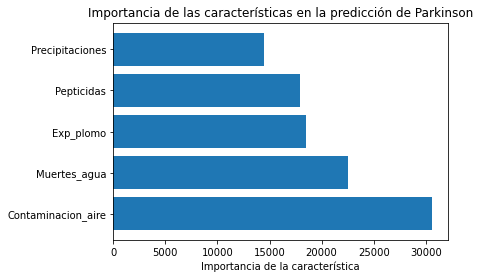

Valores reales: [351.72433   34.044785  28.52009   16.898243  38.6878  ]
Primeras 5 predicciones: [334.64896   34.325424  29.120407  23.977303  31.697712]


In [72]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBRegressor
model = xgb.XGBRegressor(n_estimators=500, max_depth=9, learning_rate=0.05, subsample=0.7, colsample_bytree=1.0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la pérdida (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Pérdida en el conjunto de prueba (MSE): {mse}')

# Obtener las importancias de las características
importances = model.get_booster().get_score(importance_type='weight')  # 'weight' también puede ser 'gain' o 'cover'

# Ordenar las importancias en orden descendente
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Visualizar las importancias
features = [x[0] for x in importances_sorted]
scores = [x[1] for x in importances_sorted]

plt.barh(features, scores)
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en la predicción de Parkinson')
plt.show()

# Primeras 5 predicciones comparadas con los valores reales
print("Valores reales:", y_test.head().values)
print("Primeras 5 predicciones:", y_pred[:5])



Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END 

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200,

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300,

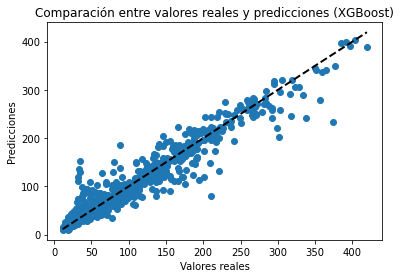

Valores reales: [351.72433   34.044785  28.52009   16.898243  38.6878  ]
Primeras 5 predicciones: [340.40558   38.22928   28.95657   25.680815  28.529   ]


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Paso 1: Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Paso 2: Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']  # Variable dependiente cuantitativa

# Paso 3: Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear el modelo de XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Paso 6: Ajustar hiperparámetros usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

# Paso 7: Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Paso 8: Evaluar el modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Pérdida en el conjunto de prueba (MSE): {mse}")

# Paso 9: Gráfico para comparar las predicciones con los valores reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones (XGBoost)')
plt.show()

# Paso 10: Primeras 5 predicciones
# Comparar las primeras 5 predicciones con los valores reales
print("Valores reales:", y_test[:5].values)
print("Primeras 5 predicciones:", y_pred[:5])




Pérdida en el conjunto de prueba (MSE): 382.97596097286777


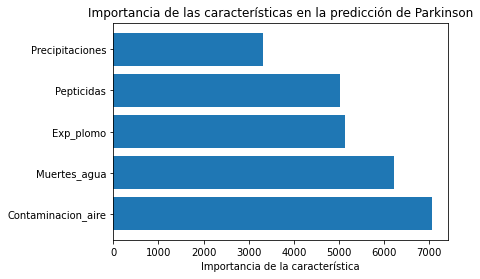

Valores reales: [351.72433   34.044785  28.52009   16.898243  38.6878  ]
Primeras 5 predicciones: [332.56342   26.267563  29.165243  23.864243  38.776764]


In [69]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar los datos
df = pd.read_csv("Tabla_modelos.csv")

# Seleccionar las características (X) y la variable dependiente (y)
X = df[['Contaminacion_aire', 'Muertes_agua', 'Exp_plomo', 'Pepticidas', 'Precipitaciones']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBRegressor
model = xgb.XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la pérdida (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Pérdida en el conjunto de prueba (MSE): {mse}')

# Obtener las importancias de las características
importances = model.get_booster().get_score(importance_type='weight')  # 'weight' también puede ser 'gain' o 'cover'

# Ordenar las importancias en orden descendente
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Visualizar las importancias
features = [x[0] for x in importances_sorted]
scores = [x[1] for x in importances_sorted]

plt.barh(features, scores)
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en la predicción de Parkinson')
plt.show()

# Primeras 5 predicciones comparadas con los valores reales
print("Valores reales:", y_test.head().values)
print("Primeras 5 predicciones:", y_pred[:5])


